In [1]:
from subprocess import call
import time
import glob
import os
import sys
import tifffile
from skimage import io
import numpy as np
import nibabel as nib
import multiprocessing as mp
from scipy import signal
import gc
import time

In [18]:
def is_file_empty(file_path):
    """ Check if file is empty by confirming if its size is 0 bytes"""
    # Check if file exist and it is empty
    return os.path.exists(file_path) and os.stat(file_path).st_size == 0
def Register_single_image(Mov_name,template_name):        
    output_name = Mov_name.replace('.tif','_Greedy')
    Affine_name = Mov_name.replace('.tif','_Greedy_affine.mat')
    #if not os.path.exists(output_name+'_Greedy_affine.mat') and is_file_empty(output_name+'.nii'):            
    job_string = "greedy -d 2 -a -float -o Affine_name -i FixImg MovImg -n 200x80x40 -ia-identity -m NCC 3x3x3 -V 0"
    job_string = job_string.replace('Affine_name',Affine_name).replace('OutImg',output_name).replace('FixImg',template_name).replace('MovImg',Mov_name)
    call([job_string],shell=True)  
    print(job_string)
    job_string = "greedy -d 2 -float -o OutImg.nii -i FixImg MovImg -it Affine_name -n 200x80x40 -e 1 -m NCC 3x3x3 -V 0"
    job_string = job_string.replace('Affine_name',Affine_name).replace('OutImg',output_name).replace('FixImg',template_name).replace('MovImg',Mov_name)
    call([job_string],shell=True)  
    job_string = "greedy -d 2 -rf FixImg -rm MovImg MovImg_Warped.nii -r OutImg.nii Affine_name"
    job_string = job_string.replace('Affine_name',Affine_name).replace('OutImg',output_name).replace('FixImg',template_name).replace('MovImg',Mov_name)
    call([job_string],shell=True)
    Mov_name2 = Mov_name.replace('C2','C1')
    output_name2 = output_name.replace('C2','C1')
    job_string = "greedy -d 2 -rf FixImg -rm MovImg2 MovImg2_Warped.nii -r OutImg.nii Affine_name"
    job_string = job_string.replace('Affine_name',Affine_name).replace('OutImg',output_name).replace('FixImg',template_name).replace('MovImg2',Mov_name2)
    call([job_string],shell=True)
    
def Morph_C1(Mov_name,template_name):
    output_name = Mov_name.replace('.tif','_Greedy')
    Affine_name = Mov_name.replace('.tif','_Greedy_affine.mat')
    Mov_name2 = Mov_name.replace('C2','C1')
    output_name2 = output_name.replace('C2','C1')
    job_string = "greedy -d 2 -rf FixImg -rm MovImg2 MovImg2_Warped.nii -r OutImg.nii Affine_name"
    job_string = job_string.replace('Affine_name',Affine_name).replace('OutImg',output_name).replace('FixImg',template_name).replace('MovImg2',Mov_name2)
    call([job_string],shell=True)
    
def Register_single_imageb(Mov_name,template_name):        
    output_name = Mov_name.replace('.tif','_Greedy')
    Affine_name = Mov_name.replace('.tif','_Greedy_affine2.mat')
    #if not os.path.exists(output_name+'_Greedy_affine.mat') and is_file_empty(output_name+'.nii'):            
    job_string = "greedy -d 2 -a -float -o Affine_name -i FixImg MovImg -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0"
    job_string = job_string.replace('Affine_name',Affine_name).replace('OutImg',output_name).replace('FixImg',template_name).replace('MovImg',Mov_name)
    call([job_string],shell=True)  
    print(job_string)
    job_string = "greedy -d 2 -float -o OutImg.nii -i FixImg MovImg -it Affine_name -n 100x50x20 -e 0.25 -m NCC 2x2x2 -V 1"
    job_string = job_string.replace('Affine_name',Affine_name).replace('OutImg',output_name).replace('FixImg',template_name).replace('MovImg',Mov_name)
    call([job_string],shell=True)  
    job_string = "greedy -d 2 -rf FixImg -rm MovImg MovImg_Warped2.nii -r OutImg.nii Affine_name"
    job_string = job_string.replace('Affine_name',Affine_name).replace('OutImg',output_name).replace('FixImg',template_name).replace('MovImg',Mov_name)
    call([job_string],shell=True)
    Mov_name2 = Mov_name.replace('C2','C1')
    output_name2 = output_name.replace('C2','C1')
    job_string = "greedy -d 2 -rf FixImg -rm MovImg2 MovImg2_Warped2.nii -r OutImg.nii Affine_name"
    job_string = job_string.replace('Affine_name',Affine_name).replace('OutImg',output_name).replace('FixImg',template_name).replace('MovImg2',Mov_name2)
    call([job_string],shell=True)

In [19]:
N = int((mp.cpu_count()/4)-2)

Felicity_folder='/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/'
os.chdir(os.path.dirname(Felicity_folder))
img_seq_list=glob.glob(Felicity_folder+'/C2*.tif')
len(img_seq_list)

434

In [20]:
template_name='/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif'
for img_name in img_seq_list:
    Register_single_imageb(img_name,template_name)   

Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20000_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20000.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.31855
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.851375
Level 000  Iter 00001    Energy = 0.865536
Level 000  Iter 00002    Energy = 0.874791
Level 000  Iter 00003    Energy = 0.880302
Level 000  Iter 00004    Energy = 0.883414
Level 000  Iter 00005    Energy = 0.885536
Level 000  Iter 00006    Energy = 0.886823
Level 000  Iter 00007    Energy = 0.887872
Level 000  Iter 00008    Energy = 0.888345
Level 000  Iter 00009    Energy = 0.888719
Level 000  It

Level 002  Iter 00018    Energy = 0.478169
Level 002  Iter 00019    Energy = 0.481019
END OF LEVEL   2    DetJac Range:   0.2838  to   1.8662 
Level 002  LastIter    Energy = 0.481019
  Avg. Gradient Time        : 0.0083s  32.36% 
  Avg. Gaussian Time        : 0.0109s  42.19% 
  Avg. Integration Time     : 0.0027s  10.32% 
  Avg. Total Iteration Time : 0.0258s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20001_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20001.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.34116
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.852937
Level 000  Iter 00001    Energy = 0.867500
Level 000  Iter 00002    Energy = 0.876712
Level 000  Iter 00003    Energy = 0.881603
Level 000  Iter 00004    Energy = 0.884818
Level 000  Iter 00005    Energy = 0.887029
Level

Level 002  Iter 00016    Energy = 0.483400
Level 002  Iter 00017    Energy = 0.484461
Level 002  Iter 00018    Energy = 0.486476
Level 002  Iter 00019    Energy = 0.487468
END OF LEVEL   2    DetJac Range:   0.2881  to   2.3838 
Level 002  LastIter    Energy = 0.487468
  Avg. Gradient Time        : 0.0067s  24.59% 
  Avg. Gaussian Time        : 0.0140s  51.56% 
  Avg. Integration Time     : 0.0026s   9.69% 
  Avg. Total Iteration Time : 0.0272s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERAN

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20002_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20002.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.36854
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.853636
Level 000  Iter 00001    Energy = 0.868025
Level 000  Iter 00002    Energy = 0.876222
Level 000  Iter 00003    Energy = 0.881635
Level 000  Iter 00004    Energy = 0.885160
Level 000  Iter 00005    Energy = 0.886957
Level 000  Iter 00006    Energy = 0.888679
Level 000  Iter 00007    Energy = 0.889224
Level 000  Iter 00008    Energy = 0.890009
Level 000  Iter 00009    Energy = 0.890409
Level 000  It

Level 002  Iter 00012    Energy = 0.465563
Level 002  Iter 00013    Energy = 0.468108
Level 002  Iter 00014    Energy = 0.469151
Level 002  Iter 00015    Energy = 0.470813
Level 002  Iter 00016    Energy = 0.472985
Level 002  Iter 00017    Energy = 0.474136
Level 002  Iter 00018    Energy = 0.475687
Level 002  Iter 00019    Energy = 0.475663
END OF LEVEL   2    DetJac Range:   0.2886  to   2.3933 
Level 002  LastIter    Energy = 0.475663
  Avg. Gradient Time        : 0.0094s  29.74% 
  Avg. Gaussian Time        : 0.0148s  46.87% 
  Avg. Integration Time     : 0.0028s   8.78% 
  Avg. Total Iteration Time : 0.0315s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20003_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20003.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.38962
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.856055
Level 000  Iter 00001    Energy = 0.868683
Level 000  Iter 00002    Energy = 0.877157
Level 000  Iter 00003    Energy = 0.882165
Level 000  Iter 00004    Energy = 0.885293
Level 000  Iter 00005    Energy = 0.887059
Level 000  Iter 00006    Energy = 0.888130
Level 000  Iter 00007    Energy = 0.888939
Level 000  Iter 00008    Energy = 0.889412
Level 000  Iter 00009    Energy = 0.889777
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20004_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20004.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43107
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.858074
Level 000  Iter 00001    Energy = 0.871094
Level 000  Iter 00002    Energy = 0.879220
Level 000  Iter 00003    Energy = 0.884311
Level 000  Iter 00004    Energy = 0.887024
Level 000  Iter 00005    Energy = 0.888731
Level 000  Iter 00006    Energy = 0.890145
Level 000  Iter 00007    Energy = 0.891057
Level 000  Iter 00008    Energy = 0.891823
Level 000  Iter 00009    Energy = 0.892211
Level 000  It

  Avg. Gradient Time        : 0.0072s  28.93% 
  Avg. Gaussian Time        : 0.0111s  44.73% 
  Avg. Integration Time     : 0.0027s  10.75% 
  Avg. Total Iteration Time : 0.0249s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20005_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20005.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40586
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.856198
Level 000  Iter 00001    Energy = 0.869387
Level 000  Iter 00002    Energy = 0.877436
Level 000  Iter 00003    Energy = 0.882477
Level 000  Iter 00004    Energy = 0.885316
Level 000  Iter 00005    Energy = 0.887871
Level

Level 002  Iter 00015    Energy = 0.454850
Level 002  Iter 00016    Energy = 0.455408
Level 002  Iter 00017    Energy = 0.456429
Level 002  Iter 00018    Energy = 0.457292
Level 002  Iter 00019    Energy = 0.458298
END OF LEVEL   2    DetJac Range:   0.3709  to   2.1879 
Level 002  LastIter    Energy = 0.458298
  Avg. Gradient Time        : 0.0086s  28.79% 
  Avg. Gaussian Time        : 0.0140s  47.09% 
  Avg. Integration Time     : 0.0027s   9.21% 
  Avg. Total Iteration Time : 0.0298s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20006_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20006.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41227
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.857316
Level 000  Iter 00001    Energy = 0.871306
Level 000  Iter 00002    Energy = 0.878705
Level 000  Iter 00003    Energy = 0.883498
Level 000  Iter 00004    Energy = 0.886170
Level 000  Iter 00005    Energy = 0.887827
Level 000  Iter 00006    Energy = 0.889096
Level 000  Iter 00007    Energy = 0.890104
Level 000  Iter 00008    Energy = 0.890455
Level 000  Iter 00009    Energy = 0.891086
Level 000  It

Level 002  Iter 00019    Energy = 0.459226
END OF LEVEL   2    DetJac Range:   0.2963  to   2.4438 
Level 002  LastIter    Energy = 0.459226
  Avg. Gradient Time        : 0.0070s  30.16% 
  Avg. Gaussian Time        : 0.0106s  45.59% 
  Avg. Integration Time     : 0.0022s   9.50% 
  Avg. Total Iteration Time : 0.0232s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20007_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20007.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40437
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.856725
Level 000  Iter 00001    Energy = 0.869183
Level 000  Iter 00002    Energy = 0.877345
Level 000  Iter 00003    Energy = 0.881962
Level 000  Iter 00004    Energy = 0.885476
Level 000  Iter 00005    Energy = 0.887839
Level

Level 002  Iter 00017    Energy = 0.458341
Level 002  Iter 00018    Energy = 0.460054
Level 002  Iter 00019    Energy = 0.461139
END OF LEVEL   2    DetJac Range:   0.3300  to   2.0409 
Level 002  LastIter    Energy = 0.461139
  Avg. Gradient Time        : 0.0107s  30.85% 
  Avg. Gaussian Time        : 0.0158s  45.59% 
  Avg. Integration Time     : 0.0036s  10.45% 
  Avg. Total Iteration Time : 0.0347s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.42
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20008_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20008.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.3899
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427

Level 002  Iter 00008    Energy = 0.438141
Level 002  Iter 00009    Energy = 0.442719
Level 002  Iter 00010    Energy = 0.445120
Level 002  Iter 00011    Energy = 0.447558
Level 002  Iter 00012    Energy = 0.449943
Level 002  Iter 00013    Energy = 0.451912
Level 002  Iter 00014    Energy = 0.455136
Level 002  Iter 00015    Energy = 0.455839
Level 002  Iter 00016    Energy = 0.455425
Level 002  Iter 00017    Energy = 0.456838
Level 002  Iter 00018    Energy = 0.457058
Level 002  Iter 00019    Energy = 0.457678
END OF LEVEL   2    DetJac Range:   0.3125  to   2.0706 
Level 002  LastIter    Energy = 0.457678
  Avg. Gradient Time        : 0.0076s  29.84% 
  Avg. Gaussian Time        : 0.0122s  47.92% 
  Avg. Integration Time     : 0.0022s   8.79% 
  Avg. Total Iteration Time : 0.0254s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LI

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20009_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20009.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41845
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.857320
Level 000  Iter 00001    Energy = 0.869340
Level 000  Iter 00002    Energy = 0.877043
Level 000  Iter 00003    Energy = 0.881887
Level 000  Iter 00004    Energy = 0.885114
Level 000  Iter 00005    Energy = 0.887661
Level

Level 002  Iter 00017    Energy = 0.458855
Level 002  Iter 00018    Energy = 0.459610
Level 002  Iter 00019    Energy = 0.460328
END OF LEVEL   2    DetJac Range:   0.3000  to   1.9386 
Level 002  LastIter    Energy = 0.460328
  Avg. Gradient Time        : 0.0069s  27.85% 
  Avg. Gaussian Time        : 0.0116s  46.46% 
  Avg. Integration Time     : 0.0026s  10.47% 
  Avg. Total Iteration Time : 0.0249s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41259
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.857794
Level 000  Iter 00001    Energy = 0.870358
Level 000  Iter 00002    Energy = 0.877499
Level 000  Iter 00003    Energy = 0.882078
Level 000  Iter 00004    Energy = 0.885082
Level 000  Iter 00005    Energy = 0.887489
Level 000  Iter 00006    Energy = 0.888961
Level 000  Iter 00007    Energy = 0.889875
Level 000  Iter 00008    Energy = 0.890390
Level 000  Iter 00009    Energy = 0.890790
Level 000  Iter 00010    Energy = 0.891078
Level 000  Iter 00011    Energy = 0.891381
Level 000  Iter 00012    Energy = 0.891552
Level 000  Iter 00013    Energy = 0.891731
Level 000  Iter 00014    Energy = 0.891765
Level 000  Iter 00015    Energy = 0.891955
Level 000  Iter 00016    Energy = 0.891906
Level 000  Iter 00017    Energy = 0.891922
Level 

Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20011_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20011.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40202
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.855300
Level 000  Iter 00001    Energy = 0.867430
Level 000  Iter 00002    Energy = 0.875735
Level 000  Iter 00003    Energy = 0.880815
Level 000  Iter 00004    Energy = 0.884190
Level 000  Iter 00005    Energy = 0.886398
Level

Level 002  Iter 00010    Energy = 0.447350
Level 002  Iter 00011    Energy = 0.450187
Level 002  Iter 00012    Energy = 0.452244
Level 002  Iter 00013    Energy = 0.455846
Level 002  Iter 00014    Energy = 0.457658
Level 002  Iter 00015    Energy = 0.459477
Level 002  Iter 00016    Energy = 0.461218
Level 002  Iter 00017    Energy = 0.462301
Level 002  Iter 00018    Energy = 0.463768
Level 002  Iter 00019    Energy = 0.464831
END OF LEVEL   2    DetJac Range:   0.2350  to   2.0844 
Level 002  LastIter    Energy = 0.464831
  Avg. Gradient Time        : 0.0107s  33.18% 
  Avg. Gaussian Time        : 0.0140s  43.36% 
  Avg. Integration Time     : 0.0029s   9.05% 
  Avg. Total Iteration Time : 0.0324s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: IN

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20012_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20012.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.37123
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.856831
Level 000  Iter 00001    Energy = 0.869561
Level 000  Iter 00002    Energy = 0.877649
Level 000  Iter 00003    Energy = 0.883002
Level 000  Iter 00004    Energy = 0.885680
Level 000  Iter 00005    Energy = 0.887912
Level

Level 002  Iter 00017    Energy = 0.465912
Level 002  Iter 00018    Energy = 0.466448
Level 002  Iter 00019    Energy = 0.467837
END OF LEVEL   2    DetJac Range:   0.3773  to   2.1279 
Level 002  LastIter    Energy = 0.467837
  Avg. Gradient Time        : 0.0064s  29.23% 
  Avg. Gaussian Time        : 0.0104s  47.67% 
  Avg. Integration Time     : 0.0021s   9.46% 
  Avg. Total Iteration Time : 0.0219s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20013_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20013.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.34211
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.854734
Level 000  Iter 00001    Energy = 0.866733
Level 000  Iter 00002    Energy = 0.874572
Level 000  Iter 00003    Energy = 0.879900
Level 000  Iter 00004    Energy = 0.883339
Level 000  Iter 00005    Energy = 0.885505
Level 000  Iter 00006    Energy = 0.886796
Level 000  Iter 00007    Energy = 0.887555
Level 000  Iter 00008    Energy = 0.888390
Level 000  Iter 00009    Energy = 0.888795
Level 000  It

Level 002  Iter 00012    Energy = 0.466032
Level 002  Iter 00013    Energy = 0.467827
Level 002  Iter 00014    Energy = 0.469167
Level 002  Iter 00015    Energy = 0.470575
Level 002  Iter 00016    Energy = 0.471980
Level 002  Iter 00017    Energy = 0.473933
Level 002  Iter 00018    Energy = 0.474797
Level 002  Iter 00019    Energy = 0.474558
END OF LEVEL   2    DetJac Range:   0.3249  to   2.1259 
Level 002  LastIter    Energy = 0.474558
  Avg. Gradient Time        : 0.0068s  28.79% 
  Avg. Gaussian Time        : 0.0110s  46.90% 
  Avg. Integration Time     : 0.0022s   9.29% 
  Avg. Total Iteration Time : 0.0236s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20014_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20014.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4381
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.491572
Level 000  Iter 00001    Energy = 0.512714
Level 000  Iter 00002    Energy = 0.532325
Level 000  Iter 00003    Energy = 0.552226
Level 000  Iter 00004    Energy = 0.568591
Level 000  Iter 00005    Energy = 0.581626
Level 000  Iter 00006    Energy = 0.594424
Level 000  Iter 00007    Energy = 0.605027
Level 000  Iter 00008    Energy = 0.615314
Level 000  Iter 00009    Energy = 0.624319
Level 000  Ite

END OF LEVEL   2    DetJac Range:   0.0925  to   3.0398 
Level 002  LastIter    Energy = 0.323046
  Avg. Gradient Time        : 0.0074s  31.49% 
  Avg. Gaussian Time        : 0.0104s  44.51% 
  Avg. Integration Time     : 0.0024s  10.37% 
  Avg. Total Iteration Time : 0.0234s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20015_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20015.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43354
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.340425
Level 000  Iter 00001    Energy = 0.356739
Level 000  Iter 00002    Energy = 0.372554
Level 000  Iter 00003    Energy = 0.388167
Level 000  Iter 00004    Energy = 0.402177
Level 000  Iter 00005    Energy = 0.415456
Level 000  Iter 00006    Energy = 0.429634
Level 000  Iter 00007    Energy = 0.441270
Level 000  Iter 00008    Energy = 0.450569
Level 000  Iter 00009    Energy = 0.458825
Level 000  It

END OF LEVEL   2    DetJac Range:   0.0911  to   3.3962 
Level 002  LastIter    Energy = 0.252152
  Avg. Gradient Time        : 0.0073s  31.78% 
  Avg. Gaussian Time        : 0.0102s  44.35% 
  Avg. Integration Time     : 0.0021s   9.31% 
  Avg. Total Iteration Time : 0.0230s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20016_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20016.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.46079
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.282623
Level 000  Iter 00001    Energy = 0.300652
Level 000  Iter 00002    Energy = 0.317337
Level 000  Iter 00003    Energy = 0.331148
Level 000  Iter 00004    Energy = 0.344390
Level 000  Iter 00005    Energy = 0.354718
Level

Level 002  Iter 00008    Energy = 0.175965
Level 002  Iter 00009    Energy = 0.177428
Level 002  Iter 00010    Energy = 0.178990
Level 002  Iter 00011    Energy = 0.180226
Level 002  Iter 00012    Energy = 0.181674
Level 002  Iter 00013    Energy = 0.183012
Level 002  Iter 00014    Energy = 0.184304
Level 002  Iter 00015    Energy = 0.184789
Level 002  Iter 00016    Energy = 0.185526
Level 002  Iter 00017    Energy = 0.186433
Level 002  Iter 00018    Energy = 0.187509
Level 002  Iter 00019    Energy = 0.188276
END OF LEVEL   2    DetJac Range:   0.0680  to   3.3772 
Level 002  LastIter    Energy = 0.188276
  Avg. Gradient Time        : 0.0074s  30.48% 
  Avg. Gaussian Time        : 0.0115s  47.61% 
  Avg. Integration Time     : 0.0021s   8.73% 
  Avg. Total Iteration Time : 0.0242s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.618
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  L

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20017_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20017.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.58381
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.269581
Level 000  Iter 00001    Energy = 0.286695
Level 000  Iter 00002    Energy = 0.302995
Level 000  Iter 00003    Energy = 0.318586
Level 000  Iter 00004    Energy = 0.332132
Level 000  Iter 00005    Energy = 0.345783
Level

Level 002  Iter 00014    Energy = 0.180522
Level 002  Iter 00015    Energy = 0.181571
Level 002  Iter 00016    Energy = 0.182817
Level 002  Iter 00017    Energy = 0.184181
Level 002  Iter 00018    Energy = 0.185494
Level 002  Iter 00019    Energy = 0.186970
END OF LEVEL   2    DetJac Range:   0.0635  to   3.1044 
Level 002  LastIter    Energy = 0.186970
  Avg. Gradient Time        : 0.0093s  30.25% 
  Avg. Gaussian Time        : 0.0144s  46.79% 
  Avg. Integration Time     : 0.0027s   8.67% 
  Avg. Total Iteration Time : 0.0307s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.667
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SE

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20018_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20018.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.65016
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.263504
Level 000  Iter 00001    Energy = 0.279771
Level 000  Iter 00002    Energy = 0.296791
Level 000  Iter 00003    Energy = 0.312419
Level 000  Iter 00004    Energy = 0.326273
Level 000  Iter 00005    Energy = 0.337322
Level 000  Iter 00006    Energy = 0.349635
Level 000  Iter 00007    Energy = 0.361983
Level 000  Iter 00008    Energy = 0.372219
Level 000  Iter 00009    Energy = 0.381634
Level 000  It

Level 002  Iter 00012    Energy = 0.182284
Level 002  Iter 00013    Energy = 0.183855
Level 002  Iter 00014    Energy = 0.186068
Level 002  Iter 00015    Energy = 0.188592
Level 002  Iter 00016    Energy = 0.191172
Level 002  Iter 00017    Energy = 0.192466
Level 002  Iter 00018    Energy = 0.193718
Level 002  Iter 00019    Energy = 0.194438
END OF LEVEL   2    DetJac Range:   0.0706  to   3.0618 
Level 002  LastIter    Energy = 0.194438
  Avg. Gradient Time        : 0.0068s  29.78% 
  Avg. Gaussian Time        : 0.0104s  45.93% 
  Avg. Integration Time     : 0.0022s   9.83% 
  Avg. Total Iteration Time : 0.0227s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.717
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLA

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20019_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20019.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.67581
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.255675
Level 000  Iter 00001    Energy = 0.272303
Level 000  Iter 00002    Energy = 0.287868
Level 000  Iter 00003    Energy = 0.301602
Level 000  Iter 00004    Energy = 0.315933
Level 000  Iter 00005    Energy = 0.328488
Level 000  Iter 00006    Energy = 0.338701
Level 000  Iter 00007    Energy = 0.350379
Level 000  Iter 00008    Energy = 0.362263
Level 000  Iter 00009    Energy = 0.373027
Level 000  It

Level 002  Iter 00012    Energy = 0.183875
Level 002  Iter 00013    Energy = 0.185270
Level 002  Iter 00014    Energy = 0.186738
Level 002  Iter 00015    Energy = 0.188028
Level 002  Iter 00016    Energy = 0.189528
Level 002  Iter 00017    Energy = 0.191185
Level 002  Iter 00018    Energy = 0.192978
Level 002  Iter 00019    Energy = 0.193789
END OF LEVEL   2    DetJac Range:   0.0720  to   2.8596 
Level 002  LastIter    Energy = 0.193789
  Avg. Gradient Time        : 0.0073s  30.31% 
  Avg. Gaussian Time        : 0.0112s  46.40% 
  Avg. Integration Time     : 0.0025s  10.23% 
  Avg. Total Iteration Time : 0.0240s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.717
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLA

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20020_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20020.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.66405
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.251309
Level 000  Iter 00001    Energy = 0.268467
Level 000  Iter 00002    Energy = 0.286801
Level 000  Iter 00003    Energy = 0.303415
Level 000  Iter 00004    Energy = 0.318038
Level 000  Iter 00005    Energy = 0.330696
Level 000  Iter 00006    Energy = 0.344934
Level 000  Iter 00007    Energy = 0.357990
Level 000  Iter 00008    Energy = 0.370143
Level 000  Iter 00009    Energy = 0.380340
Level 000  It

Level 002  Iter 00019    Energy = 0.218308
END OF LEVEL   2    DetJac Range:   0.0755  to   3.0503 
Level 002  LastIter    Energy = 0.218308
  Avg. Gradient Time        : 0.0072s  28.43% 
  Avg. Gaussian Time        : 0.0110s  43.90% 
  Avg. Integration Time     : 0.0030s  12.04% 
  Avg. Total Iteration Time : 0.0252s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.717
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20021_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20021.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.72018
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.268603
Level 000  Iter 00001    Energy = 0.280857
Level 000  Iter 00002    Energy = 0.299132
Level 000  Iter 00003    Energy = 0.317339
Level 000  Iter 00004    Energy = 0.332276
Level 000  Iter 00005    Energy = 0.344716
Level 000  Iter 00006    Energy = 0.355213
Level 000  Iter 00007    Energy = 0.365124
Level 000  Iter 00008    Energy = 0.375811
Level 000  Iter 00009    Energy = 0.384149
Level 000  It

Level 002  Iter 00019    Energy = 0.215793
END OF LEVEL   2    DetJac Range:   0.0754  to   3.3322 
Level 002  LastIter    Energy = 0.215793
  Avg. Gradient Time        : 0.0082s  31.52% 
  Avg. Gaussian Time        : 0.0119s  46.13% 
  Avg. Integration Time     : 0.0024s   9.29% 
  Avg. Total Iteration Time : 0.0259s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.717
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20022_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20022.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.71602
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.274599
Level 000  Iter 00001    Energy = 0.286893
Level 000  Iter 00002    Energy = 0.306547
Level 000  Iter 00003    Energy = 0.325022
Level 000  Iter 00004    Energy = 0.340140
Level 000  Iter 00005    Energy = 0.355146
Level 000  Iter 00006    Energy = 0.366750
Level 000  Iter 00007    Energy = 0.376145
Level 000  Iter 00008    Energy = 0.384463
Level 000  Iter 00009    Energy = 0.393711
Level 000  It

Level 002  Iter 00019    Energy = 0.218468
END OF LEVEL   2    DetJac Range:   0.0285  to   3.3746 
Level 002  LastIter    Energy = 0.218468
  Avg. Gradient Time        : 0.0076s  28.77% 
  Avg. Gaussian Time        : 0.0123s  46.46% 
  Avg. Integration Time     : 0.0027s  10.20% 
  Avg. Total Iteration Time : 0.0265s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.717
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20023_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20023.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.70772
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.281027
Level 000  Iter 00001    Energy = 0.290093
Level 000  Iter 00002    Energy = 0.312049
Level 000  Iter 00003    Energy = 0.330737
Level 000  Iter 00004    Energy = 0.346449
Level 000  Iter 00005    Energy = 0.359681
Level 000  Iter 00006    Energy = 0.369553
Level 000  Iter 00007    Energy = 0.379227
Level 000  Iter 00008    Energy = 0.390325
Level 000  Iter 00009    Energy = 0.399295
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.717
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20024_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20024.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.64633
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.286116
Level 000  Iter 00001    Energy = 0.301188
Level 000  Iter 00002    Energy = 0.320489
Level 000  Iter 00003    Energy = 0.338149
Level 000  Iter 00004    Energy = 0.354042
Level 000  Iter 00005    Energy = 0.365948
Level 000  Iter 00006    Energy = 0.374717
Level 000  Iter 00007    Energy = 0.383136
Level 000  Iter 00008    Energy = 0.392650
Level 000  Iter 00009    Energy = 0.401871
Level 000  It

  Avg. Gradient Time        : 0.0071s  31.29% 
  Avg. Gaussian Time        : 0.0100s  44.27% 
  Avg. Integration Time     : 0.0021s   9.28% 
  Avg. Total Iteration Time : 0.0227s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.667
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20025_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20025.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.65469
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.295641
Level 000  Iter 00001    Energy = 0.304347
Level 000  Iter 00002    Energy = 0.325397
Level 000  Iter 00003    Energy = 0.342188
Level 000  Iter 00004    Energy = 0.357470
Level 000  Iter 00005    Energy = 0.369292
Level 000  Iter 00006    Energy = 0.380340
Level 000  Iter 00007    Energy = 0.389518
Level 000  Iter 00008    Energy = 0.397705
Level 000  Iter 00009    Energy = 0.407466
Level 000  It

Level 002  Iter 00018    Energy = 0.224529
Level 002  Iter 00019    Energy = 0.225139
END OF LEVEL   2    DetJac Range:   0.0997  to   3.4297 
Level 002  LastIter    Energy = 0.225139
  Avg. Gradient Time        : 0.0059s  26.87% 
  Avg. Gaussian Time        : 0.0106s  47.95% 
  Avg. Integration Time     : 0.0021s   9.29% 
  Avg. Total Iteration Time : 0.0221s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.667
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20026_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20026.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.65521
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.302390
Level 000  Iter 00001    Energy = 0.324166
Level 000  Iter 00002    Energy = 0.348478
Level 000  Iter 00003    Energy = 0.368751
Level 000  Iter 00004    Energy = 0.386450
Level 000  Iter 00005    Energy = 0.404144
Level 000  Iter 00006    Energy = 0.420111
Level 000  Iter 00007    Energy = 0.434035
Level 000  Iter 00008    Energy = 0.444855
Level 000  Iter 00009    Energy = 0.455283
Level 000  It

Level 002  Iter 00018    Energy = 0.258142
Level 002  Iter 00019    Energy = 0.260071
END OF LEVEL   2    DetJac Range:   0.0943  to   3.4347 
Level 002  LastIter    Energy = 0.260071
  Avg. Gradient Time        : 0.0090s  30.27% 
  Avg. Gaussian Time        : 0.0136s  45.84% 
  Avg. Integration Time     : 0.0026s   8.91% 
  Avg. Total Iteration Time : 0.0296s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.618
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20027_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20027.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.63471
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.313380
Level 000  Iter 00001    Energy = 0.334669
Level 000  Iter 00002    Energy = 0.357566
Level 000  Iter 00003    Energy = 0.380868
Level 000  Iter 00004    Energy = 0.401548
Level 000  Iter 00005    Energy = 0.419130
Level 000  Iter 00006    Energy = 0.435338
Level 000  Iter 00007    Energy = 0.449846
Level 000  Iter 00008    Energy = 0.460655
Level 000  Iter 00009    Energy = 0.469034
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.618
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20028_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20028.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.60099
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.328655
Level 000  Iter 00001    Energy = 0.351239
Level 000  Iter 00002    Energy = 0.375692
Level 000  Iter 00003    Energy = 0.398935
Level 000  Iter 00004    Energy = 0.419532
Level 000  Iter 00005    Energy = 0.436527
Level 000  Iter 00006    Energy = 0.453141
Level 000  Iter 00007    Energy = 0.465466
Level 000  Iter 00008    Energy = 0.475598
Level 000  Iter 00009    Energy = 0.484673
Level 000  It

Level 002  Iter 00019    Energy = 0.278666
END OF LEVEL   2    DetJac Range:   0.1399  to   3.3023 
Level 002  LastIter    Energy = 0.278666
  Avg. Gradient Time        : 0.0075s  33.09% 
  Avg. Gaussian Time        : 0.0103s  45.59% 
  Avg. Integration Time     : 0.0019s   8.44% 
  Avg. Total Iteration Time : 0.0226s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.618
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20029_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20029.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.59414
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.343963
Level 000  Iter 00001    Energy = 0.369164
Level 000  Iter 00002    Energy = 0.395992
Level 000  Iter 00003    Energy = 0.420333
Level 000  Iter 00004    Energy = 0.441690
Level 000  Iter 00005    Energy = 0.458239
Level 000  Iter 00006    Energy = 0.473169
Level 000  Iter 00007    Energy = 0.485136
Level 000  Iter 00008    Energy = 0.494840
Level 000  Iter 00009    Energy = 0.503005
Level 000  It

Level 002  Iter 00014    Energy = 0.264651
Level 002  Iter 00015    Energy = 0.266356
Level 002  Iter 00016    Energy = 0.268243
Level 002  Iter 00017    Energy = 0.270243
Level 002  Iter 00018    Energy = 0.272095
Level 002  Iter 00019    Energy = 0.273916
END OF LEVEL   2    DetJac Range:   0.1558  to   2.9410 
Level 002  LastIter    Energy = 0.273916
  Avg. Gradient Time        : 0.0071s  35.39% 
  Avg. Gaussian Time        : 0.0087s  43.55% 
  Avg. Integration Time     : 0.0018s   9.00% 
  Avg. Total Iteration Time : 0.0201s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.618
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20030_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20030.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.59714
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.359710
Level 000  Iter 00001    Energy = 0.384433
Level 000  Iter 00002    Energy = 0.411097
Level 000  Iter 00003    Energy = 0.434364
Level 000  Iter 00004    Energy = 0.456198
Level 000  Iter 00005    Energy = 0.473599
Level 000  Iter 00006    Energy = 0.488045
Level 000  Iter 00007    Energy = 0.499555
Level 000  Iter 00008    Energy = 0.509785
Level 000  Iter 00009    Energy = 0.520537
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.569
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20031_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20031.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.56937
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.374043
Level 000  Iter 00001    Energy = 0.401316
Level 000  Iter 00002    Energy = 0.427513
Level 000  Iter 00003    Energy = 0.449712
Level 000  Iter 00004    Energy = 0.469738
Level 000  Iter 00005    Energy = 0.485753
Level 000  Iter 00006    Energy = 0.500738
Level 000  Iter 00007    Energy = 0.512352
Level 000  Iter 00008    Energy = 0.520930
Level 000  Iter 00009    Energy = 0.529433
Level 000  It

  Avg. Gradient Time        : 0.0070s  31.11% 
  Avg. Gaussian Time        : 0.0101s  44.76% 
  Avg. Integration Time     : 0.0022s   9.81% 
  Avg. Total Iteration Time : 0.0226s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.569
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20032_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20032.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.56347
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.383052
Level 000  Iter 00001    Energy = 0.410770
Level 000  Iter 00002    Energy = 0.439117
Level 000  Iter 00003    Energy = 0.463

Level 002  Iter 00005    Energy = 0.258083
Level 002  Iter 00006    Energy = 0.262248
Level 002  Iter 00007    Energy = 0.265778
Level 002  Iter 00008    Energy = 0.268828
Level 002  Iter 00009    Energy = 0.272024
Level 002  Iter 00010    Energy = 0.275096
Level 002  Iter 00011    Energy = 0.278388
Level 002  Iter 00012    Energy = 0.281405
Level 002  Iter 00013    Energy = 0.283576
Level 002  Iter 00014    Energy = 0.286034
Level 002  Iter 00015    Energy = 0.288180
Level 002  Iter 00016    Energy = 0.290393
Level 002  Iter 00017    Energy = 0.292672
Level 002  Iter 00018    Energy = 0.294461
Level 002  Iter 00019    Energy = 0.296065
END OF LEVEL   2    DetJac Range:   0.0868  to   3.3422 
Level 002  LastIter    Energy = 0.296065
  Avg. Gradient Time        : 0.0074s  29.40% 
  Avg. Gaussian Time        : 0.0122s  48.45% 
  Avg. Integration Time     : 0.0021s   8.46% 
  Avg. Total Iteration Time : 0.0252s 
Executing with the default number of threads: 20
Executing with the default n

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20033_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20033.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.56427
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.398653
Level 000  Iter 00001    Energy = 0.426677
Level 000  Iter 00002    Energy = 0.453795
Level 000  Iter 00003    Energy = 0.477242
Level 000  Iter 00004    Energy = 0.497134
Level 000  Iter 00005    Energy = 0.513590
Level 000  Iter 00006    Energy = 0.525062
Level 000  Iter 00007    Energy = 0.535179
Level 000  Iter 00008    Energy = 0.545991
Level 000  Iter 00009    Energy = 0.556262
Level 000  It

Level 002  Iter 00018    Energy = 0.303989
Level 002  Iter 00019    Energy = 0.305803
END OF LEVEL   2    DetJac Range:   0.0723  to   3.4402 
Level 002  LastIter    Energy = 0.305803
  Avg. Gradient Time        : 0.0085s  28.03% 
  Avg. Gaussian Time        : 0.0147s  48.53% 
  Avg. Integration Time     : 0.0027s   8.82% 
  Avg. Total Iteration Time : 0.0302s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.569
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20034_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20034.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.50842
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.410493
Level 000  Iter 00001    Energy = 0.439297
Level 000  Iter 00002    Energy = 0.472454
Level 000  Iter 00003    Energy = 0.498716
Level 000  Iter 00004    Energy = 0.522134
Level 000  Iter 00005    Energy = 0.541267
Level 000  Iter 00006    Energy = 0.558245
Level 000  Iter 00007    Energy = 0.572786
Level 000  Iter 00008    Energy = 0.587795
Level 000  Iter 00009    Energy = 0.598208
Level 000  It

Level 002  Iter 00012    Energy = 0.311115
Level 002  Iter 00013    Energy = 0.312193
Level 002  Iter 00014    Energy = 0.314545
Level 002  Iter 00015    Energy = 0.316359
Level 002  Iter 00016    Energy = 0.319382
Level 002  Iter 00017    Energy = 0.322184
Level 002  Iter 00018    Energy = 0.323581
Level 002  Iter 00019    Energy = 0.325406
END OF LEVEL   2    DetJac Range:   0.1411  to   2.8613 
Level 002  LastIter    Energy = 0.325406
  Avg. Gradient Time        : 0.0068s  29.66% 
  Avg. Gaussian Time        : 0.0104s  45.47% 
  Avg. Integration Time     : 0.0022s   9.64% 
  Avg. Total Iteration Time : 0.0229s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.569
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20035_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20035.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.55392
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.424834
Level 000  Iter 00001    Energy = 0.452187
Level 000  Iter 00002    Energy = 0.480791
Level 000  Iter 00003    Energy = 0.504287
Level 000  Iter 00004    Energy = 0.524591
Level 000  Iter 00005    Energy = 0.538382
Level 000  Iter 00006    Energy = 0.551031
Level 000  Iter 00007    Energy = 0.564507
Level 000  Iter 00008    Energy = 0.576069
Level 000  Iter 00009    Energy = 0.584000
Level 000  It

Level 002  Iter 00012    Energy = 0.298785
Level 002  Iter 00013    Energy = 0.301678
Level 002  Iter 00014    Energy = 0.304983
Level 002  Iter 00015    Energy = 0.306984
Level 002  Iter 00016    Energy = 0.307429
Level 002  Iter 00017    Energy = 0.310346
Level 002  Iter 00018    Energy = 0.312997
Level 002  Iter 00019    Energy = 0.315789
END OF LEVEL   2    DetJac Range:   0.1030  to   3.0136 
Level 002  LastIter    Energy = 0.315789
  Avg. Gradient Time        : 0.0070s  30.93% 
  Avg. Gaussian Time        : 0.0105s  46.01% 
  Avg. Integration Time     : 0.0020s   8.65% 
  Avg. Total Iteration Time : 0.0228s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.569
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20036_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20036.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.54833
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.432586
Level 000  Iter 00001    Energy = 0.461871
Level 000  Iter 00002    Energy = 0.490042
Level 000  Iter 00003    Energy = 0.513662
Level 000  Iter 00004    Energy = 0.532997
Level 000  Iter 00005    Energy = 0.551312
Level 000  Iter 00006    Energy = 0.564264
Level 000  Iter 00007    Energy = 0.575048
Level 000  Iter 00008    Energy = 0.584798
Level 000  Iter 00009    Energy = 0.592998
Level 000  It

  Avg. Gradient Time        : 0.0066s  27.86% 
  Avg. Gaussian Time        : 0.0114s  48.32% 
  Avg. Integration Time     : 0.0022s   9.14% 
  Avg. Total Iteration Time : 0.0236s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.569
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20037_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20037.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.5295
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.446602
Level 000  Iter 00001    Energy = 0.477557
Level 000  Iter 00002    Energy = 0.507158
Level 000  Iter 00003    Energy = 0.529775
Level 000  Iter 00004    Energy = 0.550327
Level 000  Iter 00005    Energy = 0.568532
Level 000  Iter 00006    Energy = 0.583677
Level 000  Iter 00007    Energy = 0.598025
Level 000  Iter 00008    Energy = 0.608589
Level 000  Iter 00009    Energy = 0.616813
Level 000  Ite

Level 002  Iter 00019    Energy = 0.331231
END OF LEVEL   2    DetJac Range:   0.1018  to   3.7097 
Level 002  LastIter    Energy = 0.331231
  Avg. Gradient Time        : 0.0067s  28.05% 
  Avg. Gaussian Time        : 0.0117s  48.86% 
  Avg. Integration Time     : 0.0022s   9.30% 
  Avg. Total Iteration Time : 0.0239s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.52
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20038_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20038.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.50487
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.457754
Level 000  Iter 00001    Energy = 0.488517
Level 000  Iter 00002    Energy = 0.518040
Level 000  Iter 00003    Energy = 0.540046
Level 000  Iter 00004    Energy = 0.560462
Level 000  Iter 00005    Energy = 0.579490
Level

Level 002  Iter 00018    Energy = 0.335701
Level 002  Iter 00019    Energy = 0.336864
END OF LEVEL   2    DetJac Range:   0.0972  to   3.0170 
Level 002  LastIter    Energy = 0.336864
  Avg. Gradient Time        : 0.0073s  29.45% 
  Avg. Gaussian Time        : 0.0121s  48.59% 
  Avg. Integration Time     : 0.0023s   9.12% 
  Avg. Total Iteration Time : 0.0249s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.52
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20039_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20039.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.5033
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.468767
Level 000  Iter 00001    Energy = 0.500178
Level 000  Iter 00002    Energy = 0.528883
Level 000  Iter 00003    Energy = 0.551866
Level 000  Iter 00004    Energy = 0.570720
Level 000  Iter 00005    Energy = 0.588750
Level 000  Iter 00006    Energy = 0.603619
Level 000  Iter 00007    Energy = 0.616410
Level 000  Iter 00008    Energy = 0.627054
Level 000  Iter 00009    Energy = 0.636292
Level 000  Ite

END OF LEVEL   2    DetJac Range:   0.0610  to   3.6020 
Level 002  LastIter    Energy = 0.329481
  Avg. Gradient Time        : 0.0070s  27.33% 
  Avg. Gaussian Time        : 0.0121s  47.16% 
  Avg. Integration Time     : 0.0027s  10.57% 
  Avg. Total Iteration Time : 0.0257s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20040_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20040.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.50972
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.477941
Level 000  Iter 00001    Energy = 0.507144
Level 000  Iter 00002    Energy = 0.535689
Level 000  Iter 00003    Energy = 0.557517
Level 000  Iter 00004    Energy = 0.578216
Level 000  Iter 00005    Energy = 0.596808
Level 000  Iter 00006    Energy = 0.612264
Level 000  Iter 00007    Energy = 0.625988
Level 000  Iter 00008    Energy = 0.636444
Level 000  Iter 00009    Energy = 0.645395
Level 000  It

Level 002  Iter 00019    Energy = 0.343078
END OF LEVEL   2    DetJac Range:   0.0968  to   3.6343 
Level 002  LastIter    Energy = 0.343078
  Avg. Gradient Time        : 0.0077s  32.02% 
  Avg. Gaussian Time        : 0.0108s  45.03% 
  Avg. Integration Time     : 0.0022s   9.14% 
  Avg. Total Iteration Time : 0.0240s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20041_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20041.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.50402
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.484078
Level 000  Iter 00001    Energy = 0.514125
Level 000  Iter 00002    Energy = 0.543110
Level 000  Iter 00003    Energy = 0.566865
Level 000  Iter 00004    Energy = 0.588547
Level 000  Iter 00005    Energy = 0.605938
Level 000  Iter 00006    Energy = 0.622799
Level 000  Iter 00007    Energy = 0.636004
Level 000  Iter 00008    Energy = 0.646011
Level 000  Iter 00009    Energy = 0.654993
Level 000  It

  Avg. Gradient Time        : 0.0073s  31.56% 
  Avg. Gaussian Time        : 0.0103s  44.21% 
  Avg. Integration Time     : 0.0022s   9.44% 
  Avg. Total Iteration Time : 0.0232s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20042_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20042.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45809
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.499783
Level 000  Iter 00001    Energy = 0.531361
Level 000  Iter 00002    Energy = 0.566916
Level 000  Iter 00003    Energy = 0.598431
Level 000  Iter 00004    Energy = 0.624134
Level 000  Iter 00005    Energy = 0.646528
Level

Level 002  Iter 00017    Energy = 0.348861
Level 002  Iter 00018    Energy = 0.349475
Level 002  Iter 00019    Energy = 0.351529
END OF LEVEL   2    DetJac Range:   0.1321  to   2.8718 
Level 002  LastIter    Energy = 0.351529
  Avg. Gradient Time        : 0.0070s  31.09% 
  Avg. Gaussian Time        : 0.0103s  46.14% 
  Avg. Integration Time     : 0.0019s   8.71% 
  Avg. Total Iteration Time : 0.0224s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20043_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20043.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42912
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.515565
Level 000  Iter 00001    Energy = 0.551759
Level 000  Iter 00002    Energy = 0.589647
Level 000  Iter 00003    Energy = 0.621204
Level 000  Iter 00004    Energy = 0.649963
Level 000  Iter 00005    Energy = 0.670737
Level 000  Iter 00006    Energy = 0.689074
Level 000  Iter 00007    Energy = 0.704980
Level 000  Iter 00008    Energy = 0.715754
Level 000  Iter 00009    Energy = 0.725738
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20044_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20044.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43247
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.518819
Level 000  Iter 00001    Energy = 0.551868
Level 000  Iter 00002    Energy = 0.589772
Level 000  Iter 00003    Energy = 0.621837
Level 000  Iter 00004    Energy = 0.651625
Level 000  Iter 00005    Energy = 0.677844
Level 000  Iter 00006    Energy = 0.693826
Level 000  Iter 00007    Energy = 0.705694
Level 000  Iter 00008    Energy = 0.719095
Level 000  Iter 00009    Energy = 0.728727
Level 000  It

Level 002  Iter 00018    Energy = 0.360364
Level 002  Iter 00019    Energy = 0.362176
END OF LEVEL   2    DetJac Range:   0.1209  to   2.7474 
Level 002  LastIter    Energy = 0.362176
  Avg. Gradient Time        : 0.0091s  29.43% 
  Avg. Gaussian Time        : 0.0147s  47.69% 
  Avg. Integration Time     : 0.0026s   8.43% 
  Avg. Total Iteration Time : 0.0309s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20045_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20045.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43578
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.534109
Level 000  Iter 00001    Energy = 0.566653
Level 000  Iter 00002    Energy = 0.605545
Level 000  Iter 00003    Energy = 0.638161
Level 000  Iter 00004    Energy = 0.667974
Level 000  Iter 00005    Energy = 0.689055
Level

Level 002  Iter 00016    Energy = 0.353302
Level 002  Iter 00017    Energy = 0.354838
Level 002  Iter 00018    Energy = 0.355256
Level 002  Iter 00019    Energy = 0.355688
END OF LEVEL   2    DetJac Range:   0.1853  to   2.8376 
Level 002  LastIter    Energy = 0.355688
  Avg. Gradient Time        : 0.0087s  32.64% 
  Avg. Gaussian Time        : 0.0113s  42.63% 
  Avg. Integration Time     : 0.0027s  10.33% 
  Avg. Total Iteration Time : 0.0266s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERAN

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42259
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.538983
Level 000  Iter 00001    Energy = 0.572597
Level 000  Iter 00002    Energy = 0.609745
Level 000  Iter 00003    Energy = 0.644011
Level 000  Iter 00004    Energy = 0.674172
Level 000  Iter 00005    Energy = 0.696913
Level 000  Iter 00006    Energy = 0.712592
Level 000  Iter 00007    Energy = 0.727138
Level 000  Iter 00008    Energy = 0.737703
Level 000  Iter 00009    Energy = 0.745711
Level 000  Iter 00010    Energy = 0.751511
Level 000  Iter 00011    Energy = 0.756830
Level 000  Iter 00012    Energy = 0.761220
Level 000  Iter 00013    Energy = 0.765751
Level 000  Iter 00014    Energy = 0.769259
Level 000  Iter 00015    Energy = 0.771370
Level 000  Iter 00016    Energy = 0.774693
Level 000  Iter 00017    Energy = 0.778241
Level 

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20047_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20047.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41957
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.542244
Level 000  Iter 00001    Energy = 0.574622
Level 000  Iter 00002    Energy = 0.611317
Level 000  Iter 00003    Energy = 0.644230
Level 000  Iter 00004    Energy = 0.672652
Level 000  Iter 00005    Energy = 0.695920
Level 000  Iter 00006    Energy = 0.713826
Level 000  Iter 00007    Energy = 0.726244
Level 000  Iter 00008    Energy = 0.736778
Level 000  Iter 00009    Energy = 0.746333
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20048_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20048.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42471
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.536436
Level 000  Iter 00001    Energy = 0.571058
Level 000  Iter 00002    Energy = 0.607292
Level 000  Iter 00003    Energy = 0.641334
Level 000  Iter 00004    Energy = 0.669065
Level 000  Iter 00005    Energy = 0.689874
Level 000  Iter 00006    Energy = 0.705841
Level 000  Iter 00007    Energy = 0.720262
Level 000  Iter 00008    Energy = 0.733076
Level 000  Iter 00009    Energy = 0.741782
Level 000  Iter 00010    Energy = 0.749379
Level 000  Iter 00011    Energy = 0.754125
Level 000  Iter 00012    Energy = 0.759517
Level 000  Iter 00013    Energy = 0.763217
Level 000  Iter 00014    Energy = 0.767640
Level 000  Iter 00015    Energy = 0.771462
Level 000  Iter 00016    Energy = 0.775106
Level 000  Iter 00017    Energy = 0.778155
Level 

  Avg. Gradient Time        : 0.0078s  36.33% 
  Avg. Gaussian Time        : 0.0094s  43.83% 
  Avg. Integration Time     : 0.0017s   8.04% 
  Avg. Total Iteration Time : 0.0214s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20049_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20049.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43912
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.534752
Level 000  Iter 00001    Energy = 0.572132
Level 000  Iter 00002    Energy = 0.611666
Level 000  Iter 00003    Energy = 0.645462
Level 000  Iter 00004    Energy = 0.670727
Level 000  Iter 00005    Energy = 0.691723
Level

END OF LEVEL   2    DetJac Range:   0.2510  to   2.5606 
Level 002  LastIter    Energy = 0.358281
  Avg. Gradient Time        : 0.0060s  29.57% 
  Avg. Gaussian Time        : 0.0095s  46.64% 
  Avg. Integration Time     : 0.0018s   9.03% 
  Avg. Total Iteration Time : 0.0204s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20050_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20050.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4211
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.548760
Level 000  Iter 00001    Energy = 0.584191
Level 000  Iter 00002    Energy = 0.624997
Level 000  Iter 00003    Energy = 0.660616
Level 000  Iter 00004    Energy = 0.688218
Level 000  Iter 00005    Energy = 0.708588
Level 000  Iter 00006    Energy = 0.726404
Level 000  Iter 00007    Energy = 0.741647
Level 000  Iter 00008    Energy = 0.752186
Level 000  Iter 00009    Energy = 0.760925
Level 000  Ite

Level 002  Iter 00013    Energy = 0.355021
Level 002  Iter 00014    Energy = 0.356135
Level 002  Iter 00015    Energy = 0.357014
Level 002  Iter 00016    Energy = 0.357897
Level 002  Iter 00017    Energy = 0.358758
Level 002  Iter 00018    Energy = 0.359578
Level 002  Iter 00019    Energy = 0.360354
END OF LEVEL   2    DetJac Range:   0.2222  to   2.7914 
Level 002  LastIter    Energy = 0.360354
  Avg. Gradient Time        : 0.0087s  28.18% 
  Avg. Gaussian Time        : 0.0147s  47.65% 
  Avg. Integration Time     : 0.0028s   8.97% 
  Avg. Total Iteration Time : 0.0308s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41676
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.554784
Level 000  Iter 00001    Energy = 0.588922
Level 000  Iter 00002    Energy = 0.628987
Level 000  Iter 00003    Energy = 0.663578
Level 000  Iter 00004    Energy = 0.692525
Level 000  Iter 00005    Energy = 0.713298
Level 000  Iter 00006    Energy = 0.726849
Level 000  Iter 00007    Energy = 0.738886
Level 000  Iter 00008    Energy = 0.750857
Level 000  Iter 00009    Energy = 0.760190
Level 000  Iter 00010    Energy = 0.767048
Level 000  Iter 00011    Energy = 0.773208
Level 000  Iter 00012    Energy = 0.777735
Level 000  Iter 00013    Energy = 0.781191
Level 000  Iter 00014    Energy = 0.784724
Level 000  Iter 00015    Energy = 0.788558
Level 000  Iter 00016    Energy = 0.791833
Level 000  Iter 00017    Energy = 0.795063
Level 

Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20052_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20052.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41239
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.556482
Level 000  Iter 00001    Energy = 0.591639
Level 000  Iter 00002    Energy = 0.629485
Level 000  Iter 00003    Energy = 0.660850
Level 000  Iter 00004    Energy = 0.690493
Level 000  Iter 00005    Energy = 0.713053
Level 000  Iter 00006    Energy = 0.732118
Level 000  Iter 00007    Energy = 0.746049
Level 000  Iter 00008    Energy = 0.755280
Level 000  Iter 00009    Energy = 0.763582
Level 000  It

Level 002  Iter 00019    Energy = 0.373137
END OF LEVEL   2    DetJac Range:   0.1809  to   3.0315 
Level 002  LastIter    Energy = 0.373137
  Avg. Gradient Time        : 0.0072s  30.84% 
  Avg. Gaussian Time        : 0.0106s  45.30% 
  Avg. Integration Time     : 0.0022s   9.22% 
  Avg. Total Iteration Time : 0.0235s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20053_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20053.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39188
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.568396
Level 000  Iter 00001    Energy = 0.603498
Level 000  Iter 00002    Energy = 0.640641
Level 000  Iter 00003    Energy = 0.674492
Level 000  Iter 00004    Energy = 0.702138
Level 000  Iter 00005    Energy = 0.722299
Level

Level 002  Iter 00009    Energy = 0.354093
Level 002  Iter 00010    Energy = 0.357518
Level 002  Iter 00011    Energy = 0.360856
Level 002  Iter 00012    Energy = 0.364022
Level 002  Iter 00013    Energy = 0.365996
Level 002  Iter 00014    Energy = 0.367772
Level 002  Iter 00015    Energy = 0.369769
Level 002  Iter 00016    Energy = 0.372191
Level 002  Iter 00017    Energy = 0.372914
Level 002  Iter 00018    Energy = 0.372700
Level 002  Iter 00019    Energy = 0.373464
END OF LEVEL   2    DetJac Range:   0.1294  to   3.7307 
Level 002  LastIter    Energy = 0.373464
  Avg. Gradient Time        : 0.0072s  30.69% 
  Avg. Gaussian Time        : 0.0111s  47.24% 
  Avg. Integration Time     : 0.0022s   9.37% 
  Avg. Total Iteration Time : 0.0236s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUT

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20054_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20054.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41945
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.568368
Level 000  Iter 00001    Energy = 0.599433
Level 000  Iter 00002    Energy = 0.637288
Level 000  Iter 00003    Energy = 0.671555
Level 000  Iter 00004    Energy = 0.699325
Level 000  Iter 00005    Energy = 0.719409
Level

Level 002  Iter 00015    Energy = 0.371979
Level 002  Iter 00016    Energy = 0.372272
Level 002  Iter 00017    Energy = 0.372705
Level 002  Iter 00018    Energy = 0.374258
Level 002  Iter 00019    Energy = 0.376530
END OF LEVEL   2    DetJac Range:   0.2606  to   2.9935 
Level 002  LastIter    Energy = 0.376530
  Avg. Gradient Time        : 0.0070s  30.73% 
  Avg. Gaussian Time        : 0.0103s  45.19% 
  Avg. Integration Time     : 0.0022s   9.71% 
  Avg. Total Iteration Time : 0.0227s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR G

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39793
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.574210
Level 000  Iter 00001    Energy = 0.610890
Level 000  Iter 00002    Energy = 0.651388
Level 000  Iter 00003    Energy = 0.682632
Level 000  Iter 00004    Energy = 0.705896
Level 000  Iter 00005    Energy = 0.726287
Level 000  Iter 00006    Energy = 0.739252
Level 000  Iter 00007    Energy = 0.752937
Level 000  Iter 00008    Energy = 0.761531
Level 000  Iter 00009    Energy = 0.767590
Level 000  Iter 00010    Energy = 0.772829
Level 000  Iter 00011    Energy = 0.777244
Level 000  Iter 00012    Energy = 0.780885
Level 000  Iter 00013    Energy = 0.784579
Level 000  Iter 00014    Energy = 0.788290
Level 000  Iter 00015    Energy = 0.791705
Level 000  Iter 00016    Energy = 0.794616
Level 000  Iter 00017    Energy = 0.797253
Level 

  Avg. Gradient Time        : 0.0089s  29.15% 
  Avg. Gaussian Time        : 0.0141s  46.01% 
  Avg. Integration Time     : 0.0030s   9.64% 
  Avg. Total Iteration Time : 0.0307s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20056_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20056.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40666
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.583694
Level 000  Iter 00001    Energy = 0.620478
Level 000  Iter 00002    Energy = 0.658717
Level 000  Iter 00003    Energy = 0.692161
Level 000  Iter 00004    Energy = 0.719854
Level 000  Iter 00005    Energy = 0.740260
Level

Level 002  Iter 00015    Energy = 0.372852
Level 002  Iter 00016    Energy = 0.373624
Level 002  Iter 00017    Energy = 0.375268
Level 002  Iter 00018    Energy = 0.377225
Level 002  Iter 00019    Energy = 0.378507
END OF LEVEL   2    DetJac Range:   0.1660  to   3.1424 
Level 002  LastIter    Energy = 0.378507
  Avg. Gradient Time        : 0.0075s  31.48% 
  Avg. Gaussian Time        : 0.0106s  44.36% 
  Avg. Integration Time     : 0.0024s   9.97% 
  Avg. Total Iteration Time : 0.0239s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR G

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20057_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20057.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41283
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.583895
Level 000  Iter 00001    Energy = 0.617890
Level 000  Iter 00002    Energy = 0.653696
Level 000  Iter 00003    Energy = 0.684679
Level 000  Iter 00004    Energy = 0.714132
Level 000  Iter 00005    Energy = 0.734711
Level 000  Iter 00006    Energy = 0.748044
Level 000  Iter 00007    Energy = 0.759887
Level 000  Iter 00008    Energy = 0.770617
Level 000  Iter 00009    Energy = 0.778985
Level 000  It

Level 002  Iter 00018    Energy = 0.370539
Level 002  Iter 00019    Energy = 0.371720
END OF LEVEL   2    DetJac Range:   0.1357  to   2.6906 
Level 002  LastIter    Energy = 0.371720
  Avg. Gradient Time        : 0.0092s  30.46% 
  Avg. Gaussian Time        : 0.0139s  45.77% 
  Avg. Integration Time     : 0.0027s   8.87% 
  Avg. Total Iteration Time : 0.0303s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20058_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20058.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40398
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.592716
Level 000  Iter 00001    Energy = 0.628473
Level 000  Iter 00002    Energy = 0.666715
Level 000  Iter 00003    Energy = 0.700790
Level 000  Iter 00004    Energy = 0.727188
Level 000  Iter 00005    Energy = 0.746788
Level

Level 002  Iter 00019    Energy = 0.378555
END OF LEVEL   2    DetJac Range:   0.1589  to   3.1219 
Level 002  LastIter    Energy = 0.378555
  Avg. Gradient Time        : 0.0072s  28.43% 
  Avg. Gaussian Time        : 0.0127s  49.93% 
  Avg. Integration Time     : 0.0023s   8.88% 
  Avg. Total Iteration Time : 0.0255s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20059_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20059.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39962
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.590860
Level 000  Iter 00001    Energy = 0.625339
Level 000  Iter 00002    Energy = 0.662650
Level 000  Iter 00003    Energy = 0.697003
Level 000  Iter 00004    Energy = 0.725403
Level 000  Iter 00005    Energy = 0.742269
Level 000  Iter 00006    Energy = 0.757547
Level 000  Iter 00007    Energy = 0.768245
Level 000  Iter 00008    Energy = 0.778058
Level 000  Iter 00009    Energy = 0.786087
Level 000  It

Level 002  Iter 00019    Energy = 0.380434
END OF LEVEL   2    DetJac Range:   0.1658  to   2.9625 
Level 002  LastIter    Energy = 0.380434
  Avg. Gradient Time        : 0.0064s  28.74% 
  Avg. Gaussian Time        : 0.0104s  46.74% 
  Avg. Integration Time     : 0.0020s   9.12% 
  Avg. Total Iteration Time : 0.0222s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20060_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20060.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40432
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.600157
Level 000  Iter 00001    Energy = 0.633499
Level 000  Iter 00002    Energy = 0.674092
Level 000  Iter 00003    Energy = 0.708059
Level 000  Iter 00004    Energy = 0.733740
Level 000  Iter 00005    Energy = 0.755164
Level

Level 002  Iter 00015    Energy = 0.369548
Level 002  Iter 00016    Energy = 0.371682
Level 002  Iter 00017    Energy = 0.373680
Level 002  Iter 00018    Energy = 0.375332
Level 002  Iter 00019    Energy = 0.376856
END OF LEVEL   2    DetJac Range:   0.2031  to   3.0152 
Level 002  LastIter    Energy = 0.376856
  Avg. Gradient Time        : 0.0082s  27.99% 
  Avg. Gaussian Time        : 0.0140s  47.71% 
  Avg. Integration Time     : 0.0027s   9.30% 
  Avg. Total Iteration Time : 0.0293s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR G

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20061_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20061.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41781
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.594909
Level 000  Iter 00001    Energy = 0.629297
Level 000  Iter 00002    Energy = 0.666040
Level 000  Iter 00003    Energy = 0.698683
Level 000  Iter 00004    Energy = 0.727911
Level 000  Iter 00005    Energy = 0.745106
Level 000  Iter 00006    Energy = 0.756912
Level 000  Iter 00007    Energy = 0.766165
Level 000  Iter 00008    Energy = 0.773924
Level 000  Iter 00009    Energy = 0.780532
Level 000  It

END OF LEVEL   2    DetJac Range:   0.1945  to   2.7554 
Level 002  LastIter    Energy = 0.376866
  Avg. Gradient Time        : 0.0090s  34.65% 
  Avg. Gaussian Time        : 0.0103s  39.80% 
  Avg. Integration Time     : 0.0028s  10.58% 
  Avg. Total Iteration Time : 0.0260s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20062_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20062.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41022
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.605194
Level 000  Iter 00001    Energy = 0.638058
Level 000  Iter 00002    Energy = 0.677811
Level 000  Iter 00003    Energy = 0.709795
Level 000  Iter 00004    Energy = 0.733607
Level 000  Iter 00005    Energy = 0.752908
Level

Level 002  Iter 00017    Energy = 0.379628
Level 002  Iter 00018    Energy = 0.379978
Level 002  Iter 00019    Energy = 0.381118
END OF LEVEL   2    DetJac Range:   0.2302  to   2.7479 
Level 002  LastIter    Energy = 0.381118
  Avg. Gradient Time        : 0.0077s  28.73% 
  Avg. Gaussian Time        : 0.0124s  46.20% 
  Avg. Integration Time     : 0.0028s  10.49% 
  Avg. Total Iteration Time : 0.0268s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20063_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20063.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39725
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.612922
Level 000  Iter 00001    Energy = 0.648246
Level 000  Iter 00002    Energy = 0.685484
Level 000  Iter 00003    Energy = 0.716483
Level 000  Iter 00004    Energy = 0.744125
Level 000  Iter 00005    Energy = 0.762403
Level 000  Iter 00006    Energy = 0.774443
Level 000  Iter 00007    Energy = 0.784450
Level 000  Iter 00008    Energy = 0.792069
Level 000  Iter 00009    Energy = 0.798068
Level 000  It

  Avg. Gradient Time        : 0.0070s  29.51% 
  Avg. Gaussian Time        : 0.0111s  46.83% 
  Avg. Integration Time     : 0.0022s   9.21% 
  Avg. Total Iteration Time : 0.0238s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20064_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20064.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40039
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.614155
Level 000  Iter 00001    Energy = 0.650190
Level 000  Iter 00002    Energy = 0.689227
Level 000  Iter 00003    Energy = 0.721205
Level 000  Iter 00004    Energy = 0.747137
Level 000  Iter 00005    Energy = 0.764510
Level

Level 002  Iter 00011    Energy = 0.368204
Level 002  Iter 00012    Energy = 0.370961
Level 002  Iter 00013    Energy = 0.373480
Level 002  Iter 00014    Energy = 0.375842
Level 002  Iter 00015    Energy = 0.377380
Level 002  Iter 00016    Energy = 0.378303
Level 002  Iter 00017    Energy = 0.380091
Level 002  Iter 00018    Energy = 0.381808
Level 002  Iter 00019    Energy = 0.383351
END OF LEVEL   2    DetJac Range:   0.1939  to   2.7936 
Level 002  LastIter    Energy = 0.383351
  Avg. Gradient Time        : 0.0099s  30.69% 
  Avg. Gaussian Time        : 0.0145s  45.13% 
  Avg. Integration Time     : 0.0032s  10.01% 
  Avg. Total Iteration Time : 0.0322s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20065_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20065.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40534
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.617017
Level 000  Iter 00001    Energy = 0.656023
Level 000  Iter 00002    Energy = 0.694533
Level 000  Iter 00003    Energy = 0.725730
Level 000  Iter 00004    Energy = 0.749877
Level 000  Iter 00005    Energy = 0.766593
Level

Level 002  Iter 00016    Energy = 0.382017
Level 002  Iter 00017    Energy = 0.384262
Level 002  Iter 00018    Energy = 0.385356
Level 002  Iter 00019    Energy = 0.386666
END OF LEVEL   2    DetJac Range:   0.2248  to   2.6953 
Level 002  LastIter    Energy = 0.386666
  Avg. Gradient Time        : 0.0069s  31.80% 
  Avg. Gaussian Time        : 0.0093s  42.86% 
  Avg. Integration Time     : 0.0020s   9.37% 
  Avg. Total Iteration Time : 0.0217s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANC

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20066_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20066.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40184
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.618198
Level 000  Iter 00001    Energy = 0.656542
Level 000  Iter 00002    Energy = 0.692753
Level 000  Iter 00003    Energy = 0.724231
Level 000  Iter 00004    Energy = 0.750092
Level 000  Iter 00005    Energy = 0.766999
Level 000  Iter 00006    Energy = 0.779494
Level 000  Iter 00007    Energy = 0.790549
Level 000  Iter 00008    Energy = 0.796981
Level 000  Iter 00009    Energy = 0.803362
Level 000  It

Level 002  Iter 00016    Energy = 0.380931
Level 002  Iter 00017    Energy = 0.381979
Level 002  Iter 00018    Energy = 0.383809
Level 002  Iter 00019    Energy = 0.384976
END OF LEVEL   2    DetJac Range:   0.2107  to   3.0648 
Level 002  LastIter    Energy = 0.384976
  Avg. Gradient Time        : 0.0072s  28.73% 
  Avg. Gaussian Time        : 0.0113s  45.29% 
  Avg. Integration Time     : 0.0026s  10.38% 
  Avg. Total Iteration Time : 0.0250s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANC

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20067_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20067.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39244
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.615444
Level 000  Iter 00001    Energy = 0.650302
Level 000  Iter 00002    Energy = 0.687771
Level 000  Iter 00003    Energy = 0.720673
Level 000  Iter 00004    Energy = 0.745159
Level 000  Iter 00005    Energy = 0.763998
Level 000  Iter 00006    Energy = 0.778315
Level 000  Iter 00007    Energy = 0.787030
Level 000  Iter 00008    Energy = 0.794032
Level 000  Iter 00009    Energy = 0.799746
Level 000  It

Level 002  Iter 00014    Energy = 0.372653
Level 002  Iter 00015    Energy = 0.373793
Level 002  Iter 00016    Energy = 0.374419
Level 002  Iter 00017    Energy = 0.374590
Level 002  Iter 00018    Energy = 0.378010
Level 002  Iter 00019    Energy = 0.378180
END OF LEVEL   2    DetJac Range:   0.1690  to   2.6847 
Level 002  LastIter    Energy = 0.378180
  Avg. Gradient Time        : 0.0097s  29.81% 
  Avg. Gaussian Time        : 0.0153s  47.10% 
  Avg. Integration Time     : 0.0029s   8.89% 
  Avg. Total Iteration Time : 0.0325s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEA

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39551
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.617042
Level 000  Iter 00001    Energy = 0.654388
Level 000  Iter 00002    Energy = 0.690481
Level 000  Iter 00003    Energy = 0.721939
Level 000  Iter 00004    Energy = 0.745389
Level 000  Iter 00005    Energy = 0.763256
Level 000  Iter 00006    Energy = 0.776338
Level 000  Iter 00007    Energy = 0.787161
Level 000  Iter 00008    Energy = 0.796111
Level 000  Iter 00009    Energy = 0.803409
Level 000  Iter 00010    Energy = 0.808589
Level 000  Iter 00011    Energy = 0.812702
Level 000  Iter 00012    Energy = 0.815473
Level 000  Iter 00013    Energy = 0.817275
Level 000  Iter 00014    Energy = 0.819364
Level 000  Iter 00015    Energy = 0.821235
Level 000  Iter 00016    Energy = 0.822665
Level 000  Iter 00017    Energy = 0.823392
Level 

Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20069_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20069.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.37826
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.82842

Level 002  Iter 00005    Energy = 0.344259
Level 002  Iter 00006    Energy = 0.350882
Level 002  Iter 00007    Energy = 0.356791
Level 002  Iter 00008    Energy = 0.360835
Level 002  Iter 00009    Energy = 0.363998
Level 002  Iter 00010    Energy = 0.366687
Level 002  Iter 00011    Energy = 0.369319
Level 002  Iter 00012    Energy = 0.371555
Level 002  Iter 00013    Energy = 0.373315
Level 002  Iter 00014    Energy = 0.374231
Level 002  Iter 00015    Energy = 0.376137
Level 002  Iter 00016    Energy = 0.378303
Level 002  Iter 00017    Energy = 0.380015
Level 002  Iter 00018    Energy = 0.381225
Level 002  Iter 00019    Energy = 0.382729
END OF LEVEL   2    DetJac Range:   0.1361  to   2.6168 
Level 002  LastIter    Energy = 0.382729
  Avg. Gradient Time        : 0.0070s  29.10% 
  Avg. Gaussian Time        : 0.0117s  48.34% 
  Avg. Integration Time     : 0.0022s   9.03% 
  Avg. Total Iteration Time : 0.0242s 
Executing with the default number of threads: 20
Executing with the default n

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20070_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20070.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.3855
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.621164
Level 000  Iter 00001    Energy = 0.655883
Level 000  Iter 00002    Energy = 0.696519
Level 000  Iter 00003    Energy = 0.726748
Level 000  Iter 00004    Energy = 0.748353
Level 000  Iter 00005    Energy = 0.767107
Level 000  Iter 00006    Energy = 0.779005
Level 000  Iter 00007    Energy = 0.788065
Level 000  Iter 00008    Energy = 0.795979
Level 000  Iter 00009    Energy = 0.803268
Level 000  Ite

Level 002  Iter 00019    Energy = 0.382130
END OF LEVEL   2    DetJac Range:   0.1962  to   2.7751 
Level 002  LastIter    Energy = 0.382130
  Avg. Gradient Time        : 0.0073s  27.63% 
  Avg. Gaussian Time        : 0.0124s  47.27% 
  Avg. Integration Time     : 0.0027s  10.28% 
  Avg. Total Iteration Time : 0.0263s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20071_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20071.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40068
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.619269
Level 000  Iter 00001    Energy = 0.655347
Level 000  Iter 00002    Energy = 0.695493
Level 000  Iter 00003    Energy = 0.727205
Level 000  Iter 00004    Energy = 0.749985
Level 000  Iter 00005    Energy = 0.767610
Level

Level 002  Iter 00015    Energy = 0.382920
Level 002  Iter 00016    Energy = 0.384097
Level 002  Iter 00017    Energy = 0.386165
Level 002  Iter 00018    Energy = 0.388224
Level 002  Iter 00019    Energy = 0.390403
END OF LEVEL   2    DetJac Range:   0.1614  to   2.3257 
Level 002  LastIter    Energy = 0.390403
  Avg. Gradient Time        : 0.0072s  30.06% 
  Avg. Gaussian Time        : 0.0111s  46.23% 
  Avg. Integration Time     : 0.0023s   9.52% 
  Avg. Total Iteration Time : 0.0240s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR G

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20072_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20072.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40721
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.624977
Level 000  Iter 00001    Energy = 0.662114
Level 000  Iter 00002    Energy = 0.698884
Level 000  Iter 00003    Energy = 0.731106
Level 000  Iter 00004    Energy = 0.754393
Level 000  Iter 00005    Energy = 0.770225
Level 000  Iter 00006    Energy = 0.781685
Level 000  Iter 00007    Energy = 0.790119
Level 000  Iter 00008    Energy = 0.797102
Level 000  Iter 00009    Energy = 0.803395
Level 000  It

Level 002  Iter 00012    Energy = 0.375692
Level 002  Iter 00013    Energy = 0.377166
Level 002  Iter 00014    Energy = 0.378696
Level 002  Iter 00015    Energy = 0.381077
Level 002  Iter 00016    Energy = 0.383459
Level 002  Iter 00017    Energy = 0.383952
Level 002  Iter 00018    Energy = 0.386038
Level 002  Iter 00019    Energy = 0.386773
END OF LEVEL   2    DetJac Range:   0.2333  to   2.5999 
Level 002  LastIter    Energy = 0.386773
  Avg. Gradient Time        : 0.0067s  29.65% 
  Avg. Gaussian Time        : 0.0102s  44.96% 
  Avg. Integration Time     : 0.0025s  11.02% 
  Avg. Total Iteration Time : 0.0226s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39804
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.631868
Level 000  Iter 00001    Energy = 0.667975
Level 000  Iter 00002    Energy = 0.703161
Level 000  Iter 00003    Energy = 0.736250
Level 000  Iter 00004    Energy = 0.758596
Level 000  Iter 00005    Energy = 0.773401
Level 000  Iter 00006    Energy = 0.788386
Level 000  Iter 00007    Energy = 0.798508
Level 000  Iter 00008    Energy = 0.805719
Level 000  Iter 00009    Energy = 0.811317
Level 000  Iter 00010    Energy = 0.815791
Level 000  Iter 00011    Energy = 0.818569
Level 000  Iter 00012    Energy = 0.821259
Level 000  Iter 00013    Energy = 0.823366
Level 000  Iter 00014    Energy = 0.824878
Level 000  Iter 00015    Energy = 0.825927
Level 000  Iter 00016    Energy = 0.826650
Level 000  Iter 00017    Energy = 0.827185
Level 

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20074_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20074.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.38342
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.631688
Level 000  Iter 00001    Energy = 0.668770
Level 000  Iter 00002    Energy = 0.706174
Level 000  Iter 00003    Energy = 0.738239
Level 000  Iter 00004    Energy = 0.760436
Level 000  Iter 00005    Energy = 0.777771
Level 000  Iter 00006    Energy = 0.788864
Level 000  Iter 00007    Energy = 0.796751
Level 000  Iter 00008    Energy = 0.802906
Level 000  Iter 00009    Energy = 0.807898
Level 000  It

Level 002  Iter 00012    Energy = 0.372592
Level 002  Iter 00013    Energy = 0.374684
Level 002  Iter 00014    Energy = 0.376322
Level 002  Iter 00015    Energy = 0.378140
Level 002  Iter 00016    Energy = 0.380127
Level 002  Iter 00017    Energy = 0.381326
Level 002  Iter 00018    Energy = 0.382086
Level 002  Iter 00019    Energy = 0.381972
END OF LEVEL   2    DetJac Range:   0.1457  to   2.3628 
Level 002  LastIter    Energy = 0.381972
  Avg. Gradient Time        : 0.0063s  27.59% 
  Avg. Gaussian Time        : 0.0109s  47.52% 
  Avg. Integration Time     : 0.0022s   9.61% 
  Avg. Total Iteration Time : 0.0229s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20075_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20075.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39337
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.636511
Level 000  Iter 00001    Energy = 0.672712
Level 000  Iter 00002    Energy = 0.709687
Level 000  Iter 00003    Energy = 0.739641
Level 000  Iter 00004    Energy = 0.758808
Level 000  Iter 00005    Energy = 0.776958
Level 000  Iter 00006    Energy = 0.790035
Level 000  Iter 00007    Energy = 0.799210
Level 000  Iter 00008    Energy = 0.806192
Level 000  Iter 00009    Energy = 0.811735
Level 000  It

Level 002  Iter 00019    Energy = 0.388162
END OF LEVEL   2    DetJac Range:   0.1892  to   2.6386 
Level 002  LastIter    Energy = 0.388162
  Avg. Gradient Time        : 0.0061s  28.28% 
  Avg. Gaussian Time        : 0.0101s  46.91% 
  Avg. Integration Time     : 0.0021s   9.80% 
  Avg. Total Iteration Time : 0.0216s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20076_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20076.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39531
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.637911
Level 000  Iter 00001    Energy = 0.673053
Level 000  Iter 00002    Energy = 0.709960
Level 000  Iter 00003    Energy = 0.739501
Level 000  Iter 00004    Energy = 0.761645
Level 000  Iter 00005    Energy = 0.778148
Level

Level 002  Iter 00017    Energy = 0.381278
Level 002  Iter 00018    Energy = 0.382211
Level 002  Iter 00019    Energy = 0.382168
END OF LEVEL   2    DetJac Range:   0.1750  to   2.4710 
Level 002  LastIter    Energy = 0.382168
  Avg. Gradient Time        : 0.0072s  30.97% 
  Avg. Gaussian Time        : 0.0106s  45.60% 
  Avg. Integration Time     : 0.0021s   9.20% 
  Avg. Total Iteration Time : 0.0232s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20077_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20077.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.38818
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.82842

Level 002  Iter 00007    Energy = 0.356072
Level 002  Iter 00008    Energy = 0.360920
Level 002  Iter 00009    Energy = 0.363241
Level 002  Iter 00010    Energy = 0.366912
Level 002  Iter 00011    Energy = 0.370811
Level 002  Iter 00012    Energy = 0.372511
Level 002  Iter 00013    Energy = 0.374794
Level 002  Iter 00014    Energy = 0.377583
Level 002  Iter 00015    Energy = 0.380380
Level 002  Iter 00016    Energy = 0.381468
Level 002  Iter 00017    Energy = 0.382959
Level 002  Iter 00018    Energy = 0.385152
Level 002  Iter 00019    Energy = 0.385231
END OF LEVEL   2    DetJac Range:   0.1696  to   2.2707 
Level 002  LastIter    Energy = 0.385231
  Avg. Gradient Time        : 0.0068s  29.85% 
  Avg. Gaussian Time        : 0.0105s  46.28% 
  Avg. Integration Time     : 0.0021s   9.05% 
  Avg. Total Iteration Time : 0.0227s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20078_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20078.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.38721
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.637646
Level 000  Iter 00001    Energy = 0.677205
Level 000  Iter 00002    Energy = 0.711724
Level 000  Iter 00003    Energy = 0.742419
Level 000  Iter 00004    Energy = 0.765190
Level 000  Iter 00005    Energy = 0.781232
Level 000  Iter 00006    Energy = 0.794449
Level 000  Iter 00007    Energy = 0.803508
Level 000  Iter 00008    Energy = 0.810867
Level 000  Iter 00009    Energy = 0.814468
Level 000  It

Level 002  Iter 00012    Energy = 0.373120
Level 002  Iter 00013    Energy = 0.376141
Level 002  Iter 00014    Energy = 0.377951
Level 002  Iter 00015    Energy = 0.380351
Level 002  Iter 00016    Energy = 0.381576
Level 002  Iter 00017    Energy = 0.383396
Level 002  Iter 00018    Energy = 0.384390
Level 002  Iter 00019    Energy = 0.385618
END OF LEVEL   2    DetJac Range:   0.1090  to   2.3555 
Level 002  LastIter    Energy = 0.385618
  Avg. Gradient Time        : 0.0075s  31.52% 
  Avg. Gaussian Time        : 0.0111s  46.68% 
  Avg. Integration Time     : 0.0022s   9.10% 
  Avg. Total Iteration Time : 0.0237s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20079_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20079.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39235
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.82842

Level 002  Iter 00009    Energy = 0.368062
Level 002  Iter 00010    Energy = 0.371339
Level 002  Iter 00011    Energy = 0.374484
Level 002  Iter 00012    Energy = 0.376388
Level 002  Iter 00013    Energy = 0.378497
Level 002  Iter 00014    Energy = 0.380428
Level 002  Iter 00015    Energy = 0.381911
Level 002  Iter 00016    Energy = 0.383791
Level 002  Iter 00017    Energy = 0.384413
Level 002  Iter 00018    Energy = 0.385472
Level 002  Iter 00019    Energy = 0.387276
END OF LEVEL   2    DetJac Range:   0.1636  to   2.5081 
Level 002  LastIter    Energy = 0.387276
  Avg. Gradient Time        : 0.0065s  28.74% 
  Avg. Gaussian Time        : 0.0109s  48.15% 
  Avg. Integration Time     : 0.0020s   8.96% 
  Avg. Total Iteration Time : 0.0226s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUT

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20080_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20080.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.38587
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.639274
Level 000  Iter 00001    Energy = 0.676927
Level 000  Iter 00002    Energy = 0.714597
Level 000  Iter 00003    Energy = 0.743762
Level 000  Iter 00004    Energy = 0.764790
Level 000  Iter 00005    Energy = 0.782146
Level

Level 002  Iter 00017    Energy = 0.385554
Level 002  Iter 00018    Energy = 0.387235
Level 002  Iter 00019    Energy = 0.388451
END OF LEVEL   2    DetJac Range:   0.1720  to   2.3992 
Level 002  LastIter    Energy = 0.388451
  Avg. Gradient Time        : 0.0066s  28.07% 
  Avg. Gaussian Time        : 0.0116s  49.30% 
  Avg. Integration Time     : 0.0021s   8.82% 
  Avg. Total Iteration Time : 0.0236s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20081_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20081.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39675
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.633686
Level 000  Iter 00001    Energy = 0.667000
Level 000  Iter 00002    Energy = 0.704397
Level 000  Iter 00003    Energy = 0.734366
Level 000  Iter 00004    Energy = 0.757132
Level 000  Iter 00005    Energy = 0.772309
Level 000  Iter 00006    Energy = 0.784326
Level 000  Iter 00007    Energy = 0.794621
Level 000  Iter 00008    Energy = 0.800785
Level 000  Iter 00009    Energy = 0.806286
Level 000  It

Level 002  Iter 00019    Energy = 0.382636
END OF LEVEL   2    DetJac Range:   0.1791  to   2.4271 
Level 002  LastIter    Energy = 0.382636
  Avg. Gradient Time        : 0.0069s  30.43% 
  Avg. Gaussian Time        : 0.0103s  45.24% 
  Avg. Integration Time     : 0.0022s   9.53% 
  Avg. Total Iteration Time : 0.0228s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20082_Greedy_affine2.mat -i /mn

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39362
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.631120
Level 000  Iter 00001    Energy = 0.664885
Level 000  Iter 00002    Energy = 0.704239
Level 000  Iter 00003    Energy = 0.735055
Level 000  Iter 00004    Energy = 0.756462
Level 000  Iter 00005    Energy = 0.771682
Level 000  Iter 00006    Energy = 0.784868
Level 000  Iter 00007    Energy = 0.795040
Level 000  Iter 00008    Energy = 0.802824
Level 000  Iter 00009    Energy = 0.807934
Level 000  Iter 00010    Energy = 0.811332
Level 000  Iter 00011    Energy = 0.814324
Level 000  Iter 00012    Energy = 0.816559
Level 000  Iter 00013    Energy = 0.818220
Level 000  Iter 00014    Energy = 0.819772
Level 000  Iter 00015    Energy = 0.821037
Level 000  Iter 00016    Energy = 0.821948
Level 000  Iter 00017    Energy = 0.822747
Level 

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20083_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20083.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.38393
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.632592
Level 000  Iter 00001    Energy = 0.667896
Level 000  Iter 00002    Energy = 0.700805
Level 000  Iter 00003    Energy = 0.727804
Level 000  Iter 00004    Energy = 0.752115
Level 000  Iter 00005    Energy = 0.768741
Level 000  Iter 00006    Energy = 0.783125
Level 000  Iter 00007    Energy = 0.794018
Level 000  Iter 00008    Energy = 0.801383
Level 000  Iter 00009    Energy = 0.806227
Level 000  It

  Avg. Gradient Time        : 0.0076s  31.55% 
  Avg. Gaussian Time        : 0.0103s  42.88% 
  Avg. Integration Time     : 0.0027s  11.31% 
  Avg. Total Iteration Time : 0.0240s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20084_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40104
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.635767
Level 000  Iter 00001    Energy = 0.673574
Level 000  Iter 00002    Energy = 0.709167
Level 000  Iter 00003    Energy = 0.736364
Level 000  Iter 00004    Energy = 0.757733
Level 000  Iter 00005    Energy = 0.774560
Level 000  Iter 00006    Energy = 0.788051
Level 000  Iter 00007    Energy = 0.797337
Level 000  Iter 00008    Energy = 0.803630
Level 000  Iter 00009    Energy = 0.807846
Level 000  Iter 00010    Energy = 0.810683
Level 000  Iter 00011    Energy = 0.813385
Level 000  Iter 00012    Energy = 0.815422
Level 000  Iter 00013    Energy = 0.816969
Level 000  Iter 00014    Energy = 0.818188
Level 000  Iter 00015    Energy = 0.819304
Level 000  Iter 00016    Energy = 0.820230
Level 000  Iter 00017    Energy = 0.821056
Level 

Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20085_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20085.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39311
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.639340
Level 000  Iter 00001    Energy = 0.676197
Level 000  Iter 00002    Energy = 0.712642
Level 000  Iter 00003    Energy = 0.741658
Level 000  Iter 00004    Energy = 0.762252
Level 000  Iter 00005    Energy = 0.778843
Level 000  Iter 00006    Energy = 0.791239
Level 000  Iter 00007    Energy = 0.799397
Level 000  Iter 00008    Energy = 0.804460
Level 000  Iter 00009    Energy = 0.808359
Level 000  It

Level 002  Iter 00013    Energy = 0.368432
Level 002  Iter 00014    Energy = 0.370366
Level 002  Iter 00015    Energy = 0.372021
Level 002  Iter 00016    Energy = 0.373465
Level 002  Iter 00017    Energy = 0.374744
Level 002  Iter 00018    Energy = 0.375938
Level 002  Iter 00019    Energy = 0.377002
END OF LEVEL   2    DetJac Range:   0.2394  to   2.2701 
Level 002  LastIter    Energy = 0.377002
  Avg. Gradient Time        : 0.0081s  24.55% 
  Avg. Gaussian Time        : 0.0172s  52.15% 
  Avg. Integration Time     : 0.0029s   8.82% 
  Avg. Total Iteration Time : 0.0329s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20086_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20086.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.37631
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.636722
Level 000  Iter 00001    Energy = 0.674305
Level 000  Iter 00002    Energy = 0.713319
Level 000  Iter 00003    Energy = 0.742656
Level 000  Iter 00004    Energy = 0.762000
Level 000  Iter 00005    Energy = 0.778305
Level 000  Iter 00006    Energy = 0.790909
Level 000  Iter 00007    Energy = 0.799149
Level 000  Iter 00008    Energy = 0.805964
Level 000  Iter 00009    Energy = 0.809897
Level 000  It

Level 002  Iter 00013    Energy = 0.379004
Level 002  Iter 00014    Energy = 0.381650
Level 002  Iter 00015    Energy = 0.383508
Level 002  Iter 00016    Energy = 0.383881
Level 002  Iter 00017    Energy = 0.383495
Level 002  Iter 00018    Energy = 0.384717
Level 002  Iter 00019    Energy = 0.384551
END OF LEVEL   2    DetJac Range:   0.1646  to   2.6632 
Level 002  LastIter    Energy = 0.384551
  Avg. Gradient Time        : 0.0086s  27.75% 
  Avg. Gaussian Time        : 0.0149s  47.87% 
  Avg. Integration Time     : 0.0029s   9.28% 
  Avg. Total Iteration Time : 0.0311s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20087_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20087.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.3905
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.637024
Level 000  Iter 00001    Energy = 0.671211
Level 000  Iter 00002    Energy = 0.704407
Level 000  Iter 00003    Energy = 0.733669
Level 000  Iter 00004    Energy = 0.754286
Level 000  Iter 00005    Energy = 0.771524
Level 000  Iter 00006    Energy = 0.785130
Level 000  Iter 00007    Energy = 0.794996
Level 000  Iter 00008    Energy = 0.801775
Level 000  Iter 00009    Energy = 0.806544
Level 000  Ite

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20088_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20088.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39464
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.647706
Level 000  Iter 00001    Energy = 0.685075
Level 000  Iter 00002    Energy = 0.722049
Level 000  Iter 00003    Energy = 0.749907
Level 000  Iter 00004    Energy = 0.768128
Level 000  Iter 00005    Energy = 0.784194
Level 000  Iter 00006    Energy = 0.796390
Level 000  Iter 00007    Energy = 0.804716
Level 000  Iter 00008    Energy = 0.809232
Level 000  Iter 00009    Energy = 0.813030
Level 000  It

  Avg. Gradient Time        : 0.0075s  32.02% 
  Avg. Gaussian Time        : 0.0102s  43.79% 
  Avg. Integration Time     : 0.0022s   9.51% 
  Avg. Total Iteration Time : 0.0233s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20089_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20089.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.38877
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.647987
Level 000  Iter 00001    Energy = 0.687226
Level 000  Iter 00002    Energy = 0.723141
Level 000  Iter 00003    Energy = 0.750288
Level 000  Iter 00004    Energy = 0.769621
Level 000  Iter 00005    Energy = 0.784087
Level 000  Iter 00006    Energy = 0.795703
Level 000  Iter 00007    Energy = 0.804685
Level 000  Iter 00008    Energy = 0.810040
Level 000  Iter 00009    Energy = 0.813436
Level 000  It

Level 002  Iter 00012    Energy = 0.377866
Level 002  Iter 00013    Energy = 0.380526
Level 002  Iter 00014    Energy = 0.381393
Level 002  Iter 00015    Energy = 0.383608
Level 002  Iter 00016    Energy = 0.385285
Level 002  Iter 00017    Energy = 0.387377
Level 002  Iter 00018    Energy = 0.388633
Level 002  Iter 00019    Energy = 0.389318
END OF LEVEL   2    DetJac Range:   0.1604  to   2.5582 
Level 002  LastIter    Energy = 0.389318
  Avg. Gradient Time        : 0.0068s  27.93% 
  Avg. Gaussian Time        : 0.0121s  49.71% 
  Avg. Integration Time     : 0.0020s   8.21% 
  Avg. Total Iteration Time : 0.0244s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20090_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20090.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.38441
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.641569
Level 000  Iter 00001    Energy = 0.679123
Level 000  Iter 00002    Energy = 0.714550
Level 000  Iter 00003    Energy = 0.741877
Level 000  Iter 00004    Energy = 0.762288
Level 000  Iter 00005    Energy = 0.776578
Level 000  Iter 00006    Energy = 0.787572
Level 000  Iter 00007    Energy = 0.797524
Level 000  Iter 00008    Energy = 0.804146
Level 000  Iter 00009    Energy = 0.809322
Level 000  It

Level 002  Iter 00018    Energy = 0.382773
Level 002  Iter 00019    Energy = 0.384011
END OF LEVEL   2    DetJac Range:   0.1396  to   2.5858 
Level 002  LastIter    Energy = 0.384011
  Avg. Gradient Time        : 0.0067s  29.49% 
  Avg. Gaussian Time        : 0.0111s  48.84% 
  Avg. Integration Time     : 0.0020s   8.65% 
  Avg. Total Iteration Time : 0.0228s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20091_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20091.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39566
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.643799
Level 000  Iter 00001    Energy = 0.678718
Level 000  Iter 00002    Energy = 0.712841
Level 000  Iter 00003    Energy = 0.740032
Level 000  Iter 00004    Energy = 0.762551
Level 000  Iter 00005    Energy = 0.778291
Level 000  Iter 00006    Energy = 0.789098
Level 000  Iter 00007    Energy = 0.798703
Level 000  Iter 00008    Energy = 0.805500
Level 000  Iter 00009    Energy = 0.809863
Level 000  It

Level 002  Iter 00018    Energy = 0.383688
Level 002  Iter 00019    Energy = 0.384987
END OF LEVEL   2    DetJac Range:   0.1741  to   2.4213 
Level 002  LastIter    Energy = 0.384987
  Avg. Gradient Time        : 0.0078s  31.42% 
  Avg. Gaussian Time        : 0.0116s  46.40% 
  Avg. Integration Time     : 0.0021s   8.59% 
  Avg. Total Iteration Time : 0.0249s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20092_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20092.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.37556
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.643879
Level 000  Iter 00001    Energy = 0.681273
Level 000  Iter 00002    Energy = 0.717689
Level 000  Iter 00003    Energy = 0.745686
Level 000  Iter 00004    Energy = 0.767173
Level 000  Iter 00005    Energy = 0.782467
Level

Level 002  Iter 00008    Energy = 0.357053
Level 002  Iter 00009    Energy = 0.360816
Level 002  Iter 00010    Energy = 0.363539
Level 002  Iter 00011    Energy = 0.365990
Level 002  Iter 00012    Energy = 0.368081
Level 002  Iter 00013    Energy = 0.370413
Level 002  Iter 00014    Energy = 0.373035
Level 002  Iter 00015    Energy = 0.375800
Level 002  Iter 00016    Energy = 0.378868
Level 002  Iter 00017    Energy = 0.378278
Level 002  Iter 00018    Energy = 0.380437
Level 002  Iter 00019    Energy = 0.381027
END OF LEVEL   2    DetJac Range:   0.1667  to   2.3937 
Level 002  LastIter    Energy = 0.381027
  Avg. Gradient Time        : 0.0091s  29.99% 
  Avg. Gaussian Time        : 0.0135s  44.68% 
  Avg. Integration Time     : 0.0031s  10.26% 
  Avg. Total Iteration Time : 0.0302s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LI

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20093_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20093.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40093
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653942
Level 000  Iter 00001    Energy = 0.691310
Level 000  Iter 00002    Energy = 0.725548
Level 000  Iter 00003    Energy = 0.751252
Level 000  Iter 00004    Energy = 0.770612
Level 000  Iter 00005    Energy = 0.786148
Level 000  Iter 00006    Energy = 0.796537
Level 000  Iter 00007    Energy = 0.803758
Level 000  Iter 00008    Energy = 0.808835
Level 000  Iter 00009    Energy = 0.811819
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20094_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20094.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39345
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.650981
Level 000  Iter 00001    Energy = 0.686838
Level 000  Iter 00002    Energy = 0.723376
Level 000  Iter 00003    Energy = 0.748526
Level 000  Iter 00004    Energy = 0.768561
Level 000  Iter 00005    Energy = 0.783550
Level 000  Iter 00006    Energy = 0.794589
Level 000  Iter 00007    Energy = 0.802169
Level 000  Iter 00008    Energy = 0.807202
Level 000  Iter 00009    Energy = 0.810889
Level 000  It

Level 002  Iter 00012    Energy = 0.364569
Level 002  Iter 00013    Energy = 0.367973
Level 002  Iter 00014    Energy = 0.370118
Level 002  Iter 00015    Energy = 0.372430
Level 002  Iter 00016    Energy = 0.374285
Level 002  Iter 00017    Energy = 0.376032
Level 002  Iter 00018    Energy = 0.378057
Level 002  Iter 00019    Energy = 0.378293
END OF LEVEL   2    DetJac Range:   0.2644  to   2.5113 
Level 002  LastIter    Energy = 0.378293
  Avg. Gradient Time        : 0.0087s  28.74% 
  Avg. Gaussian Time        : 0.0141s  46.77% 
  Avg. Integration Time     : 0.0027s   9.04% 
  Avg. Total Iteration Time : 0.0302s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20095_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20095.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40092
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653636
Level 000  Iter 00001    Energy = 0.691335
Level 000  Iter 00002    Energy = 0.726440
Level 000  Iter 00003    Energy = 0.753254
Level 000  Iter 00004    Energy = 0.773297
Level 000  Iter 00005    Energy = 0.787925
Level 000  Iter 00006    Energy = 0.798567
Level 000  Iter 00007    Energy = 0.805063
Level 000  Iter 00008    Energy = 0.809380
Level 000  Iter 00009    Energy = 0.812420
Level 000  It

Level 002  Iter 00013    Energy = 0.371959
Level 002  Iter 00014    Energy = 0.372232
Level 002  Iter 00015    Energy = 0.375637
Level 002  Iter 00016    Energy = 0.376036
Level 002  Iter 00017    Energy = 0.377196
Level 002  Iter 00018    Energy = 0.378763
Level 002  Iter 00019    Energy = 0.376487
END OF LEVEL   2    DetJac Range:   0.2189  to   2.3328 
Level 002  LastIter    Energy = 0.376487
  Avg. Gradient Time        : 0.0084s  27.82% 
  Avg. Gaussian Time        : 0.0147s  48.82% 
  Avg. Integration Time     : 0.0025s   8.17% 
  Avg. Total Iteration Time : 0.0301s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20096_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20096.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39989
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.652170
Level 000  Iter 00001    Energy = 0.688498
Level 000  Iter 00002    Energy = 0.723705
Level 000  Iter 00003    Energy = 0.750278
Level 000  Iter 00004    Energy = 0.770386
Level 000  Iter 00005    Energy = 0.785380
Level 000  Iter 00006    Energy = 0.796453
Level 000  Iter 00007    Energy = 0.803490
Level 000  Iter 00008    Energy = 0.808527
Level 000  Iter 00009    Energy = 0.812084
Level 000  It

END OF LEVEL   2    DetJac Range:   0.1789  to   2.6055 
Level 002  LastIter    Energy = 0.384705
  Avg. Gradient Time        : 0.0075s  31.57% 
  Avg. Gaussian Time        : 0.0108s  45.67% 
  Avg. Integration Time     : 0.0022s   9.25% 
  Avg. Total Iteration Time : 0.0236s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20097_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20097.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.38693
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.652559
Level 000  Iter 00001    Energy = 0.691057
Level 000  Iter 00002    Energy = 0.725499
Level 000  Iter 00003    Energy = 0.751336
Level 000  Iter 00004    Energy = 0.769663
Level 000  Iter 00005    Energy = 0.784865
Level

Level 002  Iter 00015    Energy = 0.377454
Level 002  Iter 00016    Energy = 0.379682
Level 002  Iter 00017    Energy = 0.380993
Level 002  Iter 00018    Energy = 0.382707
Level 002  Iter 00019    Energy = 0.383345
END OF LEVEL   2    DetJac Range:   0.1607  to   2.3848 
Level 002  LastIter    Energy = 0.383345
  Avg. Gradient Time        : 0.0097s  30.37% 
  Avg. Gaussian Time        : 0.0151s  47.32% 
  Avg. Integration Time     : 0.0027s   8.37% 
  Avg. Total Iteration Time : 0.0319s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR G

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20098_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20098.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39144
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653454
Level 000  Iter 00001    Energy = 0.687525
Level 000  Iter 00002    Energy = 0.722344
Level 000  Iter 00003    Energy = 0.749289
Level 000  Iter 00004    Energy = 0.768850
Level 000  Iter 00005    Energy = 0.783215
Level 000  Iter 00006    Energy = 0.794802
Level 000  Iter 00007    Energy = 0.802852
Level 000  Iter 00008    Energy = 0.808421
Level 000  Iter 00009    Energy = 0.811849
Level 000  It

Level 002  Iter 00012    Energy = 0.372999
Level 002  Iter 00013    Energy = 0.374614
Level 002  Iter 00014    Energy = 0.376696
Level 002  Iter 00015    Energy = 0.378077
Level 002  Iter 00016    Energy = 0.378931
Level 002  Iter 00017    Energy = 0.381196
Level 002  Iter 00018    Energy = 0.381787
Level 002  Iter 00019    Energy = 0.383275
END OF LEVEL   2    DetJac Range:   0.2334  to   2.5732 
Level 002  LastIter    Energy = 0.383275
  Avg. Gradient Time        : 0.0096s  30.06% 
  Avg. Gaussian Time        : 0.0147s  46.09% 
  Avg. Integration Time     : 0.0029s   8.96% 
  Avg. Total Iteration Time : 0.0319s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20099_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20099.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39989
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.82842

Level 002  Iter 00008    Energy = 0.349197
Level 002  Iter 00009    Energy = 0.354435
Level 002  Iter 00010    Energy = 0.359052
Level 002  Iter 00011    Energy = 0.362248
Level 002  Iter 00012    Energy = 0.365771
Level 002  Iter 00013    Energy = 0.368448
Level 002  Iter 00014    Energy = 0.371197
Level 002  Iter 00015    Energy = 0.373332
Level 002  Iter 00016    Energy = 0.375376
Level 002  Iter 00017    Energy = 0.377221
Level 002  Iter 00018    Energy = 0.378933
Level 002  Iter 00019    Energy = 0.380023
END OF LEVEL   2    DetJac Range:   0.1252  to   2.7320 
Level 002  LastIter    Energy = 0.380023
  Avg. Gradient Time        : 0.0069s  29.90% 
  Avg. Gaussian Time        : 0.0107s  46.07% 
  Avg. Integration Time     : 0.0022s   9.41% 
  Avg. Total Iteration Time : 0.0232s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.371
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  L

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20100_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20100.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.3436
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.597171
Level 000  Iter 00001    Energy = 0.625343
Level 000  Iter 00002    Energy = 0.653539
Level 000  Iter 00003    Energy = 0.675326
Level 000  Iter 00004    Energy = 0.693862
Level 000  Iter 00005    Energy = 0.707637
Level 000  Iter 00006    Energy = 0.719224
Level 000  Iter 00007    Energy = 0.727468
Level 000  Iter 00008    Energy = 0.734342
Level 000  Iter 00009    Energy = 0.741852
Level 000  Ite

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.371
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20101_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20101.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.36055
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.598935
Level 000  Iter 00001    Energy = 0.628718
Level 000  Iter 00002    Energy = 0.657457
Level 000  Iter 00003    Energy = 0.678563
Level 000  Iter 00004    Energy = 0.695290
Level 000  Iter 00005    Energy = 0.708991
Level 000  Iter 00006    Energy = 0.720521
Level 000  Iter 00007    Energy = 0.729088
Level 000  Iter 00008    Energy = 0.735925
Level 000  Iter 00009    Energy = 0.742502
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20102_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20102.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.36814
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.614061
Level 000  Iter 00001    Energy = 0.647836
Level 000  Iter 00002    Energy = 0.674812
Level 000  Iter 00003    Energy = 0.698184
Level 000  Iter 00004    Energy = 0.718952
Level 000  Iter 00005    Energy = 0.735984
Level 000  Iter 00006    Energy = 0.749640
Level 000  Iter 00007    Energy = 0.760367
Level 000  Iter 00008    Energy = 0.769025
Level 000  Iter 00009    Energy = 0.775936
Level 000  It

Level 002  Iter 00018    Energy = 0.369740
Level 002  Iter 00019    Energy = 0.371486
END OF LEVEL   2    DetJac Range:   0.2190  to   2.6656 
Level 002  LastIter    Energy = 0.371486
  Avg. Gradient Time        : 0.0084s  26.91% 
  Avg. Gaussian Time        : 0.0158s  50.77% 
  Avg. Integration Time     : 0.0026s   8.38% 
  Avg. Total Iteration Time : 0.0312s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20103_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20103.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.3942
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.618017
Level 000  Iter 00001    Energy = 0.647050
Level 000  Iter 00002    Energy = 0.675497
Level 000  Iter 00003    Energy = 0.701540
Level 000  Iter 00004    Energy = 0.720646
Level 000  Iter 00005    Energy = 0.735679
Level 000  Iter 00006    Energy = 0.746438
Level 000  Iter 00007    Energy = 0.756309
Level 000  Iter 00008    Energy = 0.764022
Level 000  Iter 00009    Energy = 0.771671
Level 000  Ite

Level 002  Iter 00018    Energy = 0.373565
Level 002  Iter 00019    Energy = 0.374285
END OF LEVEL   2    DetJac Range:   0.2299  to   2.5767 
Level 002  LastIter    Energy = 0.374285
  Avg. Gradient Time        : 0.0077s  30.80% 
  Avg. Gaussian Time        : 0.0116s  46.43% 
  Avg. Integration Time     : 0.0022s   8.75% 
  Avg. Total Iteration Time : 0.0249s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20104_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20104.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.38539
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.634005
Level 000  Iter 00001    Energy = 0.668419
Level 000  Iter 00002    Energy = 0.703318
Level 000  Iter 00003    Energy = 0.727492
Level 000  Iter 00004    Energy = 0.749892
Level 000  Iter 00005    Energy = 0.764764
Level

Level 002  Iter 00015    Energy = 0.364671
Level 002  Iter 00016    Energy = 0.366396
Level 002  Iter 00017    Energy = 0.368656
Level 002  Iter 00018    Energy = 0.367588
Level 002  Iter 00019    Energy = 0.369875
END OF LEVEL   2    DetJac Range:   0.1869  to   2.6746 
Level 002  LastIter    Energy = 0.369875
  Avg. Gradient Time        : 0.0089s  27.42% 
  Avg. Gaussian Time        : 0.0166s  50.83% 
  Avg. Integration Time     : 0.0027s   8.21% 
  Avg. Total Iteration Time : 0.0326s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20105_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20105.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.37316
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.646565
Level 000  Iter 00001    Energy = 0.682376
Level 000  Iter 00002    Energy = 0.718216
Level 000  Iter 00003    Energy = 0.744637
Level 000  Iter 00004    Energy = 0.764271
Level 000  Iter 00005    Energy = 0.778062
Level 000  Iter 00006    Energy = 0.789606
Level 000  Iter 00007    Energy = 0.798030
Level 000  Iter 00008    Energy = 0.803272
Level 000  Iter 00009    Energy = 0.806915
Level 000  It

END OF LEVEL   2    DetJac Range:   0.1858  to   2.7050 
Level 002  LastIter    Energy = 0.381150
  Avg. Gradient Time        : 0.0078s  32.91% 
  Avg. Gaussian Time        : 0.0105s  44.19% 
  Avg. Integration Time     : 0.0023s   9.61% 
  Avg. Total Iteration Time : 0.0237s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20106_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20106.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39532
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.649297
Level 000  Iter 00001    Energy = 0.684684
Level 000  Iter 00002    Energy = 0.718199
Level 000  Iter 00003    Energy = 0.742707
Level 000  Iter 00004    Energy = 0.762957
Level 000  Iter 00005    Energy = 0.777726
Level 000  Iter 00006    Energy = 0.789527
Level 000  Iter 00007    Energy = 0.796443
Level 000  Iter 00008    Energy = 0.801875
Level 000  Iter 00009    Energy = 0.805714
Level 000  It

END OF LEVEL   2    DetJac Range:   0.1791  to   2.3730 
Level 002  LastIter    Energy = 0.376099
  Avg. Gradient Time        : 0.0067s  27.72% 
  Avg. Gaussian Time        : 0.0111s  45.67% 
  Avg. Integration Time     : 0.0026s  10.76% 
  Avg. Total Iteration Time : 0.0243s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20107_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20107.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.38505
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.655176
Level 000  Iter 00001    Energy = 0.687211
Level 000  Iter 00002    Energy = 0.720379
Level 000  Iter 00003    Energy = 0.746897
Level 000  Iter 00004    Energy = 0.764367
Level 000  Iter 00005    Energy = 0.779017
Level 000  Iter 00006    Energy = 0.790729
Level 000  Iter 00007    Energy = 0.798813
Level 000  Iter 00008    Energy = 0.804191
Level 000  Iter 00009    Energy = 0.807590
Level 000  It

  Avg. Gradient Time        : 0.0072s  31.22% 
  Avg. Gaussian Time        : 0.0104s  44.84% 
  Avg. Integration Time     : 0.0022s   9.71% 
  Avg. Total Iteration Time : 0.0231s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20108_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20108.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39285
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.654348
Level 000  Iter 00001    Energy = 0.691535
Level 000  Iter 00002    Energy = 0.724171
Level 000  Iter 00003    Energy = 0.748785
Level 000  Iter 00004    Energy = 0.767603
Level 000  Iter 00005    Energy = 0.781616
Level

Level 002  Iter 00017    Energy = 0.372677
Level 002  Iter 00018    Energy = 0.373247
Level 002  Iter 00019    Energy = 0.373854
END OF LEVEL   2    DetJac Range:   0.0991  to   2.3695 
Level 002  LastIter    Energy = 0.373854
  Avg. Gradient Time        : 0.0068s  29.22% 
  Avg. Gaussian Time        : 0.0111s  47.65% 
  Avg. Integration Time     : 0.0022s   9.43% 
  Avg. Total Iteration Time : 0.0234s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20109_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20109.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40099
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.651548
Level 000  Iter 00001    Energy = 0.685978
Level 000  Iter 00002    Energy = 0.718579
Level 000  Iter 00003    Energy = 0.742565
Level 000  Iter 00004    Energy = 0.763951
Level 000  Iter 00005    Energy = 0.778523
Level 000  Iter 00006    Energy = 0.788081
Level 000  Iter 00007    Energy = 0.795412
Level 000  Iter 00008    Energy = 0.800093
Level 000  Iter 00009    Energy = 0.803300
Level 000  It

END OF LEVEL   2    DetJac Range:   0.1650  to   2.4610 
Level 002  LastIter    Energy = 0.369603
  Avg. Gradient Time        : 0.0071s  31.09% 
  Avg. Gaussian Time        : 0.0104s  45.70% 
  Avg. Integration Time     : 0.0021s   9.29% 
  Avg. Total Iteration Time : 0.0228s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20110_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20110.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41983
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.649719
Level 000  Iter 00001    Energy = 0.684274
Level 000  Iter 00002    Energy = 0.714915
Level 000  Iter 00003    Energy = 0.739673
Level 000  Iter 00004    Energy = 0.759851
Level 000  Iter 00005    Energy = 0.775027
Level 000  Iter 00006    Energy = 0.784701
Level 000  Iter 00007    Energy = 0.792152
Level 000  Iter 00008    Energy = 0.797318
Level 000  Iter 00009    Energy = 0.801094
Level 000  It

Level 002  Iter 00018    Energy = 0.375899
Level 002  Iter 00019    Energy = 0.377758
END OF LEVEL   2    DetJac Range:   0.2692  to   2.7709 
Level 002  LastIter    Energy = 0.377758
  Avg. Gradient Time        : 0.0072s  30.21% 
  Avg. Gaussian Time        : 0.0109s  45.60% 
  Avg. Integration Time     : 0.0022s   9.21% 
  Avg. Total Iteration Time : 0.0238s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20111_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20111.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40914
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.652614
Level 000  Iter 00001    Energy = 0.688046
Level 000  Iter 00002    Energy = 0.718283
Level 000  Iter 00003    Energy = 0.741798
Level 000  Iter 00004    Energy = 0.762721
Level 000  Iter 00005    Energy = 0.776999
Level 000  Iter 00006    Energy = 0.786376
Level 000  Iter 00007    Energy = 0.792390
Level 000  Iter 00008    Energy = 0.796598
Level 000  Iter 00009    Energy = 0.799773
Level 000  It

Level 002  Iter 00012    Energy = 0.366228
Level 002  Iter 00013    Energy = 0.368352
Level 002  Iter 00014    Energy = 0.371376
Level 002  Iter 00015    Energy = 0.373696
Level 002  Iter 00016    Energy = 0.375732
Level 002  Iter 00017    Energy = 0.378126
Level 002  Iter 00018    Energy = 0.379359
Level 002  Iter 00019    Energy = 0.380536
END OF LEVEL   2    DetJac Range:   0.1893  to   2.7113 
Level 002  LastIter    Energy = 0.380536
  Avg. Gradient Time        : 0.0077s  31.60% 
  Avg. Gaussian Time        : 0.0114s  46.92% 
  Avg. Integration Time     : 0.0022s   8.93% 
  Avg. Total Iteration Time : 0.0243s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20112_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20112.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40954
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.655269
Level 000  Iter 00001    Energy = 0.690694
Level 000  Iter 00002    Energy = 0.720229
Level 000  Iter 00003    Energy = 0.744343
Level 000  Iter 00004    Energy = 0.764403
Level 000  Iter 00005    Energy = 0.778970
Level 000  Iter 00006    Energy = 0.789368
Level 000  Iter 00007    Energy = 0.796581
Level 000  Iter 00008    Energy = 0.801461
Level 000  Iter 00009    Energy = 0.805060
Level 000  It

Level 002  Iter 00012    Energy = 0.368291
Level 002  Iter 00013    Energy = 0.371213
Level 002  Iter 00014    Energy = 0.374032
Level 002  Iter 00015    Energy = 0.376278
Level 002  Iter 00016    Energy = 0.377636
Level 002  Iter 00017    Energy = 0.378860
Level 002  Iter 00018    Energy = 0.379928
Level 002  Iter 00019    Energy = 0.382345
END OF LEVEL   2    DetJac Range:   0.2379  to   2.7336 
Level 002  LastIter    Energy = 0.382345
  Avg. Gradient Time        : 0.0099s  32.31% 
  Avg. Gaussian Time        : 0.0135s  44.33% 
  Avg. Integration Time     : 0.0026s   8.55% 
  Avg. Total Iteration Time : 0.0305s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.452
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLA

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20113_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20113.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41553
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653444
Level 000  Iter 00001    Energy = 0.688691
Level 000  Iter 00002    Energy = 0.719815
Level 000  Iter 00003    Energy = 0.744899
Level 000  Iter 00004    Energy = 0.762985
Level 000  Iter 00005    Energy = 0.776839
Level 000  Iter 00006    Energy = 0.786026
Level 000  Iter 00007    Energy = 0.792567
Level 000  Iter 00008    Energy = 0.797559
Level 000  Iter 00009    Energy = 0.801004
Level 000  It

END OF LEVEL   2    DetJac Range:   0.1769  to   2.7183 
Level 002  LastIter    Energy = 0.377038
  Avg. Gradient Time        : 0.0069s  29.08% 
  Avg. Gaussian Time        : 0.0114s  48.19% 
  Avg. Integration Time     : 0.0022s   9.20% 
  Avg. Total Iteration Time : 0.0237s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20114_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20114.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39861
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.82842

Level 002  Iter 00008    Energy = 0.351529
Level 002  Iter 00009    Energy = 0.356313
Level 002  Iter 00010    Energy = 0.357720
Level 002  Iter 00011    Energy = 0.361351
Level 002  Iter 00012    Energy = 0.364130
Level 002  Iter 00013    Energy = 0.366233
Level 002  Iter 00014    Energy = 0.366467
Level 002  Iter 00015    Energy = 0.368990
Level 002  Iter 00016    Energy = 0.370275
Level 002  Iter 00017    Energy = 0.372226
Level 002  Iter 00018    Energy = 0.371918
Level 002  Iter 00019    Energy = 0.373926
END OF LEVEL   2    DetJac Range:   0.2108  to   2.4281 
Level 002  LastIter    Energy = 0.373926
  Avg. Gradient Time        : 0.0072s  27.19% 
  Avg. Gaussian Time        : 0.0124s  46.86% 
  Avg. Integration Time     : 0.0027s  10.14% 
  Avg. Total Iteration Time : 0.0265s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LI

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20115_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20115.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.3936
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.658578
Level 000  Iter 00001    Energy = 0.692364
Level 000  Iter 00002    Energy = 0.723951
Level 000  Iter 00003    Energy = 0.747091
Level 000  Iter 00004    Energy = 0.766311
Level 000  Iter 00005    Energy = 0.780540
Level 000  Iter 00006    Energy = 0.790246
Level 000  Iter 00007    Energy = 0.796979
Level 000  Iter 00008    Energy = 0.801715
Level 000  Iter 00009    Energy = 0.804733
Level 000  Ite

Level 002  Iter 00018    Energy = 0.377406
Level 002  Iter 00019    Energy = 0.377814
END OF LEVEL   2    DetJac Range:   0.1663  to   2.6236 
Level 002  LastIter    Energy = 0.377814
  Avg. Gradient Time        : 0.0083s  29.68% 
  Avg. Gaussian Time        : 0.0131s  47.04% 
  Avg. Integration Time     : 0.0026s   9.37% 
  Avg. Total Iteration Time : 0.0279s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20116_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20116.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4096
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.659517
Level 000  Iter 00001    Energy = 0.695080
Level 000  Iter 00002    Energy = 0.725877
Level 000  Iter 00003    Energy = 0.747488
Level 000  Iter 00004    Energy = 0.764675
Level 000  Iter 00005    Energy = 0.779234
Level 000  Iter 00006    Energy = 0.787401
Level 000  Iter 00007    Energy = 0.792623
Level 000  Iter 00008    Energy = 0.796355
Level 000  Iter 00009    Energy = 0.799272
Level 000  Ite

Level 002  Iter 00012    Energy = 0.368430
Level 002  Iter 00013    Energy = 0.371270
Level 002  Iter 00014    Energy = 0.373050
Level 002  Iter 00015    Energy = 0.375036
Level 002  Iter 00016    Energy = 0.376317
Level 002  Iter 00017    Energy = 0.377513
Level 002  Iter 00018    Energy = 0.378486
Level 002  Iter 00019    Energy = 0.380536
END OF LEVEL   2    DetJac Range:   0.2383  to   2.5906 
Level 002  LastIter    Energy = 0.380536
  Avg. Gradient Time        : 0.0102s  31.27% 
  Avg. Gaussian Time        : 0.0147s  45.28% 
  Avg. Integration Time     : 0.0029s   8.86% 
  Avg. Total Iteration Time : 0.0326s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20117_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20117.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42156
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.658986
Level 000  Iter 00001    Energy = 0.695185
Level 000  Iter 00002    Energy = 0.724607
Level 000  Iter 00003    Energy = 0.749673
Level 000  Iter 00004    Energy = 0.765633
Level 000  Iter 00005    Energy = 0.779134
Level 000  Iter 00006    Energy = 0.789376
Level 000  Iter 00007    Energy = 0.796201
Level 000  Iter 00008    Energy = 0.800058
Level 000  Iter 00009    Energy = 0.802790
Level 000  It

Level 002  Iter 00019    Energy = 0.378780
END OF LEVEL   2    DetJac Range:   0.1609  to   2.6561 
Level 002  LastIter    Energy = 0.378780
  Avg. Gradient Time        : 0.0071s  29.65% 
  Avg. Gaussian Time        : 0.0113s  47.15% 
  Avg. Integration Time     : 0.0022s   8.97% 
  Avg. Total Iteration Time : 0.0241s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20118_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20118.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42331
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.655050
Level 000  Iter 00001    Energy = 0.688439
Level 000  Iter 00002    Energy = 0.717940
Level 000  Iter 00003    Energy = 0.742381
Level 000  Iter 00004    Energy = 0.762143
Level 000  Iter 00005    Energy = 0.774368
Level

Level 002  Iter 00010    Energy = 0.357715
Level 002  Iter 00011    Energy = 0.361350
Level 002  Iter 00012    Energy = 0.363214
Level 002  Iter 00013    Energy = 0.366184
Level 002  Iter 00014    Energy = 0.367245
Level 002  Iter 00015    Energy = 0.369528
Level 002  Iter 00016    Energy = 0.370911
Level 002  Iter 00017    Energy = 0.372270
Level 002  Iter 00018    Energy = 0.373218
Level 002  Iter 00019    Energy = 0.375490
END OF LEVEL   2    DetJac Range:   0.1731  to   2.8242 
Level 002  LastIter    Energy = 0.375490
  Avg. Gradient Time        : 0.0101s  31.10% 
  Avg. Gaussian Time        : 0.0148s  45.59% 
  Avg. Integration Time     : 0.0030s   9.22% 
  Avg. Total Iteration Time : 0.0324s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INF

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20119_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20119.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41048
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.660284
Level 000  Iter 00001    Energy = 0.693721
Level 000  Iter 00002    Energy = 0.722288
Level 000  Iter 00003    Energy = 0.746358
Level 000  Iter 00004    Energy = 0.762699
Level 000  Iter 00005    Energy = 0.774379
Level 000  Iter 00006    Energy = 0.784093
Level 000  Iter 00007    Energy = 0.790948
Level 000  Iter 00008    Energy = 0.795967
Level 000  Iter 00009    Energy = 0.798250
Level 000  It

END OF LEVEL   2    DetJac Range:   0.1670  to   2.2389 
Level 002  LastIter    Energy = 0.377199
  Avg. Gradient Time        : 0.0066s  28.61% 
  Avg. Gaussian Time        : 0.0109s  47.42% 
  Avg. Integration Time     : 0.0022s   9.72% 
  Avg. Total Iteration Time : 0.0230s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20120_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20120.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.404
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x

Level 002  Iter 00011    Energy = 0.362897
Level 002  Iter 00012    Energy = 0.363718
Level 002  Iter 00013    Energy = 0.364693
Level 002  Iter 00014    Energy = 0.365869
Level 002  Iter 00015    Energy = 0.367978
Level 002  Iter 00016    Energy = 0.369491
Level 002  Iter 00017    Energy = 0.371691
Level 002  Iter 00018    Energy = 0.372399
Level 002  Iter 00019    Energy = 0.373342
END OF LEVEL   2    DetJac Range:   0.1670  to   2.4697 
Level 002  LastIter    Energy = 0.373342
  Avg. Gradient Time        : 0.0070s  29.72% 
  Avg. Gaussian Time        : 0.0111s  46.72% 
  Avg. Integration Time     : 0.0023s   9.70% 
  Avg. Total Iteration Time : 0.0237s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20121_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20121.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.38151
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.671139
Level 000  Iter 00001    Energy = 0.703264
Level 000  Iter 00002    Energy = 0.731900
Level 000  Iter 00003    Energy = 0.754631
Level 000  Iter 00004    Energy = 0.769325
Level 000  Iter 00005    Energy = 0.779161
Level 000  Iter 00006    Energy = 0.788845
Level 000  Iter 00007    Energy = 0.794421
Level 000  Iter 00008    Energy = 0.798661
Level 000  Iter 00009    Energy = 0.802534
Level 000  It

Level 002  Iter 00019    Energy = 0.375072
END OF LEVEL   2    DetJac Range:   0.1680  to   2.4025 
Level 002  LastIter    Energy = 0.375072
  Avg. Gradient Time        : 0.0080s  31.12% 
  Avg. Gaussian Time        : 0.0111s  43.20% 
  Avg. Integration Time     : 0.0028s  10.82% 
  Avg. Total Iteration Time : 0.0257s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20122_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20122.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.37478
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.674524
Level 000  Iter 00001    Energy = 0.706055
Level 000  Iter 00002    Energy = 0.735130
Level 000  Iter 00003    Energy = 0.755387
Level 000  Iter 00004    Energy = 0.773061
Level 000  Iter 00005    Energy = 0.785701
Level

Level 002  Iter 00008    Energy = 0.355425
Level 002  Iter 00009    Energy = 0.358552
Level 002  Iter 00010    Energy = 0.361003
Level 002  Iter 00011    Energy = 0.363158
Level 002  Iter 00012    Energy = 0.364108
Level 002  Iter 00013    Energy = 0.364754
Level 002  Iter 00014    Energy = 0.365776
Level 002  Iter 00015    Energy = 0.367345
Level 002  Iter 00016    Energy = 0.369476
Level 002  Iter 00017    Energy = 0.370429
Level 002  Iter 00018    Energy = 0.371813
Level 002  Iter 00019    Energy = 0.372943
END OF LEVEL   2    DetJac Range:   0.2044  to   2.2276 
Level 002  LastIter    Energy = 0.372943
  Avg. Gradient Time        : 0.0072s  29.87% 
  Avg. Gaussian Time        : 0.0114s  47.24% 
  Avg. Integration Time     : 0.0023s   9.55% 
  Avg. Total Iteration Time : 0.0240s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  L

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20123_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20123.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.37727
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.676296
Level 000  Iter 00001    Energy = 0.707012
Level 000  Iter 00002    Energy = 0.735709
Level 000  Iter 00003    Energy = 0.757838
Level 000  Iter 00004    Energy = 0.772470
Level 000  Iter 00005    Energy = 0.782871
Level

Level 002  Iter 00017    Energy = 0.373711
Level 002  Iter 00018    Energy = 0.375854
Level 002  Iter 00019    Energy = 0.375860
END OF LEVEL   2    DetJac Range:   0.1357  to   2.1471 
Level 002  LastIter    Energy = 0.375860
  Avg. Gradient Time        : 0.0091s  30.33% 
  Avg. Gaussian Time        : 0.0135s  45.00% 
  Avg. Integration Time     : 0.0028s   9.33% 
  Avg. Total Iteration Time : 0.0301s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20124_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20124.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.39551
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.675160
Level 000  Iter 00001    Energy = 0.706173
Level 000  Iter 00002    Energy = 0.734076
Level 000  Iter 00003    Energy = 0.754766
Level 000  Iter 00004    Energy = 0.770349
Level 000  Iter 00005    Energy = 0.781900
Level 000  Iter 00006    Energy = 0.789842
Level 000  Iter 00007    Energy = 0.796101
Level 000  Iter 00008    Energy = 0.800005
Level 000  Iter 00009    Energy = 0.802799
Level 000  It

Level 002  Iter 00019    Energy = 0.373764
END OF LEVEL   2    DetJac Range:   0.1336  to   2.3403 
Level 002  LastIter    Energy = 0.373764
  Avg. Gradient Time        : 0.0072s  28.93% 
  Avg. Gaussian Time        : 0.0116s  46.63% 
  Avg. Integration Time     : 0.0024s   9.73% 
  Avg. Total Iteration Time : 0.0249s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20125_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20125.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40125
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.669537
Level 000  Iter 00001    Energy = 0.700893
Level 000  Iter 00002    Energy = 0.728665
Level 000  Iter 00003    Energy = 0.750751
Level 000  Iter 00004    Energy = 0.765607
Level 000  Iter 00005    Energy = 0.777670
Level

Level 002  Iter 00015    Energy = 0.369337
Level 002  Iter 00016    Energy = 0.370492
Level 002  Iter 00017    Energy = 0.371374
Level 002  Iter 00018    Energy = 0.372606
Level 002  Iter 00019    Energy = 0.373996
END OF LEVEL   2    DetJac Range:   0.2032  to   2.2319 
Level 002  LastIter    Energy = 0.373996
  Avg. Gradient Time        : 0.0084s  28.70% 
  Avg. Gaussian Time        : 0.0136s  46.89% 
  Avg. Integration Time     : 0.0027s   9.36% 
  Avg. Total Iteration Time : 0.0291s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR G

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20126_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20126.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4018
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.671864
Level 000  Iter 00001    Energy = 0.702886
Level 000  Iter 00002    Energy = 0.731485
Level 000  Iter 00003    Energy = 0.753042
Level 000  Iter 00004    Energy = 0.768427
Level 000  Iter 00005    Energy = 0.780049
Level 000  Iter 00006    Energy = 0.789075
Level 000  Iter 00007    Energy = 0.795134
Level 000  Iter 00008    Energy = 0.799168
Level 000  Iter 00009    Energy = 0.801976
Level 000  Ite

Level 002  Iter 00012    Energy = 0.366073
Level 002  Iter 00013    Energy = 0.367861
Level 002  Iter 00014    Energy = 0.369447
Level 002  Iter 00015    Energy = 0.371092
Level 002  Iter 00016    Energy = 0.372308
Level 002  Iter 00017    Energy = 0.373428
Level 002  Iter 00018    Energy = 0.374436
Level 002  Iter 00019    Energy = 0.375315
END OF LEVEL   2    DetJac Range:   0.1763  to   2.6034 
Level 002  LastIter    Energy = 0.375315
  Avg. Gradient Time        : 0.0080s  33.01% 
  Avg. Gaussian Time        : 0.0110s  45.38% 
  Avg. Integration Time     : 0.0022s   9.23% 
  Avg. Total Iteration Time : 0.0242s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20127_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20127.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43845
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.668521
Level 000  Iter 00001    Energy = 0.701061
Level 000  Iter 00002    Energy = 0.729225
Level 000  Iter 00003    Energy = 0.749688
Level 000  Iter 00004    Energy = 0.766011
Level 000  Iter 00005    Energy = 0.777566
Level 000  Iter 00006    Energy = 0.785915
Level 000  Iter 00007    Energy = 0.792272
Level 000  Iter 00008    Energy = 0.796304
Level 000  Iter 00009    Energy = 0.799104
Level 000  It

Level 002  Iter 00018    Energy = 0.376353
Level 002  Iter 00019    Energy = 0.377134
END OF LEVEL   2    DetJac Range:   0.2497  to   2.6486 
Level 002  LastIter    Energy = 0.377134
  Avg. Gradient Time        : 0.0074s  33.39% 
  Avg. Gaussian Time        : 0.0097s  43.63% 
  Avg. Integration Time     : 0.0022s   9.79% 
  Avg. Total Iteration Time : 0.0223s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20128_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20128.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4209
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.663190
Level 000  Iter 00001    Energy = 0.694539
Level 000  Iter 00002    Energy = 0.724447
Level 000  Iter 00003    Energy = 0.748596
Level 000  Iter 00004    Energy = 0.765837
Level 000  Iter 00005    Energy = 0.778096
Level 

Level 002  Iter 00017    Energy = 0.367658
Level 002  Iter 00018    Energy = 0.370262
Level 002  Iter 00019    Energy = 0.373086
END OF LEVEL   2    DetJac Range:   0.2302  to   2.3821 
Level 002  LastIter    Energy = 0.373086
  Avg. Gradient Time        : 0.0076s  32.59% 
  Avg. Gaussian Time        : 0.0102s  44.04% 
  Avg. Integration Time     : 0.0022s   9.51% 
  Avg. Total Iteration Time : 0.0232s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20129_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20129.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42329
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.664851
Level 000  Iter 00001    Energy = 0.698295
Level 000  Iter 00002    Energy = 0.725742
Level 000  Iter 00003    Energy = 0.749533
Level 000  Iter 00004    Energy = 0.765505
Level 000  Iter 00005    Energy = 0.777911
Level 000  Iter 00006    Energy = 0.786982
Level 000  Iter 00007    Energy = 0.792553
Level 000  Iter 00008    Energy = 0.796923
Level 000  Iter 00009    Energy = 0.800941
Level 000  It

Level 002  Iter 00018    Energy = 0.376762
Level 002  Iter 00019    Energy = 0.378971
END OF LEVEL   2    DetJac Range:   0.1821  to   2.5646 
Level 002  LastIter    Energy = 0.378971
  Avg. Gradient Time        : 0.0076s  30.81% 
  Avg. Gaussian Time        : 0.0105s  42.61% 
  Avg. Integration Time     : 0.0027s  10.86% 
  Avg. Total Iteration Time : 0.0245s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20130_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20130.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43619
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.659248
Level 000  Iter 00001    Energy = 0.691147
Level 000  Iter 00002    Energy = 0.719933
Level 000  Iter 00003    Energy = 0.741500
Level 000  Iter 00004    Energy = 0.759735
Level 000  Iter 00005    Energy = 0.772310
Level 000  Iter 00006    Energy = 0.781543
Level 000  Iter 00007    Energy = 0.787642
Level 000  Iter 00008    Energy = 0.791884
Level 000  Iter 00009    Energy = 0.794985
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20131_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20131.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42589
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.654329
Level 000  Iter 00001    Energy = 0.687325
Level 000  Iter 00002    Energy = 0.717119
Level 000  Iter 00003    Energy = 0.739236
Level 000  Iter 00004    Energy = 0.756706
Level 000  Iter 00005    Energy = 0.769520
Level 000  Iter 00006    Energy = 0.778265
Level 000  Iter 00007    Energy = 0.783994
Level 000  Iter 00008    Energy = 0.788254
Level 000  Iter 00009    Energy = 0.791466
Level 000  It

END OF LEVEL   2    DetJac Range:   0.2036  to   2.5553 
Level 002  LastIter    Energy = 0.369929
  Avg. Gradient Time        : 0.0075s  30.08% 
  Avg. Gaussian Time        : 0.0120s  47.98% 
  Avg. Integration Time     : 0.0021s   8.36% 
  Avg. Total Iteration Time : 0.0250s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20132_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20132.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4477
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653716
Level 000  Iter 00001    Energy = 0.685832
Level 000  Iter 00002    Energy = 0.712920
Level 000  Iter 00003    Energy = 0.735403
Level 000  Iter 00004    Energy = 0.752229
Level 000  Iter 00005    Energy = 0.763979
Level 000  Iter 00006    Energy = 0.772763
Level 000  Iter 00007    Energy = 0.779387
Level 000  Iter 00008    Energy = 0.784004
Level 000  Iter 00009    Energy = 0.787341
Level 000  Ite

Level 002  Iter 00018    Energy = 0.376114
Level 002  Iter 00019    Energy = 0.376544
END OF LEVEL   2    DetJac Range:   0.1387  to   2.4856 
Level 002  LastIter    Energy = 0.376544
  Avg. Gradient Time        : 0.0088s  29.29% 
  Avg. Gaussian Time        : 0.0143s  47.48% 
  Avg. Integration Time     : 0.0026s   8.46% 
  Avg. Total Iteration Time : 0.0302s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20133_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20133.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43792
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.654572
Level 000  Iter 00001    Energy = 0.686290
Level 000  Iter 00002    Energy = 0.713226
Level 000  Iter 00003    Energy = 0.735172
Level 000  Iter 00004    Energy = 0.752290
Level 000  Iter 00005    Energy = 0.764714
Level 000  Iter 00006    Energy = 0.772949
Level 000  Iter 00007    Energy = 0.778683
Level 000  Iter 00008    Energy = 0.783003
Level 000  Iter 00009    Energy = 0.786358
Level 000  It

Level 002  Iter 00012    Energy = 0.357497
Level 002  Iter 00013    Energy = 0.358270
Level 002  Iter 00014    Energy = 0.358862
Level 002  Iter 00015    Energy = 0.359542
Level 002  Iter 00016    Energy = 0.360272
Level 002  Iter 00017    Energy = 0.361120
Level 002  Iter 00018    Energy = 0.362135
Level 002  Iter 00019    Energy = 0.363202
END OF LEVEL   2    DetJac Range:   0.2488  to   2.5998 
Level 002  LastIter    Energy = 0.363202
  Avg. Gradient Time        : 0.0097s  28.38% 
  Avg. Gaussian Time        : 0.0165s  48.39% 
  Avg. Integration Time     : 0.0031s   9.16% 
  Avg. Total Iteration Time : 0.0341s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20134_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20134.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42044
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653210
Level 000  Iter 00001    Energy = 0.686568
Level 000  Iter 00002    Energy = 0.713641
Level 000  Iter 00003    Energy = 0.735723
Level 000  Iter 00004    Energy = 0.752997
Level 000  Iter 00005    Energy = 0.765500
Level 000  Iter 00006    Energy = 0.773946
Level 000  Iter 00007    Energy = 0.779654
Level 000  Iter 00008    Energy = 0.784002
Level 000  Iter 00009    Energy = 0.787372
Level 000  It

Level 002  Iter 00019    Energy = 0.375366
END OF LEVEL   2    DetJac Range:   0.2100  to   2.4208 
Level 002  LastIter    Energy = 0.375366
  Avg. Gradient Time        : 0.0077s  32.22% 
  Avg. Gaussian Time        : 0.0109s  45.20% 
  Avg. Integration Time     : 0.0022s   9.24% 
  Avg. Total Iteration Time : 0.0240s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20135_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20135.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43435
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653867
Level 000  Iter 00001    Energy = 0.686192
Level 000  Iter 00002    Energy = 0.712957
Level 000  Iter 00003    Energy = 0.735326
Level 000  Iter 00004    Energy = 0.751531
Level 000  Iter 00005    Energy = 0.763717
Level 000  Iter 00006    Energy = 0.772499
Level 000  Iter 00007    Energy = 0.778665
Level 000  Iter 00008    Energy = 0.783136
Level 000  Iter 00009    Energy = 0.786542
Level 000  It

Level 002  Iter 00019    Energy = 0.374916
END OF LEVEL   2    DetJac Range:   0.1931  to   2.6000 
Level 002  LastIter    Energy = 0.374916
  Avg. Gradient Time        : 0.0064s  26.16% 
  Avg. Gaussian Time        : 0.0122s  50.39% 
  Avg. Integration Time     : 0.0024s  10.07% 
  Avg. Total Iteration Time : 0.0243s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20136_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20136.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42585
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.654176
Level 000  Iter 00001    Energy = 0.686539
Level 000  Iter 00002    Energy = 0.713441
Level 000  Iter 00003    Energy = 0.733568
Level 000  Iter 00004    Energy = 0.749094
Level 000  Iter 00005    Energy = 0.762079
Level

Level 002  Iter 00008    Energy = 0.348933
Level 002  Iter 00009    Energy = 0.353722
Level 002  Iter 00010    Energy = 0.356236
Level 002  Iter 00011    Energy = 0.359861
Level 002  Iter 00012    Energy = 0.362745
Level 002  Iter 00013    Energy = 0.363242
Level 002  Iter 00014    Energy = 0.364530
Level 002  Iter 00015    Energy = 0.365602
Level 002  Iter 00016    Energy = 0.367027
Level 002  Iter 00017    Energy = 0.368231
Level 002  Iter 00018    Energy = 0.369765
Level 002  Iter 00019    Energy = 0.370196
END OF LEVEL   2    DetJac Range:   0.2442  to   2.5488 
Level 002  LastIter    Energy = 0.370196
  Avg. Gradient Time        : 0.0071s  29.31% 
  Avg. Gaussian Time        : 0.0119s  48.85% 
  Avg. Integration Time     : 0.0023s   9.52% 
  Avg. Total Iteration Time : 0.0243s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  L

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20137_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20137.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4234
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653344
Level 000  Iter 00001    Energy = 0.684416
Level 000  Iter 00002    Energy = 0.713302
Level 000  Iter 00003    Energy = 0.734076
Level 000  Iter 00004    Energy = 0.749867
Level 000  Iter 00005    Energy = 0.762224
Level 000  Iter 00006    Energy = 0.771168
Level 000  Iter 00007    Energy = 0.777230
Level 000  Iter 00008    Energy = 0.781570
Level 000  Iter 00009    Energy = 0.784824
Level 000  Ite

Level 002  Iter 00012    Energy = 0.358548
Level 002  Iter 00013    Energy = 0.360915
Level 002  Iter 00014    Energy = 0.364011
Level 002  Iter 00015    Energy = 0.365151
Level 002  Iter 00016    Energy = 0.365227
Level 002  Iter 00017    Energy = 0.365097
Level 002  Iter 00018    Energy = 0.366747
Level 002  Iter 00019    Energy = 0.367967
END OF LEVEL   2    DetJac Range:   0.1538  to   2.3383 
Level 002  LastIter    Energy = 0.367967
  Avg. Gradient Time        : 0.0094s  28.71% 
  Avg. Gaussian Time        : 0.0157s  47.74% 
  Avg. Integration Time     : 0.0030s   9.19% 
  Avg. Total Iteration Time : 0.0329s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLA

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20138_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20138.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41497
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.650460
Level 000  Iter 00001    Energy = 0.682476
Level 000  Iter 00002    Energy = 0.708817
Level 000  Iter 00003    Energy = 0.731452
Level 000  Iter 00004    Energy = 0.748314
Level 000  Iter 00005    Energy = 0.760021
Level 000  Iter 00006    Energy = 0.768850
Level 000  Iter 00007    Energy = 0.774490
Level 000  Iter 00008    Energy = 0.778577
Level 000  Iter 00009    Energy = 0.781831
Level 000  It

Level 002  Iter 00012    Energy = 0.363710
Level 002  Iter 00013    Energy = 0.366327
Level 002  Iter 00014    Energy = 0.369080
Level 002  Iter 00015    Energy = 0.370878
Level 002  Iter 00016    Energy = 0.371590
Level 002  Iter 00017    Energy = 0.373248
Level 002  Iter 00018    Energy = 0.374878
Level 002  Iter 00019    Energy = 0.375641
END OF LEVEL   2    DetJac Range:   0.1401  to   2.5589 
Level 002  LastIter    Energy = 0.375641
  Avg. Gradient Time        : 0.0083s  28.45% 
  Avg. Gaussian Time        : 0.0138s  47.30% 
  Avg. Integration Time     : 0.0026s   9.00% 
  Avg. Total Iteration Time : 0.0292s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLA

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20139_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20139.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41966
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.652761
Level 000  Iter 00001    Energy = 0.684131
Level 000  Iter 00002    Energy = 0.709983
Level 000  Iter 00003    Energy = 0.731413
Level 000  Iter 00004    Energy = 0.747866
Level 000  Iter 00005    Energy = 0.759877
Level 000  Iter 00006    Energy = 0.769363
Level 000  Iter 00007    Energy = 0.775561
Level 000  Iter 00008    Energy = 0.780082
Level 000  Iter 00009    Energy = 0.783586
Level 000  It

Level 002  Iter 00018    Energy = 0.371396
Level 002  Iter 00019    Energy = 0.372208
END OF LEVEL   2    DetJac Range:   0.1769  to   2.4624 
Level 002  LastIter    Energy = 0.372208
  Avg. Gradient Time        : 0.0064s  28.24% 
  Avg. Gaussian Time        : 0.0110s  48.34% 
  Avg. Integration Time     : 0.0020s   8.59% 
  Avg. Total Iteration Time : 0.0228s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20140_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20140.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43488
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653965
Level 000  Iter 00001    Energy = 0.685612
Level 000  Iter 00002    Energy = 0.711162
Level 000  Iter 00003    Energy = 0.730737
Level 000  Iter 00004    Energy = 0.745675
Level 000  Iter 00005    Energy = 0.759366
Level 000  Iter 00006    Energy = 0.769055
Level 000  Iter 00007    Energy = 0.775475
Level 000  Iter 00008    Energy = 0.780328
Level 000  Iter 00009    Energy = 0.783625
Level 000  It

Level 002  Iter 00017    Energy = 0.366235
Level 002  Iter 00018    Energy = 0.367868
Level 002  Iter 00019    Energy = 0.368093
END OF LEVEL   2    DetJac Range:   0.2489  to   2.5153 
Level 002  LastIter    Energy = 0.368093
  Avg. Gradient Time        : 0.0097s  31.98% 
  Avg. Gaussian Time        : 0.0132s  43.63% 
  Avg. Integration Time     : 0.0029s   9.72% 
  Avg. Total Iteration Time : 0.0303s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20141_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20141.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43686
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.655810
Level 000  Iter 00001    Energy = 0.686970
Level 000  Iter 00002    Energy = 0.712361
Level 000  Iter 00003    Energy = 0.732081
Level 000  Iter 00004    Energy = 0.745540
Level 000  Iter 00005    Energy = 0.757884
Level 000  Iter 00006    Energy = 0.767503
Level 000  Iter 00007    Energy = 0.775077
Level 000  Iter 00008    Energy = 0.780009
Level 000  Iter 00009    Energy = 0.784032
Level 000  It

Level 002  Iter 00019    Energy = 0.368851
END OF LEVEL   2    DetJac Range:   0.1337  to   2.5385 
Level 002  LastIter    Energy = 0.368851
  Avg. Gradient Time        : 0.0082s  32.26% 
  Avg. Gaussian Time        : 0.0116s  45.35% 
  Avg. Integration Time     : 0.0022s   8.49% 
  Avg. Total Iteration Time : 0.0255s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20142_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20142.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41791
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.651944
Level 000  Iter 00001    Energy = 0.682306
Level 000  Iter 00002    Energy = 0.709688
Level 000  Iter 00003    Energy = 0.729593
Level 000  Iter 00004    Energy = 0.744364
Level 000  Iter 00005    Energy = 0.756400
Level

Level 002  Iter 00014    Energy = 0.362359
Level 002  Iter 00015    Energy = 0.365580
Level 002  Iter 00016    Energy = 0.367007
Level 002  Iter 00017    Energy = 0.368184
Level 002  Iter 00018    Energy = 0.370054
Level 002  Iter 00019    Energy = 0.370898
END OF LEVEL   2    DetJac Range:   0.2043  to   2.4608 
Level 002  LastIter    Energy = 0.370898
  Avg. Gradient Time        : 0.0075s  29.90% 
  Avg. Gaussian Time        : 0.0120s  48.19% 
  Avg. Integration Time     : 0.0023s   9.24% 
  Avg. Total Iteration Time : 0.0249s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20143_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20143.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42373
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00010    Energy = 0.357782
Level 002  Iter 00011    Energy = 0.361713
Level 002  Iter 00012    Energy = 0.363436
Level 002  Iter 00013    Energy = 0.364368
Level 002  Iter 00014    Energy = 0.365471
Level 002  Iter 00015    Energy = 0.367032
Level 002  Iter 00016    Energy = 0.368534
Level 002  Iter 00017    Energy = 0.370721
Level 002  Iter 00018    Energy = 0.372754
Level 002  Iter 00019    Energy = 0.374043
END OF LEVEL   2    DetJac Range:   0.2109  to   2.5473 
Level 002  LastIter    Energy = 0.374043
  Avg. Gradient Time        : 0.0085s  32.59% 
  Avg. Gaussian Time        : 0.0120s  46.27% 
  Avg. Integration Time     : 0.0023s   8.70% 
  Avg. Total Iteration Time : 0.0260s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: IN

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20144_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20144.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41924
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653403
Level 000  Iter 00001    Energy = 0.683736
Level 000  Iter 00002    Energy = 0.709814
Level 000  Iter 00003    Energy = 0.731028
Level 000  Iter 00004    Energy = 0.747455
Level 000  Iter 00005    Energy = 0.758137
Level 000  Iter 00006    Energy = 0.766314
Level 000  Iter 00007    Energy = 0.773421
Level 000  Iter 00008    Energy = 0.777878
Level 000  Iter 00009    Energy = 0.781558
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20145_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20145.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4196
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.654639
Level 000  Iter 00001    Energy = 0.684796
Level 000  Iter 00002    Energy = 0.710106
Level 000  Iter 00003    Energy = 0.730938
Level 000  Iter 00004    Energy = 0.745832
Level 000  Iter 00005    Energy = 0.757976
Level 000  Iter 00006    Energy = 0.766982
Level 000  Iter 00007    Energy = 0.773121
Level 000  Iter 00008    Energy = 0.777548
Level 000  Iter 00009    Energy = 0.781100
Level 000  Ite

Level 002  Iter 00019    Energy = 0.371734
END OF LEVEL   2    DetJac Range:   0.1404  to   2.6669 
Level 002  LastIter    Energy = 0.371734
  Avg. Gradient Time        : 0.0076s  29.36% 
  Avg. Gaussian Time        : 0.0118s  45.69% 
  Avg. Integration Time     : 0.0026s   9.94% 
  Avg. Total Iteration Time : 0.0257s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20146_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20146.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45036
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.656153
Level 000  Iter 00001    Energy = 0.685936
Level 000  Iter 00002    Energy = 0.712084
Level 000  Iter 00003    Energy = 0.732123
Level 000  Iter 00004    Energy = 0.747876
Level 000  Iter 00005    Energy = 0.758802
Level 000  Iter 00006    Energy = 0.767576
Level 000  Iter 00007    Energy = 0.773895
Level 000  Iter 00008    Energy = 0.778544
Level 000  Iter 00009    Energy = 0.782101
Level 000  It

  Avg. Gradient Time        : 0.0090s  29.36% 
  Avg. Gaussian Time        : 0.0146s  47.24% 
  Avg. Integration Time     : 0.0026s   8.44% 
  Avg. Total Iteration Time : 0.0308s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20147_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20147.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41773
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.650949
Level 000  Iter 00001    Energy = 0.681136
Level 000  Iter 00002    Energy = 0.707438
Level 000  Iter 00003    Energy = 0.725759
Level 000  Iter 00004    Energy = 0.742914
Level 000  Iter 00005    Energy = 0.754790
Level 000  Iter 00006    Energy = 0.763735
Level 000  Iter 00007    Energy = 0.770249
Level 000  Iter 00008    Energy = 0.775179
Level 000  Iter 00009    Energy = 0.779160
Level 000  It

Level 002  Iter 00019    Energy = 0.364149
END OF LEVEL   2    DetJac Range:   0.1857  to   2.4109 
Level 002  LastIter    Energy = 0.364149
  Avg. Gradient Time        : 0.0077s  30.62% 
  Avg. Gaussian Time        : 0.0119s  47.27% 
  Avg. Integration Time     : 0.0022s   8.55% 
  Avg. Total Iteration Time : 0.0252s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20148_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20148.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41378
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653148
Level 000  Iter 00001    Energy = 0.682742
Level 000  Iter 00002    Energy = 0.708362
Level 000  Iter 00003    Energy = 0.727770
Level 000  Iter 00004    Energy = 0.743260
Level 000  Iter 00005    Energy = 0.754457
Level

Level 002  Iter 00015    Energy = 0.365003
Level 002  Iter 00016    Energy = 0.366973
Level 002  Iter 00017    Energy = 0.367703
Level 002  Iter 00018    Energy = 0.369919
Level 002  Iter 00019    Energy = 0.371593
END OF LEVEL   2    DetJac Range:   0.1824  to   2.7355 
Level 002  LastIter    Energy = 0.371593
  Avg. Gradient Time        : 0.0074s  28.97% 
  Avg. Gaussian Time        : 0.0126s  49.15% 
  Avg. Integration Time     : 0.0022s   8.54% 
  Avg. Total Iteration Time : 0.0256s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20149_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20149.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40711
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.654917
Level 000  Iter 00001    Energy = 0.684459
Level 000  Iter 00002    Energy = 0.711283
Level 000  Iter 00003    Energy = 0.727851
Level 000  Iter 00004    Energy = 0.741397
Level 000  Iter 00005    Energy = 0.754540
Level 000  Iter 00006    Energy = 0.763450
Level 000  Iter 00007    Energy = 0.769756
Level 000  Iter 00008    Energy = 0.774563
Level 000  Iter 00009    Energy = 0.778257
Level 000  It

Level 002  Iter 00014    Energy = 0.361896
Level 002  Iter 00015    Energy = 0.364352
Level 002  Iter 00016    Energy = 0.365964
Level 002  Iter 00017    Energy = 0.367709
Level 002  Iter 00018    Energy = 0.366954
Level 002  Iter 00019    Energy = 0.368778
END OF LEVEL   2    DetJac Range:   0.2183  to   2.7162 
Level 002  LastIter    Energy = 0.368778
  Avg. Gradient Time        : 0.0126s  33.12% 
  Avg. Gaussian Time        : 0.0177s  46.36% 
  Avg. Integration Time     : 0.0036s   9.56% 
  Avg. Total Iteration Time : 0.0381s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SE

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20150_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20150.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41997
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.645011
Level 000  Iter 00001    Energy = 0.676670
Level 000  Iter 00002    Energy = 0.703354
Level 000  Iter 00003    Energy = 0.724833
Level 000  Iter 00004    Energy = 0.741416
Level 000  Iter 00005    Energy = 0.752618
Level 000  Iter 00006    Energy = 0.761868
Level 000  Iter 00007    Energy = 0.767482
Level 000  Iter 00008    Energy = 0.772324
Level 000  Iter 00009    Energy = 0.775705
Level 000  It

Level 002  Iter 00019    Energy = 0.364062
END OF LEVEL   2    DetJac Range:   0.2475  to   2.3993 
Level 002  LastIter    Energy = 0.364062
  Avg. Gradient Time        : 0.0079s  32.47% 
  Avg. Gaussian Time        : 0.0109s  44.70% 
  Avg. Integration Time     : 0.0022s   8.90% 
  Avg. Total Iteration Time : 0.0243s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20151_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20151.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42003
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.649039
Level 000  Iter 00001    Energy = 0.678614
Level 000  Iter 00002    Energy = 0.704689
Level 000  Iter 00003    Energy = 0.724904
Level 000  Iter 00004    Energy = 0.740688
Level 000  Iter 00005    Energy = 0.752174
Level 000  Iter 00006    Energy = 0.760854
Level 000  Iter 00007    Energy = 0.766897
Level 000  Iter 00008    Energy = 0.771082
Level 000  Iter 00009    Energy = 0.774755
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20152_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20152.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41855
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00001    Energy = 0.295834
Level 002  Iter 00002    Energy = 0.306275
Level 002  Iter 00003    Energy = 0.314675
Level 002  Iter 00004    Energy = 0.322703
Level 002  Iter 00005    Energy = 0.329285
Level 002  Iter 00006    Energy = 0.335259
Level 002  Iter 00007    Energy = 0.340679
Level 002  Iter 00008    Energy = 0.343540
Level 002  Iter 00009    Energy = 0.347867
Level 002  Iter 00010    Energy = 0.350913
Level 002  Iter 00011    Energy = 0.353788
Level 002  Iter 00012    Energy = 0.356714
Level 002  Iter 00013    Energy = 0.358299
Level 002  Iter 00014    Energy = 0.359914
Level 002  Iter 00015    Energy = 0.361544
Level 002  Iter 00016    Energy = 0.362943
Level 002  Iter 00017    Energy = 0.364695
Level 002  Iter 00018    Energy = 0.366225
Level 002  Iter 00019    Energy = 0.368585
END OF LEVEL   2    DetJac Range:   0.1734  to   2.7355 
Level 002  LastIter    Energy = 0.368585
  Avg. Gradient Time        : 0.0086s  28.41% 
  Avg. Gaussian Time        : 0.0141s 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20153_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20153.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42363
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.648974
Level 000  Iter 00001    Energy = 0.677840
Level 000  Iter 00002    Energy = 0.702483
Level 000  Iter 00003    Energy = 0.720396
Level 000  Iter 00004    Energy = 0.736489
Level 000  Iter 00005    Energy = 0.746805
Level 000  Iter 00006    Energy = 0.755697
Level 000  Iter 00007    Energy = 0.762123
Level 000  Iter 00008    Energy = 0.766943
Level 000  Iter 00009    Energy = 0.770670
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20154_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20154.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41146
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.652005
Level 000  Iter 00001    Energy = 0.681108
Level 000  Iter 00002    Energy = 0.705202
Level 000  Iter 00003    Energy = 0.725002
Level 000  Iter 00004    Energy = 0.740626
Level 000  Iter 00005    Energy = 0.751184
Level 000  Iter 00006    Energy = 0.758937
Level 000  Iter 00007    Energy = 0.764956
Level 000  Iter 00008    Energy = 0.769751
Level 000  Iter 00009    Energy = 0.772874
Level 000  It

END OF LEVEL   2    DetJac Range:   0.1546  to   2.7046 
Level 002  LastIter    Energy = 0.363958
  Avg. Gradient Time        : 0.0074s  31.77% 
  Avg. Gaussian Time        : 0.0104s  44.63% 
  Avg. Integration Time     : 0.0023s   9.84% 
  Avg. Total Iteration Time : 0.0234s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20155_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20155.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42224
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.652087
Level 000  Iter 00001    Energy = 0.680986
Level 000  Iter 00002    Energy = 0.706043
Level 000  Iter 00003    Energy = 0.723783
Level 000  Iter 00004    Energy = 0.739831
Level 000  Iter 00005    Energy = 0.751059
Level

Level 002  Iter 00017    Energy = 0.364251
Level 002  Iter 00018    Energy = 0.365687
Level 002  Iter 00019    Energy = 0.367123
END OF LEVEL   2    DetJac Range:   0.1627  to   2.5072 
Level 002  LastIter    Energy = 0.367123
  Avg. Gradient Time        : 0.0129s  35.91% 
  Avg. Gaussian Time        : 0.0149s  41.59% 
  Avg. Integration Time     : 0.0034s   9.44% 
  Avg. Total Iteration Time : 0.0359s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20156_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20156.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42926
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00008    Energy = 0.338969
Level 002  Iter 00009    Energy = 0.343306
Level 002  Iter 00010    Energy = 0.346820
Level 002  Iter 00011    Energy = 0.349180
Level 002  Iter 00012    Energy = 0.350741
Level 002  Iter 00013    Energy = 0.353953
Level 002  Iter 00014    Energy = 0.356578
Level 002  Iter 00015    Energy = 0.358975
Level 002  Iter 00016    Energy = 0.358166
Level 002  Iter 00017    Energy = 0.361240
Level 002  Iter 00018    Energy = 0.363000
Level 002  Iter 00019    Energy = 0.363790
END OF LEVEL   2    DetJac Range:   0.2345  to   2.2023 
Level 002  LastIter    Energy = 0.363790
  Avg. Gradient Time        : 0.0079s  31.08% 
  Avg. Gaussian Time        : 0.0118s  46.48% 
  Avg. Integration Time     : 0.0023s   9.13% 
  Avg. Total Iteration Time : 0.0254s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LI

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20157_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20157.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43578
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.654757
Level 000  Iter 00001    Energy = 0.685171
Level 000  Iter 00002    Energy = 0.709716
Level 000  Iter 00003    Energy = 0.730811
Level 000  Iter 00004    Energy = 0.745804
Level 000  Iter 00005    Energy = 0.757543
Level

Level 002  Iter 00010    Energy = 0.351022
Level 002  Iter 00011    Energy = 0.353658
Level 002  Iter 00012    Energy = 0.355427
Level 002  Iter 00013    Energy = 0.356907
Level 002  Iter 00014    Energy = 0.358404
Level 002  Iter 00015    Energy = 0.360880
Level 002  Iter 00016    Energy = 0.362871
Level 002  Iter 00017    Energy = 0.364641
Level 002  Iter 00018    Energy = 0.365528
Level 002  Iter 00019    Energy = 0.366852
END OF LEVEL   2    DetJac Range:   0.1849  to   2.5494 
Level 002  LastIter    Energy = 0.366852
  Avg. Gradient Time        : 0.0082s  27.61% 
  Avg. Gaussian Time        : 0.0140s  47.35% 
  Avg. Integration Time     : 0.0027s   9.05% 
  Avg. Total Iteration Time : 0.0296s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20158_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20158.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4293
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427

Level 002  Iter 00009    Energy = 0.344732
Level 002  Iter 00010    Energy = 0.348162
Level 002  Iter 00011    Energy = 0.351408
Level 002  Iter 00012    Energy = 0.355172
Level 002  Iter 00013    Energy = 0.356325
Level 002  Iter 00014    Energy = 0.358393
Level 002  Iter 00015    Energy = 0.360262
Level 002  Iter 00016    Energy = 0.360510
Level 002  Iter 00017    Energy = 0.362034
Level 002  Iter 00018    Energy = 0.362061
Level 002  Iter 00019    Energy = 0.360391
END OF LEVEL   2    DetJac Range:   0.1925  to   2.3777 
Level 002  LastIter    Energy = 0.360391
  Avg. Gradient Time        : 0.0067s  30.37% 
  Avg. Gaussian Time        : 0.0098s  44.17% 
  Avg. Integration Time     : 0.0024s  10.72% 
  Avg. Total Iteration Time : 0.0221s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUT

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20159_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20159.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44559
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.656800
Level 000  Iter 00001    Energy = 0.686433
Level 000  Iter 00002    Energy = 0.712303
Level 000  Iter 00003    Energy = 0.732253
Level 000  Iter 00004    Energy = 0.748341
Level 000  Iter 00005    Energy = 0.759262
Level

Level 002  Iter 00014    Energy = 0.361040
Level 002  Iter 00015    Energy = 0.363240
Level 002  Iter 00016    Energy = 0.364826
Level 002  Iter 00017    Energy = 0.366541
Level 002  Iter 00018    Energy = 0.367996
Level 002  Iter 00019    Energy = 0.369416
END OF LEVEL   2    DetJac Range:   0.1276  to   2.7143 
Level 002  LastIter    Energy = 0.369416
  Avg. Gradient Time        : 0.0094s  29.98% 
  Avg. Gaussian Time        : 0.0147s  47.05% 
  Avg. Integration Time     : 0.0027s   8.66% 
  Avg. Total Iteration Time : 0.0313s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEA

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20160_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20160.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41915
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.660323
Level 000  Iter 00001    Energy = 0.690591
Level 000  Iter 00002    Energy = 0.715857
Level 000  Iter 00003    Energy = 0.733431
Level 000  Iter 00004    Energy = 0.748124
Level 000  Iter 00005    Energy = 0.758495
Level 000  Iter 00006    Energy = 0.767766
Level 000  Iter 00007    Energy = 0.774632
Level 000  Iter 00008    Energy = 0.779585
Level 000  Iter 00009    Energy = 0.783297
Level 000  It

END OF LEVEL   2    DetJac Range:   0.2312  to   2.4786 
Level 002  LastIter    Energy = 0.361077
  Avg. Gradient Time        : 0.0090s  30.15% 
  Avg. Gaussian Time        : 0.0137s  45.83% 
  Avg. Integration Time     : 0.0027s   9.06% 
  Avg. Total Iteration Time : 0.0299s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20161_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20161.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44658
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.651492
Level 000  Iter 00001    Energy = 0.682316
Level 000  Iter 00002    Energy = 0.709850
Level 000  Iter 00003    Energy = 0.730551
Level 000  Iter 00004    Energy = 0.746165
Level 000  Iter 00005    Energy = 0.757706
Level

Level 002  Iter 00008    Energy = 0.344267
Level 002  Iter 00009    Energy = 0.346495
Level 002  Iter 00010    Energy = 0.348605
Level 002  Iter 00011    Energy = 0.351211
Level 002  Iter 00012    Energy = 0.354220
Level 002  Iter 00013    Energy = 0.357383
Level 002  Iter 00014    Energy = 0.360101
Level 002  Iter 00015    Energy = 0.362413
Level 002  Iter 00016    Energy = 0.364151
Level 002  Iter 00017    Energy = 0.361586
Level 002  Iter 00018    Energy = 0.364466
Level 002  Iter 00019    Energy = 0.366501
END OF LEVEL   2    DetJac Range:   0.1771  to   2.7497 
Level 002  LastIter    Energy = 0.366501
  Avg. Gradient Time        : 0.0080s  28.82% 
  Avg. Gaussian Time        : 0.0126s  45.20% 
  Avg. Integration Time     : 0.0027s   9.84% 
  Avg. Total Iteration Time : 0.0279s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LI

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20162_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20162.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44447
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653597
Level 000  Iter 00001    Energy = 0.683371
Level 000  Iter 00002    Energy = 0.708211
Level 000  Iter 00003    Energy = 0.727837
Level 000  Iter 00004    Energy = 0.744727
Level 000  Iter 00005    Energy = 0.755268
Level

Level 002  Iter 00014    Energy = 0.350992
Level 002  Iter 00015    Energy = 0.351135
Level 002  Iter 00016    Energy = 0.353651
Level 002  Iter 00017    Energy = 0.353537
Level 002  Iter 00018    Energy = 0.355924
Level 002  Iter 00019    Energy = 0.355635
END OF LEVEL   2    DetJac Range:   0.2333  to   2.3796 
Level 002  LastIter    Energy = 0.355635
  Avg. Gradient Time        : 0.0088s  35.26% 
  Avg. Gaussian Time        : 0.0103s  41.37% 
  Avg. Integration Time     : 0.0024s   9.49% 
  Avg. Total Iteration Time : 0.0249s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEA

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20163_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20163.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43816
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.655352
Level 000  Iter 00001    Energy = 0.685366
Level 000  Iter 00002    Energy = 0.710573
Level 000  Iter 00003    Energy = 0.727443
Level 000  Iter 00004    Energy = 0.741107
Level 000  Iter 00005    Energy = 0.752227
Level 000  Iter 00006    Energy = 0.761445
Level 000  Iter 00007    Energy = 0.769142
Level 000  Iter 00008    Energy = 0.774303
Level 000  Iter 00009    Energy = 0.777890
Level 000  It

Level 002  Iter 00017    Energy = 0.363414
Level 002  Iter 00018    Energy = 0.364271
Level 002  Iter 00019    Energy = 0.366274
END OF LEVEL   2    DetJac Range:   0.1444  to   2.7794 
Level 002  LastIter    Energy = 0.366274
  Avg. Gradient Time        : 0.0081s  34.39% 
  Avg. Gaussian Time        : 0.0098s  41.57% 
  Avg. Integration Time     : 0.0023s   9.68% 
  Avg. Total Iteration Time : 0.0235s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20164_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20164.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42948
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.658518
Level 000  Iter 00001    Energy = 0.687912
Level 000  Iter 00002    Energy = 0.711841
Level 000  Iter 00003    Energy = 0.730721
Level 000  Iter 00004    Energy = 0.746142
Level 000  Iter 00005    Energy = 0.756553
Level 000  Iter 00006    Energy = 0.765702
Level 000  Iter 00007    Energy = 0.772092
Level 000  Iter 00008    Energy = 0.776873
Level 000  Iter 00009    Energy = 0.780461
Level 000  It

  Avg. Gradient Time        : 0.0069s  30.44% 
  Avg. Gaussian Time        : 0.0101s  44.95% 
  Avg. Integration Time     : 0.0022s   9.54% 
  Avg. Total Iteration Time : 0.0225s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20165_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20165.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45038
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.652057
Level 000  Iter 00001    Energy = 0.681351
Level 000  Iter 00002    Energy = 0.706698
Level 000  Iter 00003    Energy = 0.726457
Level 000  Iter 00004    Energy = 0.742714
Level 000  Iter 00005    Energy = 0.752525
Level 000  Iter 00006    Energy = 0.760409
Level 000  Iter 00007    Energy = 0.767756
Level 000  Iter 00008    Energy = 0.772686
Level 000  Iter 00009    Energy = 0.775973
Level 000  It

END OF LEVEL   2    DetJac Range:   0.2219  to   2.4760 
Level 002  LastIter    Energy = 0.363627
  Avg. Gradient Time        : 0.0078s  32.73% 
  Avg. Gaussian Time        : 0.0105s  44.29% 
  Avg. Integration Time     : 0.0021s   8.94% 
  Avg. Total Iteration Time : 0.0237s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20166_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20166.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44376
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653587
Level 000  Iter 00001    Energy = 0.682346
Level 000  Iter 00002    Energy = 0.706820
Level 000  Iter 00003    Energy = 0.725224
Level 000  Iter 00004    Energy = 0.740596
Level 000  Iter 00005    Energy = 0.751645
Level

Level 002  Iter 00009    Energy = 0.348051
Level 002  Iter 00010    Energy = 0.351823
Level 002  Iter 00011    Energy = 0.354891
Level 002  Iter 00012    Energy = 0.358092
Level 002  Iter 00013    Energy = 0.361530
Level 002  Iter 00014    Energy = 0.363285
Level 002  Iter 00015    Energy = 0.365127
Level 002  Iter 00016    Energy = 0.366767
Level 002  Iter 00017    Energy = 0.363223
Level 002  Iter 00018    Energy = 0.365574
Level 002  Iter 00019    Energy = 0.367787
END OF LEVEL   2    DetJac Range:   0.1981  to   2.6704 
Level 002  LastIter    Energy = 0.367787
  Avg. Gradient Time        : 0.0093s  29.80% 
  Avg. Gaussian Time        : 0.0144s  46.39% 
  Avg. Integration Time     : 0.0027s   8.73% 
  Avg. Total Iteration Time : 0.0311s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUT

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20167_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20167.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43425
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.658889
Level 000  Iter 00001    Energy = 0.688424
Level 000  Iter 00002    Energy = 0.713827
Level 000  Iter 00003    Energy = 0.732094
Level 000  Iter 00004    Energy = 0.747336
Level 000  Iter 00005    Energy = 0.758251
Level

Level 002  Iter 00018    Energy = 0.366039
Level 002  Iter 00019    Energy = 0.367863
END OF LEVEL   2    DetJac Range:   0.2162  to   2.6283 
Level 002  LastIter    Energy = 0.367863
  Avg. Gradient Time        : 0.0073s  30.74% 
  Avg. Gaussian Time        : 0.0107s  45.28% 
  Avg. Integration Time     : 0.0024s  10.18% 
  Avg. Total Iteration Time : 0.0237s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20168_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20168.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42293
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.657523
Level 000  Iter 00001    Energy = 0.687188
Level 000  Iter 00002    Energy = 0.713357
Level 000  Iter 00003    Energy = 0.733019
Level 000  Iter 00004    Energy = 0.748381
Level 000  Iter 00005    Energy = 0.758459
Level

Level 002  Iter 00008    Energy = 0.342926
Level 002  Iter 00009    Energy = 0.347036
Level 002  Iter 00010    Energy = 0.349831
Level 002  Iter 00011    Energy = 0.353227
Level 002  Iter 00012    Energy = 0.356996
Level 002  Iter 00013    Energy = 0.359376
Level 002  Iter 00014    Energy = 0.361703
Level 002  Iter 00015    Energy = 0.363658
Level 002  Iter 00016    Energy = 0.365540
Level 002  Iter 00017    Energy = 0.365519
Level 002  Iter 00018    Energy = 0.366007
Level 002  Iter 00019    Energy = 0.366673
END OF LEVEL   2    DetJac Range:   0.1487  to   2.7632 
Level 002  LastIter    Energy = 0.366673
  Avg. Gradient Time        : 0.0081s  34.32% 
  Avg. Gaussian Time        : 0.0104s  44.12% 
  Avg. Integration Time     : 0.0019s   8.24% 
  Avg. Total Iteration Time : 0.0237s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LI

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20169_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20169.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43847
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.660305
Level 000  Iter 00001    Energy = 0.688521
Level 000  Iter 00002    Energy = 0.712403
Level 000  Iter 00003    Energy = 0.731775
Level 000  Iter 00004    Energy = 0.747124
Level 000  Iter 00005    Energy = 0.757273
Level 000  Iter 00006    Energy = 0.765210
Level 000  Iter 00007    Energy = 0.772235
Level 000  Iter 00008    Energy = 0.776722
Level 000  Iter 00009    Energy = 0.780632
Level 000  It

Level 002  Iter 00018    Energy = 0.364116
Level 002  Iter 00019    Energy = 0.365138
END OF LEVEL   2    DetJac Range:   0.2109  to   2.9426 
Level 002  LastIter    Energy = 0.365138
  Avg. Gradient Time        : 0.0075s  26.21% 
  Avg. Gaussian Time        : 0.0146s  51.06% 
  Avg. Integration Time     : 0.0026s   8.95% 
  Avg. Total Iteration Time : 0.0286s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20170_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20170.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42251
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.657667
Level 000  Iter 00001    Energy = 0.686857
Level 000  Iter 00002    Energy = 0.711592
Level 000  Iter 00003    Energy = 0.728790
Level 000  Iter 00004    Energy = 0.744401
Level 000  Iter 00005    Energy = 0.755087
Level

Level 002  Iter 00008    Energy = 0.342496
Level 002  Iter 00009    Energy = 0.346442
Level 002  Iter 00010    Energy = 0.349306
Level 002  Iter 00011    Energy = 0.353242
Level 002  Iter 00012    Energy = 0.356023
Level 002  Iter 00013    Energy = 0.358212
Level 002  Iter 00014    Energy = 0.360705
Level 002  Iter 00015    Energy = 0.362636
Level 002  Iter 00016    Energy = 0.364868
Level 002  Iter 00017    Energy = 0.367239
Level 002  Iter 00018    Energy = 0.368030
Level 002  Iter 00019    Energy = 0.369234
END OF LEVEL   2    DetJac Range:   0.1881  to   2.5382 
Level 002  LastIter    Energy = 0.369234
  Avg. Gradient Time        : 0.0086s  34.06% 
  Avg. Gaussian Time        : 0.0113s  44.65% 
  Avg. Integration Time     : 0.0024s   9.44% 
  Avg. Total Iteration Time : 0.0253s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LI

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20171_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20171.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43981
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.659856
Level 000  Iter 00001    Energy = 0.688987
Level 000  Iter 00002    Energy = 0.712804
Level 000  Iter 00003    Energy = 0.728477
Level 000  Iter 00004    Energy = 0.744650
Level 000  Iter 00005    Energy = 0.755451
Level 000  Iter 00006    Energy = 0.763240
Level 000  Iter 00007    Energy = 0.769947
Level 000  Iter 00008    Energy = 0.774022
Level 000  Iter 00009    Energy = 0.777786
Level 000  It

Level 002  Iter 00019    Energy = 0.367965
END OF LEVEL   2    DetJac Range:   0.2483  to   2.4274 
Level 002  LastIter    Energy = 0.367965
  Avg. Gradient Time        : 0.0075s  33.77% 
  Avg. Gaussian Time        : 0.0091s  41.18% 
  Avg. Integration Time     : 0.0022s   9.71% 
  Avg. Total Iteration Time : 0.0222s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20172_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20172.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43867
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.656656
Level 000  Iter 00001    Energy = 0.685928
Level 000  Iter 00002    Energy = 0.710388
Level 000  Iter 00003    Energy = 0.727949
Level 000  Iter 00004    Energy = 0.742792
Level 000  Iter 00005    Energy = 0.753745
Level 000  Iter 00006    Energy = 0.762496
Level 000  Iter 00007    Energy = 0.767999
Level 000  Iter 00008    Energy = 0.772139
Level 000  Iter 00009    Energy = 0.775131
Level 000  It

  Avg. Gradient Time        : 0.0071s  28.73% 
  Avg. Gaussian Time        : 0.0122s  49.00% 
  Avg. Integration Time     : 0.0022s   8.99% 
  Avg. Total Iteration Time : 0.0248s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20173_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20173.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44824
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.658500
Level 000  Iter 00001    Energy = 0.687074
Level 000  Iter 00002    Energy = 0.712609
Level 000  Iter 00003    Energy = 0.731647
Level 000  Iter 00004    Energy = 0.745699
Level 000  Iter 00005    Energy = 0.756390
Level 000  Iter 00006    Energy = 0.764478
Level 000  Iter 00007    Energy = 0.770023
Level 000  Iter 00008    Energy = 0.774202
Level 000  Iter 00009    Energy = 0.777489
Level 000  It

Level 002  Iter 00019    Energy = 0.363091
END OF LEVEL   2    DetJac Range:   0.1579  to   2.4047 
Level 002  LastIter    Energy = 0.363091
  Avg. Gradient Time        : 0.0075s  31.45% 
  Avg. Gaussian Time        : 0.0107s  44.76% 
  Avg. Integration Time     : 0.0022s   9.40% 
  Avg. Total Iteration Time : 0.0238s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20174_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20174.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4236
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.656749
Level 000  Iter 00001    Energy = 0.684652
Level 000  Iter 00002    Energy = 0.709380
Level 000  Iter 00003    Energy = 0.727350
Level 000  Iter 00004    Energy = 0.742379
Level 000  Iter 00005    Energy = 0.751478
Level 000  Iter 00006    Energy = 0.758516
Level 000  Iter 00007    Energy = 0.764979
Level 000  Iter 00008    Energy = 0.769115
Level 000  Iter 00009    Energy = 0.772762
Level 000  Ite

END OF LEVEL   2    DetJac Range:   0.1789  to   2.3749 
Level 002  LastIter    Energy = 0.365011
  Avg. Gradient Time        : 0.0076s  31.43% 
  Avg. Gaussian Time        : 0.0108s  44.96% 
  Avg. Integration Time     : 0.0023s   9.48% 
  Avg. Total Iteration Time : 0.0241s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20175_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20175.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42534
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.655844
Level 000  Iter 00001    Energy = 0.683200
Level 000  Iter 00002    Energy = 0.707696
Level 000  Iter 00003    Energy = 0.726470
Level 000  Iter 00004    Energy = 0.741355
Level 000  Iter 00005    Energy = 0.751930
Level 000  Iter 00006    Energy = 0.759926
Level 000  Iter 00007    Energy = 0.767049
Level 000  Iter 00008    Energy = 0.770733
Level 000  Iter 00009    Energy = 0.774138
Level 000  It

Level 002  Iter 00018    Energy = 0.362379
Level 002  Iter 00019    Energy = 0.364483
END OF LEVEL   2    DetJac Range:   0.2565  to   2.5463 
Level 002  LastIter    Energy = 0.364483
  Avg. Gradient Time        : 0.0066s  22.25% 
  Avg. Gaussian Time        : 0.0165s  55.71% 
  Avg. Integration Time     : 0.0026s   8.92% 
  Avg. Total Iteration Time : 0.0296s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20176_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20176.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42023
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00007    Energy = 0.338230
Level 002  Iter 00008    Energy = 0.342420
Level 002  Iter 00009    Energy = 0.345589
Level 002  Iter 00010    Energy = 0.348119
Level 002  Iter 00011    Energy = 0.350431
Level 002  Iter 00012    Energy = 0.353395
Level 002  Iter 00013    Energy = 0.356698
Level 002  Iter 00014    Energy = 0.359315
Level 002  Iter 00015    Energy = 0.360482
Level 002  Iter 00016    Energy = 0.361732
Level 002  Iter 00017    Energy = 0.362778
Level 002  Iter 00018    Energy = 0.364572
Level 002  Iter 00019    Energy = 0.365168
END OF LEVEL   2    DetJac Range:   0.1625  to   2.6638 
Level 002  LastIter    Energy = 0.365168
  Avg. Gradient Time        : 0.0080s  32.28% 
  Avg. Gaussian Time        : 0.0102s  41.09% 
  Avg. Integration Time     : 0.0027s  10.77% 
  Avg. Total Iteration Time : 0.0249s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20177_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20177.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42631
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.650011
Level 000  Iter 00001    Energy = 0.678334
Level 000  Iter 00002    Energy = 0.702426
Level 000  Iter 00003    Energy = 0.720153
Level 000  Iter 00004    Energy = 0.734639
Level 000  Iter 00005    Energy = 0.746104
Level 000  Iter 00006    Energy = 0.754954
Level 000  Iter 00007    Energy = 0.761373
Level 000  Iter 00008    Energy = 0.766243
Level 000  Iter 00009    Energy = 0.769430
Level 000  It

Level 002  Iter 00018    Energy = 0.360742
Level 002  Iter 00019    Energy = 0.360906
END OF LEVEL   2    DetJac Range:   0.2208  to   2.5521 
Level 002  LastIter    Energy = 0.360906
  Avg. Gradient Time        : 0.0099s  32.85% 
  Avg. Gaussian Time        : 0.0133s  44.02% 
  Avg. Integration Time     : 0.0026s   8.69% 
  Avg. Total Iteration Time : 0.0301s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20178_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20178.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4167
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653856
Level 000  Iter 00001    Energy = 0.681833
Level 000  Iter 00002    Energy = 0.706549
Level 000  Iter 00003    Energy = 0.724847
Level 000  Iter 00004    Energy = 0.738716
Level 000  Iter 00005    Energy = 0.750044
Level 000  Iter 00006    Energy = 0.757374
Level 000  Iter 00007    Energy = 0.764019
Level 000  Iter 00008    Energy = 0.767697
Level 000  Iter 00009    Energy = 0.771804
Level 000  Ite

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20179_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20179.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41673
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.651025
Level 000  Iter 00001    Energy = 0.678273
Level 000  Iter 00002    Energy = 0.702949
Level 000  Iter 00003    Energy = 0.721243
Level 000  Iter 00004    Energy = 0.734592
Level 000  Iter 00005    Energy = 0.746428
Level 000  Iter 00006    Energy = 0.755220
Level 000  Iter 00007    Energy = 0.761721
Level 000  Iter 00008    Energy = 0.766357
Level 000  Iter 00009    Energy = 0.768940
Level 000  It

Level 002  Iter 00019    Energy = 0.360807
END OF LEVEL   2    DetJac Range:   0.1316  to   2.6348 
Level 002  LastIter    Energy = 0.360807
  Avg. Gradient Time        : 0.0077s  31.31% 
  Avg. Gaussian Time        : 0.0114s  46.00% 
  Avg. Integration Time     : 0.0022s   8.79% 
  Avg. Total Iteration Time : 0.0247s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20180_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20180.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43229
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.652646
Level 000  Iter 00001    Energy = 0.679453
Level 000  Iter 00002    Energy = 0.701951
Level 000  Iter 00003    Energy = 0.720857
Level 000  Iter 00004    Energy = 0.735956
Level 000  Iter 00005    Energy = 0.746547
Level 000  Iter 00006    Energy = 0.753634
Level 000  Iter 00007    Energy = 0.759962
Level 000  Iter 00008    Energy = 0.764481
Level 000  Iter 00009    Energy = 0.768413
Level 000  It

END OF LEVEL   2    DetJac Range:   0.1626  to   2.7523 
Level 002  LastIter    Energy = 0.365313
  Avg. Gradient Time        : 0.0113s  32.05% 
  Avg. Gaussian Time        : 0.0162s  46.18% 
  Avg. Integration Time     : 0.0033s   9.53% 
  Avg. Total Iteration Time : 0.0351s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20181_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20181.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43257
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.654456
Level 000  Iter 00001    Energy = 0.680912
Level 000  Iter 00002    Energy = 0.703719
Level 000  Iter 00003    Energy = 0.721830
Level 000  Iter 00004    Energy = 0.733614
Level 000  Iter 00005    Energy = 0.743905
Level

Level 002  Iter 00019    Energy = 0.362971
END OF LEVEL   2    DetJac Range:   0.1371  to   2.6379 
Level 002  LastIter    Energy = 0.362971
  Avg. Gradient Time        : 0.0074s  30.78% 
  Avg. Gaussian Time        : 0.0110s  45.94% 
  Avg. Integration Time     : 0.0021s   8.64% 
  Avg. Total Iteration Time : 0.0240s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20182_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20182.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42598
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.648180
Level 000  Iter 00001    Energy = 0.676965
Level 000  Iter 00002    Energy = 0.700876
Level 000  Iter 00003    Energy = 0.719339
Level 000  Iter 00004    Energy = 0.732445
Level 000  Iter 00005    Energy = 0.744346
Level

Level 002  Iter 00013    Energy = 0.355560
Level 002  Iter 00014    Energy = 0.357806
Level 002  Iter 00015    Energy = 0.359940
Level 002  Iter 00016    Energy = 0.361145
Level 002  Iter 00017    Energy = 0.361996
Level 002  Iter 00018    Energy = 0.362962
Level 002  Iter 00019    Energy = 0.363552
END OF LEVEL   2    DetJac Range:   0.1723  to   2.6157 
Level 002  LastIter    Energy = 0.363552
  Avg. Gradient Time        : 0.0086s  28.06% 
  Avg. Gaussian Time        : 0.0150s  48.97% 
  Avg. Integration Time     : 0.0027s   8.65% 
  Avg. Total Iteration Time : 0.0307s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20183_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20183.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45732
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.638127
Level 000  Iter 00001    Energy = 0.666708
Level 000  Iter 00002    Energy = 0.692787
Level 000  Iter 00003    Energy = 0.712645
Level 000  Iter 00004    Energy = 0.728673
Level 000  Iter 00005    Energy = 0.740751
Level 000  Iter 00006    Energy = 0.749612
Level 000  Iter 00007    Energy = 0.756541
Level 000  Iter 00008    Energy = 0.762208
Level 000  Iter 00009    Energy = 0.766117
Level 000  It

Level 002  Iter 00012    Energy = 0.352724
Level 002  Iter 00013    Energy = 0.351115
Level 002  Iter 00014    Energy = 0.355242
Level 002  Iter 00015    Energy = 0.357115
Level 002  Iter 00016    Energy = 0.359589
Level 002  Iter 00017    Energy = 0.360287
Level 002  Iter 00018    Energy = 0.360632
Level 002  Iter 00019    Energy = 0.361378
END OF LEVEL   2    DetJac Range:   0.1846  to   2.7608 
Level 002  LastIter    Energy = 0.361378
  Avg. Gradient Time        : 0.0074s  29.96% 
  Avg. Gaussian Time        : 0.0121s  48.53% 
  Avg. Integration Time     : 0.0021s   8.41% 
  Avg. Total Iteration Time : 0.0249s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20184_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20184.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42918
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.597654
Level 000  Iter 00001    Energy = 0.624520
Level 000  Iter 00002    Energy = 0.650571
Level 000  Iter 00003    Energy = 0.667970
Level 000  Iter 00004    Energy = 0.681403
Level 000  Iter 00005    Energy = 0.695575
Level 000  Iter 00006    Energy = 0.706256
Level 000  Iter 00007    Energy = 0.714555
Level 000  Iter 00008    Energy = 0.720754
Level 000  Iter 00009    Energy = 0.727094
Level 000  It

END OF LEVEL   2    DetJac Range:   0.1799  to   2.6446 
Level 002  LastIter    Energy = 0.348881
  Avg. Gradient Time        : 0.0082s  32.64% 
  Avg. Gaussian Time        : 0.0114s  45.36% 
  Avg. Integration Time     : 0.0023s   9.20% 
  Avg. Total Iteration Time : 0.0250s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20185_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20185.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.48212
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.577053
Level 000  Iter 00001    Energy = 0.609204
Level 000  Iter 00002    Energy = 0.637902
Level 000  Iter 00003    Energy = 0.660718
Level 000  Iter 00004    Energy = 0.676211
Level 000  Iter 00005    Energy = 0.686662
Level

Level 002  Iter 00016    Energy = 0.340317
Level 002  Iter 00017    Energy = 0.342544
Level 002  Iter 00018    Energy = 0.343948
Level 002  Iter 00019    Energy = 0.346591
END OF LEVEL   2    DetJac Range:   0.1778  to   2.8835 
Level 002  LastIter    Energy = 0.346591
  Avg. Gradient Time        : 0.0068s  27.69% 
  Avg. Gaussian Time        : 0.0118s  48.39% 
  Avg. Integration Time     : 0.0024s   9.77% 
  Avg. Total Iteration Time : 0.0245s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.569
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERAN

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20186_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20186.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.51486
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.576818
Level 000  Iter 00001    Energy = 0.609278
Level 000  Iter 00002    Energy = 0.636955
Level 000  Iter 00003    Energy = 0.662511
Level 000  Iter 00004    Energy = 0.677423
Level 000  Iter 00005    Energy = 0.688157
Level 000  Iter 00006    Energy = 0.699204
Level 000  Iter 00007    Energy = 0.707927
Level 000  Iter 00008    Energy = 0.715998
Level 000  Iter 00009    Energy = 0.721258
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.569
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20187_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20187.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.54416
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.558145
Level 000  Iter 00001    Energy = 0.588102
Level 000  Iter 00002    Energy = 0.619193
Level 000  Iter 00003    Energy = 0.642704
Level 000  Iter 00004    Energy = 0.657818
Level 000  Iter 00005    Energy = 0.674540
Level 000  Iter 00006    Energy = 0.687021
Level 000  Iter 00007    Energy = 0.695662
Level 000  Iter 00008    Energy = 0.703023
Level 000  Iter 00009    Energy = 0.710534
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.6
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20188_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20188.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.55333
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.521912
Level 000  Iter 00001    Energy = 0.552738
Level 000  Iter 00002    Energy = 0.580905
Level 000  Iter 00003    Energy = 0.607141
Level 000  Iter 00004    Energy = 0.631550
Level 000  Iter 00005    Energy = 0.648400
Level 000  Iter 00006    Energy = 0.660445
Level 000  Iter 00007    Energy = 0.669175
Level 000  Iter 00008    Energy = 0.676798
Level 000  Iter 00009    Energy = 0.685592
Level 000  It

Level 002  Iter 00012    Energy = 0.319890
Level 002  Iter 00013    Energy = 0.322801
Level 002  Iter 00014    Energy = 0.325380
Level 002  Iter 00015    Energy = 0.326687
Level 002  Iter 00016    Energy = 0.327959
Level 002  Iter 00017    Energy = 0.329400
Level 002  Iter 00018    Energy = 0.331148
Level 002  Iter 00019    Energy = 0.332701
END OF LEVEL   2    DetJac Range:   0.1732  to   2.9628 
Level 002  LastIter    Energy = 0.332701
  Avg. Gradient Time        : 0.0082s  27.68% 
  Avg. Gaussian Time        : 0.0138s  46.47% 
  Avg. Integration Time     : 0.0030s  10.07% 
  Avg. Total Iteration Time : 0.0297s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.569
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLA

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20189_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20189.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.51152
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.514451
Level 000  Iter 00001    Energy = 0.547899
Level 000  Iter 00002    Energy = 0.577591
Level 000  Iter 00003    Energy = 0.605215
Level 000  Iter 00004    Energy = 0.629468
Level 000  Iter 00005    Energy = 0.648460
Level 000  Iter 00006    Energy = 0.661402
Level 000  Iter 00007    Energy = 0.669873
Level 000  Iter 00008    Energy = 0.677362
Level 000  Iter 00009    Energy = 0.685801
Level 000  It

  Avg. Gradient Time        : 0.0095s  30.41% 
  Avg. Gaussian Time        : 0.0143s  45.65% 
  Avg. Integration Time     : 0.0029s   9.30% 
  Avg. Total Iteration Time : 0.0313s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.569
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20190_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20190.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.52332
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.536335
Level 000  Iter 00001    Energy = 0.569120
Level 000  Iter 00002    Energy = 0.600982
Level 000  Iter 00003    Energy = 0.626980
Level 000  Iter 00004    Energy = 0.649893
Level 000  Iter 00005    Energy = 0.663081
Level 000  Iter 00006    Energy = 0.674234
Level 000  Iter 00007    Energy = 0.687859
Level 000  Iter 00008    Energy = 0.698978
Level 000  Iter 00009    Energy = 0.706544
Level 000  It

Level 002  Iter 00014    Energy = 0.328962
Level 002  Iter 00015    Energy = 0.329653
Level 002  Iter 00016    Energy = 0.330912
Level 002  Iter 00017    Energy = 0.333465
Level 002  Iter 00018    Energy = 0.336056
Level 002  Iter 00019    Energy = 0.336985
END OF LEVEL   2    DetJac Range:   0.1542  to   2.8977 
Level 002  LastIter    Energy = 0.336985
  Avg. Gradient Time        : 0.0096s  28.78% 
  Avg. Gaussian Time        : 0.0164s  48.88% 
  Avg. Integration Time     : 0.0029s   8.70% 
  Avg. Total Iteration Time : 0.0335s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20191_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20191.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.50729
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00008    Energy = 0.317502
Level 002  Iter 00009    Energy = 0.320379
Level 002  Iter 00010    Energy = 0.322687
Level 002  Iter 00011    Energy = 0.325128
Level 002  Iter 00012    Energy = 0.327253
Level 002  Iter 00013    Energy = 0.328132
Level 002  Iter 00014    Energy = 0.328941
Level 002  Iter 00015    Energy = 0.330657
Level 002  Iter 00016    Energy = 0.332098
Level 002  Iter 00017    Energy = 0.333459
Level 002  Iter 00018    Energy = 0.334660
Level 002  Iter 00019    Energy = 0.335751
END OF LEVEL   2    DetJac Range:   0.1914  to   2.7402 
Level 002  LastIter    Energy = 0.335751
  Avg. Gradient Time        : 0.0075s  28.84% 
  Avg. Gaussian Time        : 0.0119s  45.50% 
  Avg. Integration Time     : 0.0026s   9.78% 
  Avg. Total Iteration Time : 0.0262s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  L

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20192_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20192.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.50538
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.569232
Level 000  Iter 00001    Energy = 0.603507
Level 000  Iter 00002    Energy = 0.636264
Level 000  Iter 00003    Energy = 0.661487
Level 000  Iter 00004    Energy = 0.681502
Level 000  Iter 00005    Energy = 0.698677
Level 000  Iter 00006    Energy = 0.713350
Level 000  Iter 00007    Energy = 0.723589
Level 000  Iter 00008    Energy = 0.731420
Level 000  Iter 00009    Energy = 0.736780
Level 000  It

  Avg. Gradient Time        : 0.0087s  27.30% 
  Avg. Gaussian Time        : 0.0157s  49.39% 
  Avg. Integration Time     : 0.0027s   8.52% 
  Avg. Total Iteration Time : 0.0318s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20193_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20193.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.50704
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00008    Energy = 0.325521
Level 002  Iter 00009    Energy = 0.329598
Level 002  Iter 00010    Energy = 0.333345
Level 002  Iter 00011    Energy = 0.336936
Level 002  Iter 00012    Energy = 0.340016
Level 002  Iter 00013    Energy = 0.341706
Level 002  Iter 00014    Energy = 0.342495
Level 002  Iter 00015    Energy = 0.344330
Level 002  Iter 00016    Energy = 0.346154
Level 002  Iter 00017    Energy = 0.347860
Level 002  Iter 00018    Energy = 0.349150
Level 002  Iter 00019    Energy = 0.350636
END OF LEVEL   2    DetJac Range:   0.1960  to   2.5940 
Level 002  LastIter    Energy = 0.350636
  Avg. Gradient Time        : 0.0067s  28.53% 
  Avg. Gaussian Time        : 0.0113s  48.17% 
  Avg. Integration Time     : 0.0023s   9.77% 
  Avg. Total Iteration Time : 0.0235s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  L

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20194_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20194.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.49661
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.591737
Level 000  Iter 00001    Energy = 0.626187
Level 000  Iter 00002    Energy = 0.659135
Level 000  Iter 00003    Energy = 0.685014
Level 000  Iter 00004    Energy = 0.704538
Level 000  Iter 00005    Energy = 0.719665
Level 000  Iter 00006    Energy = 0.731714
Level 000  Iter 00007    Energy = 0.740714
Level 000  Iter 00008    Energy = 0.747515
Level 000  Iter 00009    Energy = 0.752555
Level 000  It

Level 002  Iter 00018    Energy = 0.343182
Level 002  Iter 00019    Energy = 0.344789
END OF LEVEL   2    DetJac Range:   0.0925  to   2.4390 
Level 002  LastIter    Energy = 0.344789
  Avg. Gradient Time        : 0.0075s  32.96% 
  Avg. Gaussian Time        : 0.0103s  44.87% 
  Avg. Integration Time     : 0.0021s   8.96% 
  Avg. Total Iteration Time : 0.0229s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20195_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20195.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.48058
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.600390
Level 000  Iter 00001    Energy = 0.634498
Level 000  Iter 00002    Energy = 0.668015
Level 000  Iter 00003    Energy = 0.690622
Level 000  Iter 00004    Energy = 0.709251
Level 000  Iter 00005    Energy = 0.724807
Level 000  Iter 00006    Energy = 0.736840
Level 000  Iter 00007    Energy = 0.745598
Level 000  Iter 00008    Energy = 0.751176
Level 000  Iter 00009    Energy = 0.755517
Level 000  It

Level 002  Iter 00014    Energy = 0.345630
Level 002  Iter 00015    Energy = 0.347829
Level 002  Iter 00016    Energy = 0.350255
Level 002  Iter 00017    Energy = 0.351271
Level 002  Iter 00018    Energy = 0.351506
Level 002  Iter 00019    Energy = 0.352683
END OF LEVEL   2    DetJac Range:   0.1998  to   2.3625 
Level 002  LastIter    Energy = 0.352683
  Avg. Gradient Time        : 0.0106s  31.96% 
  Avg. Gaussian Time        : 0.0150s  45.33% 
  Avg. Integration Time     : 0.0028s   8.55% 
  Avg. Total Iteration Time : 0.0331s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.519
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SE

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20196_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20196.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.48177
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.601176
Level 000  Iter 00001    Energy = 0.634691
Level 000  Iter 00002    Energy = 0.667672
Level 000  Iter 00003    Energy = 0.692659
Level 000  Iter 00004    Energy = 0.710313
Level 000  Iter 00005    Energy = 0.723137
Level 000  Iter 00006    Energy = 0.734225
Level 000  Iter 00007    Energy = 0.742521
Level 000  Iter 00008    Energy = 0.748652
Level 000  Iter 00009    Energy = 0.753544
Level 000  It

Level 002  Iter 00017    Energy = 0.348267
Level 002  Iter 00018    Energy = 0.347420
Level 002  Iter 00019    Energy = 0.350028
END OF LEVEL   2    DetJac Range:   0.1496  to   2.4217 
Level 002  LastIter    Energy = 0.350028
  Avg. Gradient Time        : 0.0068s  30.12% 
  Avg. Gaussian Time        : 0.0104s  46.29% 
  Avg. Integration Time     : 0.0019s   8.59% 
  Avg. Total Iteration Time : 0.0225s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20197_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20197.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45944
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.603066
Level 000  Iter 00001    Energy = 0.634870
Level 000  Iter 00002    Energy = 0.665909
Level 000  Iter 00003    Energy = 0.689299
Level 000  Iter 00004    Energy = 0.707626
Level 000  Iter 00005    Energy = 0.719830
Level 000  Iter 00006    Energy = 0.728933
Level 000  Iter 00007    Energy = 0.737848
Level 000  Iter 00008    Energy = 0.745022
Level 000  Iter 00009    Energy = 0.749518
Level 000  It

Level 002  Iter 00018    Energy = 0.347971
Level 002  Iter 00019    Energy = 0.348466
END OF LEVEL   2    DetJac Range:   0.1570  to   2.9253 
Level 002  LastIter    Energy = 0.348466
  Avg. Gradient Time        : 0.0079s  32.31% 
  Avg. Gaussian Time        : 0.0110s  45.11% 
  Avg. Integration Time     : 0.0023s   9.44% 
  Avg. Total Iteration Time : 0.0244s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20198_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20198.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45912
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.607917
Level 000  Iter 00001    Energy = 0.640709
Level 000  Iter 00002    Energy = 0.668820
Level 000  Iter 00003    Energy = 0.691610
Level 000  Iter 00004    Energy = 0.710674
Level 000  Iter 00005    Energy = 0.723501
Level 000  Iter 00006    Energy = 0.731956
Level 000  Iter 00007    Energy = 0.739297
Level 000  Iter 00008    Energy = 0.746106
Level 000  Iter 00009    Energy = 0.751523
Level 000  It

  Avg. Gradient Time        : 0.0093s  30.39% 
  Avg. Gaussian Time        : 0.0143s  46.77% 
  Avg. Integration Time     : 0.0025s   8.09% 
  Avg. Total Iteration Time : 0.0305s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20199_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20199.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44197
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.616410
Level 000  Iter 00001    Energy = 0.648823
Level 000  Iter 00002    Energy = 0.677241
Level 000  Iter 00003    Energy = 0.700392
Level 000  Iter 00004    Energy = 0.719090
Level 000  Iter 00005    Energy = 0.730750
Level 000  Iter 00006    Energy = 0.740648
Level 000  Iter 00007    Energy = 0.748476
Level 000  Iter 00008    Energy = 0.754364
Level 000  Iter 00009    Energy = 0.759121
Level 000  It

Level 002  Iter 00013    Energy = 0.340073
Level 002  Iter 00014    Energy = 0.342085
Level 002  Iter 00015    Energy = 0.343103
Level 002  Iter 00016    Energy = 0.345839
Level 002  Iter 00017    Energy = 0.346173
Level 002  Iter 00018    Energy = 0.347785
Level 002  Iter 00019    Energy = 0.348224
END OF LEVEL   2    DetJac Range:   0.1715  to   2.5670 
Level 002  LastIter    Energy = 0.348224
  Avg. Gradient Time        : 0.0100s  31.04% 
  Avg. Gaussian Time        : 0.0144s  44.83% 
  Avg. Integration Time     : 0.0030s   9.47% 
  Avg. Total Iteration Time : 0.0321s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20200_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20200.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45124
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.620575
Level 000  Iter 00001    Energy = 0.653765
Level 000  Iter 00002    Energy = 0.683302
Level 000  Iter 00003    Energy = 0.704000
Level 000  Iter 00004    Energy = 0.722054
Level 000  Iter 00005    Energy = 0.734851
Level 000  Iter 00006    Energy = 0.742923
Level 000  Iter 00007    Energy = 0.750041
Level 000  Iter 00008    Energy = 0.755751
Level 000  Iter 00009    Energy = 0.759778
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20201_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20201.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45613
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.626372
Level 000  Iter 00001    Energy = 0.658943
Level 000  Iter 00002    Energy = 0.687240
Level 000  Iter 00003    Energy = 0.708073
Level 000  Iter 00004    Energy = 0.726110
Level 000  Iter 00005    Energy = 0.739806
Level 000  Iter 00006    Energy = 0.748305
Level 000  Iter 00007    Energy = 0.754239
Level 000  Iter 00008    Energy = 0.759085
Level 000  Iter 00009    Energy = 0.762119
Level 000  It

Level 002  Iter 00012    Energy = 0.342202
Level 002  Iter 00013    Energy = 0.345446
Level 002  Iter 00014    Energy = 0.347351
Level 002  Iter 00015    Energy = 0.350496
Level 002  Iter 00016    Energy = 0.351772
Level 002  Iter 00017    Energy = 0.354523
Level 002  Iter 00018    Energy = 0.354052
Level 002  Iter 00019    Energy = 0.356312
END OF LEVEL   2    DetJac Range:   0.1871  to   2.7546 
Level 002  LastIter    Energy = 0.356312
  Avg. Gradient Time        : 0.0072s  29.66% 
  Avg. Gaussian Time        : 0.0116s  48.14% 
  Avg. Integration Time     : 0.0022s   9.30% 
  Avg. Total Iteration Time : 0.0241s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20202_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20202.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44192
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.634591
Level 000  Iter 00001    Energy = 0.664573
Level 000  Iter 00002    Energy = 0.691958
Level 000  Iter 00003    Energy = 0.713180
Level 000  Iter 00004    Energy = 0.731291
Level 000  Iter 00005    Energy = 0.742898
Level 000  Iter 00006    Energy = 0.750926
Level 000  Iter 00007    Energy = 0.758315
Level 000  Iter 00008    Energy = 0.762121
Level 000  Iter 00009    Energy = 0.766076
Level 000  It

Level 002  Iter 00017    Energy = 0.351144
Level 002  Iter 00018    Energy = 0.352844
Level 002  Iter 00019    Energy = 0.354397
END OF LEVEL   2    DetJac Range:   0.1894  to   2.6563 
Level 002  LastIter    Energy = 0.354397
  Avg. Gradient Time        : 0.0074s  29.74% 
  Avg. Gaussian Time        : 0.0109s  43.89% 
  Avg. Integration Time     : 0.0026s  10.52% 
  Avg. Total Iteration Time : 0.0249s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20203_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20203.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45765
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.630997
Level 000  Iter 00001    Energy = 0.661471
Level 000  Iter 00002    Energy = 0.688338
Level 000  Iter 00003    Energy = 0.710250
Level 000  Iter 00004    Energy = 0.727349
Level 000  Iter 00005    Energy = 0.739640
Level 000  Iter 00006    Energy = 0.746840
Level 000  Iter 00007    Energy = 0.752884
Level 000  Iter 00008    Energy = 0.758018
Level 000  Iter 00009    Energy = 0.761724
Level 000  It

END OF LEVEL   2    DetJac Range:   0.2528  to   2.4986 
Level 002  LastIter    Energy = 0.354316
  Avg. Gradient Time        : 0.0077s  30.83% 
  Avg. Gaussian Time        : 0.0118s  47.54% 
  Avg. Integration Time     : 0.0021s   8.48% 
  Avg. Total Iteration Time : 0.0248s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20204_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20204.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47357
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.82842

Level 002  Iter 00001    Energy = 0.284704
Level 002  Iter 00002    Energy = 0.295212
Level 002  Iter 00003    Energy = 0.304466
Level 002  Iter 00004    Energy = 0.312772
Level 002  Iter 00005    Energy = 0.318622
Level 002  Iter 00006    Energy = 0.325435
Level 002  Iter 00007    Energy = 0.330488
Level 002  Iter 00008    Energy = 0.335548
Level 002  Iter 00009    Energy = 0.339277
Level 002  Iter 00010    Energy = 0.342527
Level 002  Iter 00011    Energy = 0.344911
Level 002  Iter 00012    Energy = 0.346794
Level 002  Iter 00013    Energy = 0.348350
Level 002  Iter 00014    Energy = 0.349276
Level 002  Iter 00015    Energy = 0.350807
Level 002  Iter 00016    Energy = 0.351807
Level 002  Iter 00017    Energy = 0.353739
Level 002  Iter 00018    Energy = 0.354763
Level 002  Iter 00019    Energy = 0.356931
END OF LEVEL   2    DetJac Range:   0.2154  to   2.4609 
Level 002  LastIter    Energy = 0.356931
  Avg. Gradient Time        : 0.0087s  28.94% 
  Avg. Gaussian Time        : 0.0144s 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20205_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20205.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45452
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.639820
Level 000  Iter 00001    Energy = 0.669907
Level 000  Iter 00002    Energy = 0.697974
Level 000  Iter 00003    Energy = 0.716892
Level 000  Iter 00004    Energy = 0.733190
Level 000  Iter 00005    Energy = 0.743299
Level 000  Iter 00006    Energy = 0.751879
Level 000  Iter 00007    Energy = 0.757848
Level 000  Iter 00008    Energy = 0.762664
Level 000  Iter 00009    Energy = 0.765973
Level 000  It

Level 002  Iter 00017    Energy = 0.355378
Level 002  Iter 00018    Energy = 0.356098
Level 002  Iter 00019    Energy = 0.356713
END OF LEVEL   2    DetJac Range:   0.1267  to   2.4840 
Level 002  LastIter    Energy = 0.356713
  Avg. Gradient Time        : 0.0091s  29.00% 
  Avg. Gaussian Time        : 0.0152s  48.45% 
  Avg. Integration Time     : 0.0027s   8.62% 
  Avg. Total Iteration Time : 0.0313s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20206_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20206.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45129
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.640542
Level 000  Iter 00001    Energy = 0.668590
Level 000  Iter 00002    Energy = 0.693063
Level 000  Iter 00003    Energy = 0.713990
Level 000  Iter 00004    Energy = 0.730292
Level 000  Iter 00005    Energy = 0.741216
Level 000  Iter 00006    Energy = 0.748578
Level 000  Iter 00007    Energy = 0.754341
Level 000  Iter 00008    Energy = 0.758579
Level 000  Iter 00009    Energy = 0.762174
Level 000  It

Level 002  Iter 00019    Energy = 0.356013
END OF LEVEL   2    DetJac Range:   0.1391  to   2.5424 
Level 002  LastIter    Energy = 0.356013
  Avg. Gradient Time        : 0.0072s  30.05% 
  Avg. Gaussian Time        : 0.0114s  47.42% 
  Avg. Integration Time     : 0.0022s   9.18% 
  Avg. Total Iteration Time : 0.0241s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20207_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20207.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4536
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427

Level 002  Iter 00011    Energy = 0.340922
Level 002  Iter 00012    Energy = 0.343714
Level 002  Iter 00013    Energy = 0.344280
Level 002  Iter 00014    Energy = 0.346601
Level 002  Iter 00015    Energy = 0.347601
Level 002  Iter 00016    Energy = 0.348633
Level 002  Iter 00017    Energy = 0.350091
Level 002  Iter 00018    Energy = 0.351913
Level 002  Iter 00019    Energy = 0.354244
END OF LEVEL   2    DetJac Range:   0.2032  to   2.4524 
Level 002  LastIter    Energy = 0.354244
  Avg. Gradient Time        : 0.0067s  28.52% 
  Avg. Gaussian Time        : 0.0112s  47.69% 
  Avg. Integration Time     : 0.0022s   9.16% 
  Avg. Total Iteration Time : 0.0235s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20208_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20208.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44143
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.639838
Level 000  Iter 00001    Energy = 0.668960
Level 000  Iter 00002    Energy = 0.694305
Level 000  Iter 00003    Energy = 0.714625
Level 000  Iter 00004    Energy = 0.729835
Level 000  Iter 00005    Energy = 0.741071
Level 000  Iter 00006    Energy = 0.749908
Level 000  Iter 00007    Energy = 0.755812
Level 000  Iter 00008    Energy = 0.760245
Level 000  Iter 00009    Energy = 0.763875
Level 000  It

Level 002  Iter 00015    Energy = 0.352869
Level 002  Iter 00016    Energy = 0.354546
Level 002  Iter 00017    Energy = 0.356293
Level 002  Iter 00018    Energy = 0.357591
Level 002  Iter 00019    Energy = 0.358693
END OF LEVEL   2    DetJac Range:   0.1698  to   2.4394 
Level 002  LastIter    Energy = 0.358693
  Avg. Gradient Time        : 0.0068s  24.67% 
  Avg. Gaussian Time        : 0.0142s  51.59% 
  Avg. Integration Time     : 0.0026s   9.47% 
  Avg. Total Iteration Time : 0.0275s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR G

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20209_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20209.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4359
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.648602
Level 000  Iter 00001    Energy = 0.677738
Level 000  Iter 00002    Energy = 0.702930
Level 000  Iter 00003    Energy = 0.720969
Level 000  Iter 00004    Energy = 0.736985
Level 000  Iter 00005    Energy = 0.746865
Level 000  Iter 00006    Energy = 0.754606
Level 000  Iter 00007    Energy = 0.760662
Level 000  Iter 00008    Energy = 0.765197
Level 000  Iter 00009    Energy = 0.768289
Level 000  Ite

Level 002  Iter 00019    Energy = 0.357566
END OF LEVEL   2    DetJac Range:   0.1657  to   2.5128 
Level 002  LastIter    Energy = 0.357566
  Avg. Gradient Time        : 0.0076s  29.82% 
  Avg. Gaussian Time        : 0.0114s  44.68% 
  Avg. Integration Time     : 0.0027s  10.51% 
  Avg. Total Iteration Time : 0.0256s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20210_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20210.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44942
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.648494
Level 000  Iter 00001    Energy = 0.677636
Level 000  Iter 00002    Energy = 0.702983
Level 000  Iter 00003    Energy = 0.722144
Level 000  Iter 00004    Energy = 0.737052
Level 000  Iter 00005    Energy = 0.746723
Level

Level 002  Iter 00015    Energy = 0.352947
Level 002  Iter 00016    Energy = 0.355094
Level 002  Iter 00017    Energy = 0.356945
Level 002  Iter 00018    Energy = 0.358620
Level 002  Iter 00019    Energy = 0.359404
END OF LEVEL   2    DetJac Range:   0.2103  to   2.4455 
Level 002  LastIter    Energy = 0.359404
  Avg. Gradient Time        : 0.0078s  32.80% 
  Avg. Gaussian Time        : 0.0106s  44.36% 
  Avg. Integration Time     : 0.0021s   8.66% 
  Avg. Total Iteration Time : 0.0239s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR G

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20211_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20211.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44956
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.646637
Level 000  Iter 00001    Energy = 0.675709
Level 000  Iter 00002    Energy = 0.701267
Level 000  Iter 00003    Energy = 0.719537
Level 000  Iter 00004    Energy = 0.731958
Level 000  Iter 00005    Energy = 0.743475
Level 000  Iter 00006    Energy = 0.752096
Level 000  Iter 00007    Energy = 0.759587
Level 000  Iter 00008    Energy = 0.764578
Level 000  Iter 00009    Energy = 0.768357
Level 000  It

Level 002  Iter 00019    Energy = 0.344867
END OF LEVEL   2    DetJac Range:   0.1691  to   2.2200 
Level 002  LastIter    Energy = 0.344867
  Avg. Gradient Time        : 0.0071s  30.32% 
  Avg. Gaussian Time        : 0.0104s  44.16% 
  Avg. Integration Time     : 0.0021s   9.03% 
  Avg. Total Iteration Time : 0.0236s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20212_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20212.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43395
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.648701
Level 000  Iter 00001    Energy = 0.677194
Level 000  Iter 00002    Energy = 0.701587
Level 000  Iter 00003    Energy = 0.719172
Level 000  Iter 00004    Energy = 0.734335
Level 000  Iter 00005    Energy = 0.744136
Level 000  Iter 00006    Energy = 0.751558
Level 000  Iter 00007    Energy = 0.758306
Level 000  Iter 00008    Energy = 0.761834
Level 000  Iter 00009    Energy = 0.765008
Level 000  It

Level 002  Iter 00019    Energy = 0.356517
END OF LEVEL   2    DetJac Range:   0.1063  to   2.5498 
Level 002  LastIter    Energy = 0.356517
  Avg. Gradient Time        : 0.0077s  28.67% 
  Avg. Gaussian Time        : 0.0127s  47.25% 
  Avg. Integration Time     : 0.0026s   9.81% 
  Avg. Total Iteration Time : 0.0268s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20213_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20213.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42315
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.648726
Level 000  Iter 00001    Energy = 0.676467
Level 000  Iter 00002    Energy = 0.701105
Level 000  Iter 00003    Energy = 0.717817
Level 000  Iter 00004    Energy = 0.732319
Level 000  Iter 00005    Energy = 0.743014
Level 000  Iter 00006    Energy = 0.750961
Level 000  Iter 00007    Energy = 0.756295
Level 000  Iter 00008    Energy = 0.760340
Level 000  Iter 00009    Energy = 0.763566
Level 000  It

Level 002  Iter 00016    Energy = 0.349352
Level 002  Iter 00017    Energy = 0.351017
Level 002  Iter 00018    Energy = 0.350450
Level 002  Iter 00019    Energy = 0.352502
END OF LEVEL   2    DetJac Range:   0.2448  to   2.4009 
Level 002  LastIter    Energy = 0.352502
  Avg. Gradient Time        : 0.0093s  30.79% 
  Avg. Gaussian Time        : 0.0138s  45.60% 
  Avg. Integration Time     : 0.0028s   9.15% 
  Avg. Total Iteration Time : 0.0302s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANC

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20214_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20214.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44539
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.647246
Level 000  Iter 00001    Energy = 0.676485
Level 000  Iter 00002    Energy = 0.699835
Level 000  Iter 00003    Energy = 0.718008
Level 000  Iter 00004    Energy = 0.731681
Level 000  Iter 00005    Energy = 0.741484
Level 000  Iter 00006    Energy = 0.749272
Level 000  Iter 00007    Energy = 0.755708
Level 000  Iter 00008    Energy = 0.759759
Level 000  Iter 00009    Energy = 0.763748
Level 000  It

Level 002  Iter 00017    Energy = 0.353342
Level 002  Iter 00018    Energy = 0.354091
Level 002  Iter 00019    Energy = 0.356192
END OF LEVEL   2    DetJac Range:   0.2322  to   2.4275 
Level 002  LastIter    Energy = 0.356192
  Avg. Gradient Time        : 0.0088s  29.92% 
  Avg. Gaussian Time        : 0.0136s  46.34% 
  Avg. Integration Time     : 0.0027s   9.05% 
  Avg. Total Iteration Time : 0.0294s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20215_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20215.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4195
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.648627
Level 000  Iter 00001    Energy = 0.678205
Level 000  Iter 00002    Energy = 0.703238
Level 000  Iter 00003    Energy = 0.721122
Level 000  Iter 00004    Energy = 0.735232
Level 000  Iter 00005    Energy = 0.745984
Level 000  Iter 00006    Energy = 0.753756
Level 000  Iter 00007    Energy = 0.758907
Level 000  Iter 00008    Energy = 0.763347
Level 000  Iter 00009    Energy = 0.766695
Level 000  Ite

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20216_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20216.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41348
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.643276
Level 000  Iter 00001    Energy = 0.673158
Level 000  Iter 00002    Energy = 0.699804
Level 000  Iter 00003    Energy = 0.718956
Level 000  Iter 00004    Energy = 0.734382
Level 000  Iter 00005    Energy = 0.745850
Level 000  Iter 00006    Energy = 0.753107
Level 000  Iter 00007    Energy = 0.758808
Level 000  Iter 00008    Energy = 0.763086
Level 000  Iter 00009    Energy = 0.767176
Level 000  It

Level 002  Iter 00019    Energy = 0.356607
END OF LEVEL   2    DetJac Range:   0.1761  to   2.5366 
Level 002  LastIter    Energy = 0.356607
  Avg. Gradient Time        : 0.0076s  32.71% 
  Avg. Gaussian Time        : 0.0101s  43.24% 
  Avg. Integration Time     : 0.0022s   9.31% 
  Avg. Total Iteration Time : 0.0234s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20217_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20217.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41328
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.640356
Level 000  Iter 00001    Energy = 0.669420
Level 000  Iter 00002    Energy = 0.697335
Level 000  Iter 00003    Energy = 0.717273
Level 000  Iter 00004    Energy = 0.732676
Level 000  Iter 00005    Energy = 0.743945
Level 000  Iter 00006    Energy = 0.752830
Level 000  Iter 00007    Energy = 0.758786
Level 000  Iter 00008    Energy = 0.762821
Level 000  Iter 00009    Energy = 0.766440
Level 000  It

Level 002  Iter 00013    Energy = 0.351157
Level 002  Iter 00014    Energy = 0.352747
Level 002  Iter 00015    Energy = 0.354350
Level 002  Iter 00016    Energy = 0.356112
Level 002  Iter 00017    Energy = 0.357594
Level 002  Iter 00018    Energy = 0.359136
Level 002  Iter 00019    Energy = 0.359934
END OF LEVEL   2    DetJac Range:   0.1124  to   2.5092 
Level 002  LastIter    Energy = 0.359934
  Avg. Gradient Time        : 0.0087s  28.30% 
  Avg. Gaussian Time        : 0.0145s  47.17% 
  Avg. Integration Time     : 0.0027s   8.94% 
  Avg. Total Iteration Time : 0.0307s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATIO

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20218_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20218.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.40944
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.640382
Level 000  Iter 00001    Energy = 0.671299
Level 000  Iter 00002    Energy = 0.696963
Level 000  Iter 00003    Energy = 0.715367
Level 000  Iter 00004    Energy = 0.731678
Level 000  Iter 00005    Energy = 0.743573
Level 000  Iter 00006    Energy = 0.752224
Level 000  Iter 00007    Energy = 0.757654
Level 000  Iter 00008    Energy = 0.762020
Level 000  Iter 00009    Energy = 0.765287
Level 000  It

Level 002  Iter 00019    Energy = 0.356060
END OF LEVEL   2    DetJac Range:   0.1898  to   2.6146 
Level 002  LastIter    Energy = 0.356060
  Avg. Gradient Time        : 0.0065s  27.66% 
  Avg. Gaussian Time        : 0.0120s  50.82% 
  Avg. Integration Time     : 0.0020s   8.45% 
  Avg. Total Iteration Time : 0.0235s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20219_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20219.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41462
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.644177
Level 000  Iter 00001    Energy = 0.674382
Level 000  Iter 00002    Energy = 0.701764
Level 000  Iter 00003    Energy = 0.721243
Level 000  Iter 00004    Energy = 0.736506
Level 000  Iter 00005    Energy = 0.746903
Level 000  Iter 00006    Energy = 0.754752
Level 000  Iter 00007    Energy = 0.759564
Level 000  Iter 00008    Energy = 0.764205
Level 000  Iter 00009    Energy = 0.767746
Level 000  It

Level 002  Iter 00018    Energy = 0.358465
Level 002  Iter 00019    Energy = 0.360463
END OF LEVEL   2    DetJac Range:   0.2133  to   2.6312 
Level 002  LastIter    Energy = 0.360463
  Avg. Gradient Time        : 0.0088s  30.86% 
  Avg. Gaussian Time        : 0.0126s  44.35% 
  Avg. Integration Time     : 0.0026s   9.10% 
  Avg. Total Iteration Time : 0.0284s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20220_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20220.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4291
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.647160
Level 000  Iter 00001    Energy = 0.675953
Level 000  Iter 00002    Energy = 0.701493
Level 000  Iter 00003    Energy = 0.719568
Level 000  Iter 00004    Energy = 0.732596
Level 000  Iter 00005    Energy = 0.743126
Level 000  Iter 00006    Energy = 0.751683
Level 000  Iter 00007    Energy = 0.756837
Level 000  Iter 00008    Energy = 0.761291
Level 000  Iter 00009    Energy = 0.765383
Level 000  Ite

Level 002  Iter 00018    Energy = 0.350891
Level 002  Iter 00019    Energy = 0.352179
END OF LEVEL   2    DetJac Range:   0.1965  to   2.4021 
Level 002  LastIter    Energy = 0.352179
  Avg. Gradient Time        : 0.0087s  32.82% 
  Avg. Gaussian Time        : 0.0105s  39.69% 
  Avg. Integration Time     : 0.0033s  12.64% 
  Avg. Total Iteration Time : 0.0264s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.421
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20221_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20221.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.41937
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.649467
Level 000  Iter 00001    Energy = 0.675828
Level 000  Iter 00002    Energy = 0.701191
Level 000  Iter 00003    Energy = 0.717141
Level 000  Iter 00004    Energy = 0.732319
Level 000  Iter 00005    Energy = 0.742679
Level 000  Iter 00006    Energy = 0.749849
Level 000  Iter 00007    Energy = 0.755175
Level 000  Iter 00008    Energy = 0.758643
Level 000  Iter 00009    Energy = 0.762240
Level 000  It

END OF LEVEL   2    DetJac Range:   0.2124  to   2.5482 
Level 002  LastIter    Energy = 0.360933
  Avg. Gradient Time        : 0.0077s  28.60% 
  Avg. Gaussian Time        : 0.0125s  46.58% 
  Avg. Integration Time     : 0.0027s  10.03% 
  Avg. Total Iteration Time : 0.0268s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20222_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20222.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43427
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.650024
Level 000  Iter 00001    Energy = 0.677050
Level 000  Iter 00002    Energy = 0.701700
Level 000  Iter 00003    Energy = 0.719161
Level 000  Iter 00004    Energy = 0.733358
Level 000  Iter 00005    Energy = 0.742877
Level 000  Iter 00006    Energy = 0.750702
Level 000  Iter 00007    Energy = 0.756261
Level 000  Iter 00008    Energy = 0.760076
Level 000  Iter 00009    Energy = 0.763639
Level 000  It

Level 002  Iter 00017    Energy = 0.357178
Level 002  Iter 00018    Energy = 0.356855
Level 002  Iter 00019    Energy = 0.359335
END OF LEVEL   2    DetJac Range:   0.2390  to   2.5655 
Level 002  LastIter    Energy = 0.359335
  Avg. Gradient Time        : 0.0068s  28.63% 
  Avg. Gaussian Time        : 0.0113s  47.53% 
  Avg. Integration Time     : 0.0020s   8.60% 
  Avg. Total Iteration Time : 0.0238s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20223_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20223.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44015
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.82842

Level 002  Iter 00002    Energy = 0.297924
Level 002  Iter 00003    Energy = 0.305932
Level 002  Iter 00004    Energy = 0.313031
Level 002  Iter 00005    Energy = 0.318923
Level 002  Iter 00006    Energy = 0.324353
Level 002  Iter 00007    Energy = 0.329224
Level 002  Iter 00008    Energy = 0.333901
Level 002  Iter 00009    Energy = 0.336979
Level 002  Iter 00010    Energy = 0.340976
Level 002  Iter 00011    Energy = 0.343361
Level 002  Iter 00012    Energy = 0.345984
Level 002  Iter 00013    Energy = 0.348396
Level 002  Iter 00014    Energy = 0.350607
Level 002  Iter 00015    Energy = 0.351262
Level 002  Iter 00016    Energy = 0.353358
Level 002  Iter 00017    Energy = 0.354937
Level 002  Iter 00018    Energy = 0.355990
Level 002  Iter 00019    Energy = 0.357206
END OF LEVEL   2    DetJac Range:   0.1811  to   2.7014 
Level 002  LastIter    Energy = 0.357206
  Avg. Gradient Time        : 0.0106s  33.05% 
  Avg. Gaussian Time        : 0.0141s  43.81% 
  Avg. Integration Time     : 0.00

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20224_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20224.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44493
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.649175
Level 000  Iter 00001    Energy = 0.676744
Level 000  Iter 00002    Energy = 0.701137
Level 000  Iter 00003    Energy = 0.717155
Level 000  Iter 00004    Energy = 0.730184
Level 000  Iter 00005    Energy = 0.740573
Level 000  Iter 00006    Energy = 0.747672
Level 000  Iter 00007    Energy = 0.754077
Level 000  Iter 00008    Energy = 0.757755
Level 000  Iter 00009    Energy = 0.762002
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20225_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20225.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43878
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.651992
Level 000  Iter 00001    Energy = 0.678838
Level 000  Iter 00002    Energy = 0.703749
Level 000  Iter 00003    Energy = 0.720697
Level 000  Iter 00004    Energy = 0.735139
Level 000  Iter 00005    Energy = 0.744173
Level 000  Iter 00006    Energy = 0.751574
Level 000  Iter 00007    Energy = 0.757836
Level 000  Iter 00008    Energy = 0.761442
Level 000  Iter 00009    Energy = 0.764547
Level 000  It

END OF LEVEL   2    DetJac Range:   0.2096  to   2.4316 
Level 002  LastIter    Energy = 0.354633
  Avg. Gradient Time        : 0.0071s  30.00% 
  Avg. Gaussian Time        : 0.0112s  47.38% 
  Avg. Integration Time     : 0.0022s   9.23% 
  Avg. Total Iteration Time : 0.0236s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20226_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20226.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43697
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.654071
Level 000  Iter 00001    Energy = 0.682218
Level 000  Iter 00002    Energy = 0.707854
Level 000  Iter 00003    Energy = 0.726262
Level 000  Iter 00004    Energy = 0.739593
Level 000  Iter 00005    Energy = 0.749878
Level

Level 002  Iter 00008    Energy = 0.336315
Level 002  Iter 00009    Energy = 0.340026
Level 002  Iter 00010    Energy = 0.344024
Level 002  Iter 00011    Energy = 0.346629
Level 002  Iter 00012    Energy = 0.349027
Level 002  Iter 00013    Energy = 0.349923
Level 002  Iter 00014    Energy = 0.351173
Level 002  Iter 00015    Energy = 0.352657
Level 002  Iter 00016    Energy = 0.353940
Level 002  Iter 00017    Energy = 0.355181
Level 002  Iter 00018    Energy = 0.356703
Level 002  Iter 00019    Energy = 0.357711
END OF LEVEL   2    DetJac Range:   0.2337  to   2.5861 
Level 002  LastIter    Energy = 0.357711
  Avg. Gradient Time        : 0.0104s  33.11% 
  Avg. Gaussian Time        : 0.0136s  43.34% 
  Avg. Integration Time     : 0.0028s   8.76% 
  Avg. Total Iteration Time : 0.0315s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LI

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20227_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20227.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44801
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.657308
Level 000  Iter 00001    Energy = 0.685360
Level 000  Iter 00002    Energy = 0.708919
Level 000  Iter 00003    Energy = 0.727010
Level 000  Iter 00004    Energy = 0.740832
Level 000  Iter 00005    Energy = 0.752104
Level

Level 002  Iter 00019    Energy = 0.359096
END OF LEVEL   2    DetJac Range:   0.2093  to   2.6007 
Level 002  LastIter    Energy = 0.359096
  Avg. Gradient Time        : 0.0067s  29.22% 
  Avg. Gaussian Time        : 0.0107s  46.39% 
  Avg. Integration Time     : 0.0022s   9.40% 
  Avg. Total Iteration Time : 0.0231s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20228_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20228.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4534
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.655950
Level 000  Iter 00001    Energy = 0.684165
Level 000  Iter 00002    Energy = 0.709725
Level 000  Iter 00003    Energy = 0.725429
Level 000  Iter 00004    Energy = 0.737889
Level 000  Iter 00005    Energy = 0.748433
Level 000  Iter 00006    Energy = 0.755369
Level 000  Iter 00007    Energy = 0.760423
Level 000  Iter 00008    Energy = 0.764307
Level 000  Iter 00009    Energy = 0.767369
Level 000  Ite

Level 002  Iter 00019    Energy = 0.356266
END OF LEVEL   2    DetJac Range:   0.2520  to   2.6418 
Level 002  LastIter    Energy = 0.356266
  Avg. Gradient Time        : 0.0081s  30.09% 
  Avg. Gaussian Time        : 0.0122s  45.19% 
  Avg. Integration Time     : 0.0028s  10.49% 
  Avg. Total Iteration Time : 0.0271s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20229_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20229.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43129
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.82842

Level 002  Iter 00002    Energy = 0.296424
Level 002  Iter 00003    Energy = 0.304790
Level 002  Iter 00004    Energy = 0.312352
Level 002  Iter 00005    Energy = 0.315289
Level 002  Iter 00006    Energy = 0.321750
Level 002  Iter 00007    Energy = 0.327053
Level 002  Iter 00008    Energy = 0.330609
Level 002  Iter 00009    Energy = 0.335234
Level 002  Iter 00010    Energy = 0.339119
Level 002  Iter 00011    Energy = 0.342425
Level 002  Iter 00012    Energy = 0.345503
Level 002  Iter 00013    Energy = 0.347938
Level 002  Iter 00014    Energy = 0.349037
Level 002  Iter 00015    Energy = 0.350649
Level 002  Iter 00016    Energy = 0.352101
Level 002  Iter 00017    Energy = 0.351534
Level 002  Iter 00018    Energy = 0.353353
Level 002  Iter 00019    Energy = 0.354795
END OF LEVEL   2    DetJac Range:   0.2090  to   2.6188 
Level 002  LastIter    Energy = 0.354795
  Avg. Gradient Time        : 0.0104s  31.33% 
  Avg. Gaussian Time        : 0.0153s  45.99% 
  Avg. Integration Time     : 0.00

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20230_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20230.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43895
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.652874
Level 000  Iter 00001    Energy = 0.678847
Level 000  Iter 00002    Energy = 0.701530
Level 000  Iter 00003    Energy = 0.717389
Level 000  Iter 00004    Energy = 0.729497
Level 000  Iter 00005    Energy = 0.739429
Level 000  Iter 00006    Energy = 0.747953
Level 000  Iter 00007    Energy = 0.753897
Level 000  Iter 00008    Energy = 0.758796
Level 000  Iter 00009    Energy = 0.762604
Level 000  It

Level 002  Iter 00018    Energy = 0.356009
Level 002  Iter 00019    Energy = 0.356520
END OF LEVEL   2    DetJac Range:   0.1730  to   2.5270 
Level 002  LastIter    Energy = 0.356520
  Avg. Gradient Time        : 0.0092s  34.99% 
  Avg. Gaussian Time        : 0.0103s  39.32% 
  Avg. Integration Time     : 0.0029s  10.93% 
  Avg. Total Iteration Time : 0.0262s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20231_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20231.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44774
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653087
Level 000  Iter 00001    Energy = 0.680168
Level 000  Iter 00002    Energy = 0.703445
Level 000  Iter 00003    Energy = 0.719342
Level 000  Iter 00004    Energy = 0.733258
Level 000  Iter 00005    Energy = 0.741908
Level 000  Iter 00006    Energy = 0.748848
Level 000  Iter 00007    Energy = 0.755610
Level 000  Iter 00008    Energy = 0.759496
Level 000  Iter 00009    Energy = 0.762956
Level 000  It

Level 002  Iter 00019    Energy = 0.349912
END OF LEVEL   2    DetJac Range:   0.1970  to   2.6753 
Level 002  LastIter    Energy = 0.349912
  Avg. Gradient Time        : 0.0079s  32.20% 
  Avg. Gaussian Time        : 0.0112s  45.36% 
  Avg. Integration Time     : 0.0024s   9.55% 
  Avg. Total Iteration Time : 0.0246s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20232_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20232.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44638
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.645672
Level 000  Iter 00001    Energy = 0.672510
Level 000  Iter 00002    Energy = 0.697180
Level 000  Iter 00003    Energy = 0.713924
Level 000  Iter 00004    Energy = 0.728405
Level 000  Iter 00005    Energy = 0.737893
Level 000  Iter 00006    Energy = 0.745050
Level 000  Iter 00007    Energy = 0.751751
Level 000  Iter 00008    Energy = 0.755168
Level 000  Iter 00009    Energy = 0.758437
Level 000  It

Level 002  Iter 00013    Energy = 0.344806
Level 002  Iter 00014    Energy = 0.346960
Level 002  Iter 00015    Energy = 0.349335
Level 002  Iter 00016    Energy = 0.352379
Level 002  Iter 00017    Energy = 0.354525
Level 002  Iter 00018    Energy = 0.355696
Level 002  Iter 00019    Energy = 0.357209
END OF LEVEL   2    DetJac Range:   0.1871  to   2.6888 
Level 002  LastIter    Energy = 0.357209
  Avg. Gradient Time        : 0.0079s  25.26% 
  Avg. Gaussian Time        : 0.0156s  49.79% 
  Avg. Integration Time     : 0.0031s   9.91% 
  Avg. Total Iteration Time : 0.0314s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20233_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20233.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.46741
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.648155
Level 000  Iter 00001    Energy = 0.675032
Level 000  Iter 00002    Energy = 0.698908
Level 000  Iter 00003    Energy = 0.714951
Level 000  Iter 00004    Energy = 0.727195
Level 000  Iter 00005    Energy = 0.738826
Level 000  Iter 00006    Energy = 0.745736
Level 000  Iter 00007    Energy = 0.751409
Level 000  Iter 00008    Energy = 0.756136
Level 000  Iter 00009    Energy = 0.759092
Level 000  It

Level 002  Iter 00012    Energy = 0.345335
Level 002  Iter 00013    Energy = 0.348023
Level 002  Iter 00014    Energy = 0.349734
Level 002  Iter 00015    Energy = 0.352525
Level 002  Iter 00016    Energy = 0.353748
Level 002  Iter 00017    Energy = 0.355723
Level 002  Iter 00018    Energy = 0.357140
Level 002  Iter 00019    Energy = 0.359028
END OF LEVEL   2    DetJac Range:   0.2015  to   2.5717 
Level 002  LastIter    Energy = 0.359028
  Avg. Gradient Time        : 0.0078s  32.46% 
  Avg. Gaussian Time        : 0.0108s  45.07% 
  Avg. Integration Time     : 0.0021s   8.90% 
  Avg. Total Iteration Time : 0.0240s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20234_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20234.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44999
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.646735
Level 000  Iter 00001    Energy = 0.673492
Level 000  Iter 00002    Energy = 0.695048
Level 000  Iter 00003    Energy = 0.712532
Level 000  Iter 00004    Energy = 0.727251
Level 000  Iter 00005    Energy = 0.739314
Level 000  Iter 00006    Energy = 0.745708
Level 000  Iter 00007    Energy = 0.750371
Level 000  Iter 00008    Energy = 0.755168
Level 000  Iter 00009    Energy = 0.757911
Level 000  It

Level 002  Iter 00018    Energy = 0.345415
Level 002  Iter 00019    Energy = 0.345401
END OF LEVEL   2    DetJac Range:   0.1394  to   2.5385 
Level 002  LastIter    Energy = 0.345401
  Avg. Gradient Time        : 0.0076s  30.60% 
  Avg. Gaussian Time        : 0.0118s  47.38% 
  Avg. Integration Time     : 0.0023s   9.37% 
  Avg. Total Iteration Time : 0.0248s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20235_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20235.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45469
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.645367
Level 000  Iter 00001    Energy = 0.673905
Level 000  Iter 00002    Energy = 0.697966
Level 000  Iter 00003    Energy = 0.715049
Level 000  Iter 00004    Energy = 0.727799
Level 000  Iter 00005    Energy = 0.738262
Level 000  Iter 00006    Energy = 0.745499
Level 000  Iter 00007    Energy = 0.751309
Level 000  Iter 00008    Energy = 0.755121
Level 000  Iter 00009    Energy = 0.758842
Level 000  It

Level 002  Iter 00017    Energy = 0.352275
Level 002  Iter 00018    Energy = 0.353524
Level 002  Iter 00019    Energy = 0.354794
END OF LEVEL   2    DetJac Range:   0.1788  to   2.5442 
Level 002  LastIter    Energy = 0.354794
  Avg. Gradient Time        : 0.0075s  32.55% 
  Avg. Gaussian Time        : 0.0107s  46.11% 
  Avg. Integration Time     : 0.0020s   8.55% 
  Avg. Total Iteration Time : 0.0232s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20236_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20236.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.443
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.648778
Level 000  Iter 00001    Energy = 0.675103
Level 000  Iter 00002    Energy = 0.699231
Level 000  Iter 00003    Energy = 0.716232
Level 000  Iter 00004    Energy = 0.728992
Level 000  Iter 00005    Energy = 0.739530
Level 000  Iter 00006    Energy = 0.746041
Level 000  Iter 00007    Energy = 0.751806
Level 000  Iter 00008    Energy = 0.755959
Level 000  Iter 00009    Energy = 0.759031
Level 000  Iter

Level 002  Iter 00018    Energy = 0.354699
Level 002  Iter 00019    Energy = 0.356389
END OF LEVEL   2    DetJac Range:   0.2211  to   2.5310 
Level 002  LastIter    Energy = 0.356389
  Avg. Gradient Time        : 0.0083s  27.78% 
  Avg. Gaussian Time        : 0.0144s  48.20% 
  Avg. Integration Time     : 0.0026s   8.85% 
  Avg. Total Iteration Time : 0.0299s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20237_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20237.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45561
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.647572
Level 000  Iter 00001    Energy = 0.673827
Level 000  Iter 00002    Energy = 0.697450
Level 000  Iter 00003    Energy = 0.711841
Level 000  Iter 00004    Energy = 0.726260
Level 000  Iter 00005    Energy = 0.736920
Level 000  Iter 00006    Energy = 0.744204
Level 000  Iter 00007    Energy = 0.749820
Level 000  Iter 00008    Energy = 0.753432
Level 000  Iter 00009    Energy = 0.756181
Level 000  It

Level 002  Iter 00012    Energy = 0.345967
Level 002  Iter 00013    Energy = 0.348606
Level 002  Iter 00014    Energy = 0.351255
Level 002  Iter 00015    Energy = 0.353604
Level 002  Iter 00016    Energy = 0.354926
Level 002  Iter 00017    Energy = 0.357403
Level 002  Iter 00018    Energy = 0.356767
Level 002  Iter 00019    Energy = 0.358612
END OF LEVEL   2    DetJac Range:   0.1011  to   2.7267 
Level 002  LastIter    Energy = 0.358612
  Avg. Gradient Time        : 0.0079s  32.32% 
  Avg. Gaussian Time        : 0.0112s  46.23% 
  Avg. Integration Time     : 0.0020s   8.16% 
  Avg. Total Iteration Time : 0.0243s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20238_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20238.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.46127
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.653699
Level 000  Iter 00001    Energy = 0.679243
Level 000  Iter 00002    Energy = 0.702097
Level 000  Iter 00003    Energy = 0.718897
Level 000  Iter 00004    Energy = 0.733737
Level 000  Iter 00005    Energy = 0.742823
Level 000  Iter 00006    Energy = 0.750089
Level 000  Iter 00007    Energy = 0.756602
Level 000  Iter 00008    Energy = 0.759674
Level 000  Iter 00009    Energy = 0.762539
Level 000  It

Level 002  Iter 00019    Energy = 0.359456
END OF LEVEL   2    DetJac Range:   0.1935  to   2.5782 
Level 002  LastIter    Energy = 0.359456
  Avg. Gradient Time        : 0.0066s  29.39% 
  Avg. Gaussian Time        : 0.0105s  46.32% 
  Avg. Integration Time     : 0.0021s   9.21% 
  Avg. Total Iteration Time : 0.0226s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20239_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20239.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4617
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.650570
Level 000  Iter 00001    Energy = 0.676556
Level 000  Iter 00002    Energy = 0.700038
Level 000  Iter 00003    Energy = 0.716595
Level 000  Iter 00004    Energy = 0.729271
Level 000  Iter 00005    Energy = 0.738594
Level 000  Iter 00006    Energy = 0.744973
Level 000  Iter 00007    Energy = 0.750787
Level 000  Iter 00008    Energy = 0.755808
Level 000  Iter 00009    Energy = 0.759905
Level 000  Ite

  Avg. Gradient Time        : 0.0104s  30.39% 
  Avg. Gaussian Time        : 0.0159s  46.47% 
  Avg. Integration Time     : 0.0032s   9.29% 
  Avg. Total Iteration Time : 0.0342s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20240_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20240.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44454
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.651490
Level 000  Iter 00001    Energy = 0.677819
Level 000  Iter 00002    Energy = 0.701729
Level 000  Iter 00003    Energy = 0.717654
Level 000  Iter 00004    Energy = 0.733025
Level 000  Iter 00005    Energy = 0.742952
Level 000  Iter 00006    Energy = 0.749604
Level 000  Iter 00007    Energy = 0.755550
Level 000  Iter 00008    Energy = 0.759187
Level 000  Iter 00009    Energy = 0.763059
Level 000  It

Level 002  Iter 00018    Energy = 0.350120
Level 002  Iter 00019    Energy = 0.352793
END OF LEVEL   2    DetJac Range:   0.1848  to   2.7054 
Level 002  LastIter    Energy = 0.352793
  Avg. Gradient Time        : 0.0073s  30.43% 
  Avg. Gaussian Time        : 0.0112s  46.40% 
  Avg. Integration Time     : 0.0021s   8.73% 
  Avg. Total Iteration Time : 0.0241s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20241_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20241.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45233
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.650983
Level 000  Iter 00001    Energy = 0.677704
Level 000  Iter 00002    Energy = 0.700287
Level 000  Iter 00003    Energy = 0.716222
Level 000  Iter 00004    Energy = 0.730229
Level 000  Iter 00005    Energy = 0.740595
Level

Level 002  Iter 00015    Energy = 0.349918
Level 002  Iter 00016    Energy = 0.351622
Level 002  Iter 00017    Energy = 0.353541
Level 002  Iter 00018    Energy = 0.355267
Level 002  Iter 00019    Energy = 0.357041
END OF LEVEL   2    DetJac Range:   0.1636  to   2.6167 
Level 002  LastIter    Energy = 0.357041
  Avg. Gradient Time        : 0.0078s  29.75% 
  Avg. Gaussian Time        : 0.0128s  48.49% 
  Avg. Integration Time     : 0.0023s   8.63% 
  Avg. Total Iteration Time : 0.0263s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR G

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20242_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20242.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44559
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.652391
Level 000  Iter 00001    Energy = 0.678372
Level 000  Iter 00002    Energy = 0.699772
Level 000  Iter 00003    Energy = 0.716144
Level 000  Iter 00004    Energy = 0.730515
Level 000  Iter 00005    Energy = 0.740026
Level 000  Iter 00006    Energy = 0.746282
Level 000  Iter 00007    Energy = 0.751246
Level 000  Iter 00008    Energy = 0.756056
Level 000  Iter 00009    Energy = 0.758386
Level 000  It

Level 002  Iter 00012    Energy = 0.342051
Level 002  Iter 00013    Energy = 0.343881
Level 002  Iter 00014    Energy = 0.345552
Level 002  Iter 00015    Energy = 0.347851
Level 002  Iter 00016    Energy = 0.350218
Level 002  Iter 00017    Energy = 0.350677
Level 002  Iter 00018    Energy = 0.352730
Level 002  Iter 00019    Energy = 0.354005
END OF LEVEL   2    DetJac Range:   0.1792  to   2.5284 
Level 002  LastIter    Energy = 0.354005
  Avg. Gradient Time        : 0.0099s  29.68% 
  Avg. Gaussian Time        : 0.0156s  46.89% 
  Avg. Integration Time     : 0.0027s   8.06% 
  Avg. Total Iteration Time : 0.0332s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20243_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20243.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45039
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.82842

Level 002  Iter 00007    Energy = 0.327558
Level 002  Iter 00008    Energy = 0.331461
Level 002  Iter 00009    Energy = 0.335609
Level 002  Iter 00010    Energy = 0.338437
Level 002  Iter 00011    Energy = 0.341172
Level 002  Iter 00012    Energy = 0.344243
Level 002  Iter 00013    Energy = 0.345772
Level 002  Iter 00014    Energy = 0.347624
Level 002  Iter 00015    Energy = 0.348988
Level 002  Iter 00016    Energy = 0.350515
Level 002  Iter 00017    Energy = 0.351827
Level 002  Iter 00018    Energy = 0.353247
Level 002  Iter 00019    Energy = 0.354663
END OF LEVEL   2    DetJac Range:   0.2470  to   2.4119 
Level 002  LastIter    Energy = 0.354663
  Avg. Gradient Time        : 0.0073s  30.36% 
  Avg. Gaussian Time        : 0.0116s  48.13% 
  Avg. Integration Time     : 0.0022s   9.02% 
  Avg. Total Iteration Time : 0.0240s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20244_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20244.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44018
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.649677
Level 000  Iter 00001    Energy = 0.675963
Level 000  Iter 00002    Energy = 0.698822
Level 000  Iter 00003    Energy = 0.715952
Level 000  Iter 00004    Energy = 0.728056
Level 000  Iter 00005    Energy = 0.737990
Level 000  Iter 00006    Energy = 0.744907
Level 000  Iter 00007    Energy = 0.751437
Level 000  Iter 00008    Energy = 0.755115
Level 000  Iter 00009    Energy = 0.759089
Level 000  It

Level 002  Iter 00019    Energy = 0.358288
END OF LEVEL   2    DetJac Range:   0.1774  to   2.6859 
Level 002  LastIter    Energy = 0.358288
  Avg. Gradient Time        : 0.0070s  29.85% 
  Avg. Gaussian Time        : 0.0110s  46.67% 
  Avg. Integration Time     : 0.0022s   9.49% 
  Avg. Total Iteration Time : 0.0235s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20245_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20245.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43981
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.651151
Level 000  Iter 00001    Energy = 0.676856
Level 000  Iter 00002    Energy = 0.699708
Level 000  Iter 00003    Energy = 0.715417
Level 000  Iter 00004    Energy = 0.728576
Level 000  Iter 00005    Energy = 0.738929
Level 000  Iter 00006    Energy = 0.745905
Level 000  Iter 00007    Energy = 0.751647
Level 000  Iter 00008    Energy = 0.754471
Level 000  Iter 00009    Energy = 0.758240
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20246_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20246.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44832
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.651467
Level 000  Iter 00001    Energy = 0.675570
Level 000  Iter 00002    Energy = 0.697275
Level 000  Iter 00003    Energy = 0.712815
Level 000  Iter 00004    Energy = 0.724079
Level 000  Iter 00005    Energy = 0.733853
Level 000  Iter 00006    Energy = 0.740985
Level 000  Iter 00007    Energy = 0.746948
Level 000  Iter 00008    Energy = 0.751929
Level 000  Iter 00009    Energy = 0.754740
Level 000  It

Level 002  Iter 00018    Energy = 0.354776
Level 002  Iter 00019    Energy = 0.352192
END OF LEVEL   2    DetJac Range:   0.2312  to   2.8122 
Level 002  LastIter    Energy = 0.352192
  Avg. Gradient Time        : 0.0074s  29.84% 
  Avg. Gaussian Time        : 0.0109s  44.13% 
  Avg. Integration Time     : 0.0026s  10.42% 
  Avg. Total Iteration Time : 0.0248s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20247_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20247.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43869
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.652446
Level 000  Iter 00001    Energy = 0.678284
Level 000  Iter 00002    Energy = 0.700445
Level 000  Iter 00003    Energy = 0.715535
Level 000  Iter 00004    Energy = 0.728758
Level 000  Iter 00005    Energy = 0.739155
Level 000  Iter 00006    Energy = 0.746697
Level 000  Iter 00007    Energy = 0.751595
Level 000  Iter 00008    Energy = 0.755909
Level 000  Iter 00009    Energy = 0.757742
Level 000  It

Level 002  Iter 00019    Energy = 0.357403
END OF LEVEL   2    DetJac Range:   0.1606  to   2.7184 
Level 002  LastIter    Energy = 0.357403
  Avg. Gradient Time        : 0.0081s  31.82% 
  Avg. Gaussian Time        : 0.0109s  42.89% 
  Avg. Integration Time     : 0.0025s   9.93% 
  Avg. Total Iteration Time : 0.0254s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20248_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20248.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4422
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.648232
Level 000  Iter 00001    Energy = 0.673957
Level 000  Iter 00002    Energy = 0.695934
Level 000  Iter 00003    Energy = 0.711106
Level 000  Iter 00004    Energy = 0.725095
Level 000  Iter 00005    Energy = 0.736601
Level 000  Iter 00006    Energy = 0.744118
Level 000  Iter 00007    Energy = 0.749105
Level 000  Iter 00008    Energy = 0.753047
Level 000  Iter 00009    Energy = 0.755021
Level 000  Ite

Level 002  Iter 00019    Energy = 0.349863
END OF LEVEL   2    DetJac Range:   0.1958  to   2.5800 
Level 002  LastIter    Energy = 0.349863
  Avg. Gradient Time        : 0.0066s  27.72% 
  Avg. Gaussian Time        : 0.0117s  48.89% 
  Avg. Integration Time     : 0.0022s   9.28% 
  Avg. Total Iteration Time : 0.0240s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20249_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20249.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45427
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.650753
Level 000  Iter 00001    Energy = 0.677269
Level 000  Iter 00002    Energy = 0.699297
Level 000  Iter 00003    Energy = 0.715102
Level 000  Iter 00004    Energy = 0.729569
Level 000  Iter 00005    Energy = 0.739735
Level 000  Iter 00006    Energy = 0.746500
Level 000  Iter 00007    Energy = 0.751825
Level 000  Iter 00008    Energy = 0.755726
Level 000  Iter 00009    Energy = 0.757368
Level 000  It

END OF LEVEL   2    DetJac Range:   0.2111  to   2.6926 
Level 002  LastIter    Energy = 0.349920
  Avg. Gradient Time        : 0.0074s  31.88% 
  Avg. Gaussian Time        : 0.0104s  44.86% 
  Avg. Integration Time     : 0.0022s   9.61% 
  Avg. Total Iteration Time : 0.0233s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20250_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20250.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45445
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.649753
Level 000  Iter 00001    Energy = 0.674318
Level 000  Iter 00002    Energy = 0.697989
Level 000  Iter 00003    Energy = 0.713071
Level 000  Iter 00004    Energy = 0.725013
Level 000  Iter 00005    Energy = 0.735873
Level 000  Iter 00006    Energy = 0.743151
Level 000  Iter 00007    Energy = 0.747674
Level 000  Iter 00008    Energy = 0.751427
Level 000  Iter 00009    Energy = 0.755147
Level 000  It

Level 002  Iter 00018    Energy = 0.355903
Level 002  Iter 00019    Energy = 0.357740
END OF LEVEL   2    DetJac Range:   0.2344  to   2.7608 
Level 002  LastIter    Energy = 0.357740
  Avg. Gradient Time        : 0.0080s  33.60% 
  Avg. Gaussian Time        : 0.0102s  43.00% 
  Avg. Integration Time     : 0.0023s   9.60% 
  Avg. Total Iteration Time : 0.0237s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20251_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20251.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44492
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.82842

Level 002  Iter 00007    Energy = 0.321898
Level 002  Iter 00008    Energy = 0.326465
Level 002  Iter 00009    Energy = 0.330741
Level 002  Iter 00010    Energy = 0.334519
Level 002  Iter 00011    Energy = 0.337568
Level 002  Iter 00012    Energy = 0.340012
Level 002  Iter 00013    Energy = 0.343325
Level 002  Iter 00014    Energy = 0.345305
Level 002  Iter 00015    Energy = 0.347919
Level 002  Iter 00016    Energy = 0.350403
Level 002  Iter 00017    Energy = 0.352367
Level 002  Iter 00018    Energy = 0.354884
Level 002  Iter 00019    Energy = 0.356021
END OF LEVEL   2    DetJac Range:   0.1667  to   2.6690 
Level 002  LastIter    Energy = 0.356021
  Avg. Gradient Time        : 0.0073s  27.15% 
  Avg. Gaussian Time        : 0.0126s  47.09% 
  Avg. Integration Time     : 0.0031s  11.60% 
  Avg. Total Iteration Time : 0.0268s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20252_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20252.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43505
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.644707
Level 000  Iter 00001    Energy = 0.670016
Level 000  Iter 00002    Energy = 0.693580
Level 000  Iter 00003    Energy = 0.709473
Level 000  Iter 00004    Energy = 0.723366
Level 000  Iter 00005    Energy = 0.732599
Level 000  Iter 00006    Energy = 0.739359
Level 000  Iter 00007    Energy = 0.744817
Level 000  Iter 00008    Energy = 0.749720
Level 000  Iter 00009    Energy = 0.751896
Level 000  It

Level 002  Iter 00012    Energy = 0.338904
Level 002  Iter 00013    Energy = 0.342181
Level 002  Iter 00014    Energy = 0.344706
Level 002  Iter 00015    Energy = 0.344533
Level 002  Iter 00016    Energy = 0.347113
Level 002  Iter 00017    Energy = 0.347124
Level 002  Iter 00018    Energy = 0.348216
Level 002  Iter 00019    Energy = 0.349203
END OF LEVEL   2    DetJac Range:   0.1928  to   2.7351 
Level 002  LastIter    Energy = 0.349203
  Avg. Gradient Time        : 0.0079s  28.32% 
  Avg. Gaussian Time        : 0.0129s  46.44% 
  Avg. Integration Time     : 0.0025s   9.10% 
  Avg. Total Iteration Time : 0.0277s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20253_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20253.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43804
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.644378
Level 000  Iter 00001    Energy = 0.669233
Level 000  Iter 00002    Energy = 0.691563
Level 000  Iter 00003    Energy = 0.708131
Level 000  Iter 00004    Energy = 0.721124
Level 000  Iter 00005    Energy = 0.730489
Level 000  Iter 00006    Energy = 0.737728
Level 000  Iter 00007    Energy = 0.743447
Level 000  Iter 00008    Energy = 0.747795
Level 000  Iter 00009    Energy = 0.751808
Level 000  It

Level 002  Iter 00018    Energy = 0.349833
Level 002  Iter 00019    Energy = 0.351482
END OF LEVEL   2    DetJac Range:   0.1904  to   2.7730 
Level 002  LastIter    Energy = 0.351482
  Avg. Gradient Time        : 0.0085s  27.65% 
  Avg. Gaussian Time        : 0.0151s  49.29% 
  Avg. Integration Time     : 0.0026s   8.62% 
  Avg. Total Iteration Time : 0.0306s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20254_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20254.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.42332
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.82842

Level 002  Iter 00007    Energy = 0.317947
Level 002  Iter 00008    Energy = 0.321689
Level 002  Iter 00009    Energy = 0.325691
Level 002  Iter 00010    Energy = 0.328944
Level 002  Iter 00011    Energy = 0.332149
Level 002  Iter 00012    Energy = 0.335343
Level 002  Iter 00013    Energy = 0.338487
Level 002  Iter 00014    Energy = 0.341308
Level 002  Iter 00015    Energy = 0.342819
Level 002  Iter 00016    Energy = 0.344501
Level 002  Iter 00017    Energy = 0.346147
Level 002  Iter 00018    Energy = 0.348054
Level 002  Iter 00019    Energy = 0.349643
END OF LEVEL   2    DetJac Range:   0.2194  to   2.4426 
Level 002  LastIter    Energy = 0.349643
  Avg. Gradient Time        : 0.0069s  30.62% 
  Avg. Gaussian Time        : 0.0100s  44.47% 
  Avg. Integration Time     : 0.0022s   9.60% 
  Avg. Total Iteration Time : 0.0225s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20255_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20255.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43151
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.643055
Level 000  Iter 00001    Energy = 0.667471
Level 000  Iter 00002    Energy = 0.689383
Level 000  Iter 00003    Energy = 0.705670
Level 000  Iter 00004    Energy = 0.717741
Level 000  Iter 00005    Energy = 0.728902
Level 000  Iter 00006    Energy = 0.736609
Level 000  Iter 00007    Energy = 0.742108
Level 000  Iter 00008    Energy = 0.745953
Level 000  Iter 00009    Energy = 0.749109
Level 000  It

Level 002  Iter 00018    Energy = 0.354710
Level 002  Iter 00019    Energy = 0.354182
END OF LEVEL   2    DetJac Range:   0.2082  to   2.5917 
Level 002  LastIter    Energy = 0.354182
  Avg. Gradient Time        : 0.0075s  27.90% 
  Avg. Gaussian Time        : 0.0130s  47.94% 
  Avg. Integration Time     : 0.0026s   9.63% 
  Avg. Total Iteration Time : 0.0270s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20256_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20256.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43813
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.642710
Level 000  Iter 00001    Energy = 0.668214
Level 000  Iter 00002    Energy = 0.690806
Level 000  Iter 00003    Energy = 0.706002
Level 000  Iter 00004    Energy = 0.718869
Level 000  Iter 00005    Energy = 0.729652
Level 000  Iter 00006    Energy = 0.737172
Level 000  Iter 00007    Energy = 0.742897
Level 000  Iter 00008    Energy = 0.747139
Level 000  Iter 00009    Energy = 0.750809
Level 000  It

Level 002  Iter 00017    Energy = 0.350604
Level 002  Iter 00018    Energy = 0.352725
Level 002  Iter 00019    Energy = 0.354146
END OF LEVEL   2    DetJac Range:   0.1032  to   2.6823 
Level 002  LastIter    Energy = 0.354146
  Avg. Gradient Time        : 0.0088s  34.80% 
  Avg. Gaussian Time        : 0.0108s  42.65% 
  Avg. Integration Time     : 0.0022s   8.72% 
  Avg. Total Iteration Time : 0.0253s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20257_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20257.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43962
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.643448
Level 000  Iter 00001    Energy = 0.667663
Level 000  Iter 00002    Energy = 0.689233
Level 000  Iter 00003    Energy = 0.705136
Level 000  Iter 00004    Energy = 0.718318
Level 000  Iter 00005    Energy = 0.730313
Level 000  Iter 00006    Energy = 0.737819
Level 000  Iter 00007    Energy = 0.743682
Level 000  Iter 00008    Energy = 0.747506
Level 000  Iter 00009    Energy = 0.751568
Level 000  It

END OF LEVEL   2    DetJac Range:   0.1999  to   2.5150 
Level 002  LastIter    Energy = 0.354230
  Avg. Gradient Time        : 0.0068s  31.19% 
  Avg. Gaussian Time        : 0.0094s  43.27% 
  Avg. Integration Time     : 0.0023s  10.72% 
  Avg. Total Iteration Time : 0.0216s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20258_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20258.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43168
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.644222
Level 000  Iter 00001    Energy = 0.668573
Level 000  Iter 00002    Energy = 0.691157
Level 000  Iter 00003    Energy = 0.706558
Level 000  Iter 00004    Energy = 0.720412
Level 000  Iter 00005    Energy = 0.731945
Level 000  Iter 00006    Energy = 0.739743
Level 000  Iter 00007    Energy = 0.745400
Level 000  Iter 00008    Energy = 0.749465
Level 000  Iter 00009    Energy = 0.751308
Level 000  It

Level 002  Iter 00012    Energy = 0.335711
Level 002  Iter 00013    Energy = 0.338709
Level 002  Iter 00014    Energy = 0.341232
Level 002  Iter 00015    Energy = 0.344354
Level 002  Iter 00016    Energy = 0.345671
Level 002  Iter 00017    Energy = 0.347762
Level 002  Iter 00018    Energy = 0.350148
Level 002  Iter 00019    Energy = 0.351721
END OF LEVEL   2    DetJac Range:   0.1831  to   2.7530 
Level 002  LastIter    Energy = 0.351721
  Avg. Gradient Time        : 0.0086s  28.86% 
  Avg. Gaussian Time        : 0.0141s  47.29% 
  Avg. Integration Time     : 0.0026s   8.83% 
  Avg. Total Iteration Time : 0.0297s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20259_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20259.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44274
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.639856
Level 000  Iter 00001    Energy = 0.665439
Level 000  Iter 00002    Energy = 0.688506
Level 000  Iter 00003    Energy = 0.704215
Level 000  Iter 00004    Energy = 0.716506
Level 000  Iter 00005    Energy = 0.727901
Level 000  Iter 00006    Energy = 0.735614
Level 000  Iter 00007    Energy = 0.740857
Level 000  Iter 00008    Energy = 0.744728
Level 000  Iter 00009    Energy = 0.747956
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20260_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20260.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45177
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.644036
Level 000  Iter 00001    Energy = 0.668912
Level 000  Iter 00002    Energy = 0.691526
Level 000  Iter 00003    Energy = 0.706342
Level 000  Iter 00004    Energy = 0.719345
Level 000  Iter 00005    Energy = 0.729590
Level 000  Iter 00006    Energy = 0.737702
Level 000  Iter 00007    Energy = 0.743419
Level 000  Iter 00008    Energy = 0.747566
Level 000  Iter 00009    Energy = 0.750244
Level 000  It

  Avg. Gradient Time        : 0.0067s  28.49% 
  Avg. Gaussian Time        : 0.0114s  48.46% 
  Avg. Integration Time     : 0.0022s   9.49% 
  Avg. Total Iteration Time : 0.0236s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20261_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20261.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.43555
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.644994
Level 000  Iter 00001    Energy = 0.669485
Level 000  Iter 00002    Energy = 0.691304
Level 000  Iter 00003    Energy = 0.706196
Level 000  Iter 00004    Energy = 0.719588
Level 000  Iter 00005    Energy = 0.730158
Level 000  Iter 00006    Energy = 0.737163
Level 000  Iter 00007    Energy = 0.742532
Level 000  Iter 00008    Energy = 0.746801
Level 000  Iter 00009    Energy = 0.749757
Level 000  It

  Avg. Gradient Time        : 0.0104s  30.04% 
  Avg. Gaussian Time        : 0.0164s  47.34% 
  Avg. Integration Time     : 0.0031s   8.87% 
  Avg. Total Iteration Time : 0.0346s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20262_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20262.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4357
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.643140
Level 000  Iter 00001    Energy = 0.667714
Level 000  Iter 00002    Energy = 0.689959
Level 000  Iter 00003    Energy = 0.704592
Level 000  Iter 00004    Energy = 0.719015
Level 000  Iter 00005    Energy = 0.729393
Level 000  Iter 00006    Energy = 0.736379
Level 000  Iter 00007    Energy = 0.741559
Level 000  Iter 00008    Energy = 0.745540
Level 000  Iter 00009    Energy = 0.749175
Level 000  Ite

Level 002  Iter 00018    Energy = 0.350770
Level 002  Iter 00019    Energy = 0.352135
END OF LEVEL   2    DetJac Range:   0.1336  to   2.4164 
Level 002  LastIter    Energy = 0.352135
  Avg. Gradient Time        : 0.0077s  32.45% 
  Avg. Gaussian Time        : 0.0106s  44.75% 
  Avg. Integration Time     : 0.0020s   8.35% 
  Avg. Total Iteration Time : 0.0238s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20263_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20263.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44313
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.640827
Level 000  Iter 00001    Energy = 0.665341
Level 000  Iter 00002    Energy = 0.687642
Level 000  Iter 00003    Energy = 0.703600
Level 000  Iter 00004    Energy = 0.717828
Level 000  Iter 00005    Energy = 0.728740
Level 000  Iter 00006    Energy = 0.736563
Level 000  Iter 00007    Energy = 0.741769
Level 000  Iter 00008    Energy = 0.745834
Level 000  Iter 00009    Energy = 0.749227
Level 000  It

Level 002  Iter 00012    Energy = 0.329786
Level 002  Iter 00013    Energy = 0.334131
Level 002  Iter 00014    Energy = 0.337274
Level 002  Iter 00015    Energy = 0.340208
Level 002  Iter 00016    Energy = 0.342111
Level 002  Iter 00017    Energy = 0.344884
Level 002  Iter 00018    Energy = 0.345629
Level 002  Iter 00019    Energy = 0.347363
END OF LEVEL   2    DetJac Range:   0.2069  to   2.6144 
Level 002  LastIter    Energy = 0.347363
  Avg. Gradient Time        : 0.0068s  29.19% 
  Avg. Gaussian Time        : 0.0113s  48.39% 
  Avg. Integration Time     : 0.0021s   8.82% 
  Avg. Total Iteration Time : 0.0234s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20264_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20264.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45348
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.647369
Level 000  Iter 00001    Energy = 0.672638
Level 000  Iter 00002    Energy = 0.694919
Level 000  Iter 00003    Energy = 0.709214
Level 000  Iter 00004    Energy = 0.721293
Level 000  Iter 00005    Energy = 0.732399
Level 000  Iter 00006    Energy = 0.740137
Level 000  Iter 00007    Energy = 0.745513
Level 000  Iter 00008    Energy = 0.749071
Level 000  Iter 00009    Energy = 0.752569
Level 000  It

Level 002  Iter 00012    Energy = 0.338313
Level 002  Iter 00013    Energy = 0.341197
Level 002  Iter 00014    Energy = 0.343411
Level 002  Iter 00015    Energy = 0.345091
Level 002  Iter 00016    Energy = 0.347246
Level 002  Iter 00017    Energy = 0.348641
Level 002  Iter 00018    Energy = 0.350413
Level 002  Iter 00019    Energy = 0.350478
END OF LEVEL   2    DetJac Range:   0.1679  to   2.4670 
Level 002  LastIter    Energy = 0.350478
  Avg. Gradient Time        : 0.0082s  27.93% 
  Avg. Gaussian Time        : 0.0139s  47.68% 
  Avg. Integration Time     : 0.0026s   9.07% 
  Avg. Total Iteration Time : 0.0292s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20265_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20265.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.44141
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.643720
Level 000  Iter 00001    Energy = 0.668180
Level 000  Iter 00002    Energy = 0.690535
Level 000  Iter 00003    Energy = 0.706119
Level 000  Iter 00004    Energy = 0.717511
Level 000  Iter 00005    Energy = 0.727246
Level 000  Iter 00006    Energy = 0.735970
Level 000  Iter 00007    Energy = 0.741724
Level 000  Iter 00008    Energy = 0.745617
Level 000  Iter 00009    Energy = 0.749839
Level 000  It

Level 002  Iter 00017    Energy = 0.346593
Level 002  Iter 00018    Energy = 0.349208
Level 002  Iter 00019    Energy = 0.350755
END OF LEVEL   2    DetJac Range:   0.2231  to   2.4578 
Level 002  LastIter    Energy = 0.350755
  Avg. Gradient Time        : 0.0078s  31.67% 
  Avg. Gaussian Time        : 0.0111s  45.48% 
  Avg. Integration Time     : 0.0022s   8.95% 
  Avg. Total Iteration Time : 0.0245s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20266_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20266.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4316
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427

Level 002  Iter 00002    Energy = 0.288571
Level 002  Iter 00003    Energy = 0.296589
Level 002  Iter 00004    Energy = 0.301457
Level 002  Iter 00005    Energy = 0.305271
Level 002  Iter 00006    Energy = 0.313461
Level 002  Iter 00007    Energy = 0.318561
Level 002  Iter 00008    Energy = 0.324034
Level 002  Iter 00009    Energy = 0.328037
Level 002  Iter 00010    Energy = 0.331210
Level 002  Iter 00011    Energy = 0.333794
Level 002  Iter 00012    Energy = 0.335990
Level 002  Iter 00013    Energy = 0.337849
Level 002  Iter 00014    Energy = 0.339654
Level 002  Iter 00015    Energy = 0.341264
Level 002  Iter 00016    Energy = 0.340572
Level 002  Iter 00017    Energy = 0.339480
Level 002  Iter 00018    Energy = 0.341683
Level 002  Iter 00019    Energy = 0.342300
END OF LEVEL   2    DetJac Range:   0.1888  to   2.5772 
Level 002  LastIter    Energy = 0.342300
  Avg. Gradient Time        : 0.0089s  28.39% 
  Avg. Gaussian Time        : 0.0149s  47.26% 
  Avg. Integration Time     : 0.00

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20267_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20267.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.4908
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.564698
Level 000  Iter 00001    Energy = 0.586319
Level 000  Iter 00002    Energy = 0.607197
Level 000  Iter 00003    Energy = 0.623484
Level 000  Iter 00004    Energy = 0.638093
Level 000  Iter 00005    Energy = 0.649337
Level 000  Iter 00006    Energy = 0.656360
Level 000  Iter 00007    Energy = 0.662262
Level 000  Iter 00008    Energy = 0.667049
Level 000  Iter 00009    Energy = 0.670055
Level 000  Ite

Level 002  Iter 00012    Energy = 0.291442
Level 002  Iter 00013    Energy = 0.293081
Level 002  Iter 00014    Energy = 0.294805
Level 002  Iter 00015    Energy = 0.296613
Level 002  Iter 00016    Energy = 0.298503
Level 002  Iter 00017    Energy = 0.299871
Level 002  Iter 00018    Energy = 0.301168
Level 002  Iter 00019    Energy = 0.302315
END OF LEVEL   2    DetJac Range:   0.1235  to   2.4785 
Level 002  LastIter    Energy = 0.302315
  Avg. Gradient Time        : 0.0091s  30.50% 
  Avg. Gaussian Time        : 0.0137s  45.96% 
  Avg. Integration Time     : 0.0025s   8.58% 
  Avg. Total Iteration Time : 0.0297s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.717
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20268_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20268.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.71715
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.107045
Level 000  Iter 00001    Energy = 0.117859
Level 000  Iter 00002    Energy = 0.129962
Level 000  Iter 00003    Energy = 0.140596
Level 000  Iter 00004    Energy = 0.152391
Level 000  Iter 00005    Energy = 0.162935
Level 000  Iter 00006    Energy = 0.173917
Level 000  Iter 00007    Energy = 0.183121
Level 000  Iter 00008    Energy = 0.192319
Level 000  Iter 00009    Energy = 0.201299
Level 000  It

Level 002  Iter 00019    Energy = 0.130484
END OF LEVEL   2    DetJac Range:   0.0538  to   3.0478 
Level 002  LastIter    Energy = 0.130484
  Avg. Gradient Time        : 0.0074s  28.86% 
  Avg. Gaussian Time        : 0.0116s  45.33% 
  Avg. Integration Time     : 0.0027s  10.72% 
  Avg. Total Iteration Time : 0.0255s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.766
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20269_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20269.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.61812
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.516804
Level 000  Iter 00001    Energy = 0.532992
Level 000  Iter 00002    Energy = 0.543928
Level 000  Iter 00003    Energy = 0.558

Level 001  Iter 00046    Energy = 0.523729
Level 001  Iter 00047    Energy = 0.523462
big value: -2081.014009
Level 001  Iter 00048    Energy = 0.524691
Level 001  Iter 00049    Energy = 0.523289
END OF LEVEL   1    DetJac Range:   0.5569  to   1.3761 
Level 001  LastIter    Energy = 0.523289
  Avg. Gradient Time        : 0.0050s  29.44% 
  Avg. Gaussian Time        : 0.0072s  42.28% 
  Avg. Integration Time     : 0.0020s  11.94% 
  Avg. Total Iteration Time : 0.0169s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: -1043.569735
big value: -1062.807943
Level 002  Iter 00000    Energy = 0.215801
big value: 126641.475631
big value: -147562.010777
big value: 125459.778751
big value: 373618.035840
big value: 1200.406305
big value: 26886.446330
big value: -1023.286726
big value: 1313.891475
big value: 14317.889139
big value: 26455.368364
big value: 49999.442841
big value: 57853.776197
big value: 5994.515519
big value: -4579.425574
big value: 1127.646773


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20270_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20270.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.79647
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.055999
Level 000  Iter 00001    Energy = 0.063453
Level 000  Iter 00002    Energy = 0.073515
Level 000  Iter 00003    Energy = 0.085461
Level 000  Iter 00004    Energy = 0.094911
Level 000  Iter 00005    Energy = 0.103741
Level

big value: 10168.656112
big value: -3479.140091
big value: -7326.545956
Level 002  Iter 00008    Energy = 0.075420
Level 002  Iter 00009    Energy = 0.075000
Level 002  Iter 00010    Energy = 0.074695
Level 002  Iter 00011    Energy = 0.074580
Level 002  Iter 00012    Energy = 0.075653
Level 002  Iter 00013    Energy = 0.075599
Level 002  Iter 00014    Energy = 0.075350
big value: -149705.460082
big value: -31852.686408
Level 002  Iter 00015    Energy = 0.075798
big value: -11511.602436
big value: 2456.950585
Level 002  Iter 00016    Energy = 0.075380
Level 002  Iter 00017    Energy = 0.074775
big value: -18493.589841
big value: 5030.266596
Level 002  Iter 00018    Energy = 0.074903
Level 002  Iter 00019    Energy = 0.074312
END OF LEVEL   2    DetJac Range:   0.2049  to   2.4402 
Level 002  LastIter    Energy = 0.074312
  Avg. Gradient Time        : 0.0088s  33.77% 
  Avg. Gaussian Time        : 0.0117s  44.99% 
  Avg. Integration Time     : 0.0023s   8.80% 
  Avg. Total Iteration Tim

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20271_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20271.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.85023
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.082560
Level 000  Iter 00001    Energy = 0.092994
Level 000  Iter 00002    Energy = 0.106232
Level 000  Iter 00003    Energy = 0.118174
Level 000  Iter 00004    Energy = 0.129761
Level 000  Iter 00005    Energy = 0.139432
Level 000  Iter 00006    Energy = 0.147525
Level 000  Iter 00007    Energy = 0.154993
Level 000  Iter 00008    Energy = 0.163510
Level 000  Iter 00009    Energy = 0.171307
Level 000  It

Level 002  Iter 00018    Energy = 0.125130
Level 002  Iter 00019    Energy = 0.127871
END OF LEVEL   2    DetJac Range:   0.0755  to   2.7117 
Level 002  LastIter    Energy = 0.127871
  Avg. Gradient Time        : 0.0072s  29.33% 
  Avg. Gaussian Time        : 0.0107s  43.58% 
  Avg. Integration Time     : 0.0027s  11.00% 
  Avg. Total Iteration Time : 0.0244s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.798
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20272_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20272.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.77154
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.064989
Level 000  Iter 00001    Energy = 0.076100
Level 000  Iter 00002    Energy = 0.088281
Level 000  Iter 00003    Energy = 0.099826
Level 000  Iter 00004    Energy = 0.111097
Level 000  Iter 00005    Energy = 0.121988
Level 000  Iter 00006    Energy = 0.132862
Level 000  Iter 00007    Energy = 0.139653
Level 000  Iter 00008    Energy = 0.145368
Level 000  Iter 00009    Energy = 0.150555
Level 000  It

Level 002  Iter 00009    Energy = 0.091998
big value: 1170.449819
Level 002  Iter 00010    Energy = 0.092644
Level 002  Iter 00011    Energy = 0.092098
big value: 120581.519370
big value: 128447.360776
Level 002  Iter 00012    Energy = 0.092188
big value: 1258.019931
big value: -1784.470883
big value: 1246.028199
big value: -1390.460980
Level 002  Iter 00013    Energy = 0.091695
Level 002  Iter 00014    Energy = 0.091091
big value: 1293.378696
Level 002  Iter 00015    Energy = 0.096578
Level 002  Iter 00016    Energy = 0.095609
Level 002  Iter 00017    Energy = 0.094993
big value: -41373.664083
big value: -18230.019037
Level 002  Iter 00018    Energy = 0.095653
Level 002  Iter 00019    Energy = 0.094735
END OF LEVEL   2    DetJac Range:   0.1917  to   2.3277 
Level 002  LastIter    Energy = 0.094735
  Avg. Gradient Time        : 0.0072s  30.70% 
  Avg. Gaussian Time        : 0.0107s  45.95% 
  Avg. Integration Time     : 0.0022s   9.38% 
  Avg. Total Iteration Time : 0.0234s 
Executing

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.47
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20273_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20273.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.45433
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.82842

Level 002  Iter 00011    Energy = 0.117758
Level 002  Iter 00012    Energy = 0.116011
Level 002  Iter 00013    Energy = 0.114816
Level 002  Iter 00014    Energy = 0.113682
big value: -38719.669017
big value: -24723.309381
Level 002  Iter 00015    Energy = 0.116964
Level 002  Iter 00016    Energy = 0.114974
big value: 1448.098044
Level 002  Iter 00017    Energy = 0.114280
Level 002  Iter 00018    Energy = 0.112615
big value: 1339.046500
Level 002  Iter 00019    Energy = 0.111165
END OF LEVEL   2    DetJac Range:   0.1153  to   3.0329 
Level 002  LastIter    Energy = 0.111165
  Avg. Gradient Time        : 0.0076s  30.80% 
  Avg. Gaussian Time        : 0.0113s  46.03% 
  Avg. Integration Time     : 0.0022s   9.03% 
  Avg. Total Iteration Time : 0.0246s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.322
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTAT

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20274_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20274.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.31162
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.057210
Level 000  Iter 00001    Energy = 0.067538
Level 000  Iter 00002    Energy = 0.077630
Level 000  Iter 00003    Energy = 0.087027
Level 000  Iter 00004    Energy = 0.096846
Level 000  Iter 00005    Energy = 0.105997
Level 000  Iter 00006    Energy = 0.114874
Level 000  Iter 00007    Energy = 0.123306
Level 000  Iter 00008    Energy = 0.129389
Level 000  Iter 00009    Energy = 0.134242
Level 000  It

big value: -1405.354149
big value: -2426.242515
big value: 1246.337756
big value: -1108.093531
big value: 1965.504569
Level 002  Iter 00006    Energy = 0.079264
Level 002  Iter 00007    Energy = 0.078710
big value: 152933.980937
big value: -134825.218090
Level 002  Iter 00008    Energy = 0.077927
big value: -58491119.852630
big value: 75066813.234079
Level 002  Iter 00009    Energy = 0.077245
big value: 117429.222344
big value: 1789.137033
big value: -1573.700960
big value: 4369.896840
big value: 11208.589892
big value: -2455.363706
Level 002  Iter 00010    Energy = 0.077092
Level 002  Iter 00011    Energy = 0.076708
Level 002  Iter 00012    Energy = 0.077597
Level 002  Iter 00013    Energy = 0.077147
Level 002  Iter 00014    Energy = 0.076739
big value: 21338.456555
big value: 3040.870250
Level 002  Iter 00015    Energy = 0.076875
Level 002  Iter 00016    Energy = 0.076281
Level 002  Iter 00017    Energy = 0.076520
big value: -99955.334003
big value: 118977.296597
Level 002  Iter 0001

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20275_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20275.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.29714
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.063443
Level 000  Iter 00001    Energy = 0.071036
Level 000  Iter 00002    Energy = 0.081446
Level 000  Iter 00003    Energy = 0.092659
Level 000  Iter 00004    Energy = 0.103810
Level 000  Iter 00005    Energy = 0.113437
Level 000  Iter 00006    Energy = 0.122370
Level 000  Iter 00007    Energy = 0.131015
Level 000  Iter 00008    Energy = 0.137959
Level 000  Iter 00009    Energy = 0.144006
Level 000  It

big value: 1407.715262
Level 002  Iter 00006    Energy = 0.074646
big value: 8226.655341
big value: 8773.703090
Level 002  Iter 00007    Energy = 0.074191
Level 002  Iter 00008    Energy = 0.073795
Level 002  Iter 00009    Energy = 0.073941
big value: -2711.685510
Level 002  Iter 00010    Energy = 0.075398
Level 002  Iter 00011    Energy = 0.074851
big value: 2335.775505
big value: 2254.390506
Level 002  Iter 00012    Energy = 0.074723
Level 002  Iter 00013    Energy = 0.074257
big value: -18261.508139
big value: 5313.723894
Level 002  Iter 00014    Energy = 0.077854
Level 002  Iter 00015    Energy = 0.077042
Level 002  Iter 00016    Energy = 0.077015
Level 002  Iter 00017    Energy = 0.077514
Level 002  Iter 00018    Energy = 0.076994
big value: -1717.116833
Level 002  Iter 00019    Energy = 0.076374
END OF LEVEL   2    DetJac Range:   0.2828  to   1.9145 
Level 002  LastIter    Energy = 0.076374
  Avg. Gradient Time        : 0.0072s  28.24% 
  Avg. Gaussian Time        : 0.0127s  49.

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20276_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20276.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.24334
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.055239
Level 000  Iter 00001    Energy = 0.063657
Level 000  Iter 00002    Energy = 0.074563
Level 000  Iter 00003    Energy = 0.084489
Level 000  Iter 00004    Energy = 0.093634
Level 000  Iter 00005    Energy = 0.103146
Level 000  Iter 00006    Energy = 0.112567
Level 000  Iter 00007    Energy = 0.121669
Level 000  Iter 00008    Energy = 0.129827
Level 000  Iter 00009    Energy = 0.137689
Level 000  It

Level 002  Iter 00006    Energy = 0.065500
big value: -2717.518249
big value: 4735.598439
big value: -27472.540030
big value: -13597.157961
Level 002  Iter 00007    Energy = 0.065484
big value: 209614.817260
big value: 15938.648945
Level 002  Iter 00008    Energy = 0.065115
big value: 2752.357175
big value: -1739.614312
Level 002  Iter 00009    Energy = 0.064934
Level 002  Iter 00010    Energy = 0.064672
big value: 10775.658123
big value: -5443.234374
big value: 1431.711281
big value: 1106.087472
Level 002  Iter 00011    Energy = 0.064474
big value: -1219.612774
big value: 1894.572542
big value: -1179.513875
big value: 1162.864129
big value: -1265.298716
Level 002  Iter 00012    Energy = 0.064344
big value: 2603.176809
big value: -2270.127190
big value: 25066.212652
big value: -19787.699524
big value: -15476.908069
big value: 3184.107014
Level 002  Iter 00013    Energy = 0.064220
Level 002  Iter 00014    Energy = 0.063791
Level 002  Iter 00015    Energy = 0.063607
big value: -2715.3236

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20277_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20277.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.23114
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.060751
Level 000  Iter 00001    Energy = 0.071585
Level 000  Iter 00002    Energy = 0.082018
Level 000  Iter 00003    Energy = 0.091794
Level 000  Iter 00004    Energy = 0.101603
Level 000  Iter 00005    Energy = 0.111770
Level 000  Iter 00006    Energy = 0.121262
Level 000  Iter 00007    Energy = 0.131009
Level 000  Iter 00008    Energy = 0.137002
Level 000  Iter 00009    Energy = 0.141997
Level 000  It

Level 002  Iter 00011    Energy = 0.065446
Level 002  Iter 00012    Energy = 0.065294
big value: -1068.204756
Level 002  Iter 00013    Energy = 0.065146
big value: 2810.856501
Level 002  Iter 00014    Energy = 0.064899
big value: -1224.969422
big value: 1304.602454
Level 002  Iter 00015    Energy = 0.064562
Level 002  Iter 00016    Energy = 0.064256
Level 002  Iter 00017    Energy = 0.064106
big value: 2699.170102
big value: -1389.914199
Level 002  Iter 00018    Energy = 0.064081
big value: 24903.373277
big value: -12616.462104
Level 002  Iter 00019    Energy = 0.063824
END OF LEVEL   2    DetJac Range:   0.1971  to   2.0222 
Level 002  LastIter    Energy = 0.063824
  Avg. Gradient Time        : 0.0074s  30.68% 
  Avg. Gaussian Time        : 0.0113s  47.24% 
  Avg. Integration Time     : 0.0023s   9.63% 
  Avg. Total Iteration Time : 0.0240s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, mo

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20278_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20278.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.18056
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.058681
Level 000  Iter 00001    Energy = 0.065103
Level 000  Iter 00002    Energy = 0.072283
Level 000  Iter 00003    Energy = 0.079925
Level 000  Iter 00004    Energy = 0.089714
Level 000  Iter 00005    Energy = 0.099126
Level 000  Iter 00006    Energy = 0.108262
Level 000  Iter 00007    Energy = 0.118169
Level 000  Iter 00008    Energy = 0.126879
Level 000  Iter 00009    Energy = 0.134611
Level 000  It

Level 002  Iter 00016    Energy = 0.094622
Level 002  Iter 00017    Energy = 0.094827
big value: 1196.266086
Level 002  Iter 00018    Energy = 0.097711
big value: 339999.427661
big value: -104067.249780
big value: -7230.311579
Level 002  Iter 00019    Energy = 0.096378
END OF LEVEL   2    DetJac Range:   0.1206  to   2.6493 
Level 002  LastIter    Energy = 0.096378
  Avg. Gradient Time        : 0.0068s  29.59% 
  Avg. Gaussian Time        : 0.0107s  46.70% 
  Avg. Integration Time     : 0.0022s   9.45% 
  Avg. Total Iteration Time : 0.0230s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.174
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETUR

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20279_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20279.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.14979
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.055616
Level 000  Iter 00001    Energy = 0.063289
Level 000  Iter 00002    Energy = 0.071651
Level 000  Iter 00003    Energy = 0.081166
Level 000  Iter 00004    Energy = 0.090546
Level 000  Iter 00005    Energy = 0.098885
Level 000  Iter 00006    Energy = 0.107316
Level 000  Iter 00007    Energy = 0.115922
Level 000  Iter 00008    Energy = 0.124489
Level 000  Iter 00009    Energy = 0.133064
Level 000  It

Level 002  Iter 00018    Energy = 0.129414
Level 002  Iter 00019    Energy = 0.132149
END OF LEVEL   2    DetJac Range:   0.0845  to   3.4303 
Level 002  LastIter    Energy = 0.132149
  Avg. Gradient Time        : 0.0078s  31.68% 
  Avg. Gaussian Time        : 0.0113s  45.99% 
  Avg. Integration Time     : 0.0023s   9.21% 
  Avg. Total Iteration Time : 0.0245s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.223
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20280_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20280.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.16575
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052200
Level 000  Iter 00001    Energy = 0.061088
Level 000  Iter 00002    Energy = 0.069921
Level 000  Iter 00003    Energy = 0.078880
Level 000  Iter 00004    Energy = 0.088424
Level 000  Iter 00005    Energy = 0.097418
Level 000  Iter 00006    Energy = 0.106865
Level 000  Iter 00007    Energy = 0.115149
Level 000  Iter 00008    Energy = 0.123015
Level 000  Iter 00009    Energy = 0.131392
Level 000  It

Level 002  Iter 00011    Energy = 0.090559
big value: -61506.498034
big value: 116137.037516
Level 002  Iter 00012    Energy = 0.090634
Level 002  Iter 00013    Energy = 0.089743
Level 002  Iter 00014    Energy = 0.089291
Level 002  Iter 00015    Energy = 0.089064
Level 002  Iter 00016    Energy = 0.088554
big value: -4777.369484
big value: 19008.468754
Level 002  Iter 00017    Energy = 0.093281
big value: 8887.518056
big value: -7747.774958
Level 002  Iter 00018    Energy = 0.092350
Level 002  Iter 00019    Energy = 0.091169
END OF LEVEL   2    DetJac Range:   0.1222  to   2.7667 
Level 002  LastIter    Energy = 0.091169
  Avg. Gradient Time        : 0.0090s  28.89% 
  Avg. Gaussian Time        : 0.0146s  46.82% 
  Avg. Integration Time     : 0.0028s   9.06% 
  Avg. Total Iteration Time : 0.0312s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.223
Number of NaNs: fixed: 0, moving

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20281_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20281.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.18147
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.053404
Level 000  Iter 00001    Energy = 0.063962
Level 000  Iter 00002    Energy = 0.073634
Level 000  Iter 00003    Energy = 0.083598
Level 000  Iter 00004    Energy = 0.094364
Level 000  Iter 00005    Energy = 0.102658
Level 000  Iter 00006    Energy = 0.110822
Level 000  Iter 00007    Energy = 0.120121
Level 000  Iter 00008    Energy = 0.128015
Level 000  Iter 00009    Energy = 0.134867
Level 000  It

big value: -11724.685378
big value: 31951.837407
Level 002  Iter 00011    Energy = 0.088256
big value: -1260.512279
Level 002  Iter 00012    Energy = 0.087573
big value: 1213.591613
Level 002  Iter 00013    Energy = 0.087188
big value: 1437.077317
Level 002  Iter 00014    Energy = 0.086674
big value: 14486.806263
big value: 7459.860392
Level 002  Iter 00015    Energy = 0.086349
big value: -2006.283841
big value: 1406.213316
Level 002  Iter 00016    Energy = 0.085705
big value: 1355.280185
big value: -1654.811427
Level 002  Iter 00017    Energy = 0.085238
Level 002  Iter 00018    Energy = 0.084769
big value: 5994.316503
big value: -16669.648613
Level 002  Iter 00019    Energy = 0.086199
END OF LEVEL   2    DetJac Range:   0.1355  to   2.8023 
Level 002  LastIter    Energy = 0.086199
  Avg. Gradient Time        : 0.0121s  29.38% 
  Avg. Gaussian Time        : 0.0206s  50.07% 
  Avg. Integration Time     : 0.0036s   8.79% 
  Avg. Total Iteration Time : 0.0410s 
Executing with the default 

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20282_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20282.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.22582
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056389
Level 000  Iter 00001    Energy = 0.064443
Level 000  Iter 00002    Energy = 0.073876
Level 000  Iter 00003    Energy = 0.084035
Level 000  Iter 00004    Energy = 0.091529
Level 000  Iter 00005    Energy = 0.098299
Level 000  Iter 00006    Energy = 0.105833
Level 000  Iter 00007    Energy = 0.114599
Level 000  Iter 00008    Energy = 0.123517
Level 000  Iter 00009    Energy = 0.131465
Level 000  It

big value: 5295.261174
big value: -3687.614538
Level 002  Iter 00007    Energy = 0.057329
big value: 3091.251148
big value: -5379.363341
big value: 2273.432674
big value: 2817.266749
big value: 4521.151487
big value: 2344.452136
big value: 1358.756933
Level 002  Iter 00008    Energy = 0.057019
big value: 2296.412553
Level 002  Iter 00009    Energy = 0.056911
big value: 2449.132559
big value: 1790.166213
big value: 8094.527336
big value: -5366.007839
Level 002  Iter 00010    Energy = 0.056668
big value: 59964.753622
big value: 74920.483978
big value: 8156.751827
Level 002  Iter 00011    Energy = 0.056627
big value: 1050.239424
big value: 1748.790852
big value: 1124.168998
Level 002  Iter 00012    Energy = 0.056319
Level 002  Iter 00013    Energy = 0.056236
big value: 62076.320574
big value: -10556.316955
big value: -3409.267244
big value: 3814.627647
big value: 14955.460220
big value: 24199.874240
big value: 2707.939759
Level 002  Iter 00014    Energy = 0.055854
Level 002  Iter 00015   

vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20283_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20283.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.17689
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.055546
Level 000  Iter 00001    Energy = 0.065260
Level 000  Iter 00002    Energy = 0.075819
Level 000  Iter 00003    Energy = 0.086059
Level 000  Iter 00004    Energy = 0.096982


vnl_lbfgs: Error. Netlib routine lbfgs failed.


Level 000  Iter 00005    Energy = 0.108373
Level 000  Iter 00006    Energy = 0.118564
Level 000  Iter 00007    Energy = 0.127234
Level 000  Iter 00008    Energy = 0.134626
Level 000  Iter 00009    Energy = 0.139095
Level 000  Iter 00010    Energy = 0.144233
Level 000  Iter 00011    Energy = 0.150082
Level 000  Iter 00012    Energy = 0.155524
Level 000  Iter 00013    Energy = 0.160997
Level 000  Iter 00014    Energy = 0.166322
Level 000  Iter 00015    Energy = 0.171093
Level 000  Iter 00016    Energy = 0.174351
Level 000  Iter 00017    Energy = 0.176525
Level 000  Iter 00018    Energy = 0.178552
Level 000  Iter 00019    Energy = 0.180610
Level 000  Iter 00020    Energy = 0.183323
Level 000  Iter 00021    Energy = 0.184100
Level 000  Iter 00022    Energy = 0.184818
Level 000  Iter 00023    Energy = 0.185807
Level 000  Iter 00024    Energy = 0.187969
Level 000  Iter 00025    Energy = 0.191228
Level 000  Iter 00026    Energy = 0.194355
Level 000  Iter 00027    Energy = 0.197160
Level 000  

big value: 60561.666495
big value: 18843.292261
Level 002  Iter 00018    Energy = 0.088278
Level 002  Iter 00019    Energy = 0.087664
END OF LEVEL   2    DetJac Range:   0.0635  to   2.6908 
Level 002  LastIter    Energy = 0.087664
  Avg. Gradient Time        : 0.0068s  30.47% 
  Avg. Gaussian Time        : 0.0098s  43.56% 
  Avg. Integration Time     : 0.0023s  10.37% 
  Avg. Total Iteration Time : 0.0225s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.174
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20284_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20284.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.164
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427

big value: 1718.680520
big value: 1393.100434
big value: 1195.097962
Level 002  Iter 00007    Energy = 0.093895
big value: 2616.598029
big value: 2968.562207
big value: 5478.327388
Level 002  Iter 00008    Energy = 0.093072
big value: -3715.565706
Level 002  Iter 00009    Energy = 0.092335
big value: -1145.046764
big value: 3827.853908
Level 002  Iter 00010    Energy = 0.091596
Level 002  Iter 00011    Energy = 0.090992
big value: 43368.580217
Level 002  Iter 00012    Energy = 0.091153
big value: -1686.785867
big value: 1022.125050
big value: 191916.322907
big value: 257271.481380
Level 002  Iter 00013    Energy = 0.090533
Level 002  Iter 00014    Energy = 0.089759
Level 002  Iter 00015    Energy = 0.091913
big value: 1068.855400
big value: 1308.403240
Level 002  Iter 00016    Energy = 0.091255
Level 002  Iter 00017    Energy = 0.090583
big value: 2229.241343
Level 002  Iter 00018    Energy = 0.089976
big value: 17432.276063
Level 002  Iter 00019    Energy = 0.089300
END OF LEVEL   2  

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20285_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20285.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.15958
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054352
Level 000  Iter 00001    Energy = 0.062793
Level 000  Iter 00002    Energy = 0.074453
Level 000  Iter 00003    Energy = 0.084931
Level 000  Iter 00004    Energy = 0.093649
Level 000  Iter 00005    Energy = 0.103037
Level 000  Iter 00006    Energy = 0.113094
Level 000  Iter 00007    Energy = 0.122329
Level 000  Iter 00008    Energy = 0.131285
Level 000  Iter 00009    Energy = 0.139171
Level 000  It

Level 002  Iter 00019    Energy = 0.113030
END OF LEVEL   2    DetJac Range:   0.0420  to   2.9509 
Level 002  LastIter    Energy = 0.113030
  Avg. Gradient Time        : 0.0083s  32.09% 
  Avg. Gaussian Time        : 0.0120s  46.31% 
  Avg. Integration Time     : 0.0022s   8.35% 
  Avg. Total Iteration Time : 0.0258s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.173
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20286_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20286.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.158
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.058543
Level 000  Iter 00001    Energy = 0.063727
Level 000  Iter 00002    Energy = 0.072944
Level 000  Iter 00003    Energy = 0.082640
Level 000  Iter 00004    Energy = 0.092994
Level 000  Iter 00005    Energy = 0.102321
Level 000  Iter 00006    Energy = 0.111450
Level 000  Iter 00007    Energy = 0.120251
Level 000  Iter 00008    Energy = 0.129391
Level 000  Iter 00009    Energy = 0.138466
Level 000  Iter

big value: 2047.461776
big value: -35910.780502
big value: 12896.133844
Level 002  Iter 00010    Energy = 0.061312
big value: -1046.759774
big value: 1110.372770
big value: 1581.459770
big value: 4205.117847
big value: 40214.909289
big value: -1069.576882
big value: 9315.180042
big value: -2657.209043
Level 002  Iter 00011    Energy = 0.060836
big value: -5211.500398
big value: 3334.044079
Level 002  Iter 00012    Energy = 0.060764
big value: -2818.651420
Level 002  Iter 00013    Energy = 0.060472
big value: -1198.706198
big value: 1383.927929
big value: 4235.606372
big value: -3642.070001
big value: 11861.764933
big value: 15143.621437
Level 002  Iter 00014    Energy = 0.060434
big value: -5512403.510706
big value: 1489039.175181
big value: -1654.886849
big value: 1852.839541
big value: -1318.024191
big value: 1398.892077
Level 002  Iter 00015    Energy = 0.057448
big value: 1083.166947
big value: 5304.845808
big value: 11894.350679
big value: 8763.675011
big value: 9630.799186
big va

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20287_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20287.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.20589
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.051583
Level 000  Iter 00001    Energy = 0.061387
Level 000  Iter 00002    Energy = 0.071582
Level 000  Iter 00003    Energy = 0.081735
Level 000  Iter 00004    Energy = 0.090589
Level 000  Iter 00005    Energy = 0.098472
Level 000  Iter 00006    Energy = 0.106136
Level 000  Iter 00007    Energy = 0.113873
Level 000  Iter 00008    Energy = 0.121204
Level 000  Iter 00009    Energy = 0.126750
Level 000  It

big value: 35009.455492
big value: -10739.727452
Level 002  Iter 00010    Energy = 0.056943
big value: 586464.880179
big value: 666347.327300
Level 002  Iter 00011    Energy = 0.056682
big value: 1789.674793
big value: 1647.675768
big value: -5210.616082
big value: 2043.164712
big value: -2978.516951
big value: 1862.987353
Level 002  Iter 00012    Energy = 0.056367
big value: -3283.828247
big value: 5468.383083
big value: 2230.946466
big value: 2043.854802
big value: 1796.944484
big value: 1871.377798
big value: -1528.195064
big value: -1604.298268
big value: 3166.075794
Level 002  Iter 00013    Energy = 0.056129
big value: 2335.653866
big value: 6681.324560
big value: 1457.052651
big value: -1813.372356
Level 002  Iter 00014    Energy = 0.055900
big value: -2512.322804
Level 002  Iter 00015    Energy = 0.055915
big value: 1104.581301
big value: 5925.950293
big value: -4332.894582
big value: -4265.648248
Level 002  Iter 00016    Energy = 0.055738
big value: 13012.438245
big value: 1171

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20288_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20288.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.1552
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.041870
Level 000  Iter 00001    Energy = 0.048380
Level 000  Iter 00002    Energy = 0.056679
Level 000  Iter 00003    Energy = 0.066388
Level 000  Iter 00004    Energy = 0.075732
Level 000  Iter 00005    Energy = 0.084087
Level 

big value: 8346.897250
big value: 15470.481679
big value: -2255.146260
big value: 2508.631257
Level 002  Iter 00005    Energy = 0.050594
big value: -1199.230522
big value: 52642.030807
big value: 16066.327093
big value: 104155.089428
big value: -50822.759808
Level 002  Iter 00006    Energy = 0.050585
big value: 1934.534730
big value: 11416.293100
Level 002  Iter 00007    Energy = 0.050174
big value: -65365.904188
big value: -79464.021119
big value: -2522.618351
big value: 2953.655834
Level 002  Iter 00008    Energy = 0.050574
big value: -2068.399870
big value: 1989.981493
big value: 2124.219854
big value: 16514.879165
big value: 18568.396510
big value: 8461.707585
big value: 6851.892526
big value: 3821.242192
big value: 4948.355072
big value: 59863.723595
big value: 18642.576840
Level 002  Iter 00009    Energy = 0.050092
big value: -1329.515643
Level 002  Iter 00010    Energy = 0.049653
big value: 3227.821064
big value: -50746.474265
big value: 1972.998306
Level 002  Iter 00011    Ener

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20289_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20289.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.15129
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.037149
Level 000  Iter 00001    Energy = 0.046062
Level 000  Iter 00002    Energy = 0.055192
Level 000  Iter 00003    Energy = 0.063825
Level 000  Iter 00004    Energy = 0.073666
Level 000  Iter 00005    Energy = 0.082738
Level 000  Iter 00006    Energy = 0.090741
Level 000  Iter 00007    Energy = 0.097193
Level 000  Iter 00008    Energy = 0.103525
Level 000  Iter 00009    Energy = 0.110142
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.173
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20290_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20290.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10732
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.039306
Level 000  Iter 00001    Energy = 0.050135
Level 000  Iter 00002    Energy = 0.060414
Level 000  Iter 00003    Energy = 0.070841
Level 000  Iter 00004    Energy = 0.079027
Level 000  Iter 00005    Energy = 0.086022
Level 000  Iter 00006    Energy = 0.093040
Level 000  Iter 00007    Energy = 0.101089
Level 000  Iter 00008    Energy = 0.108568
Level 000  Iter 00009    Energy = 0.115450
Level 000  It

END OF LEVEL   2    DetJac Range:   0.0623  to   2.8637 
Level 002  LastIter    Energy = 0.138614
  Avg. Gradient Time        : 0.0074s  30.58% 
  Avg. Gaussian Time        : 0.0115s  47.76% 
  Avg. Integration Time     : 0.0020s   8.28% 
  Avg. Total Iteration Time : 0.0241s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.173
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20291_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20291.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.13644
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.043147
Level 000  Iter 00001    Energy = 0.052240
Level 000  Iter 00002    Energy = 0.062286
Level 000  Iter 00003    Energy = 0.071085
Level 000  Iter 00004    Energy = 0.079464
Level 000  Iter 00005    Energy = 0.088732
Level 000  Iter 00006    Energy = 0.098575
Level 000  Iter 00007    Energy = 0.107215
Level 000  Iter 00008    Energy = 0.115711
Level 000  Iter 00009    Energy = 0.124176
Level 000  It

Level 002  Iter 00018    Energy = 0.106016
Level 002  Iter 00019    Energy = 0.106272
END OF LEVEL   2    DetJac Range:   0.1191  to   2.6143 
Level 002  LastIter    Energy = 0.106272
  Avg. Gradient Time        : 0.0092s  29.74% 
  Avg. Gaussian Time        : 0.0146s  47.30% 
  Avg. Integration Time     : 0.0027s   8.68% 
  Avg. Total Iteration Time : 0.0309s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.173
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20292_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20292.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12894
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.048677
Level 000  Iter 00001    Energy = 0.056478
Level 000  Iter 00002    Energy = 0.065729
Level 000  Iter 00003    Energy = 0.076035
Level 000  Iter 00004    Energy = 0.086895
Level 000  Iter 00005    Energy = 0.097407
Level 000  Iter 00006    Energy = 0.106087
Level 000  Iter 00007    Energy = 0.114584
Level 000  Iter 00008    Energy = 0.122461
Level 000  Iter 00009    Energy = 0.128732
Level 000  It

END OF LEVEL   2    DetJac Range:   0.0259  to   3.0281 
Level 002  LastIter    Energy = 0.136688
  Avg. Gradient Time        : 0.0084s  34.45% 
  Avg. Gaussian Time        : 0.0104s  42.89% 
  Avg. Integration Time     : 0.0021s   8.71% 
  Avg. Total Iteration Time : 0.0244s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.173
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20293_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20293.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.14937
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056814
Level 000  Iter 00001    Energy = 0.062552
Level 000  Iter 00002    Energy = 0.072786
Level 000  Iter 00003    Energy = 0.080192
Level 000  Iter 00004    Energy = 0.089395
Level 000  Iter 00005    Energy = 0.098462
Level 000  Iter 00006    Energy = 0.107572
Level 000  Iter 00007    Energy = 0.115855
Level 000  Iter 00008    Energy = 0.125689
Level 000  Iter 00009    Energy = 0.135304
Level 000  It

big value: 1379.486471
Level 002  Iter 00011    Energy = 0.089556
big value: 1543.562856
Level 002  Iter 00012    Energy = 0.089093
Level 002  Iter 00013    Energy = 0.088625
big value: -1013.094554
Level 002  Iter 00014    Energy = 0.090164
Level 002  Iter 00015    Energy = 0.089545
Level 002  Iter 00016    Energy = 0.092957
Level 002  Iter 00017    Energy = 0.092399
Level 002  Iter 00018    Energy = 0.092583
Level 002  Iter 00019    Energy = 0.091758
END OF LEVEL   2    DetJac Range:   0.1722  to   2.6804 
Level 002  LastIter    Energy = 0.091758
  Avg. Gradient Time        : 0.0074s  31.41% 
  Avg. Gaussian Time        : 0.0106s  44.96% 
  Avg. Integration Time     : 0.0023s   9.73% 
  Avg. Total Iteration Time : 0.0235s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERRO

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20294_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20294.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.1161
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056181
Level 000  Iter 00001    Energy = 0.062685
Level 000  Iter 00002    Energy = 0.071895
Level 000  Iter 00003    Energy = 0.082869
Level 000  Iter 00004    Energy = 0.093864
Level 000  Iter 00005    Energy = 0.104148
Level 000  Iter 00006    Energy = 0.112725
Level 000  Iter 00007    Energy = 0.120763
Level 000  Iter 00008    Energy = 0.128418
Level 000  Iter 00009    Energy = 0.135524
Level 000  Ite

Level 002  Iter 00019    Energy = 0.137560
END OF LEVEL   2    DetJac Range:   0.0462  to   3.1436 
Level 002  LastIter    Energy = 0.137560
  Avg. Gradient Time        : 0.0079s  31.93% 
  Avg. Gaussian Time        : 0.0111s  44.95% 
  Avg. Integration Time     : 0.0023s   9.21% 
  Avg. Total Iteration Time : 0.0247s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20295_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20295.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.08956
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.042800
Level 000  Iter 00001    Energy = 0.048384
Level 000  Iter 00002    Energy = 0.054498
Level 000  Iter 00003    Energy = 0.059703
Level 000  Iter 00004    Energy = 0.066756


vnl_lbfgs: Error. Netlib routine lbfgs failed.


Level 000  Iter 00005    Energy = 0.075780
Level 000  Iter 00006    Energy = 0.085726
Level 000  Iter 00007    Energy = 0.095820
Level 000  Iter 00008    Energy = 0.105375
Level 000  Iter 00009    Energy = 0.111923
Level 000  Iter 00010    Energy = 0.116932
Level 000  Iter 00011    Energy = 0.121986
Level 000  Iter 00012    Energy = 0.126200
Level 000  Iter 00013    Energy = 0.129934
Level 000  Iter 00014    Energy = 0.135137
Level 000  Iter 00015    Energy = 0.142394
Level 000  Iter 00016    Energy = 0.143291
Level 000  Iter 00017    Energy = 0.144409
Level 000  Iter 00018    Energy = 0.147007
Level 000  Iter 00019    Energy = 0.150976
Level 000  Iter 00020    Energy = 0.155493
Level 000  Iter 00021    Energy = 0.160288
Level 000  Iter 00022    Energy = 0.165034
Level 000  Iter 00023    Energy = 0.170302
Level 000  Iter 00024    Energy = 0.174961
Level 000  Iter 00025    Energy = 0.178640
Level 000  Iter 00026    Energy = 0.182619
Level 000  Iter 00027    Energy = 0.187394
Level 000  

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20296_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20296.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12703
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.046333
Level 000  Iter 00001    Energy = 0.052846
Level 000  Iter 00002    Energy = 0.061094
Level 000  Iter 00003    Energy = 0.070060
Level 000  Iter 00004    Energy = 0.079179
Level 000  Iter 00005    Energy = 0.089323
Level 000  Iter 00006    Energy = 0.099258
Level 000  Iter 00007    Energy = 0.109279
Level 000  Iter 00008    Energy = 0.119561
Level 000  Iter 00009    Energy = 0.128959
Level 000  It

Level 002  Iter 00008    Energy = 0.086968
Level 002  Iter 00009    Energy = 0.087052
Level 002  Iter 00010    Energy = 0.086902
big value: 2039.308513
big value: -1804.305292
Level 002  Iter 00011    Energy = 0.086814
big value: 2306.781687
Level 002  Iter 00012    Energy = 0.086174
big value: 1453.062307
Level 002  Iter 00013    Energy = 0.085573
Level 002  Iter 00014    Energy = 0.084996
big value: 1045.825610
big value: -4630.280681
big value: 6091.046955
Level 002  Iter 00015    Energy = 0.085573
Level 002  Iter 00016    Energy = 0.084872
big value: -2016.410565
Level 002  Iter 00017    Energy = 0.084816
big value: 40966.007402
big value: 15224.627963
Level 002  Iter 00018    Energy = 0.084106
Level 002  Iter 00019    Energy = 0.083514
END OF LEVEL   2    DetJac Range:   0.1582  to   2.6561 
Level 002  LastIter    Energy = 0.083514
  Avg. Gradient Time        : 0.0092s  30.14% 
  Avg. Gaussian Time        : 0.0141s  46.04% 
  Avg. Integration Time     : 0.0028s   9.21% 
  Avg. Tot

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20297_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20297.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12439
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.055245
Level 000  Iter 00001    Energy = 0.062246
Level 000  Iter 00002    Energy = 0.069938
Level 000  Iter 00003    Energy = 0.077507
Level 000  Iter 00004    Energy = 0.085139
Level 000  Iter 00005    Energy = 0.092529
Level 000  Iter 00006    Energy = 0.100838
Level 000  Iter 00007    Energy = 0.109441
Level 000  Iter 00008    Energy = 0.117085
Level 000  Iter 00009    Energy = 0.123593
Level 000  It

Level 002  Iter 00018    Energy = 0.101229
Level 002  Iter 00019    Energy = 0.101657
END OF LEVEL   2    DetJac Range:   0.1667  to   3.0634 
Level 002  LastIter    Energy = 0.101657
  Avg. Gradient Time        : 0.0085s  32.49% 
  Avg. Gaussian Time        : 0.0109s  41.79% 
  Avg. Integration Time     : 0.0026s   9.85% 
  Avg. Total Iteration Time : 0.0261s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20298_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20298.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.09742
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.046374
Level 000  Iter 00001    Energy = 0.055915
Level 000  Iter 00002    Energy = 0.066266
Level 000  Iter 00003    Energy = 0.077069
Level 000  Iter 00004    Energy = 0.088796
Level 000  Iter 00005    Energy = 0.099161
Level 000  Iter 00006    Energy = 0.109009
Level 000  Iter 00007    Energy = 0.117702
Level 000  Iter 00008    Energy = 0.125351
Level 000  Iter 00009    Energy = 0.131646
Level 000  It

END OF LEVEL   2    DetJac Range:   0.0417  to   2.8744 
Level 002  LastIter    Energy = 0.132270
  Avg. Gradient Time        : 0.0069s  30.14% 
  Avg. Gaussian Time        : 0.0105s  46.04% 
  Avg. Integration Time     : 0.0022s   9.48% 
  Avg. Total Iteration Time : 0.0229s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 6 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20299_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20299.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.09518
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.047970
Level 000  Iter 00001    Energy = 0.055126
Level 000  Iter 00002    Energy = 0.066387
Level 000  Iter 00003    Energy = 0.076078
Level 000  Iter 00004    Energy = 0.085858
Level 000  Iter 00005    Energy = 0.095250
Level 000  Iter 00006    Energy = 0.103715
Level 000  Iter 00007    Energy = 0.112077
Level 000  Iter 00008    Energy = 0.120035
Level 000  Iter 00009    Energy = 0.125408
Level 000  It

Level 002  Iter 00012    Energy = 0.108048
Level 002  Iter 00013    Energy = 0.106636
Level 002  Iter 00014    Energy = 0.106034
big value: 2944.987851
big value: 11481.463864
Level 002  Iter 00015    Energy = 0.110230
Level 002  Iter 00016    Energy = 0.108166
Level 002  Iter 00017    Energy = 0.112299
big value: 24522.668285
big value: 87271.069123
big value: 1978.311117
Level 002  Iter 00018    Energy = 0.115922
Level 002  Iter 00019    Energy = 0.113460
END OF LEVEL   2    DetJac Range:   0.0798  to   3.0744 
Level 002  LastIter    Energy = 0.113460
  Avg. Gradient Time        : 0.0116s  34.51% 
  Avg. Gaussian Time        : 0.0161s  47.78% 
  Avg. Integration Time     : 0.0023s   6.92% 
  Avg. Total Iteration Time : 0.0336s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20300_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20300.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.20591
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

big value: 1413.434479
Level 001  Iter 00040    Energy = 0.176900
Level 001  Iter 00041    Energy = 0.175348
big value: 32195.600377
big value: 81064.129674
big value: 4388.732058
big value: 19003.427022
big value: 34978.851196
big value: 21013.958480
Level 001  Iter 00042    Energy = 0.176535
Level 001  Iter 00043    Energy = 0.175594
big value: -1079.770167
big value: -2846.195652
Level 001  Iter 00044    Energy = 0.174377
big value: -2334.479933
big value: 1786.546175
Level 001  Iter 00045    Energy = 0.172326
Level 001  Iter 00046    Energy = 0.171003
big value: -2291.136334
big value: -1139.584363
big value: 367803.382922
big value: 1787393.106475
Level 001  Iter 00047    Energy = 0.172993
Level 001  Iter 00048    Energy = 0.170018
Level 001  Iter 00049    Energy = 0.168779
END OF LEVEL   1    DetJac Range:   0.5075  to   1.6068 
Level 001  LastIter    Energy = 0.168779
  Avg. Gradient Time        : 0.0036s  25.76% 
  Avg. Gaussian Time        : 0.0055s  40.03% 
  Avg. Integration

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20301_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20301.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10696
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052483
Level 000  Iter 00001    Energy = 0.060956
Level 000  Iter 00002    Energy = 0.069300
Level 000  Iter 00003    Energy = 0.078927
Level 000  Iter 00004    Energy = 0.087767
Level 000  Iter 00005    Energy = 0.096391
Level 000  Iter 00006    Energy = 0.105902
Level 000  Iter 00007    Energy = 0.114227
Level 000  Iter 00008    Energy = 0.120510
Level 000  Iter 00009    Energy = 0.125964
Level 000  It

END OF LEVEL   2    DetJac Range:   0.0481  to   3.1773 
Level 002  LastIter    Energy = 0.134058
  Avg. Gradient Time        : 0.0091s  28.01% 
  Avg. Gaussian Time        : 0.0158s  48.78% 
  Avg. Integration Time     : 0.0026s   8.16% 
  Avg. Total Iteration Time : 0.0324s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20302_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20302.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10962
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.050216
Level 000  Iter 00001    Energy = 0.058992
Level 000  Iter 00002    Energy = 0.069211
Level 000  Iter 00003    Energy = 0.077858
Level 000  Iter 00004    Energy = 0.087130
Level 000  Iter 00005    Energy = 0.096172
Level 000  Iter 00006    Energy = 0.105354
Level 000  Iter 00007    Energy = 0.113256
Level 000  Iter 00008    Energy = 0.121035
Level 000  Iter 00009    Energy = 0.129170
Level 000  It

big value: 1686.214689
big value: -7125.535345
big value: 5294.593133
big value: 1823.623881
Level 002  Iter 00007    Energy = 0.053729
big value: 1319.450997
Level 002  Iter 00008    Energy = 0.053595
big value: -3201.290405
Level 002  Iter 00009    Energy = 0.053358
big value: 1295.643971
big value: 1485.980163
big value: -1240.392890
Level 002  Iter 00010    Energy = 0.053256
big value: -2360.161920
big value: -2470.946436
big value: 1525.137672
big value: -32219.947907
Level 002  Iter 00011    Energy = 0.053160
big value: -2677.988663
big value: -32435.171508
big value: 24352.004679
big value: 1171.109967
Level 002  Iter 00012    Energy = 0.052935
big value: 2361.470417
big value: 3106.262114
big value: 1230.270347
big value: 4514.059606
big value: 3195.486038
big value: 1149.308940
big value: 2254.517625
big value: 40760.570477
big value: 10462.165710
big value: 110372.149756
big value: 83309.391361
Level 002  Iter 00013    Energy = 0.052591
big value: -5092.695503
big value: 2010

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20303_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20303.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.17408
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00004    Energy = 0.112581
Level 002  Iter 00005    Energy = 0.115015
Level 002  Iter 00006    Energy = 0.117579
Level 002  Iter 00007    Energy = 0.119162
Level 002  Iter 00008    Energy = 0.120599
Level 002  Iter 00009    Energy = 0.123017
Level 002  Iter 00010    Energy = 0.126354
Level 002  Iter 00011    Energy = 0.129351
Level 002  Iter 00012    Energy = 0.132108
Level 002  Iter 00013    Energy = 0.133885
Level 002  Iter 00014    Energy = 0.135501
Level 002  Iter 00015    Energy = 0.135269
Level 002  Iter 00016    Energy = 0.135468
Level 002  Iter 00017    Energy = 0.137074
Level 002  Iter 00018    Energy = 0.138814
Level 002  Iter 00019    Energy = 0.138087
END OF LEVEL   2    DetJac Range:   0.0360  to   2.8067 
Level 002  LastIter    Energy = 0.138087
  Avg. Gradient Time        : 0.0083s  32.20% 
  Avg. Gaussian Time        : 0.0107s  41.58% 
  Avg. Integration Time     : 0.0028s  10.84% 
  Avg. Total Iteration Time : 0.0256s 
Executing with the default number 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20304_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20304.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.08929
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.058578
Level 000  Iter 00001    Energy = 0.065761
Level 000  Iter 00002    Energy = 0.076452
Level 000  Iter 00003    Energy = 0.087261
Level 000  Iter 00004    Energy = 0.096350
Level 000  Iter 00005    Energy = 0.104978
Level 000  Iter 00006    Energy = 0.114931
Level 000  Iter 00007    Energy = 0.123047
Level 000  Iter 00008    Energy = 0.129466
Level 000  Iter 00009    Energy = 0.134563
Level 000  It

Level 002  Iter 00018    Energy = 0.130305
Level 002  Iter 00019    Energy = 0.130817
END OF LEVEL   2    DetJac Range:   0.0276  to   2.9583 
Level 002  LastIter    Energy = 0.130817
  Avg. Gradient Time        : 0.0072s  29.37% 
  Avg. Gaussian Time        : 0.0117s  47.97% 
  Avg. Integration Time     : 0.0023s   9.28% 
  Avg. Total Iteration Time : 0.0244s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20305_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20305.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.0653
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.049396
Level 000  Iter 00001    Energy = 0.059492
Level 000  Iter 00002    Energy = 0.070752
Level 000  Iter 00003    Energy = 0.081661
Level 000  Iter 00004    Energy = 0.092293
Level 000  Iter 00005    Energy = 0.102397
Level 000  Iter 00006    Energy = 0.112268
Level 000  Iter 00007    Energy = 0.122160
Level 000  Iter 00008    Energy = 0.129456
Level 000  Iter 00009    Energy = 0.135792
Level 000  Ite

Level 002  Iter 00017    Energy = 0.128264
Level 002  Iter 00018    Energy = 0.129234
Level 002  Iter 00019    Energy = 0.130202
END OF LEVEL   2    DetJac Range:   0.0534  to   3.0319 
Level 002  LastIter    Energy = 0.130202
  Avg. Gradient Time        : 0.0075s  30.21% 
  Avg. Gaussian Time        : 0.0118s  47.56% 
  Avg. Integration Time     : 0.0022s   8.66% 
  Avg. Total Iteration Time : 0.0249s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20306_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20306.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10371
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.057814
Level 000  Iter 00001    Energy = 0.061565
Level 000  Iter 00002    Energy = 0.071158
Level 000  Iter 00003    Energy = 0.082115
Level 000  Iter 00004    Energy = 0.091835
Level 000  Iter 00005    Energy = 0.101968
Level 000  Iter 00006    Energy = 0.111383
Level 000  Iter 00007    Energy = 0.119465
Level 000  Iter 00008    Energy = 0.127155
Level 000  Iter 00009    Energy = 0.134174
Level 000  It

big value: 1268.207942
Level 002  Iter 00003    Energy = 0.049690
big value: -1722.894164
big value: 3574.605627
big value: 26336868.616357
big value: 24851977.799138
Level 002  Iter 00004    Energy = 0.049941
Level 002  Iter 00005    Energy = 0.049523
big value: 1130.668344
big value: 28596.161357
big value: 1095.500309
Level 002  Iter 00006    Energy = 0.050031
Level 002  Iter 00007    Energy = 0.049549
big value: 1232.273092
big value: 12668.936020
big value: 1330.987172
Level 002  Iter 00008    Energy = 0.050489
big value: 1250.205642
Level 002  Iter 00009    Energy = 0.050264
Level 002  Iter 00010    Energy = 0.050083
big value: -3811.864258
big value: 2237.851575
Level 002  Iter 00011    Energy = 0.050376
big value: 3810.305338
big value: -1017.077523
big value: 1065.333716
Level 002  Iter 00012    Energy = 0.050305
big value: 34799.382508
big value: -24268.685597
big value: -4448.696422
big value: 3810.380730
Level 002  Iter 00013    Energy = 0.050032
Level 002  Iter 00014    En

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20307_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20307.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.07609
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.047558
Level 000  Iter 00001    Energy = 0.053533
Level 000  Iter 00002    Energy = 0.063260
Level 000  Iter 00003    Energy = 0.073469
Level 000  Iter 00004    Energy = 0.082474
Level 000  Iter 00005    Energy = 0.090784
Level 000  Iter 00006    Energy = 0.097233
Level 000  Iter 00007    Energy = 0.102835
Level 000  Iter 00008    Energy = 0.108318
Level 000  Iter 00009    Energy = 0.114118
Level 000  It

big value: 4531.010663
big value: 5234.350064
Level 002  Iter 00002    Energy = 0.042054
big value: 1016.358312
big value: 1301.707256
big value: -1659.449081
big value: 1870.925745
big value: 21100.692448
big value: 15247.623251
big value: 1825.682601
Level 002  Iter 00003    Energy = 0.041722
big value: -2114.788403
big value: 5440.246826
big value: -1135.879916
big value: -1174.926393
big value: 1116.123391
big value: 3233.150273
big value: -1933.206349
big value: 1086.095472
Level 002  Iter 00004    Energy = 0.041835
big value: 1494.754753
big value: 1216.807833
big value: 7706.374029
big value: 1020.241449
big value: 1922.298228
big value: 2967.297367
Level 002  Iter 00005    Energy = 0.041418
big value: 7924.883385
big value: 3166.541756
Level 002  Iter 00006    Energy = 0.041446
big value: 5835.751653
big value: 1394.261001
big value: 1422.255581
big value: 1783.880418
big value: 6354.077321
big value: 3234.842490
big value: 1035.733727
Level 002  Iter 00007    Energy = 0.041375

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20308_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20308.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.07391
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00003    Energy = 0.106899
Level 002  Iter 00004    Energy = 0.111043
Level 002  Iter 00005    Energy = 0.114543
Level 002  Iter 00006    Energy = 0.117769
Level 002  Iter 00007    Energy = 0.120763
Level 002  Iter 00008    Energy = 0.123313
Level 002  Iter 00009    Energy = 0.125805
Level 002  Iter 00010    Energy = 0.128068
Level 002  Iter 00011    Energy = 0.130126
Level 002  Iter 00012    Energy = 0.132067
Level 002  Iter 00013    Energy = 0.133752
Level 002  Iter 00014    Energy = 0.135301
Level 002  Iter 00015    Energy = 0.137588
Level 002  Iter 00016    Energy = 0.139674
Level 002  Iter 00017    Energy = 0.140975
Level 002  Iter 00018    Energy = 0.142310
Level 002  Iter 00019    Energy = 0.143808
END OF LEVEL   2    DetJac Range:   0.0418  to   2.8166 
Level 002  LastIter    Energy = 0.143808
  Avg. Gradient Time        : 0.0079s  29.91% 
  Avg. Gaussian Time        : 0.0126s  47.97% 
  Avg. Integration Time     : 0.0022s   8.28% 
  Avg. Total Iteration Time : 

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20309_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20309.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.08342
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.049121
Level 000  Iter 00001    Energy = 0.058798
Level 000  Iter 00002    Energy = 0.068044
Level 000  Iter 00003    Energy = 0.076615
Level 000  Iter 00004    Energy = 0.085047
Level 000  Iter 00005    Energy = 0.092768
Level 000  Iter 00006    Energy = 0.100243
Level 000  Iter 00007    Energy = 0.108508
Level 000  Iter 00008    Energy = 0.116008
Level 000  Iter 00009    Energy = 0.122175
Level 000  It

Level 002  Iter 00016    Energy = 0.080920
big value: -1197.895877
big value: -4912.903913
big value: 12238.474575
big value: 9895.010802
big value: 1726.232488
big value: 1021.263249
big value: 2174.641551
Level 002  Iter 00017    Energy = 0.080468
big value: 1207.159290
big value: 2567.614414
big value: 1694.590828
big value: 1390.279714
big value: 2394.417537
Level 002  Iter 00018    Energy = 0.080067
Level 002  Iter 00019    Energy = 0.079535
END OF LEVEL   2    DetJac Range:   0.0709  to   2.7012 
Level 002  LastIter    Energy = 0.079535
  Avg. Gradient Time        : 0.0079s  32.38% 
  Avg. Gaussian Time        : 0.0113s  46.24% 
  Avg. Integration Time     : 0.0021s   8.57% 
  Avg. Total Iteration Time : 0.0244s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETU

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20310_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20310.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.07536
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.057641
Level 000  Iter 00001    Energy = 0.064291
Level 000  Iter 00002    Energy = 0.074080
Level 000  Iter 00003    Energy = 0.085168
Level 000  Iter 00004    Energy = 0.095938
Level 000  Iter 00005    Energy = 0.105206
Level 000  Iter 00006    Energy = 0.114645
Level 000  Iter 00007    Energy = 0.123573
Level 000  Iter 00008    Energy = 0.131429
Level 000  Iter 00009    Energy = 0.138348
Level 000  It

big value: -1182.208375
Level 002  Iter 00007    Energy = 0.058345
big value: 131470.714930
big value: 274233.061006
big value: -2755.455438
big value: 102108.127078
big value: 85521.702672
big value: -1064.705764
big value: -2333.014407
big value: 6558.518085
big value: 5476.183131
big value: 11488.850445
Level 002  Iter 00008    Energy = 0.057055
Level 002  Iter 00009    Energy = 0.057899
big value: -367424.732313
big value: -88997.744564
Level 002  Iter 00010    Energy = 0.057787
big value: 1538.020259
big value: 1659.762030
big value: 1015.063809
Level 002  Iter 00011    Energy = 0.057813
big value: 2409.671633
big value: 1010.734943
Level 002  Iter 00012    Energy = 0.057576
big value: 6192.414578
big value: 5631.121253
Level 002  Iter 00013    Energy = 0.057416
Level 002  Iter 00014    Energy = 0.057152
Level 002  Iter 00015    Energy = 0.057004
big value: 1698.572811
big value: -2043.132617
big value: -1032.234100
Level 002  Iter 00016    Energy = 0.057191
big value: -1864.05785

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20311_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20311.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.0999
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.053699
Level 000  Iter 00001    Energy = 0.061854
Level 000  Iter 00002    Energy = 0.071939
Level 000  Iter 00003    Energy = 0.081504
Level 000  Iter 00004    Energy = 0.091116
Level 000  Iter 00005    Energy = 0.100404
Level 

big value: 4980.058528
big value: 4541.697385
big value: 153534.446627
big value: -19147.544681
Level 002  Iter 00002    Energy = 0.087497
big value: 3131.237383
big value: 208993.195488
big value: -161976.402004
Level 002  Iter 00003    Energy = 0.086944
big value: 1485.124296
big value: 3041.852899
big value: 24375.291826
big value: 14285.181785
big value: 2846.484699
big value: 1929.560349
Level 002  Iter 00004    Energy = 0.086196
big value: 2576.066662
big value: 3183.054671
big value: 113912.773354
big value: 83558.931004
Level 002  Iter 00005    Energy = 0.085862
big value: 5073.887026
Level 002  Iter 00006    Energy = 0.085305
big value: 1053.593158
big value: 1053.929890
big value: -2398.601115
big value: 23894.133038
Level 002  Iter 00007    Energy = 0.084928
big value: 10798.218096
big value: 1544.413397
big value: -2644.398773
big value: -1077.464898
Level 002  Iter 00008    Energy = 0.084401
big value: 6349.330786
big value: 5243.331193
Level 002  Iter 00009    Energy = 0.

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20312_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20312.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.09445
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.043740
Level 000  Iter 00001    Energy = 0.051132
Level 000  Iter 00002    Energy = 0.060456
Level 000  Iter 00003    Energy = 0.070875
Level 000  Iter 00004    Energy = 0.080054
Level 000  Iter 00005    Energy = 0.088932
Level 000  Iter 00006    Energy = 0.097334
Level 000  Iter 00007    Energy = 0.104904
Level 000  Iter 00008    Energy = 0.111702
Level 000  Iter 00009    Energy = 0.118108
Level 000  It

Level 001  Iter 00044    Energy = 0.118945
Level 001  Iter 00045    Energy = 0.117799
Level 001  Iter 00046    Energy = 0.117813
Level 001  Iter 00047    Energy = 0.117433
big value: 3187.491691
big value: 2368.373697
big value: 1240.045721
big value: -1079.403185
Level 001  Iter 00048    Energy = 0.117903
big value: 11068.716778
big value: -13060.429012
big value: 3038.606263
big value: -2805.536433
Level 001  Iter 00049    Energy = 0.117534
END OF LEVEL   1    DetJac Range:   0.3717  to   1.7778 
Level 001  LastIter    Energy = 0.117534
  Avg. Gradient Time        : 0.0062s  28.02% 
  Avg. Gaussian Time        : 0.0089s  40.34% 
  Avg. Integration Time     : 0.0029s  13.07% 
  Avg. Total Iteration Time : 0.0221s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: 30269.731339
big value: -138788.195463
big value: 1501.784052
big value: -1166.760428
big value: 1121.469249
big value: 7321.617310
big value: 7487.975038
Level 002  Iter 00000    Energy = 0

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20313_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20313.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.08281
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054290
Level 000  Iter 00001    Energy = 0.064378
Level 000  Iter 00002    Energy = 0.076061
Level 000  Iter 00003    Energy = 0.086622
Level 000  Iter 00004    Energy = 0.096799
Level 000  Iter 00005    Energy = 0.106590
Level 000  Iter 00006    Energy = 0.114201
Level 000  Iter 00007    Energy = 0.122060
Level 000  Iter 00008    Energy = 0.130235
Level 000  Iter 00009    Energy = 0.137938
Level 000  It

big value: 1305.340412
big value: 11608.320219
big value: -1435.917571
big value: 1859.142159
big value: -2594.090712
big value: 3742.060520
Level 002  Iter 00009    Energy = 0.062073
big value: -61927.935043
big value: 23490.991866
big value: -1979.001861
big value: -4079.525205
big value: -2420.906966
Level 002  Iter 00010    Energy = 0.061809
big value: -2185.428861
big value: 1313.146623
Level 002  Iter 00011    Energy = 0.061474
big value: -2790.441718
big value: -1005.516921
Level 002  Iter 00012    Energy = 0.061141
big value: -3195.338339
big value: 2852.403489
big value: 1419.996697
Level 002  Iter 00013    Energy = 0.061061
big value: -8330.167851
big value: 65554.878382
Level 002  Iter 00014    Energy = 0.060847
big value: -33682.905510
big value: -8394.952832
big value: 21716.552970
big value: 35328.374569
big value: 1107.538441
Level 002  Iter 00015    Energy = 0.060734
big value: 1766.552723
Level 002  Iter 00016    Energy = 0.060195
big value: -1299.090576
big value: 369

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20314_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20314.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.0701
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052228
Level 000  Iter 00001    Energy = 0.058172
Level 000  Iter 00002    Energy = 0.069556
Level 000  Iter 00003    Energy = 0.079842
Level 000  Iter 00004    Energy = 0.089253
Level 000  Iter 00005    Energy = 0.097081
Level 000  Iter 00006    Energy = 0.104704
Level 000  Iter 00007    Energy = 0.112695
Level 000  Iter 00008    Energy = 0.121151
Level 000  Iter 00009    Energy = 0.128550
Level 000  Ite

big value: -3678.361358
Level 002  Iter 00012    Energy = 0.077576
big value: 17724.562930
big value: 8044.160539
big value: 1850.891537
big value: -3758.181919
big value: 2504.555718
Level 002  Iter 00013    Energy = 0.077038
Level 002  Iter 00014    Energy = 0.076658
Level 002  Iter 00015    Energy = 0.076367
Level 002  Iter 00016    Energy = 0.076215
big value: -6726.904990
big value: 1942.804831
big value: 122822.788889
big value: -9322.286845
Level 002  Iter 00017    Energy = 0.076024
big value: -1994.943622
big value: 1301.894202
big value: -1467.109775
big value: -2646.292841
big value: 2432.553507
Level 002  Iter 00018    Energy = 0.075723
big value: 3677.924235
big value: -2386.781222
Level 002  Iter 00019    Energy = 0.075196
END OF LEVEL   2    DetJac Range:   0.0971  to   2.3859 
Level 002  LastIter    Energy = 0.075196
  Avg. Gradient Time        : 0.0083s  32.35% 
  Avg. Gaussian Time        : 0.0107s  41.77% 
  Avg. Integration Time     : 0.0027s  10.59% 
  Avg. Total It

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20315_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20315.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.05376
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054864
Level 000  Iter 00001    Energy = 0.061414
Level 000  Iter 00002    Energy = 0.067960
Level 000  Iter 00003    Energy = 0.074875
Level 000  Iter 00004    Energy = 0.084119
Level 000  Iter 00005    Energy = 0.091337
Level 000  Iter 00006    Energy = 0.101525
Level 000  Iter 00007    Energy = 0.105881
Level 000  Iter 00008    Energy = 0.114977
Level 000  Iter 00009    Energy = 0.118142
Level 000  It

Level 002  Iter 00010    Energy = 0.093808
Level 002  Iter 00011    Energy = 0.093180
Level 002  Iter 00012    Energy = 0.095080
Level 002  Iter 00013    Energy = 0.094122
big value: -103353240.850996
big value: 647517969.789701
Level 002  Iter 00014    Energy = 0.071264
big value: 2121.597367
Level 002  Iter 00015    Energy = 0.093124
big value: -2566.721221
Level 002  Iter 00016    Energy = 0.092108
Level 002  Iter 00017    Energy = 0.091182
big value: 4061.399287
big value: -2784.974591
big value: -1670.740278
Level 002  Iter 00018    Energy = 0.094539
big value: 1123.706876
big value: 1985.344486
Level 002  Iter 00019    Energy = 0.093376
END OF LEVEL   2    DetJac Range:   0.1327  to   2.7654 
Level 002  LastIter    Energy = 0.093376
  Avg. Gradient Time        : 0.0096s  35.05% 
  Avg. Gaussian Time        : 0.0119s  43.21% 
  Avg. Integration Time     : 0.0024s   8.76% 
  Avg. Total Iteration Time : 0.0274s 
Executing with the default number of threads: 20
Executing with the def

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20316_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20316.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10035
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056296
Level 000  Iter 00001    Energy = 0.062983
Level 000  Iter 00002    Energy = 0.074501
Level 000  Iter 00003    Energy = 0.085631
Level 000  Iter 00004    Energy = 0.096902
Level 000  Iter 00005    Energy = 0.103814
Level 000  Iter 00006    Energy = 0.110217
Level 000  Iter 00007    Energy = 0.117544
Level 000  Iter 00008    Energy = 0.124553
Level 000  Iter 00009    Energy = 0.131337
Level 000  It

big value: 1783.291327
big value: 3955.085828
Level 002  Iter 00010    Energy = 0.088553
Level 002  Iter 00011    Energy = 0.087824
big value: -8715.678896
big value: -5095.265945
big value: -1069.278196
big value: -2804.137552
Level 002  Iter 00012    Energy = 0.087666
big value: 3066.541887
Level 002  Iter 00013    Energy = 0.087196
big value: -1542080.473552
big value: 854496.762095
big value: -1532.589615
big value: 1414.673185
Level 002  Iter 00014    Energy = 0.088627
big value: 16596.554422
big value: 10140.470048
big value: 15110.796073
big value: -17476.969227
big value: -885859.457764
big value: 967553.831474
Level 002  Iter 00015    Energy = 0.085335
big value: 1157.713549
Level 002  Iter 00016    Energy = 0.085195
big value: -11530.088110
big value: 3996.494288
Level 002  Iter 00017    Energy = 0.084805
Level 002  Iter 00018    Energy = 0.084044
big value: 1415.806247
Level 002  Iter 00019    Energy = 0.083670
END OF LEVEL   2    DetJac Range:   0.0864  to   2.5917 
Level 0

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20317_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20317.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.06978
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056756
Level 000  Iter 00001    Energy = 0.065547
Level 000  Iter 00002    Energy = 0.073164
Level 000  Iter 00003    Energy = 0.084113
Level 000  Iter 00004    Energy = 0.094130
Level 000  Iter 00005    Energy = 0.104229
Level 000  Iter 00006    Energy = 0.113292
Level 000  Iter 00007    Energy = 0.121533
Level 000  Iter 00008    Energy = 0.129601
Level 000  Iter 00009    Energy = 0.137148
Level 000  It

Level 002  Iter 00006    Energy = 0.082709
big value: -5865.118253
Level 002  Iter 00007    Energy = 0.082561
big value: 1612.654438
Level 002  Iter 00008    Energy = 0.082025
big value: -193832.257875
big value: -64694.089525
big value: -2276374.172332
big value: -711613.933896
Level 002  Iter 00009    Energy = 0.080659
big value: -1559.428380
big value: 13745.929075
Level 002  Iter 00010    Energy = 0.080932
big value: 5978.026649
big value: -5660.400630
big value: 3771.112109
Level 002  Iter 00011    Energy = 0.080445
Level 002  Iter 00012    Energy = 0.080021
big value: 1010.715926
big value: -158810.974284
big value: -753825.905086
Level 002  Iter 00013    Energy = 0.080260
Level 002  Iter 00014    Energy = 0.079186
big value: 1067.042770
Level 002  Iter 00015    Energy = 0.079276
Level 002  Iter 00016    Energy = 0.078893
big value: 1042.109217
Level 002  Iter 00017    Energy = 0.078981
big value: -2603.880617
big value: -1204.495942
Level 002  Iter 00018    Energy = 0.078607
Lev

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20318_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20318.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.06529
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.055891
Level 000  Iter 00001    Energy = 0.060838
Level 000  Iter 00002    Energy = 0.070263
Level 000  Iter 00003    Energy = 0.081719
Level 000  Iter 00004    Energy = 0.093240
Level 000  Iter 00005    Energy = 0.104223
Level 000  Iter 00006    Energy = 0.114317
Level 000  Iter 00007    Energy = 0.123687
Level 000  Iter 00008    Energy = 0.130958
Level 000  Iter 00009    Energy = 0.137613
Level 000  It

Level 002  Iter 00013    Energy = 0.076670
big value: -1058.344691
big value: 1303.358006
big value: -1041.632090
big value: 1186.240682
Level 002  Iter 00014    Energy = 0.076379
Level 002  Iter 00015    Energy = 0.076101
big value: 23881.605649
big value: 10682.966485
big value: 25708.697895
big value: 3252.712470
big value: -3660.543106
Level 002  Iter 00016    Energy = 0.075539
Level 002  Iter 00017    Energy = 0.075313
big value: 3189.794427
big value: 4027.627701
Level 002  Iter 00018    Energy = 0.075156
Level 002  Iter 00019    Energy = 0.074687
END OF LEVEL   2    DetJac Range:   0.0677  to   2.3203 
Level 002  LastIter    Energy = 0.074687
  Avg. Gradient Time        : 0.0082s  32.93% 
  Avg. Gaussian Time        : 0.0108s  43.48% 
  Avg. Integration Time     : 0.0024s   9.85% 
  Avg. Total Iteration Time : 0.0248s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Numb

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20319_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20319.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.08747
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.058806
Level 000  Iter 00001    Energy = 0.062807
Level 000  Iter 00002    Energy = 0.071857
Level 000  Iter 00003    Energy = 0.082607
Level 000  Iter 00004    Energy = 0.092791
Level 000  Iter 00005    Energy = 0.103264
Level 000  Iter 00006    Energy = 0.111875
Level 000  Iter 00007    Energy = 0.120048
Level 000  Iter 00008    Energy = 0.127808
Level 000  Iter 00009    Energy = 0.135127
Level 000  It

Level 002  Iter 00013    Energy = 0.083188
big value: 11960.621577
big value: -4147.023696
big value: 4997.752121
big value: -3899.658244
Level 002  Iter 00014    Energy = 0.082703
Level 002  Iter 00015    Energy = 0.082173
big value: 2950.603991
big value: 64813.649802
big value: -1024.364365
big value: -1046.811314
big value: 2266.372902
Level 002  Iter 00016    Energy = 0.082634
big value: 3025393.496903
big value: -2894958.097380
Level 002  Iter 00017    Energy = 0.083423
big value: 758515.006645
big value: 718862.923482
Level 002  Iter 00018    Energy = 0.081154
big value: -1633.691398
big value: -1131.481061
Level 002  Iter 00019    Energy = 0.080780
END OF LEVEL   2    DetJac Range:   0.0763  to   2.7005 
Level 002  LastIter    Energy = 0.080780
  Avg. Gradient Time        : 0.0083s  30.59% 
  Avg. Gaussian Time        : 0.0129s  47.42% 
  Avg. Integration Time     : 0.0024s   8.63% 
  Avg. Total Iteration Time : 0.0273s 
Executing with the default number of threads: 20
Executin

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20320_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20320.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.07383
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.055861
Level 000  Iter 00001    Energy = 0.061524
Level 000  Iter 00002    Energy = 0.067823
Level 000  Iter 00003    Energy = 0.077986
Level 000  Iter 00004    Energy = 0.088104
Level 000  Iter 00005    Energy = 0.096085
Level 000  Iter 00006    Energy = 0.104326
Level 000  Iter 00007    Energy = 0.111145
Level 000  Iter 00008    Energy = 0.118023
Level 000  Iter 00009    Energy = 0.124219
Level 000  It

big value: -5433.024864
big value: 6401.939894
big value: -2840145.058267
big value: 3703931.668086
Level 002  Iter 00015    Energy = 0.089265
Level 002  Iter 00016    Energy = 0.087005
big value: -1550.638749
big value: -1215.923664
Level 002  Iter 00017    Energy = 0.086638
big value: 4415.347986
Level 002  Iter 00018    Energy = 0.086018
big value: 1329.116301
big value: -2239.245594
Level 002  Iter 00019    Energy = 0.085321
END OF LEVEL   2    DetJac Range:   0.0768  to   2.5453 
Level 002  LastIter    Energy = 0.085321
  Avg. Gradient Time        : 0.0074s  30.21% 
  Avg. Gaussian Time        : 0.0117s  47.51% 
  Avg. Integration Time     : 0.0022s   8.97% 
  Avg. Total Iteration Time : 0.0245s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH:

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20321_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20321.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.05384
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054403
Level 000  Iter 00001    Energy = 0.063144
Level 000  Iter 00002    Energy = 0.073101
Level 000  Iter 00003    Energy = 0.083930
Level 000  Iter 00004    Energy = 0.093820
Level 000  Iter 00005    Energy = 0.103536
Level 000  Iter 00006    Energy = 0.113447
Level 000  Iter 00007    Energy = 0.121797
Level 000  Iter 00008    Energy = 0.129380
Level 000  Iter 00009    Energy = 0.135956
Level 000  It

Level 002  Iter 00014    Energy = 0.096941
Level 002  Iter 00015    Energy = 0.098866
Level 002  Iter 00016    Energy = 0.097539
Level 002  Iter 00017    Energy = 0.099822
Level 002  Iter 00018    Energy = 0.100624
Level 002  Iter 00019    Energy = 0.100781
END OF LEVEL   2    DetJac Range:   0.0617  to   3.1977 
Level 002  LastIter    Energy = 0.100781
  Avg. Gradient Time        : 0.0079s  31.18% 
  Avg. Gaussian Time        : 0.0118s  46.72% 
  Avg. Integration Time     : 0.0020s   7.97% 
  Avg. Total Iteration Time : 0.0253s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20322_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20322.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.04245
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054477
Level 000  Iter 00001    Energy = 0.061090
Level 000  Iter 00002    Energy = 0.070053
Level 000  Iter 00003    Energy = 0.080090
Level 000  Iter 00004    Energy = 0.089448
Level 000  Iter 00005    Energy = 0.099796
Level 000  Iter 00006    Energy = 0.107727
Level 000  Iter 00007    Energy = 0.116880
Level 000  Iter 00008    Energy = 0.125318
Level 000  Iter 00009    Energy = 0.131305
Level 000  It

big value: -1003.789491
Level 002  Iter 00015    Energy = 0.087004
big value: -1088.339194
big value: 1487.083456
big value: 3970.809394
big value: -3019.335668
Level 002  Iter 00016    Energy = 0.086404
big value: -21240.991345
big value: 6915.914993
Level 002  Iter 00017    Energy = 0.085694
big value: 7552.614730
Level 002  Iter 00018    Energy = 0.085129
Level 002  Iter 00019    Energy = 0.084592
END OF LEVEL   2    DetJac Range:   0.0705  to   2.7792 
Level 002  LastIter    Energy = 0.084592
  Avg. Gradient Time        : 0.0080s  31.21% 
  Avg. Gaussian Time        : 0.0120s  46.41% 
  Avg. Integration Time     : 0.0023s   8.86% 
  Avg. Total Iteration Time : 0.0258s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUN

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20323_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20323.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.05601
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.058988
Level 000  Iter 00001    Energy = 0.063330
Level 000  Iter 00002    Energy = 0.071657
Level 000  Iter 00003    Energy = 0.082003
Level 000  Iter 00004    Energy = 0.092154
Level 000  Iter 00005    Energy = 0.102121
Level 000  Iter 00006    Energy = 0.108328
Level 000  Iter 00007    Energy = 0.117556
Level 000  Iter 00008    Energy = 0.123905
Level 000  Iter 00009    Energy = 0.129994
Level 000  It

Level 002  Iter 00016    Energy = 0.091343
Level 002  Iter 00017    Energy = 0.090981
Level 002  Iter 00018    Energy = 0.090198
Level 002  Iter 00019    Energy = 0.090320
END OF LEVEL   2    DetJac Range:   0.0679  to   2.9866 
Level 002  LastIter    Energy = 0.090320
  Avg. Gradient Time        : 0.0089s  35.31% 
  Avg. Gaussian Time        : 0.0105s  41.73% 
  Avg. Integration Time     : 0.0021s   8.47% 
  Avg. Total Iteration Time : 0.0251s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERAN

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20324_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20324.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.06821
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.059362
Level 000  Iter 00001    Energy = 0.064044
Level 000  Iter 00002    Energy = 0.074949
Level 000  Iter 00003    Energy = 0.086965
Level 000  Iter 00004    Energy = 0.096486
Level 000  Iter 00005    Energy = 0.105378
Level 000  Iter 00006    Energy = 0.115195
Level 000  Iter 00007    Energy = 0.124205
Level 000  Iter 00008    Energy = 0.132698
Level 000  Iter 00009    Energy = 0.139439
Level 000  It

big value: -1224.204901
Level 002  Iter 00007    Energy = 0.069746
big value: 4301.142343
big value: -1743.243607
Level 002  Iter 00008    Energy = 0.069553
big value: 3814.289427
Level 002  Iter 00009    Energy = 0.068946
big value: -1491.957006
Level 002  Iter 00010    Energy = 0.068640
Level 002  Iter 00011    Energy = 0.068326
big value: -24152.592222
big value: 12429.055836
Level 002  Iter 00012    Energy = 0.068254
big value: -2976.496636
big value: -1032.974113
big value: 1810.635063
big value: 1239.118441
Level 002  Iter 00013    Energy = 0.067882
Level 002  Iter 00014    Energy = 0.067562
Level 002  Iter 00015    Energy = 0.067270
big value: 2425.238372
Level 002  Iter 00016    Energy = 0.067308
Level 002  Iter 00017    Energy = 0.067017
big value: 9934.031161
big value: -11063.281726
big value: 1588.213648
Level 002  Iter 00018    Energy = 0.066746
big value: -2371259.416468
big value: -193224.680056
big value: -1472.859074
Level 002  Iter 00019    Energy = 0.064354
END OF LE

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20325_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20325.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.07032
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.057368
Level 000  Iter 00001    Energy = 0.063074
Level 000  Iter 00002    Energy = 0.068598
Level 000  Iter 00003    Energy = 0.076660
Level 000  Iter 00004    Energy = 0.087199
Level 000  Iter 00005    Energy = 0.096942
Level 000  Iter 00006    Energy = 0.106194
Level 000  Iter 00007    Energy = 0.115068
Level 000  Iter 00008    Energy = 0.122874
Level 000  Iter 00009    Energy = 0.128977
Level 000  It

big value: 1468.369601
big value: 1502.399531
Level 002  Iter 00010    Energy = 0.087556
Level 002  Iter 00011    Energy = 0.086994
Level 002  Iter 00012    Energy = 0.086513
Level 002  Iter 00013    Energy = 0.088004
big value: 1450.276957
Level 002  Iter 00014    Energy = 0.089193
Level 002  Iter 00015    Energy = 0.088423
big value: 1237.334409
Level 002  Iter 00016    Energy = 0.087710
Level 002  Iter 00017    Energy = 0.086954
Level 002  Iter 00018    Energy = 0.086696
Level 002  Iter 00019    Energy = 0.086159
END OF LEVEL   2    DetJac Range:   0.0664  to   2.6730 
Level 002  LastIter    Energy = 0.086159
  Avg. Gradient Time        : 0.0108s  35.56% 
  Avg. Gaussian Time        : 0.0135s  44.34% 
  Avg. Integration Time     : 0.0025s   8.20% 
  Avg. Total Iteration Time : 0.0305s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG=

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20326_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20326.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.05345
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052017
Level 000  Iter 00001    Energy = 0.062515
Level 000  Iter 00002    Energy = 0.074191
Level 000  Iter 00003    Energy = 0.082864
Level 000  Iter 00004    Energy = 0.093883
Level 000  Iter 00005    Energy = 0.103195
Level 000  Iter 00006    Energy = 0.112065
Level 000  Iter 00007    Energy = 0.120799
Level 000  Iter 00008    Energy = 0.128020
Level 000  Iter 00009    Energy = 0.134007
Level 000  It

Level 002  Iter 00013    Energy = 0.117900
Level 002  Iter 00014    Energy = 0.119333
Level 002  Iter 00015    Energy = 0.120815
Level 002  Iter 00016    Energy = 0.122211
Level 002  Iter 00017    Energy = 0.119619
Level 002  Iter 00018    Energy = 0.121326
Level 002  Iter 00019    Energy = 0.122026
END OF LEVEL   2    DetJac Range:   0.0573  to   2.8663 
Level 002  LastIter    Energy = 0.122026
  Avg. Gradient Time        : 0.0096s  30.13% 
  Avg. Gaussian Time        : 0.0151s  47.39% 
  Avg. Integration Time     : 0.0026s   8.33% 
  Avg. Total Iteration Time : 0.0318s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATIO

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20327_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20327.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.05754
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056171
Level 000  Iter 00001    Energy = 0.063863
Level 000  Iter 00002    Energy = 0.071231
Level 000  Iter 00003    Energy = 0.076281
Level 000  Iter 00004    Energy = 0.085865
Level 000  Iter 00005    Energy = 0.092883
Level 000  Iter 00006    Energy = 0.102390
Level 000  Iter 00007    Energy = 0.108187
Level 000  Iter 00008    Energy = 0.116740
Level 000  Iter 00009    Energy = 0.120801
Level 000  It

Level 002  Iter 00017    Energy = 0.085677
Level 002  Iter 00018    Energy = 0.085341
big value: -162998.990992
big value: -38893.670560
big value: -17017.037337
big value: 182119.964027
Level 002  Iter 00019    Energy = 0.084880
END OF LEVEL   2    DetJac Range:   0.1232  to   2.7637 
Level 002  LastIter    Energy = 0.084880
  Avg. Gradient Time        : 0.0083s  32.38% 
  Avg. Gaussian Time        : 0.0106s  41.47% 
  Avg. Integration Time     : 0.0027s  10.45% 
  Avg. Total Iteration Time : 0.0256s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20328_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20328.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.0672
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.82842

big value: -1097.897550
Level 002  Iter 00001    Energy = 0.062581
Level 002  Iter 00002    Energy = 0.062315
Level 002  Iter 00003    Energy = 0.062553
big value: 15648.705874
big value: 12176.569154
Level 002  Iter 00004    Energy = 0.062173
big value: 1947.311389
big value: -17754.779631
big value: 29618.940481
big value: -1541.253552
Level 002  Iter 00005    Energy = 0.061845
big value: 5264.617046
big value: -6622.335199
big value: -1153.670977
big value: -1249212.191706
big value: 3842775.536103
big value: 1101.352602
Level 002  Iter 00006    Energy = 0.061570
big value: -1799.109400
big value: -62024.489607
big value: 30840.076158
Level 002  Iter 00007    Energy = 0.061263
big value: -72585.189681
big value: 212871.138334
big value: 22454.459098
big value: -2345.421459
big value: 1432.712306
Level 002  Iter 00008    Energy = 0.060335
big value: 380966.093705
big value: -16818.864299
big value: -2115.803293
big value: 1068.170502
Level 002  Iter 00009    Energy = 0.061618
big val

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20329_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20329.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.03755
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056871
Level 000  Iter 00001    Energy = 0.066021
Level 000  Iter 00002    Energy = 0.074447
Level 000  Iter 00003    Energy = 0.084711
Level 000  Iter 00004    Energy = 0.094871
Level 000  Iter 00005    Energy = 0.105707
Level 000  Iter 00006    Energy = 0.115793
Level 000  Iter 00007    Energy = 0.124713
Level 000  Iter 00008    Energy = 0.132699
Level 000  Iter 00009    Energy = 0.140029
Level 000  It

Level 002  Iter 00013    Energy = 0.124316
Level 002  Iter 00014    Energy = 0.126078
Level 002  Iter 00015    Energy = 0.127755
Level 002  Iter 00016    Energy = 0.129387
Level 002  Iter 00017    Energy = 0.130867
Level 002  Iter 00018    Energy = 0.132249
Level 002  Iter 00019    Energy = 0.133647
END OF LEVEL   2    DetJac Range:   0.0646  to   3.0798 
Level 002  LastIter    Energy = 0.133647
  Avg. Gradient Time        : 0.0072s  29.18% 
  Avg. Gaussian Time        : 0.0120s  48.70% 
  Avg. Integration Time     : 0.0022s   8.93% 
  Avg. Total Iteration Time : 0.0247s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20330_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20330.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.06454
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.057600
Level 000  Iter 00001    Energy = 0.064422
Level 000  Iter 00002    Energy = 0.074549
Level 000  Iter 00003    Energy = 0.082819
Level 000  Iter 00004    Energy = 0.092080
Level 000  Iter 00005    Energy = 0.100817
Level 000  Iter 00006    Energy = 0.109149
Level 000  Iter 00007    Energy = 0.116982
Level 000  Iter 00008    Energy = 0.124240
Level 000  Iter 00009    Energy = 0.131183
Level 000  It

Level 002  Iter 00019    Energy = 0.095810
END OF LEVEL   2    DetJac Range:   0.0981  to   2.6026 
Level 002  LastIter    Energy = 0.095810
  Avg. Gradient Time        : 0.0076s  31.23% 
  Avg. Gaussian Time        : 0.0113s  46.56% 
  Avg. Integration Time     : 0.0021s   8.46% 
  Avg. Total Iteration Time : 0.0243s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20331_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20331.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.03789
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.058327
Level 000  Iter 00001    Energy = 0.067749
Level 000  Iter 00002    Energy = 0.079307
Level 000  Iter 00003    Energy = 0.087670
Level 000  Iter 00004    Energy = 0.098435
Level 000  Iter 00005    Energy = 0.107022
Level 000  Iter 00006    Energy = 0.114587
Level 000  Iter 00007    Energy = 0.120957
Level 000  Iter 00008    Energy = 0.127993
Level 000  Iter 00009    Energy = 0.135082
Level 000  It

Level 002  Iter 00017    Energy = 0.137281
Level 002  Iter 00018    Energy = 0.138860
Level 002  Iter 00019    Energy = 0.139677
END OF LEVEL   2    DetJac Range:   0.0356  to   3.5445 
Level 002  LastIter    Energy = 0.139677
  Avg. Gradient Time        : 0.0083s  27.97% 
  Avg. Gaussian Time        : 0.0140s  47.13% 
  Avg. Integration Time     : 0.0027s   9.07% 
  Avg. Total Iteration Time : 0.0297s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20332_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20332.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.0545
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.059226
Level 000  Iter 00001    Energy = 0.067708
Level 000  Iter 00002    Energy = 0.079429
Level 000  Iter 00003    Energy = 0.089372
Level 000  Iter 00004    Energy = 0.100144
Level 000  Iter 00005    Energy = 0.107713
Level 000  Iter 00006    Energy = 0.113857
Level 000  Iter 00007    Energy = 0.122411
Level 000  Iter 00008    Energy = 0.130179
Level 000  Iter 00009    Energy = 0.137917
Level 000  Ite

big value: -2356.974940
Level 002  Iter 00018    Energy = 0.087357
big value: -2506.747672
Level 002  Iter 00019    Energy = 0.086129
END OF LEVEL   2    DetJac Range:   0.0589  to   2.3074 
Level 002  LastIter    Energy = 0.086129
  Avg. Gradient Time        : 0.0079s  30.27% 
  Avg. Gaussian Time        : 0.0124s  47.61% 
  Avg. Integration Time     : 0.0024s   9.12% 
  Avg. Total Iteration Time : 0.0260s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20333_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20333.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.06452
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00005    Energy = 0.086889
Level 002  Iter 00006    Energy = 0.090638
big value: 42271.524649
big value: 32768.568864
Level 002  Iter 00007    Energy = 0.094120
Level 002  Iter 00008    Energy = 0.093055
big value: -3558.818365
big value: 7979.650028
big value: 1938.853073
Level 002  Iter 00009    Energy = 0.093244
Level 002  Iter 00010    Energy = 0.092138
big value: 1208.504827
big value: 1629.951345
Level 002  Iter 00011    Energy = 0.091293
Level 002  Iter 00012    Energy = 0.090271
big value: 2824.313269
big value: 2390.088345
big value: 8456.046901
Level 002  Iter 00013    Energy = 0.089745
Level 002  Iter 00014    Energy = 0.088914
big value: 10885.608436
big value: -39170.200209
Level 002  Iter 00015    Energy = 0.088817
Level 002  Iter 00016    Energy = 0.087815
big value: 1066.140112
Level 002  Iter 00017    Energy = 0.087277
big value: -4515.540852
Level 002  Iter 00018    Energy = 0.086496
Level 002  Iter 00019    Energy = 0.085731
END OF LEVEL   2    DetJac

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20334_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20334.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.03577
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.058909
Level 000  Iter 00001    Energy = 0.066362
Level 000  Iter 00002    Energy = 0.076990
Level 000  Iter 00003    Energy = 0.088134
Level 000  Iter 00004    Energy = 0.099521
Level 000  Iter 00005    Energy = 0.110061
Level 000  Iter 00006    Energy = 0.118594
Level 000  Iter 00007    Energy = 0.127200
Level 000  Iter 00008    Energy = 0.134232
Level 000  Iter 00009    Energy = 0.140493
Level 000  It

END OF LEVEL   2    DetJac Range:   0.0530  to   3.1753 
Level 002  LastIter    Energy = 0.136204
  Avg. Gradient Time        : 0.0071s  29.80% 
  Avg. Gaussian Time        : 0.0114s  47.75% 
  Avg. Integration Time     : 0.0022s   9.38% 
  Avg. Total Iteration Time : 0.0238s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20335_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20335.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10984
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00008    Energy = 0.121786
Level 002  Iter 00009    Energy = 0.123999
Level 002  Iter 00010    Energy = 0.126051
Level 002  Iter 00011    Energy = 0.127966
Level 002  Iter 00012    Energy = 0.129654
Level 002  Iter 00013    Energy = 0.131247
Level 002  Iter 00014    Energy = 0.132858
Level 002  Iter 00015    Energy = 0.134397
Level 002  Iter 00016    Energy = 0.135923
Level 002  Iter 00017    Energy = 0.137382
Level 002  Iter 00018    Energy = 0.138760
Level 002  Iter 00019    Energy = 0.140178
END OF LEVEL   2    DetJac Range:   0.0474  to   3.3903 
Level 002  LastIter    Energy = 0.140178
  Avg. Gradient Time        : 0.0093s  29.20% 
  Avg. Gaussian Time        : 0.0150s  47.45% 
  Avg. Integration Time     : 0.0026s   8.31% 
  Avg. Total Iteration Time : 0.0317s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20336_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20336.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.07395
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00004    Energy = 0.090998
big value: -302008.944331
big value: 420072.141816
Level 002  Iter 00005    Energy = 0.090048
Level 002  Iter 00006    Energy = 0.089744
Level 002  Iter 00007    Energy = 0.092007
Level 002  Iter 00008    Energy = 0.091675
Level 002  Iter 00009    Energy = 0.093853
Level 002  Iter 00010    Energy = 0.093036
big value: -1126.133510
Level 002  Iter 00011    Energy = 0.092493
Level 002  Iter 00012    Energy = 0.091577
Level 002  Iter 00013    Energy = 0.090839
Level 002  Iter 00014    Energy = 0.090497
big value: -5607.992137
big value: 5539.398277
Level 002  Iter 00015    Energy = 0.090905
Level 002  Iter 00016    Energy = 0.089997
big value: 4005.725243
big value: 17150.966678
big value: -2521.289363
big value: 2926.744586
Level 002  Iter 00017    Energy = 0.090075
Level 002  Iter 00018    Energy = 0.088938
big value: 1362.395443
Level 002  Iter 00019    Energy = 0.089212
END OF LEVEL   2    DetJac Range:   0.0994  to   2.5025 
Level 002  LastI

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20337_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20337.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.08193
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.059860
Level 000  Iter 00001    Energy = 0.069495
Level 000  Iter 00002    Energy = 0.079528
Level 000  Iter 00003    Energy = 0.089554
Level 000  Iter 00004    Energy = 0.099715
Level 000  Iter 00005    Energy = 0.109854
Level 000  Iter 00006    Energy = 0.119899
Level 000  Iter 00007    Energy = 0.128731
Level 000  Iter 00008    Energy = 0.135860
Level 000  Iter 00009    Energy = 0.142855
Level 000  It

Level 002  Iter 00017    Energy = 0.134355
Level 002  Iter 00018    Energy = 0.135568
Level 002  Iter 00019    Energy = 0.136849
END OF LEVEL   2    DetJac Range:   0.0431  to   3.0722 
Level 002  LastIter    Energy = 0.136849
  Avg. Gradient Time        : 0.0066s  29.11% 
  Avg. Gaussian Time        : 0.0106s  46.41% 
  Avg. Integration Time     : 0.0023s   9.98% 
  Avg. Total Iteration Time : 0.0228s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20338_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20338.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12552
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.055651
Level 000  Iter 00001    Energy = 0.059658
Level 000  Iter 00002    Energy = 0.066820
Level 000  Iter 00003    Energy = 0.076146
Level 000  Iter 00004    Energy = 0.086110
Level 000  Iter 00005    Energy = 0.095988
Level 000  Iter 00006    Energy = 0.106380
Level 000  Iter 00007    Energy = 0.115571
Level 000  Iter 00008    Energy = 0.124352
Level 000  Iter 00009    Energy = 0.132752
Level 000  It

Level 002  Iter 00018    Energy = 0.131249
Level 002  Iter 00019    Energy = 0.132292
END OF LEVEL   2    DetJac Range:   0.0242  to   3.2694 
Level 002  LastIter    Energy = 0.132292
  Avg. Gradient Time        : 0.0076s  29.92% 
  Avg. Gaussian Time        : 0.0121s  47.60% 
  Avg. Integration Time     : 0.0021s   8.31% 
  Avg. Total Iteration Time : 0.0255s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20339_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20339.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.08256
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.057426
Level 000  Iter 00001    Energy = 0.067302
Level 000  Iter 00002    Energy = 0.079354
Level 000  Iter 00003    Energy = 0.090731
Level 000  Iter 00004    Energy = 0.100975
Level 000  Iter 00005    Energy = 0.110477
Level 000  Iter 00006    Energy = 0.119435
Level 000  Iter 00007    Energy = 0.126393
Level 000  Iter 00008    Energy = 0.132187
Level 000  Iter 00009    Energy = 0.138843
Level 000  It

Level 002  Iter 00014    Energy = 0.129387
Level 002  Iter 00015    Energy = 0.129996
Level 002  Iter 00016    Energy = 0.131286
Level 002  Iter 00017    Energy = 0.132440
Level 002  Iter 00018    Energy = 0.133603
Level 002  Iter 00019    Energy = 0.135199
END OF LEVEL   2    DetJac Range:   0.0720  to   3.0309 
Level 002  LastIter    Energy = 0.135199
  Avg. Gradient Time        : 0.0088s  34.24% 
  Avg. Gaussian Time        : 0.0113s  44.29% 
  Avg. Integration Time     : 0.0022s   8.65% 
  Avg. Total Iteration Time : 0.0256s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SE

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20340_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20340.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10986
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056006
Level 000  Iter 00001    Energy = 0.063585
Level 000  Iter 00002    Energy = 0.070849
Level 000  Iter 00003    Energy = 0.080556
Level 000  Iter 00004    Energy = 0.090858
Level 000  Iter 00005    Energy = 0.101604
Level 000  Iter 00006    Energy = 0.112456
Level 000  Iter 00007    Energy = 0.119456
Level 000  Iter 00008    Energy = 0.125444
Level 000  Iter 00009    Energy = 0.133503
Level 000  It

Level 002  Iter 00018    Energy = 0.101449
Level 002  Iter 00019    Energy = 0.105058
END OF LEVEL   2    DetJac Range:   0.0571  to   2.8504 
Level 002  LastIter    Energy = 0.105058
  Avg. Gradient Time        : 0.0139s  40.92% 
  Avg. Gaussian Time        : 0.0136s  40.04% 
  Avg. Integration Time     : 0.0027s   7.85% 
  Avg. Total Iteration Time : 0.0340s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20341_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20341.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10623
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.061498
Level 000  Iter 00001    Energy = 0.067142
Level 000  Iter 00002    Energy = 0.078319
Level 000  Iter 00003    Energy = 0.089098
Level 000  Iter 00004    Energy = 0.098007
Level 000  Iter 00005    Energy = 0.106158
Level 000  Iter 00006    Energy = 0.115201
Level 000  Iter 00007    Energy = 0.125011
Level 000  Iter 00008    Energy = 0.133236
Level 000  Iter 00009    Energy = 0.140321
Level 000  It

big value: 5436.114863
big value: -2578.203140
big value: -7079.081699
big value: 1475.936047
big value: -1828.321286
big value: 61082.326540
big value: 60013.476841
Level 002  Iter 00004    Energy = 0.067718
big value: -1423.329040
big value: 1212.144099
big value: 1580.692435
Level 002  Iter 00005    Energy = 0.067299
Level 002  Iter 00006    Energy = 0.066938
big value: 9981.958558
big value: 10114.924514
Level 002  Iter 00007    Energy = 0.066928
big value: 1432.508451
Level 002  Iter 00008    Energy = 0.066384
Level 002  Iter 00009    Energy = 0.066142
Level 002  Iter 00010    Energy = 0.066390
Level 002  Iter 00011    Energy = 0.066336
big value: 13304.002473
big value: -4430.676303
big value: 5524.345657
Level 002  Iter 00012    Energy = 0.066455
big value: -7992.833155
big value: -47959.968361
big value: -6827.253412
big value: 10829.874262
Level 002  Iter 00013    Energy = 0.066304
Level 002  Iter 00014    Energy = 0.065565
big value: 1604.653286
big value: 2656.647304
Level 0

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20342_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20342.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10885
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056287
Level 000  Iter 00001    Energy = 0.060882
Level 000  Iter 00002    Energy = 0.069971
Level 000  Iter 00003    Energy = 0.077017
Level 000  Iter 00004    Energy = 0.085842
Level 000  Iter 00005    Energy = 0.096698
Level 000  Iter 00006    Energy = 0.107708
Level 000  Iter 00007    Energy = 0.116059
Level 000  Iter 00008    Energy = 0.123508
Level 000  Iter 00009    Energy = 0.131410
Level 000  It

Level 002  Iter 00017    Energy = 0.097045
Level 002  Iter 00018    Energy = 0.095927
big value: -2424.845017
big value: 1716.475031
Level 002  Iter 00019    Energy = 0.095211
END OF LEVEL   2    DetJac Range:   0.0835  to   2.9430 
Level 002  LastIter    Energy = 0.095211
  Avg. Gradient Time        : 0.0123s  33.02% 
  Avg. Gaussian Time        : 0.0172s  46.06% 
  Avg. Integration Time     : 0.0029s   7.73% 
  Avg. Total Iteration Time : 0.0372s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20343_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20343.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.13459
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.058242
Level 000  Iter 00001    Energy = 0.063584
Level 000  Iter 00002    Energy = 0.072973
Level 000  Iter 00003    Energy = 0.083364
Level 000  Iter 00004    Energy = 0.093182
Level 000  Iter 00005    Energy = 0.102536
Level 000  Iter 00006    Energy = 0.110651
Level 000  Iter 00007    Energy = 0.118090
Level 000  Iter 00008    Energy = 0.124798
Level 000  Iter 00009    Energy = 0.130757
Level 000  It

Level 002  Iter 00014    Energy = 0.088165
Level 002  Iter 00015    Energy = 0.088210
big value: 24469.690537
big value: 21963.871766
Level 002  Iter 00016    Energy = 0.087829
big value: -6701.484780
big value: 9366.335885
Level 002  Iter 00017    Energy = 0.086787
Level 002  Iter 00018    Energy = 0.085841
Level 002  Iter 00019    Energy = 0.085594
END OF LEVEL   2    DetJac Range:   0.0960  to   2.6693 
Level 002  LastIter    Energy = 0.085594
  Avg. Gradient Time        : 0.0091s  28.89% 
  Avg. Gaussian Time        : 0.0151s  47.81% 
  Avg. Integration Time     : 0.0028s   8.94% 
  Avg. Total Iteration Time : 0.0316s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERA

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20344_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20344.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10657
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052860
Level 000  Iter 00001    Energy = 0.063520
Level 000  Iter 00002    Energy = 0.074686
Level 000  Iter 00003    Energy = 0.084323
Level 000  Iter 00004    Energy = 0.094642
Level 000  Iter 00005    Energy = 0.103686
Level 000  Iter 00006    Energy = 0.112396
Level 000  Iter 00007    Energy = 0.120897
Level 000  Iter 00008    Energy = 0.128929
Level 000  Iter 00009    Energy = 0.135324
Level 000  It

Level 002  Iter 00015    Energy = 0.127420
Level 002  Iter 00016    Energy = 0.129136
Level 002  Iter 00017    Energy = 0.130619
Level 002  Iter 00018    Energy = 0.132064
Level 002  Iter 00019    Energy = 0.133204
END OF LEVEL   2    DetJac Range:   0.0705  to   2.7705 
Level 002  LastIter    Energy = 0.133204
  Avg. Gradient Time        : 0.0086s  33.92% 
  Avg. Gaussian Time        : 0.0111s  43.78% 
  Avg. Integration Time     : 0.0023s   9.18% 
  Avg. Total Iteration Time : 0.0255s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20345_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20345.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12055
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00004    Energy = 0.073102
big value: 62838.594446
big value: 59404.585141
Level 002  Iter 00005    Energy = 0.072899
big value: 9934.497118
big value: -6030.671886
Level 002  Iter 00006    Energy = 0.072316
Level 002  Iter 00007    Energy = 0.071980
Level 002  Iter 00008    Energy = 0.072328
Level 002  Iter 00009    Energy = 0.072120
Level 002  Iter 00010    Energy = 0.071898
Level 002  Iter 00011    Energy = 0.071591
big value: 1960.226650
Level 002  Iter 00012    Energy = 0.071687
Level 002  Iter 00013    Energy = 0.071321
Level 002  Iter 00014    Energy = 0.071072
Level 002  Iter 00015    Energy = 0.070951
big value: -229113.001714
big value: 298512.745081
Level 002  Iter 00016    Energy = 0.071092
Level 002  Iter 00017    Energy = 0.070288
Level 002  Iter 00018    Energy = 0.071144
big value: 1950.499027
Level 002  Iter 00019    Energy = 0.070752
END OF LEVEL   2    DetJac Range:   0.1935  to   2.2925 
Level 002  LastIter    Energy = 0.070752
  Avg. Gradient Time  

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20346_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20346.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.09305
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.053893
Level 000  Iter 00001    Energy = 0.065245
Level 000  Iter 00002    Energy = 0.076975
Level 000  Iter 00003    Energy = 0.088251
Level 000  Iter 00004    Energy = 0.098985
Level 000  Iter 00005    Energy = 0.107983
Level 000  Iter 00006    Energy = 0.116017
Level 000  Iter 00007    Energy = 0.124140
Level 000  Iter 00008    Energy = 0.131471
Level 000  Iter 00009    Energy = 0.137944
Level 000  It

Level 002  Iter 00019    Energy = 0.128773
END OF LEVEL   2    DetJac Range:   0.0465  to   3.1293 
Level 002  LastIter    Energy = 0.128773
  Avg. Gradient Time        : 0.0069s  27.67% 
  Avg. Gaussian Time        : 0.0126s  50.89% 
  Avg. Integration Time     : 0.0020s   8.04% 
  Avg. Total Iteration Time : 0.0248s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20347_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20347.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12688
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.057136
Level 000  Iter 00001    Energy = 0.064858
Level 000  Iter 00002    Energy = 0.077279
Level 000  Iter 00003    Energy = 0.085109
Level 000  Iter 00004    Energy = 0.095551
Level 000  Iter 00005    Energy = 0.105764
Level 000  Iter 00006    Energy = 0.116137
Level 000  Iter 00007    Energy = 0.125020
Level 000  Iter 00008    Energy = 0.133276
Level 000  Iter 00009    Energy = 0.141002
Level 000  It

Level 002  Iter 00016    Energy = 0.126188
Level 002  Iter 00017    Energy = 0.128605
Level 002  Iter 00018    Energy = 0.129982
Level 002  Iter 00019    Energy = 0.131184
END OF LEVEL   2    DetJac Range:   0.0505  to   3.2554 
Level 002  LastIter    Energy = 0.131184
  Avg. Gradient Time        : 0.0089s  34.72% 
  Avg. Gaussian Time        : 0.0099s  38.53% 
  Avg. Integration Time     : 0.0028s  10.98% 
  Avg. Total Iteration Time : 0.0256s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERAN

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20348_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20348.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11341
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052049
Level 000  Iter 00001    Energy = 0.062882
Level 000  Iter 00002    Energy = 0.074856
Level 000  Iter 00003    Energy = 0.085229
Level 000  Iter 00004    Energy = 0.095725
Level 000  Iter 00005    Energy = 0.106467
Level 000  Iter 00006    Energy = 0.116442
Level 000  Iter 00007    Energy = 0.125753
Level 000  Iter 00008    Energy = 0.133058
Level 000  Iter 00009    Energy = 0.140400
Level 000  It

Level 002  Iter 00016    Energy = 0.136717
Level 002  Iter 00017    Energy = 0.137466
Level 002  Iter 00018    Energy = 0.138034
Level 002  Iter 00019    Energy = 0.138823
END OF LEVEL   2    DetJac Range:   0.0544  to   3.0975 
Level 002  LastIter    Energy = 0.138823
  Avg. Gradient Time        : 0.0067s  25.16% 
  Avg. Gaussian Time        : 0.0132s  49.63% 
  Avg. Integration Time     : 0.0028s  10.45% 
  Avg. Total Iteration Time : 0.0265s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20349_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20349.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11891
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00003    Energy = 0.098351
Level 002  Iter 00004    Energy = 0.101574
Level 002  Iter 00005    Energy = 0.104390
Level 002  Iter 00006    Energy = 0.106638
Level 002  Iter 00007    Energy = 0.108231
Level 002  Iter 00008    Energy = 0.109806
Level 002  Iter 00009    Energy = 0.111601
Level 002  Iter 00010    Energy = 0.113227
Level 002  Iter 00011    Energy = 0.114614
Level 002  Iter 00012    Energy = 0.115895
Level 002  Iter 00013    Energy = 0.117048
Level 002  Iter 00014    Energy = 0.118091
Level 002  Iter 00015    Energy = 0.119128
Level 002  Iter 00016    Energy = 0.120194
Level 002  Iter 00017    Energy = 0.121459
Level 002  Iter 00018    Energy = 0.122762
Level 002  Iter 00019    Energy = 0.124003
END OF LEVEL   2    DetJac Range:   0.0559  to   3.0141 
Level 002  LastIter    Energy = 0.124003
  Avg. Gradient Time        : 0.0084s  33.76% 
  Avg. Gaussian Time        : 0.0109s  43.74% 
  Avg. Integration Time     : 0.0023s   9.23% 
  Avg. Total Iteration Time : 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20350_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20350.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10503
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.053654
Level 000  Iter 00001    Energy = 0.063120
Level 000  Iter 00002    Energy = 0.073794
Level 000  Iter 00003    Energy = 0.083290
Level 000  Iter 00004    Energy = 0.092302
Level 000  Iter 00005    Energy = 0.100908
Level 000  Iter 00006    Energy = 0.109009
Level 000  Iter 00007    Energy = 0.116952
Level 000  Iter 00008    Energy = 0.124539
Level 000  Iter 00009    Energy = 0.131784
Level 000  It

Level 002  Iter 00017    Energy = 0.112669
Level 002  Iter 00018    Energy = 0.111149
Level 002  Iter 00019    Energy = 0.114981
END OF LEVEL   2    DetJac Range:   0.0475  to   2.7573 
Level 002  LastIter    Energy = 0.114981
  Avg. Gradient Time        : 0.0104s  30.34% 
  Avg. Gaussian Time        : 0.0162s  47.02% 
  Avg. Integration Time     : 0.0030s   8.58% 
  Avg. Total Iteration Time : 0.0344s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20351_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20351.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10909
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054931
Level 000  Iter 00001    Energy = 0.065066
Level 000  Iter 00002    Energy = 0.075973
Level 000  Iter 00003    Energy = 0.087144
Level 000  Iter 00004    Energy = 0.096770
Level 000  Iter 00005    Energy = 0.105386
Level 000  Iter 00006    Energy = 0.112177
Level 000  Iter 00007    Energy = 0.117434
Level 000  Iter 00008    Energy = 0.123336
Level 000  Iter 00009    Energy = 0.130662
Level 000  It

big value: -1363.956927
Level 002  Iter 00017    Energy = 0.108285
big value: 28680.375566
big value: 24363.929516
Level 002  Iter 00018    Energy = 0.106164
Level 002  Iter 00019    Energy = 0.104240
END OF LEVEL   2    DetJac Range:   0.0524  to   2.7808 
Level 002  LastIter    Energy = 0.104240
  Avg. Gradient Time        : 0.0073s  30.15% 
  Avg. Gaussian Time        : 0.0114s  47.43% 
  Avg. Integration Time     : 0.0021s   8.64% 
  Avg. Total Iteration Time : 0.0241s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20352_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20352.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.14519
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.055522
Level 000  Iter 00001    Energy = 0.063642
Level 000  Iter 00002    Energy = 0.073680
Level 000  Iter 00003    Energy = 0.084881
Level 000  Iter 00004    Energy = 0.095540
Level 000  Iter 00005    Energy = 0.105857
Level 000  Iter 00006    Energy = 0.115958
Level 000  Iter 00007    Energy = 0.125709
Level 000  Iter 00008    Energy = 0.133479
Level 000  Iter 00009    Energy = 0.140152
Level 000  It

big value: -1695.673865
Level 002  Iter 00004    Energy = 0.053210
big value: 4732.868111
big value: -9039.222013
big value: 3536.276887
Level 002  Iter 00005    Energy = 0.053059
Level 002  Iter 00006    Energy = 0.052785
Level 002  Iter 00007    Energy = 0.052943
big value: -1505.905634
Level 002  Iter 00008    Energy = 0.052782
big value: 1875.725591
big value: 1079.933879
big value: 1186.041797
big value: -1306.609945
big value: -6207.271864
big value: 2562.199155
Level 002  Iter 00009    Energy = 0.052655
big value: -1932.784919
big value: 2214.668669
Level 002  Iter 00010    Energy = 0.052457
big value: 1190.289619
big value: -2509.257345
Level 002  Iter 00011    Energy = 0.052198
big value: -4120.795721
big value: -6415.085641
big value: -1205.803111
big value: -22129.085229
big value: 8886.173680
Level 002  Iter 00012    Energy = 0.052063
big value: 13806.636355
big value: -4443.350124
big value: 5189.060231
Level 002  Iter 00013    Energy = 0.051937
big value: -1226.039355
big

vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20353_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20353.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10773
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056116
Level 000  Iter 00001    Energy = 0.063913
Level 000  Iter 00002    Energy = 0.071642
Level 000  Iter 00003    Energy = 0.081952
Level 000  Iter 00004    Energy = 0.092321
Level 000  Iter 00005    Energy = 0.102067
Level

vnl_lbfgs: Error. Netlib routine lbfgs failed.


Level 000  Iter 00007    Energy = 0.118354
Level 000  Iter 00008    Energy = 0.125375
Level 000  Iter 00009    Energy = 0.132649
Level 000  Iter 00010    Energy = 0.138888
Level 000  Iter 00011    Energy = 0.144106
Level 000  Iter 00012    Energy = 0.148963
Level 000  Iter 00013    Energy = 0.153618
Level 000  Iter 00014    Energy = 0.158581
Level 000  Iter 00015    Energy = 0.163702
Level 000  Iter 00016    Energy = 0.167750
Level 000  Iter 00017    Energy = 0.169268
Level 000  Iter 00018    Energy = 0.171085
Level 000  Iter 00019    Energy = 0.173234
Level 000  Iter 00020    Energy = 0.175675
Level 000  Iter 00021    Energy = 0.178260
Level 000  Iter 00022    Energy = 0.181002
Level 000  Iter 00023    Energy = 0.183755
Level 000  Iter 00024    Energy = 0.186292
Level 000  Iter 00025    Energy = 0.188928
Level 000  Iter 00026    Energy = 0.191421
Level 000  Iter 00027    Energy = 0.193789
Level 000  Iter 00028    Energy = 0.195799
Level 000  Iter 00029    Energy = 0.197805
Level 000  

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20354_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20354.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12032
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052822
Level 000  Iter 00001    Energy = 0.062775
Level 000  Iter 00002    Energy = 0.071240
Level 000  Iter 00003    Energy = 0.078128
Level 000  Iter 00004    Energy = 0.086718
Level 000  Iter 00005    Energy = 0.096322
Level 000  Iter 00006    Energy = 0.105520
Level 000  Iter 00007    Energy = 0.114479
Level 000  Iter 00008    Energy = 0.123027
Level 000  Iter 00009    Energy = 0.128994
Level 000  It

Level 002  Iter 00008    Energy = 0.083139
Level 002  Iter 00009    Energy = 0.082749
big value: 5792.704392
big value: 4893.375845
Level 002  Iter 00010    Energy = 0.086904
Level 002  Iter 00011    Energy = 0.085937
Level 002  Iter 00012    Energy = 0.086065
Level 002  Iter 00013    Energy = 0.086568
Level 002  Iter 00014    Energy = 0.086413
big value: -1733.174104
big value: 4211.517995
Level 002  Iter 00015    Energy = 0.086719
Level 002  Iter 00016    Energy = 0.085668
Level 002  Iter 00017    Energy = 0.084835
Level 002  Iter 00018    Energy = 0.085336
Level 002  Iter 00019    Energy = 0.085181
END OF LEVEL   2    DetJac Range:   0.0748  to   2.5516 
Level 002  LastIter    Energy = 0.085181
  Avg. Gradient Time        : 0.0103s  30.84% 
  Avg. Gaussian Time        : 0.0153s  45.66% 
  Avg. Integration Time     : 0.0030s   8.94% 
  Avg. Total Iteration Time : 0.0335s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20355_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20355.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.13207
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.059339
Level 000  Iter 00001    Energy = 0.063575
Level 000  Iter 00002    Energy = 0.074339
Level 000  Iter 00003    Energy = 0.084721
Level 000  Iter 00004    Energy = 0.094092
Level 000  Iter 00005    Energy = 0.102419
Level 000  Iter 00006    Energy = 0.110257
Level 000  Iter 00007    Energy = 0.118637
Level 000  Iter 00008    Energy = 0.127524
Level 000  Iter 00009    Energy = 0.134778
Level 000  It

big value: 1020.040647
Level 002  Iter 00008    Energy = 0.057544
Level 002  Iter 00009    Energy = 0.057433
big value: -2360.709630
big value: 1363.746233
big value: -6454.685289
big value: -1104.447075
Level 002  Iter 00010    Energy = 0.057358
Level 002  Iter 00011    Energy = 0.057098
Level 002  Iter 00012    Energy = 0.057044
Level 002  Iter 00013    Energy = 0.056888
big value: 8431.448180
Level 002  Iter 00014    Energy = 0.056534
Level 002  Iter 00015    Energy = 0.056418
big value: -1124.097889
big value: -6290.692441
big value: 2547.100583
big value: -5425.002225
Level 002  Iter 00016    Energy = 0.056274
big value: 4747.541445
big value: 3543.823802
Level 002  Iter 00017    Energy = 0.056055
big value: 53661.742043
big value: 49560.503528
big value: 1237.970527
big value: 2057.667609
big value: 1857.900146
big value: -2841.349787
Level 002  Iter 00018    Energy = 0.055465
Level 002  Iter 00019    Energy = 0.055475
END OF LEVEL   2    DetJac Range:   0.2291  to   1.8948 
Leve

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20356_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20356.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11896
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.058817
Level 000  Iter 00001    Energy = 0.064459
Level 000  Iter 00002    Energy = 0.071182
Level 000  Iter 00003    Energy = 0.079250
Level 000  Iter 00004    Energy = 0.087814
Level 000  Iter 00005    Energy = 0.097107
Level 000  Iter 00006    Energy = 0.104182
Level 000  Iter 00007    Energy = 0.110294
Level 000  Iter 00008    Energy = 0.116281
Level 000  Iter 00009    Energy = 0.122504
Level 000  It

Level 002  Iter 00016    Energy = 0.134325
Level 002  Iter 00017    Energy = 0.135761
Level 002  Iter 00018    Energy = 0.136408
Level 002  Iter 00019    Energy = 0.136781
END OF LEVEL   2    DetJac Range:   0.1085  to   3.4954 
Level 002  LastIter    Energy = 0.136781
  Avg. Gradient Time        : 0.0079s  30.54% 
  Avg. Gaussian Time        : 0.0113s  43.54% 
  Avg. Integration Time     : 0.0026s  10.04% 
  Avg. Total Iteration Time : 0.0259s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20357_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20357.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.09835
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056084
Level 000  Iter 00001    Energy = 0.066131
Level 000  Iter 00002    Energy = 0.075811
Level 000  Iter 00003    Energy = 0.083664
Level 000  Iter 00004    Energy = 0.090791
Level 000  Iter 00005    Energy = 0.097541
Level 000  Iter 00006    Energy = 0.104111
Level 000  Iter 00007    Energy = 0.110497
Level 000  Iter 00008    Energy = 0.116660
Level 000  Iter 00009    Energy = 0.122470
Level 000  It

Level 002  Iter 00011    Energy = 0.121914
Level 002  Iter 00012    Energy = 0.124528
Level 002  Iter 00013    Energy = 0.127210
Level 002  Iter 00014    Energy = 0.129114
Level 002  Iter 00015    Energy = 0.131149
Level 002  Iter 00016    Energy = 0.132600
Level 002  Iter 00017    Energy = 0.133676
Level 002  Iter 00018    Energy = 0.134920
Level 002  Iter 00019    Energy = 0.135950
END OF LEVEL   2    DetJac Range:   0.0605  to   3.0558 
Level 002  LastIter    Energy = 0.135950
  Avg. Gradient Time        : 0.0110s  33.91% 
  Avg. Gaussian Time        : 0.0137s  42.23% 
  Avg. Integration Time     : 0.0035s  10.83% 
  Avg. Total Iteration Time : 0.0323s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20358_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20358.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.1187
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.059531
Level 000  Iter 00001    Energy = 0.067812
Level 000  Iter 00002    Energy = 0.078995
Level 000  Iter 00003    Energy = 0.090603
Level 000  Iter 00004    Energy = 0.100028
Level 000  Iter 00005    Energy = 0.109609
Level 000  Iter 00006    Energy = 0.120029
Level 000  Iter 00007    Energy = 0.129405
Level 000  Iter 00008    Energy = 0.138157
Level 000  Iter 00009    Energy = 0.146395
Level 000  Ite

Level 002  Iter 00017    Energy = 0.126537
Level 002  Iter 00018    Energy = 0.127720
Level 002  Iter 00019    Energy = 0.128950
END OF LEVEL   2    DetJac Range:   0.0662  to   3.2992 
Level 002  LastIter    Energy = 0.128950
  Avg. Gradient Time        : 0.0098s  33.07% 
  Avg. Gaussian Time        : 0.0129s  43.55% 
  Avg. Integration Time     : 0.0030s  10.00% 
  Avg. Total Iteration Time : 0.0297s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20359_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20359.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10872
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

big value: 1464.386804
Level 002  Iter 00002    Energy = 0.055691
big value: -15596.948281
big value: 4849.140143
big value: 3157.959962
Level 002  Iter 00003    Energy = 0.055496
big value: 11023.822761
big value: -9564.655649
Level 002  Iter 00004    Energy = 0.054914
Level 002  Iter 00005    Energy = 0.054998
big value: 158430.743458
big value: 29767.882435
big value: 1209.765884
big value: 1561.180133
Level 002  Iter 00006    Energy = 0.056554
big value: -7473.407737
big value: 1102.917791
Level 002  Iter 00007    Energy = 0.055327
big value: 2256.653619
Level 002  Iter 00008    Energy = 0.055239
big value: 12944.598467
big value: 3574.879646
Level 002  Iter 00009    Energy = 0.054917
big value: 1298.006698
Level 002  Iter 00010    Energy = 0.054601
big value: 1842.627995
Level 002  Iter 00011    Energy = 0.054476
big value: -1024.341084
big value: 14003.309006
Level 002  Iter 00012    Energy = 0.054317
big value: 1457.900077
big value: 2242.800974
Level 002  Iter 00013    Energy =

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20360_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20360.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10748
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052196
Level 000  Iter 00001    Energy = 0.061179
Level 000  Iter 00002    Energy = 0.071623
Level 000  Iter 00003    Energy = 0.082399
Level 000  Iter 00004    Energy = 0.093561
Level 000  Iter 00005    Energy = 0.104226
Level 000  Iter 00006    Energy = 0.113557
Level 000  Iter 00007    Energy = 0.122034
Level 000  Iter 00008    Energy = 0.130192
Level 000  Iter 00009    Energy = 0.137882
Level 000  It

big value: -15418.427115
big value: -21553.022810
big value: 2562.749104
Level 002  Iter 00013    Energy = 0.093907
Level 002  Iter 00014    Energy = 0.092654
big value: 169929.266348
big value: -106387.392812
Level 002  Iter 00015    Energy = 0.092916
Level 002  Iter 00016    Energy = 0.091420
Level 002  Iter 00017    Energy = 0.092664
big value: -1539.903324
big value: 4616.243769
big value: 10110.003511
Level 002  Iter 00018    Energy = 0.093074
Level 002  Iter 00019    Energy = 0.091879
END OF LEVEL   2    DetJac Range:   0.0812  to   2.8680 
Level 002  LastIter    Energy = 0.091879
  Avg. Gradient Time        : 0.0074s  29.58% 
  Avg. Gaussian Time        : 0.0108s  43.08% 
  Avg. Integration Time     : 0.0029s  11.52% 
  Avg. Total Iteration Time : 0.0250s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20361_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20361.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.1032
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052466
Level 000  Iter 00001    Energy = 0.061958
Level 000  Iter 00002    Energy = 0.073428
Level 000  Iter 00003    Energy = 0.0828

Level 002  Iter 00007    Energy = 0.110994
Level 002  Iter 00008    Energy = 0.113749
Level 002  Iter 00009    Energy = 0.116986
Level 002  Iter 00010    Energy = 0.118229
Level 002  Iter 00011    Energy = 0.121444
Level 002  Iter 00012    Energy = 0.122164
Level 002  Iter 00013    Energy = 0.124502
Level 002  Iter 00014    Energy = 0.122721
Level 002  Iter 00015    Energy = 0.123592
Level 002  Iter 00016    Energy = 0.125123
Level 002  Iter 00017    Energy = 0.125758
Level 002  Iter 00018    Energy = 0.124465
Level 002  Iter 00019    Energy = 0.127642
END OF LEVEL   2    DetJac Range:   0.0912  to   2.7994 
Level 002  LastIter    Energy = 0.127642
  Avg. Gradient Time        : 0.0081s  32.19% 
  Avg. Gaussian Time        : 0.0115s  45.92% 
  Avg. Integration Time     : 0.0022s   8.85% 
  Avg. Total Iteration Time : 0.0251s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Numbe

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20362_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20362.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10906
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054696
Level 000  Iter 00001    Energy = 0.063388
Level 000  Iter 00002    Energy = 0.073684
Level 000  Iter 00003    Energy = 0.084743
Level 000  Iter 00004    Energy = 0.095666
Level 000  Iter 00005    Energy = 0.105396
Level 000  Iter 00006    Energy = 0.114958
Level 000  Iter 00007    Energy = 0.123655
Level 000  Iter 00008    Energy = 0.131859
Level 000  Iter 00009    Energy = 0.139614
Level 000  It

Level 002  Iter 00017    Energy = 0.128385
Level 002  Iter 00018    Energy = 0.129558
Level 002  Iter 00019    Energy = 0.130744
END OF LEVEL   2    DetJac Range:   0.0604  to   2.8823 
Level 002  LastIter    Energy = 0.130744
  Avg. Gradient Time        : 0.0091s  27.34% 
  Avg. Gaussian Time        : 0.0166s  49.84% 
  Avg. Integration Time     : 0.0027s   8.21% 
  Avg. Total Iteration Time : 0.0333s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20363_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20363.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10322
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052559
Level 000  Iter 00001    Energy = 0.056810
Level 000  Iter 00002    Energy = 0.066814
Level 000  Iter 00003    Energy = 0.076673
Level 000  Iter 00004    Energy = 0.086687
Level 000  Iter 00005    Energy = 0.095875
Level 000  Iter 00006    Energy = 0.104672
Level 000  Iter 00007    Energy = 0.112731
Level 000  Iter 00008    Energy = 0.120718
Level 000  Iter 00009    Energy = 0.127723
Level 000  It

big value: -240454.642854
big value: -58124.416993
big value: 73256.890010
big value: 44911.605700
big value: -1542.431801
big value: -11428.452838
big value: 39661.740738
Level 002  Iter 00003    Energy = 0.038825
big value: -2072.606844
big value: -1315.986145
big value: -1387.712427
big value: 1339.867342
Level 002  Iter 00004    Energy = 0.038340
big value: 3781.850628
big value: -1007.542539
big value: 1999.075776
big value: 4062.737018
big value: 4668.810223
big value: 9762.477248
big value: 27488.217036
Level 002  Iter 00005    Energy = 0.038565
big value: 1240.814585
big value: 6458.010050
big value: 5315.951423
big value: 3360.905908
big value: 1120.716184
big value: 1172.401597
big value: 2389.955446
Level 002  Iter 00006    Energy = 0.038312
big value: 1553.188528
big value: 1447954.052889
big value: 477568.412978
Level 002  Iter 00007    Energy = 0.037838
big value: 10866.082653
big value: 10281.844014
big value: -5286.264154
big value: -61599.163945
big value: -47598.55500

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20364_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20364.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12871
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.057092
Level 000  Iter 00001    Energy = 0.065619
Level 000  Iter 00002    Energy = 0.076607
Level 000  Iter 00003    Energy = 0.086283
Level 000  Iter 00004    Energy = 0.094637
Level 000  Iter 00005    Energy = 0.102656
Level 000  Iter 00006    Energy = 0.111029
Level 000  Iter 00007    Energy = 0.119556
Level 000  Iter 00008    Energy = 0.128240
Level 000  Iter 00009    Energy = 0.135135
Level 000  It

big value: 1996.795315
big value: 1931.497092
big value: 9043.365484
Level 002  Iter 00006    Energy = 0.053806
big value: 1425.196886
Level 002  Iter 00007    Energy = 0.053591
big value: 2299.846741
Level 002  Iter 00008    Energy = 0.053440
big value: 3996.118911
big value: 3116.955535
Level 002  Iter 00009    Energy = 0.053315
Level 002  Iter 00010    Energy = 0.053055
big value: 2270.615735
big value: 4219.719332
big value: 1713.810600
Level 002  Iter 00011    Energy = 0.053091
big value: -1938.748517
big value: 4511.966980
big value: 5347.860076
Level 002  Iter 00012    Energy = 0.052859
big value: 3223.326479
big value: 134486.688952
big value: 206963.025297
Level 002  Iter 00013    Energy = 0.052648
big value: 9274.797217
big value: 5289.080316
big value: 48271.154233
big value: 18748.225792
Level 002  Iter 00014    Energy = 0.052500
big value: 8262.119814
big value: 1674.177179
big value: 1742.034963
big value: 2930.646190
Level 002  Iter 00015    Energy = 0.052413
big value: 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20365_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20365.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.13947
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.057654
Level 000  Iter 00001    Energy = 0.061275
Level 000  Iter 00002    Energy = 0.070145
Level 000  Iter 00003    Energy = 0.079779
Level 000  Iter 00004    Energy = 0.088899
Level 000  Iter 00005    Energy = 0.098297
Level

big value: -10245.042590
big value: 2706.903607
Level 002  Iter 00005    Energy = 0.059816
big value: -8896.575786
big value: -5007.177026
Level 002  Iter 00006    Energy = 0.059668
big value: -9687.371701
big value: 5324.917078
Level 002  Iter 00007    Energy = 0.059400
big value: 4163.908807
big value: 1811.343203
Level 002  Iter 00008    Energy = 0.059140
big value: 863986.893866
big value: -4828149.362252
Level 002  Iter 00009    Energy = 0.060138
big value: 2810.790694
big value: 1734.846920
big value: -2852.846123
big value: 1374.743890
big value: -9638.039295
Level 002  Iter 00010    Energy = 0.058714
big value: -267964.401365
big value: -5380.782136
Level 002  Iter 00011    Energy = 0.058882
big value: -118793.159264
big value: 43089.187429
Level 002  Iter 00012    Energy = 0.058135
Level 002  Iter 00013    Energy = 0.057911
big value: 46522.736758
big value: 310875.856550
Level 002  Iter 00014    Energy = 0.057355
big value: 4050.429337
Level 002  Iter 00015    Energy = 0.0574

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20366_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20366.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.14048
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.055187
Level 000  Iter 00001    Energy = 0.063508
Level 000  Iter 00002    Energy = 0.074699
Level 000  Iter 00003    Energy = 0.085151
Level 000  Iter 00004    Energy = 0.094111
Level 000  Iter 00005    Energy = 0.103982
Level 000  Iter 00006    Energy = 0.113097
Level 000  Iter 00007    Energy = 0.121965
Level 000  Iter 00008    Energy = 0.127979
Level 000  Iter 00009    Energy = 0.136433
Level 000  It

END OF LEVEL   2    DetJac Range:   0.0804  to   2.9626 
Level 002  LastIter    Energy = 0.125082
  Avg. Gradient Time        : 0.0079s  31.54% 
  Avg. Gaussian Time        : 0.0116s  46.75% 
  Avg. Integration Time     : 0.0022s   8.97% 
  Avg. Total Iteration Time : 0.0249s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20367_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20367.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10862
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.051899
Level 000  Iter 00001    Energy = 0.057304
Level 000  Iter 00002    Energy = 0.068242
Level 000  Iter 00003    Energy = 0.079351
Level 000  Iter 00004    Energy = 0.089582
Level 000  Iter 00005    Energy = 0.098507
Level 000  Iter 00006    Energy = 0.106783
Level 000  Iter 00007    Energy = 0.115029
Level 000  Iter 00008    Energy = 0.123325
Level 000  Iter 00009    Energy = 0.130131
Level 000  It

Level 002  Iter 00014    Energy = 0.123339
Level 002  Iter 00015    Energy = 0.124784
Level 002  Iter 00016    Energy = 0.126356
Level 002  Iter 00017    Energy = 0.128014
Level 002  Iter 00018    Energy = 0.129770
Level 002  Iter 00019    Energy = 0.131659
END OF LEVEL   2    DetJac Range:   0.0715  to   3.2134 
Level 002  LastIter    Energy = 0.131659
  Avg. Gradient Time        : 0.0088s  32.74% 
  Avg. Gaussian Time        : 0.0123s  45.84% 
  Avg. Integration Time     : 0.0023s   8.44% 
  Avg. Total Iteration Time : 0.0269s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20368_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20368.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default n

vnl_lbfgs: Error. Netlib routine lbfgs failed.


Level 000  Iter 00004    Energy = 0.091916
Level 000  Iter 00005    Energy = 0.101735
Level 000  Iter 00006    Energy = 0.110652
Level 000  Iter 00007    Energy = 0.119407
Level 000  Iter 00008    Energy = 0.127383
Level 000  Iter 00009    Energy = 0.134308
Level 000  Iter 00010    Energy = 0.138325
Level 000  Iter 00011    Energy = 0.143420
Level 000  Iter 00012    Energy = 0.148903
Level 000  Iter 00013    Energy = 0.153859
Level 000  Iter 00014    Energy = 0.157290
Level 000  Iter 00015    Energy = 0.160459
Level 000  Iter 00016    Energy = 0.163408
Level 000  Iter 00017    Energy = 0.165728
Level 000  Iter 00018    Energy = 0.167814
Level 000  Iter 00019    Energy = 0.169819
Level 000  Iter 00020    Energy = 0.171778
Level 000  Iter 00021    Energy = 0.173674
Level 000  Iter 00022    Energy = 0.175606
Level 000  Iter 00023    Energy = 0.177355
Level 000  Iter 00024    Energy = 0.179005
Level 000  Iter 00025    Energy = 0.180563
Level 000  Iter 00026    Energy = 0.182076
Level 000  

big value: 3092.872819
big value: 3108.219770
Level 002  Iter 00007    Energy = 0.046381
big value: 1109.862855
Level 002  Iter 00008    Energy = 0.046192
big value: -1625.190659
big value: -1445.498279
big value: -1183.534267
big value: 1329.065506
big value: -1368.652171
Level 002  Iter 00009    Energy = 0.046167
big value: -4861.417583
big value: 5497.588160
Level 002  Iter 00010    Energy = 0.046034
Level 002  Iter 00011    Energy = 0.045932
Level 002  Iter 00012    Energy = 0.046030
big value: -1240.583565
big value: 1022.001815
Level 002  Iter 00013    Energy = 0.046060
big value: 1615.091638
big value: 1506.746998
Level 002  Iter 00014    Energy = 0.046018
Level 002  Iter 00015    Energy = 0.045948
big value: 1554.091587
big value: -1217.993820
big value: 14190.554189
big value: 25731.739978
Level 002  Iter 00016    Energy = 0.045884
big value: 649252.394290
big value: -178557.607931
big value: 2992.903395
big value: 5510.420305
Level 002  Iter 00017    Energy = 0.044857
big val

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20369_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20369.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.13134
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00004    Energy = 0.077680
big value: -1497150.217062
big value: 243652.178051
Level 002  Iter 00005    Energy = 0.078091
big value: 15892.555791
big value: 50529.414492
Level 002  Iter 00006    Energy = 0.076816
big value: 1030.994261
big value: 124914.788513
big value: 68332.574642
Level 002  Iter 00007    Energy = 0.076319
big value: 3522.896799
big value: 3250.958453
big value: 11302.813222
big value: 6088.899244
Level 002  Iter 00008    Energy = 0.075818
big value: 1134.068794
Level 002  Iter 00009    Energy = 0.075516
Level 002  Iter 00010    Energy = 0.075141
big value: 5183.556124
big value: 8305.689762
big value: 9581.296712
big value: 7949.422066
big value: -1089.612974
Level 002  Iter 00011    Energy = 0.074835
big value: 2869.555614
Level 002  Iter 00012    Energy = 0.074479
big value: 1763.067460
big value: -1591.741841
Level 002  Iter 00013    Energy = 0.073993
big value: 36226.558271
big value: -53998.064838
Level 002  Iter 00014    Energy = 0.073702
Leve

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20370_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20370.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.13258
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054450
Level 000  Iter 00001    Energy = 0.060409
Level 000  Iter 00002    Energy = 0.071891
Level 000  Iter 00003    Energy = 0.082527
Level 000  Iter 00004    Energy = 0.092229
Level 000  Iter 00005    Energy = 0.101575
Level 000  Iter 00006    Energy = 0.111734
Level 000  Iter 00007    Energy = 0.120900
Level 000  Iter 00008    Energy = 0.128317
Level 000  Iter 00009    Energy = 0.135301
Level 000  It

Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20371_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20371.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10224
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.053897
Level 000  Iter 00001    Energy = 0.061252
Level 000  Iter 00002    Energy = 0.070627
Level 000  Iter 00003    Energy = 0.082420
Level 000  Iter 00004    Energy = 0.092622
Level 000  Iter 00005    Energy = 0.101241
Level 000  Iter 00006    Energy = 0.109174
Level 000  Iter 00007    Energy = 0.117014
Level 000  Iter 00008    Energy = 0.125339
Level 000  Iter 00009    Energy = 0.132913
Level 000  It

END OF LEVEL   2    DetJac Range:   0.0613  to   3.0372 
Level 002  LastIter    Energy = 0.127529
  Avg. Gradient Time        : 0.0083s  32.07% 
  Avg. Gaussian Time        : 0.0107s  41.37% 
  Avg. Integration Time     : 0.0027s  10.47% 
  Avg. Total Iteration Time : 0.0258s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20372_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20372.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10625
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 002  Iter 00002    Energy = 0.089203
Level 002  Iter 00003    Energy = 0.089137
Level 002  Iter 00004    Energy = 0.088758
Level 002  Iter 00005    Energy = 0.088196
big value: -60983.130582
big value: 16866.720820
big value: 7521.465247
big value: 3179.206422
Level 002  Iter 00006    Energy = 0.087409
Level 002  Iter 00007    Energy = 0.087024
big value: -2937.590832
big value: -3664.017964
Level 002  Iter 00008    Energy = 0.087017
Level 002  Iter 00009    Energy = 0.086306
Level 002  Iter 00010    Energy = 0.085846
Level 002  Iter 00011    Energy = 0.085407
Level 002  Iter 00012    Energy = 0.086451
Level 002  Iter 00013    Energy = 0.086565
Level 002  Iter 00014    Energy = 0.086168
big value: 1176.616301
big value: 3888.000725
Level 002  Iter 00015    Energy = 0.086421
big value: -7947.352690
big value: -5036.729919
big value: -1841.255927
Level 002  Iter 00016    Energy = 0.085754
Level 002  Iter 00017    Energy = 0.084859
big value: -52112.325552
big value: 2442.303388
Lev

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20373_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20373.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12528
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.047300
Level 000  Iter 00001    Energy = 0.053538
Level 000  Iter 00002    Energy = 0.064617
Level 000  Iter 00003    Energy = 0.074158
Level 000  Iter 00004    Energy = 0.084022
Level 000  Iter 00005    Energy = 0.094001
Level 000  Iter 00006    Energy = 0.104434
Level 000  Iter 00007    Energy = 0.113475
Level 000  Iter 00008    Energy = 0.121467
Level 000  Iter 00009    Energy = 0.127428
Level 000  It

Level 002  Iter 00019    Energy = 0.122027
END OF LEVEL   2    DetJac Range:   0.0344  to   3.0388 
Level 002  LastIter    Energy = 0.122027
  Avg. Gradient Time        : 0.0081s  31.95% 
  Avg. Gaussian Time        : 0.0119s  46.99% 
  Avg. Integration Time     : 0.0021s   8.39% 
  Avg. Total Iteration Time : 0.0254s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20374_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20374.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12223
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.053964
Level 000  Iter 00001    Energy = 0.061551
Level 000  Iter 00002    Energy = 0.068715
Level 000  Iter 00003    Energy = 0.074414
Level 000  Iter 00004    Energy = 0.084162
Level 000  Iter 00005    Energy = 0.094235
Level 000  Iter 00006    Energy = 0.103413
Level 000  Iter 00007    Energy = 0.112044
Level 000  Iter 00008    Energy = 0.120229
Level 000  Iter 00009    Energy = 0.127548
Level 000  It

big value: -1733.742612
Level 002  Iter 00019    Energy = 0.098052
END OF LEVEL   2    DetJac Range:   0.1079  to   2.7504 
Level 002  LastIter    Energy = 0.098052
  Avg. Gradient Time        : 0.0071s  30.18% 
  Avg. Gaussian Time        : 0.0112s  47.48% 
  Avg. Integration Time     : 0.0021s   8.98% 
  Avg. Total Iteration Time : 0.0235s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20375_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20375.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.13273
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052553
Level 000  Iter 00001    Energy = 0.056868
Level 000  Iter 00002    Energy = 0.066013
Level 000  Iter 00003    Energy = 0.076376
Level 000  Iter 00004    Energy = 0.085382
Level 000  Iter 00005    Energy = 0.094010
Level 000  Iter 00006    Energy = 0.103289
Level 000  Iter 00007    Energy = 0.111823
Level 000  Iter 00008    Energy = 0.119851
Level 000  Iter 00009    Energy = 0.127232
Level 000  It

Level 002  Iter 00008    Energy = 0.085522
Level 002  Iter 00009    Energy = 0.085205
big value: 3113.967215
big value: 8512.583966
Level 002  Iter 00010    Energy = 0.085989
big value: 243503.957143
big value: -926316.434001
big value: -3663.044602
big value: -1159.935451
Level 002  Iter 00011    Energy = 0.085374
big value: -7007.794052
big value: 19496.067898
big value: 1545.441678
Level 002  Iter 00012    Energy = 0.084896
big value: -2632.630818
big value: 1321.700657
Level 002  Iter 00013    Energy = 0.083724
Level 002  Iter 00014    Energy = 0.083106
big value: -1173.333410
big value: 28184.963312
Level 002  Iter 00015    Energy = 0.082774
Level 002  Iter 00016    Energy = 0.082088
big value: -40851.667866
big value: -6294.788957
big value: 1702.513541
Level 002  Iter 00017    Energy = 0.081954
big value: -1770.369955
big value: 3001.956190
Level 002  Iter 00018    Energy = 0.081026
big value: -121571.066394
big value: 106406.666158
Level 002  Iter 00019    Energy = 0.080290
END

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20376_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20376.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11989
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.055124
Level 000  Iter 00001    Energy = 0.064048
Level 000  Iter 00002    Energy = 0.073896
Level 000  Iter 00003    Energy = 0.083875
Level 000  Iter 00004    Energy = 0.093602
Level 000  Iter 00005    Energy = 0.103608
Level 000  Iter 00006    Energy = 0.112187
Level 000  Iter 00007    Energy = 0.119431
Level 000  Iter 00008    Energy = 0.126286
Level 000  Iter 00009    Energy = 0.133247
Level 000  It

Level 002  Iter 00017    Energy = 0.131433
Level 002  Iter 00018    Energy = 0.128591
Level 002  Iter 00019    Energy = 0.130536
END OF LEVEL   2    DetJac Range:   0.0521  to   3.2703 
Level 002  LastIter    Energy = 0.130536
  Avg. Gradient Time        : 0.0087s  28.59% 
  Avg. Gaussian Time        : 0.0145s  47.52% 
  Avg. Integration Time     : 0.0026s   8.48% 
  Avg. Total Iteration Time : 0.0304s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20377_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20377.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12344
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052208
Level 000  Iter 00001    Energy = 0.055765
Level 000  Iter 00002    Energy = 0.062542
Level 000  Iter 00003    Energy = 0.072336
Level 000  Iter 00004    Energy = 0.082734
Level 000  Iter 00005    Energy = 0.092255
Level 000  Iter 00006    Energy = 0.101807
Level 000  Iter 00007    Energy = 0.111139
Level 000  Iter 00008    Energy = 0.119651
Level 000  Iter 00009    Energy = 0.127972
Level 000  It

Level 002  Iter 00017    Energy = 0.082502
Level 002  Iter 00018    Energy = 0.081910
Level 002  Iter 00019    Energy = 0.081606
END OF LEVEL   2    DetJac Range:   0.0727  to   2.8224 
Level 002  LastIter    Energy = 0.081606
  Avg. Gradient Time        : 0.0075s  31.07% 
  Avg. Gaussian Time        : 0.0112s  46.41% 
  Avg. Integration Time     : 0.0021s   8.55% 
  Avg. Total Iteration Time : 0.0241s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20378_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20378.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image

Level 002  Iter 00009    Energy = 0.117201
Level 002  Iter 00010    Energy = 0.119159
Level 002  Iter 00011    Energy = 0.120964
Level 002  Iter 00012    Energy = 0.123448
Level 002  Iter 00013    Energy = 0.125044
Level 002  Iter 00014    Energy = 0.127105
Level 002  Iter 00015    Energy = 0.128501
Level 002  Iter 00016    Energy = 0.130041
Level 002  Iter 00017    Energy = 0.131718
Level 002  Iter 00018    Energy = 0.133649
Level 002  Iter 00019    Energy = 0.135097
END OF LEVEL   2    DetJac Range:   0.0482  to   3.1251 
Level 002  LastIter    Energy = 0.135097
  Avg. Gradient Time        : 0.0068s  27.82% 
  Avg. Gaussian Time        : 0.0121s  49.62% 
  Avg. Integration Time     : 0.0025s  10.17% 
  Avg. Total Iteration Time : 0.0244s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROU

vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20379_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20379.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11793
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052172
Level 000  Iter 00001    Energy = 0.060702
Level 000  Iter 00002    Energy = 0.070992
Level 000  Iter 00003    Energy = 0.077378
Level 000  Iter 00004    Energy = 0.088329
Level 000  Iter 00005    Energy = 0.097923
Level

vnl_lbfgs: Error. Netlib routine lbfgs failed.


Level 000  Iter 00007    Energy = 0.114289
Level 000  Iter 00008    Energy = 0.123275
Level 000  Iter 00009    Energy = 0.131649
Level 000  Iter 00010    Energy = 0.139196
Level 000  Iter 00011    Energy = 0.145899
Level 000  Iter 00012    Energy = 0.151048
Level 000  Iter 00013    Energy = 0.156719
Level 000  Iter 00014    Energy = 0.161988
Level 000  Iter 00015    Energy = 0.167237
Level 000  Iter 00016    Energy = 0.172159
Level 000  Iter 00017    Energy = 0.176583
Level 000  Iter 00018    Energy = 0.180224
Level 000  Iter 00019    Energy = 0.184071
Level 000  Iter 00020    Energy = 0.187425
Level 000  Iter 00021    Energy = 0.186357
Level 000  Iter 00022    Energy = 0.189305
Level 000  Iter 00023    Energy = 0.184187
Level 000  Iter 00024    Energy = 0.187919
Level 000  Iter 00025    Energy = 0.191073
Level 000  Iter 00026    Energy = 0.192180
Level 000  Iter 00027    Energy = 0.195241
Level 000  Iter 00028    Energy = 0.193666
Level 000  Iter 00029    Energy = 0.197008
Level 000  

big value: -5183.977293
big value: -7259.677806
big value: 1533.061851
big value: 2863.776145
Level 002  Iter 00003    Energy = 0.037547
big value: -4034.951994
big value: -10912.407490
Level 002  Iter 00004    Energy = 0.037415
big value: 1221.104384
big value: -1059.970358
Level 002  Iter 00005    Energy = 0.037250
big value: -12728.364708
big value: -2471.173810
big value: 7527.608975
big value: 12881.913933
big value: 1590.389555
big value: 1023.092587
big value: 1982.866888
big value: 1486.625098
big value: 2669076.169775
big value: -778688.265054
Level 002  Iter 00006    Energy = 0.038465
big value: 1485.177871
big value: 4870.786736
big value: 1602.604097
big value: 7915.142587
big value: -6631.447358
Level 002  Iter 00007    Energy = 0.037192
big value: -3189.258189
big value: 2761.072094
big value: 1567.019477
big value: 2155.931778
big value: 31139.539127
big value: -13601.308306
Level 002  Iter 00008    Energy = 0.037067
big value: 6646.817357
big value: -1805.596964
big val

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20380_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20380.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10742
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.050156
Level 000  Iter 00001    Energy = 0.056447
Level 000  Iter 00002    Energy = 0.064645
Level 000  Iter 00003    Energy = 0.074468
Level 000  Iter 00004    Energy = 0.084476
Level 000  Iter 00005    Energy = 0.092315
Level 000  Iter 00006    Energy = 0.098915
Level 000  Iter 00007    Energy = 0.105272
Level 000  Iter 00008    Energy = 0.111790
Level 000  Iter 00009    Energy = 0.118887
Level 000  It

Level 002  Iter 00001    Energy = 0.050434
big value: -42271.485395
big value: -219595.355738
Level 002  Iter 00002    Energy = 0.050567
big value: 91695.385217
big value: 79791.435297
Level 002  Iter 00003    Energy = 0.049917
big value: -3060.838551
big value: 6204.152320
big value: 4425.968500
big value: 6742.293053
Level 002  Iter 00004    Energy = 0.049961
big value: 4866.426043
big value: 7375.626244
big value: -16822.232172
big value: 1499.332786
big value: -3345.633411
big value: 1794.461623
Level 002  Iter 00005    Energy = 0.049579
big value: 33177.894379
big value: -241693.304041
Level 002  Iter 00006    Energy = 0.049798
big value: 1468.462993
big value: -1385.687942
big value: 1363.189700
big value: 1385.875252
big value: -1416355.121913
big value: 521181.362718
Level 002  Iter 00007    Energy = 0.050101
Level 002  Iter 00008    Energy = 0.049163
Level 002  Iter 00009    Energy = 0.049188
Level 002  Iter 00010    Energy = 0.049163
big value: 2827.484314
big value: 1960.916

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20381_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20381.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.09068
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.051520
Level 000  Iter 00001    Energy = 0.059606
Level 000  Iter 00002    Energy = 0.071492
Level 000  Iter 00003    Energy = 0.083644
Level 000  Iter 00004    Energy = 0.094191
Level 000  Iter 00005    Energy = 0.103013
Level 000  Iter 00006    Energy = 0.111175
Level 000  Iter 00007    Energy = 0.119251
Level 000  Iter 00008    Energy = 0.125911
Level 000  Iter 00009    Energy = 0.133006
Level 000  It

Level 002  Iter 00018    Energy = 0.131227
Level 002  Iter 00019    Energy = 0.132252
END OF LEVEL   2    DetJac Range:   0.0537  to   3.2134 
Level 002  LastIter    Energy = 0.132252
  Avg. Gradient Time        : 0.0068s  25.24% 
  Avg. Gaussian Time        : 0.0135s  49.96% 
  Avg. Integration Time     : 0.0027s  10.00% 
  Avg. Total Iteration Time : 0.0269s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11139
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.051371
Level 000  Iter 00001    Energy = 0.055025
Level 000  Iter 00002    Energy = 0.061849
Level 000  Iter 00003    Energy = 0.072992
Level 000  Iter 00004    Energy = 0.082973
Level 000  Iter 00005    Energy = 0.086503
Level 000  Iter 00006    Energy = 0.095573
Level 000  Iter 00007    Energy = 0.105047
Level 000  Iter 00008    Energy = 0.113619
Level 000  Iter 00009    Energy = 0.121048
Level 000  Iter 00010    Energy = 0.128455
Level 000  Iter 00011    Energy = 0.136601
Level 000  Iter 00012    Energy = 0.143763
Level 000  Iter 00013    Energy = 0.150487
Level 000  Iter 00014    Energy = 0.156034
Level 000  Iter 00015    Energy = 0.160195
Level 000  Iter 00016    Energy = 0.164352
Level 000  Iter 00017    Energy = 0.168441
Level 

big value: -1428.418241
big value: 9723.548228
big value: 4464.419940
Level 002  Iter 00003    Energy = 0.038664
big value: -35135.623511
big value: -5446.866560
big value: 80391.258346
big value: -41086.377546
big value: 31555.840258
big value: 10380.448800
Level 002  Iter 00004    Energy = 0.039211
big value: 14797.390507
big value: 4551.381427
big value: -1912.332647
big value: 1286.735478
big value: -9894.799073
big value: 3376.500871
Level 002  Iter 00005    Energy = 0.038373
big value: 1393.972680
big value: 1298.093993
big value: 42109443.645301
big value: -12121769.225844
big value: 14710.541130
big value: 20837.887765
Level 002  Iter 00006    Energy = 0.048794
big value: 1145.086983
big value: -8350.283067
big value: 118142.402124
big value: -1977.588596
big value: -1836.885513
big value: -1579.333443
big value: 1402.107981
big value: 1676991.796983
big value: 1003884.540382
Level 002  Iter 00007    Energy = 0.038012
big value: 1933.430584
big value: -1246.700786
Level 002  It

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20383_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20383.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.13955
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.049464
Level 000  Iter 00001    Energy = 0.059010
Level 000  Iter 00002    Energy = 0.069866
Level 000  Iter 00003    Energy = 0.077349
Level 000  Iter 00004    Energy = 0.083524
Level 000  Iter 00005    Energy = 0.089632
Level 000  Iter 00006    Energy = 0.097668
Level 000  Iter 00007    Energy = 0.106460
Level 000  Iter 00008    Energy = 0.114839
Level 000  Iter 00009    Energy = 0.122999
Level 000  It

END OF LEVEL   2    DetJac Range:   0.1067  to   2.5272 
Level 002  LastIter    Energy = 0.095514
  Avg. Gradient Time        : 0.0069s  31.09% 
  Avg. Gaussian Time        : 0.0098s  44.29% 
  Avg. Integration Time     : 0.0022s  10.11% 
  Avg. Total Iteration Time : 0.0222s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20384_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20384.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.09634
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052177
Level 000  Iter 00001    Energy = 0.060887
Level 000  Iter 00002    Energy = 0.070803
Level 000  Iter 00003    Energy = 0.080531
Level 000  Iter 00004    Energy = 0.090974
Level 000  Iter 00005    Energy = 0.100820
Level 000  Iter 00006    Energy = 0.109176
Level 000  Iter 00007    Energy = 0.116433
Level 000  Iter 00008    Energy = 0.123373
Level 000  Iter 00009    Energy = 0.130997
Level 000  It

Level 002  Iter 00018    Energy = 0.135057
Level 002  Iter 00019    Energy = 0.135132
END OF LEVEL   2    DetJac Range:   0.0563  to   3.0617 
Level 002  LastIter    Energy = 0.135132
  Avg. Gradient Time        : 0.0072s  31.50% 
  Avg. Gaussian Time        : 0.0103s  45.07% 
  Avg. Integration Time     : 0.0019s   8.44% 
  Avg. Total Iteration Time : 0.0229s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20385_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20385.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11423
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054294
Level 000  Iter 00001    Energy = 0.058495
Level 000  Iter 00002    Energy = 0.067350
Level 000  Iter 00003    Energy = 0.076379
Level 000  Iter 00004    Energy = 0.086796
Level 000  Iter 00005    Energy = 0.095971
Level 000  Iter 00006    Energy = 0.104652
Level 000  Iter 00007    Energy = 0.113226
Level 000  Iter 00008    Energy = 0.121587
Level 000  Iter 00009    Energy = 0.127858
Level 000  It

Level 002  Iter 00018    Energy = 0.073419
big value: 8118.945552
big value: 2989.614851
big value: 1365.496882
Level 002  Iter 00019    Energy = 0.073475
END OF LEVEL   2    DetJac Range:   0.1127  to   2.5720 
Level 002  LastIter    Energy = 0.073475
  Avg. Gradient Time        : 0.0079s  31.23% 
  Avg. Gaussian Time        : 0.0108s  42.83% 
  Avg. Integration Time     : 0.0027s  10.70% 
  Avg. Total Iteration Time : 0.0253s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20386_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20386.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11198
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

big value: -2822.950685
big value: -3200.002942
big value: 1205.584847
big value: 1173.953811
big value: 1695.281805
Level 002  Iter 00008    Energy = 0.051765
big value: -144334.311814
big value: 100147.259842
big value: -2375.955466
big value: 1477.215089
Level 002  Iter 00009    Energy = 0.051404
big value: 4732.238190
big value: -1471.394336
Level 002  Iter 00010    Energy = 0.051349
big value: -1322.417967
big value: 1638.453459
big value: 1368.583677
Level 002  Iter 00011    Energy = 0.051165
big value: -452902.041613
big value: 162544.716009
big value: 1035.279637
big value: 3495.951767
big value: -2857.324191
Level 002  Iter 00012    Energy = 0.050449
big value: 16073.048402
big value: 14766.200987
big value: 1437.377807
Level 002  Iter 00013    Energy = 0.050721
big value: -2359.614117
big value: -1161.432928
big value: -21303.298879
big value: 35198.436674
big value: -4021.639631
big value: -3005.681188
big value: -98490.057301
big value: 58612.700925
Level 002  Iter 00014   

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20387_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20387.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10836
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.051360
Level 000  Iter 00001    Energy = 0.057987
Level 000  Iter 00002    Energy = 0.068075
Level 000  Iter 00003    Energy = 0.078104
Level 000  Iter 00004    Energy = 0.087979
Level 000  Iter 00005    Energy = 0.098124
Level 000  Iter 00006    Energy = 0.106119
Level 000  Iter 00007    Energy = 0.112387
Level 000  Iter 00008    Energy = 0.117850
Level 000  Iter 00009    Energy = 0.123137
Level 000  It

big value: 6196.859500
Level 002  Iter 00007    Energy = 0.040122
big value: -119976920.594598
big value: 168148283.333723
big value: -1169.586173
big value: 11018.559398
big value: -8367.701552
Level 002  Iter 00008    Energy = 0.061195
big value: 3312.214485
Level 002  Iter 00009    Energy = 0.039947
big value: 9252.966783
big value: -10900484.496820
big value: -20071711.665111
Level 002  Iter 00010    Energy = 0.038680
big value: 6674.182714
big value: 7565.257603
big value: 2280.509438
big value: 4062.840952
big value: 5064.656583
big value: 3448.695930
big value: 288209.937845
big value: -199671.764030
Level 002  Iter 00011    Energy = 0.040012
big value: 1009.129733
big value: 20476.806706
big value: 17554.364313
big value: -1394.550770
big value: 1530.264107
big value: 7781.290365
big value: 10190.699376
Level 002  Iter 00012    Energy = 0.039641
big value: 28111.789914
big value: 38918.279959
big value: -1290.827297
big value: 431532.416436
big value: -40161.152957
big value: -

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20388_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20388.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10802
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.055336
Level 000  Iter 00001    Energy = 0.060843
Level 000  Iter 00002    Energy = 0.070750
Level 000  Iter 00003    Energy = 0.081814
Level 000  Iter 00004    Energy = 0.092449
Level 000  Iter 00005    Energy = 0.100112
Level 000  Iter 00006    Energy = 0.106476
Level 000  Iter 00007    Energy = 0.112376
Level 000  Iter 00008    Energy = 0.118306
Level 000  Iter 00009    Energy = 0.124732
Level 000  It

big value: -2640.499918
big value: 1432.528117
Level 002  Iter 00008    Energy = 0.039076
big value: -1944.880637
big value: 1392.892518
big value: -1808.441923
Level 002  Iter 00009    Energy = 0.038935
big value: 1265.733983
big value: -7986.833549
big value: -1964.974183
big value: 1896.220019
big value: -3018.685451
big value: 1101.838651
big value: -1638.293848
Level 002  Iter 00010    Energy = 0.038493
big value: -5186.367000
big value: 1076.766782
big value: -76256.608276
big value: 111234.294021
Level 002  Iter 00011    Energy = 0.038850
big value: -1726.248722
big value: -1208.255152
big value: -2101.260238
big value: 3757.404582
big value: 3854.718381
Level 002  Iter 00012    Energy = 0.038638
big value: 1109.212736
Level 002  Iter 00013    Energy = 0.038640
big value: -60870.293486
big value: 26784.219918
big value: -1874.473149
Level 002  Iter 00014    Energy = 0.038410
big value: -6598.114249
big value: -89777.946525
big value: -91007.107818
big value: -1594.284135
big val

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20389_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20389.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.13547
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.049588
Level 000  Iter 00001    Energy = 0.056735
Level 000  Iter 00002    Energy = 0.063461
Level 000  Iter 00003    Energy = 0.073572
Level 000  Iter 00004    Energy = 0.083143
Level 000  Iter 00005    Energy = 0.092486
Level 000  Iter 00006    Energy = 0.102249
Level 000  Iter 00007    Energy = 0.110768
Level 000  Iter 00008    Energy = 0.120440
Level 000  Iter 00009    Energy = 0.128681
Level 000  It

Level 002  Iter 00019    Energy = 0.098758
END OF LEVEL   2    DetJac Range:   0.0555  to   2.6387 
Level 002  LastIter    Energy = 0.098758
  Avg. Gradient Time        : 0.0072s  30.94% 
  Avg. Gaussian Time        : 0.0106s  45.91% 
  Avg. Integration Time     : 0.0020s   8.60% 
  Avg. Total Iteration Time : 0.0232s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20390_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20390.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12914
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054081
Level 000  Iter 00001    Energy = 0.061257
Level 000  Iter 00002    Energy = 0.071062
Level 000  Iter 00003    Energy = 0.080393
Level 000  Iter 00004    Energy = 0.090191
Level 000  Iter 00005    Energy = 0.099453
Level 000  Iter 00006    Energy = 0.108517
Level 000  Iter 00007    Energy = 0.118313
Level 000  Iter 00008    Energy = 0.127076
Level 000  Iter 00009    Energy = 0.134390
Level 000  It

Level 002  Iter 00009    Energy = 0.067933
big value: 22800.984195
big value: 4697.814252
Level 002  Iter 00010    Energy = 0.067412
big value: 1726.917199
big value: -1421.002922
Level 002  Iter 00011    Energy = 0.067255
Level 002  Iter 00012    Energy = 0.066975
big value: 22284.252559
big value: -5733.041232
Level 002  Iter 00013    Energy = 0.067380
big value: 1053.206277
big value: 3573.923002
big value: -5194.000179
big value: 1776.865019
Level 002  Iter 00014    Energy = 0.067043
big value: 9048.434958
big value: 2581.119738
big value: -3992.574069
big value: -1171.884177
big value: 6426.907283
big value: 4658.744334
Level 002  Iter 00015    Energy = 0.066809
Level 002  Iter 00016    Energy = 0.066374
big value: 945779.181191
big value: -725244.611863
big value: 1250.957439
big value: 1267.371739
Level 002  Iter 00017    Energy = 0.066492
big value: 1452.767137
Level 002  Iter 00018    Energy = 0.066722
big value: -23772.595185
big value: -17436.360694
big value: 17144.393869
b

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20391_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20391.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11727
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.053631
Level 000  Iter 00001    Energy = 0.062742
Level 000  Iter 00002    Energy = 0.074874
Level 000  Iter 00003    Energy = 0.076919
Level 000  Iter 00004    Energy = 0.087130
Level 000  Iter 00005    Energy = 0.096162
Level

Level 001  Iter 00035    Energy = 0.102794
big value: 134191.460657
big value: 132304.804764
Level 001  Iter 00036    Energy = 0.102845
Level 001  Iter 00037    Energy = 0.101904
big value: -2039.656052
Level 001  Iter 00038    Energy = 0.101772
Level 001  Iter 00039    Energy = 0.101127
big value: 13247.451405
big value: 11174.651218
Level 001  Iter 00040    Energy = 0.101170
big value: 1033.601704
big value: 2899.087624
big value: 2749.154407
Level 001  Iter 00041    Energy = 0.100638
Level 001  Iter 00042    Energy = 0.099929
big value: -98681.613713
big value: 308462.202751
big value: -459659.301181
big value: -979215.620226
Level 001  Iter 00043    Energy = 0.108006
big value: 1648.033783
Level 001  Iter 00044    Energy = 0.099621
big value: 2527.397673
big value: -2011.898800
big value: -1382.073786
big value: -1484.755380
Level 001  Iter 00045    Energy = 0.098673
big value: 1218.610834
big value: 2448.104141
Level 001  Iter 00046    Energy = 0.098024
Level 001  Iter 00047    En

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20392_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20392.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10738
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.051045
Level 000  Iter 00001    Energy = 0.060445
Level 000  Iter 00002    Energy = 0.070360
Level 000  Iter 00003    Energy = 0.080030
Level 000  Iter 00004    Energy = 0.081646
Level 000  Iter 00005    Energy = 0.089096
Level 000  Iter 00006    Energy = 0.098417
Level 000  Iter 00007    Energy = 0.105645
Level 000  Iter 00008    Energy = 0.111150
Level 000  Iter 00009    Energy = 0.113361
Level 000  It

Level 001  Iter 00048    Energy = 0.108235
big value: 8453.061253
big value: -8152.817648
Level 001  Iter 00049    Energy = 0.108284
END OF LEVEL   1    DetJac Range:   0.4935  to   1.5009 
Level 001  LastIter    Energy = 0.108284
  Avg. Gradient Time        : 0.0043s  27.95% 
  Avg. Gaussian Time        : 0.0063s  40.82% 
  Avg. Integration Time     : 0.0020s  13.23% 
  Avg. Total Iteration Time : 0.0154s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: -1375.808181
big value: 1710.723467
big value: -1825.343688
big value: -8531.929709
big value: 8683.934403
big value: 21804.791908
big value: 11748.826690
big value: 2371.471947
big value: 1137.487644
big value: 1164.632699
big value: -11393.008259
Level 002  Iter 00000    Energy = 0.033244
big value: 1003.611451
big value: 2630.297317
big value: 1762.383696
big value: 3950.279113
big value: -2501.828911
big value: 2363.990540
big value: -2565.717688
Level 002  Iter 00001    Energy = 0.033098
big va

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10044
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.048304
Level 000  Iter 00001    Energy = 0.052478
Level 000  Iter 00002    Energy = 0.062872
Level 000  Iter 00003    Energy = 0.073646
Level 000  Iter 00004    Energy = 0.084260
Level 000  Iter 00005    Energy = 0.094228
Level 000  Iter 00006    Energy = 0.102773
Level 000  Iter 00007    Energy = 0.111338
Level 000  Iter 00008    Energy = 0.120399
Level 000  Iter 00009    Energy = 0.127235
Level 000  Iter 00010    Energy = 0.133327
Level 000  Iter 00011    Energy = 0.138436
Level 000  Iter 00012    Energy = 0.142650
Level 000  Iter 00013    Energy = 0.146639
Level 000  Iter 00014    Energy = 0.150557
Level 000  Iter 00015    Energy = 0.153697
Level 000  Iter 00016    Energy = 0.157254
Level 000  Iter 00017    Energy = 0.160740
Level 

big value: 1434.642044
big value: 3124.191629
big value: 1931.212547
big value: -1012.632521
Level 002  Iter 00008    Energy = 0.035862
big value: 3106.384463
big value: 2562.714269
Level 002  Iter 00009    Energy = 0.035759
big value: -4308.882318
big value: -24098.896708
big value: 16665.413918
big value: -3289.696217
Level 002  Iter 00010    Energy = 0.035428
big value: 1704.189855
big value: -1106.690289
big value: 43005.987331
big value: 21560.732181
big value: 26805.193488
big value: 12459.000344
Level 002  Iter 00011    Energy = 0.035348
big value: -16440180.008929
big value: -8273812.745898
big value: -6597.077963
big value: -1416.250683
big value: 2955.943527
Level 002  Iter 00012    Energy = 0.031948
big value: 5209.173803
Level 002  Iter 00013    Energy = 0.035343
big value: 1890.745288
big value: 2780.623258
big value: -71115.790341
big value: 44547.394113
big value: -4809.828195
big value: 1371.664323
Level 002  Iter 00014    Energy = 0.034960
big value: -8315.847359
big v

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20394_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20394.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11758
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.049321
Level 000  Iter 00001    Energy = 0.055905
Level 000  Iter 00002    Energy = 0.068083
Level 000  Iter 00003    Energy = 0.079373
Level 000  Iter 00004    Energy = 0.089906
Level 000  Iter 00005    Energy = 0.099565
Level 000  Iter 00006    Energy = 0.108001
Level 000  Iter 00007    Energy = 0.116758
Level 000  Iter 00008    Energy = 0.124614
Level 000  Iter 00009    Energy = 0.131916
Level 000  It

Level 001  Iter 00046    Energy = 0.127796
Level 001  Iter 00047    Energy = 0.126754
big value: 2346.429007
Level 001  Iter 00048    Energy = 0.126353
Level 001  Iter 00049    Energy = 0.125330
END OF LEVEL   1    DetJac Range:   0.2640  to   1.8199 
Level 001  LastIter    Energy = 0.125330
  Avg. Gradient Time        : 0.0053s  30.53% 
  Avg. Gaussian Time        : 0.0074s  41.99% 
  Avg. Integration Time     : 0.0021s  12.00% 
  Avg. Total Iteration Time : 0.0175s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: 1715.763856
big value: -5327.879161
big value: -6701.867506
Level 002  Iter 00000    Energy = 0.038001
big value: -2244.930960
big value: -8131.250831
Level 002  Iter 00001    Energy = 0.037933
Level 002  Iter 00002    Energy = 0.037755
big value: 11121.212723
big value: 14255.442382
Level 002  Iter 00003    Energy = 0.038086
big value: 1971.051950
big value: 3361.315041
big value: 1775.921243
big value: 1258.235078
Level 002  Iter 00004 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11545
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.049130
Level 000  Iter 00001    Energy = 0.057968
Level 000  Iter 00002    Energy = 0.067960
Level 000  Iter 00003    Energy = 0.076137
Level 000  Iter 00004    Energy = 0.087981
Level 000  Iter 00005    Energy = 0.097998
Level 000  Iter 00006    Energy = 0.107321
Level 000  Iter 00007    Energy = 0.116380
Level 000  Iter 00008    Energy = 0.124959
Level 000  Iter 00009    Energy = 0.131988
Level 000  Iter 00010    Energy = 0.138436
Level 000  Iter 00011    Energy = 0.143640
Level 000  Iter 00012    Energy = 0.149378
Level 000  Iter 00013    Energy = 0.154567
Level 000  Iter 00014    Energy = 0.159103
Level 000  Iter 00015    Energy = 0.163733
Level 000  Iter 00016    Energy = 0.160552
Level 000  Iter 00017    Energy = 0.164746
Level 

big value: 46361.904525
big value: -32339.375112
Level 002  Iter 00002    Energy = 0.039440
big value: -3619.920936
big value: 4618.097191
big value: -1505.166983
Level 002  Iter 00003    Energy = 0.039052
big value: -3045.383856
big value: 2656.543334
big value: 1982.942888
big value: 1742.750314
big value: -151344.793851
big value: 97398.964243
big value: -3197.029832
big value: 4567.475823
big value: -149641.524800
big value: 115626.104813
Level 002  Iter 00004    Energy = 0.038616
big value: -1694.459434
big value: 1209.231261
big value: -6728.564016
big value: -14140.362143
big value: 2183.148063
big value: 1246.282081
big value: 1283.349408
big value: -1210.740486
big value: -2896.440295
big value: 1026.401909
Level 002  Iter 00005    Energy = 0.039094
big value: 1507.460023
big value: -2869.667168
Level 002  Iter 00006    Energy = 0.039001
big value: -54499.146794
big value: 52214.361700
big value: 31377.182012
big value: 12066.101709
big value: 133757.552204
big value: -51986.5

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20396_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20396.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11335
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.051527
Level 000  Iter 00001    Energy = 0.059855
Level 000  Iter 00002    Energy = 0.070428
Level 000  Iter 00003    Energy = 0.079891
Level 000  Iter 00004    Energy = 0.089129
Level 000  Iter 00005    Energy = 0.098439
Level 000  Iter 00006    Energy = 0.106737
Level 000  Iter 00007    Energy = 0.114598
Level 000  Iter 00008    Energy = 0.122462
Level 000  Iter 00009    Energy = 0.129991
Level 000  It

Level 002  Iter 00013    Energy = 0.123472
Level 002  Iter 00014    Energy = 0.124404
Level 002  Iter 00015    Energy = 0.125166
Level 002  Iter 00016    Energy = 0.125795
Level 002  Iter 00017    Energy = 0.126468
Level 002  Iter 00018    Energy = 0.127105
Level 002  Iter 00019    Energy = 0.127740
END OF LEVEL   2    DetJac Range:   0.0405  to   2.9903 
Level 002  LastIter    Energy = 0.127740
  Avg. Gradient Time        : 0.0063s  30.43% 
  Avg. Gaussian Time        : 0.0101s  48.42% 
  Avg. Integration Time     : 0.0018s   8.88% 
  Avg. Total Iteration Time : 0.0208s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATIO

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20397_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20397.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.09224
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.050703
Level 000  Iter 00001    Energy = 0.058030
Level 000  Iter 00002    Energy = 0.066959
Level 000  Iter 00003    Energy = 0.074889
Level 000  Iter 00004    Energy = 0.083206
Level 000  Iter 00005    Energy = 0.092473
Level 000  Iter 00006    Energy = 0.101427
Level 000  Iter 00007    Energy = 0.105258
Level 000  Iter 00008    Energy = 0.113969
Level 000  Iter 00009    Energy = 0.121471
Level 000  It

Level 001  Iter 00049    Energy = 0.109509
END OF LEVEL   1    DetJac Range:   0.3923  to   1.6935 
Level 001  LastIter    Energy = 0.109509
  Avg. Gradient Time        : 0.0041s  27.44% 
  Avg. Gaussian Time        : 0.0062s  41.28% 
  Avg. Integration Time     : 0.0018s  12.00% 
  Avg. Total Iteration Time : 0.0149s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: 110864.407970
big value: 274028.053903
big value: 10465.529909
big value: 12929.878436
big value: -1407.665810
big value: -1483.626831
Level 002  Iter 00000    Energy = 0.036097
big value: 1057363.787643
big value: -1867839.551468
big value: 2995.364813
big value: -2125.895765
big value: 6127.388377
big value: -2971.803772
Level 002  Iter 00001    Energy = 0.037082
big value: -54540.415499
big value: -62390.621721
Level 002  Iter 00002    Energy = 0.035109
Level 002  Iter 00003    Energy = 0.035289
big value: 1179.583524
big value: 1676.396492
Level 002  Iter 00004    Energy = 0.035253
b

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20398_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20398.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.0989
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052767
Level 000  Iter 00001    Energy = 0.061516
Level 000  Iter 00002    Energy = 0.071510
Level 000  Iter 00003    Energy = 0.078141
Level 000  Iter 00004    Energy = 0.087660
Level 000  Iter 00005    Energy = 0.097145
Level 000  Iter 00006    Energy = 0.106388
Level 000  Iter 00007    Energy = 0.115570
Level 000  Iter 00008    Energy = 0.122726
Level 000  Iter 00009    Energy = 0.128680
big value: 122

big value: -164415.471010
big value: -217344.070105
Level 001  Iter 00046    Energy = 0.113474
big value: 2158.810864
big value: -5214.859613
Level 001  Iter 00047    Energy = 0.112734
Level 001  Iter 00048    Energy = 0.111672
big value: 73136.116408
big value: -136793.919298
big value: 300919.563203
big value: 903951.346633
big value: -1770.445646
Level 001  Iter 00049    Energy = 0.112765
END OF LEVEL   1    DetJac Range:   0.4128  to   1.6426 
Level 001  LastIter    Energy = 0.112765
  Avg. Gradient Time        : 0.0052s  30.55% 
  Avg. Gaussian Time        : 0.0072s  41.90% 
  Avg. Integration Time     : 0.0021s  12.00% 
  Avg. Total Iteration Time : 0.0171s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: -1203.053655
big value: 2418.618085
big value: 3161.226152
Level 002  Iter 00000    Energy = 0.035059
big value: -1184.166127
big value: 1319.348605
big value: 1047.480872
big value: 7508.558479
big value: 10768.683689
big value: -1018.392652

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.0913
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054423
Level 000  Iter 00001    Energy = 0.062119
Level 000  Iter 00002    Energy = 0.070231
Level 000  Iter 00003    Energy = 0.078805
Level 000  Iter 00004    Energy = 0.089117
Level 000  Iter 00005    Energy = 0.097007
Level 000  Iter 00006    Energy = 0.103603
Level 000  Iter 00007    Energy = 0.109792
Level 000  Iter 00008    Energy = 0.116213
Level 000  Iter 00009    Energy = 0.123198
Level 000  Iter 00010    Energy = 0.130941
Level 000  Iter 00011    Energy = 0.138806
Level 000  Iter 00012    Energy = 0.146087
Level 000  Iter 00013    Energy = 0.152255
Level 000  Iter 00014    Energy = 0.157593
Level 000  Iter 00015    Energy = 0.162077
Level 000  Iter 00016    Energy = 0.164324
Level 000  Iter 00017    Energy = 0.165992
Level 0

Level 002  Iter 00005    Energy = 0.059731
big value: 108357.163624
big value: -138126.779465
big value: 9338.340620
big value: 4780.876720
Level 002  Iter 00006    Energy = 0.059303
big value: 8740.893449
Level 002  Iter 00007    Energy = 0.059261
big value: 476010.187906
big value: 202629.962750
big value: -5926.737762
big value: -2115.996498
big value: 5974.048435
big value: 3145.722091
big value: -1454.803866
big value: -1211.641033
Level 002  Iter 00008    Energy = 0.059874
big value: -2778.161308
big value: -1067.502806
big value: 2134.242625
big value: 1725.100030
big value: -3834.744091
big value: -4046.746474
big value: -28260.525680
big value: -14638.861652
big value: 135685.395331
big value: 182885.837151
big value: 4096.514449
big value: -2261.279949
Level 002  Iter 00009    Energy = 0.058695
big value: -3516.830736
big value: 2663.909427
Level 002  Iter 00010    Energy = 0.058672
Level 002  Iter 00011    Energy = 0.058414
big value: 7717.352972
big value: -7288.147570
big 

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20400_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20400.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12432
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056663
Level 000  Iter 00001    Energy = 0.064992
Level 000  Iter 00002    Energy = 0.075144
Level 000  Iter 00003    Energy = 0.084704
Level 000  Iter 00004    Energy = 0.093859
Level 000  Iter 00005    Energy = 0.102220
Level 000  Iter 00006    Energy = 0.110419
Level 000  Iter 00007    Energy = 0.118135
Level 000  Iter 00008    Energy = 0.126603
Level 000  Iter 00009    Energy = 0.133788
Level 000  It

big value: 1040.817260
big value: 3604.379371
big value: 15821.170891
Level 002  Iter 00007    Energy = 0.050431
Level 002  Iter 00008    Energy = 0.050173
big value: -120462.927444
big value: 111112.894002
big value: 37903.384280
big value: 2802.342982
big value: 1860.800563
big value: 2756.530381
big value: 4081.319317
big value: 1471.932231
Level 002  Iter 00009    Energy = 0.049942
big value: 2265.539612
Level 002  Iter 00010    Energy = 0.049974
big value: -6376.871442
big value: -2589.248578
big value: -12543.131069
big value: 52362.738828
Level 002  Iter 00011    Energy = 0.049675
big value: 1011.708095
big value: 1192.121417
big value: 1474.197169
big value: 50050.021403
Level 002  Iter 00012    Energy = 0.049564
big value: -6225.682166
Level 002  Iter 00013    Energy = 0.049268
Level 002  Iter 00014    Energy = 0.049310
Level 002  Iter 00015    Energy = 0.049451
big value: 7696.678003
big value: 1446.462957
Level 002  Iter 00016    Energy = 0.049127
big value: -362525.158953
b

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20401_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20401.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.08856
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.044595
Level 000  Iter 00001    Energy = 0.051511
Level 000  Iter 00002    Energy = 0.060428
Level 000  Iter 00003    Energy = 0.069340
Level 000  Iter 00004    Energy = 0.079983
Level 000  Iter 00005    Energy = 0.090830
Level 000  Iter 00006    Energy = 0.100495
Level 000  Iter 00007    Energy = 0.109411
Level 000  Iter 00008    Energy = 0.118669
Level 000  Iter 00009    Energy = 0.124325
Level 000  It

END OF LEVEL   2    DetJac Range:   0.0580  to   2.5695 
Level 002  LastIter    Energy = 0.113459
  Avg. Gradient Time        : 0.0104s  29.76% 
  Avg. Gaussian Time        : 0.0168s  47.96% 
  Avg. Integration Time     : 0.0030s   8.53% 
  Avg. Total Iteration Time : 0.0350s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20402_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20402.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.07095
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.042505
Level 000  Iter 00001    Energy = 0.051093
Level 000  Iter 00002    Energy = 0.060361
Level 000  Iter 00003    Energy = 0.069859
Level 000  Iter 00004    Energy = 0.077701
Level 000  Iter 00005    Energy = 0.086412
Level 000  Iter 00006    Energy = 0.096235
Level 000  Iter 00007    Energy = 0.105445
Level 000  Iter 00008    Energy = 0.112772
Level 000  Iter 00009    Energy = 0.120752
Level 000  It

END OF LEVEL   2    DetJac Range:   0.0875  to   2.7740 
Level 002  LastIter    Energy = 0.116397
  Avg. Gradient Time        : 0.0103s  29.26% 
  Avg. Gaussian Time        : 0.0173s  49.04% 
  Avg. Integration Time     : 0.0027s   7.68% 
  Avg. Total Iteration Time : 0.0352s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20403_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10993
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.051592
Level 000  Iter 00001    Energy = 0.060249
Level 000  Iter 00002    Energy = 0.071289
Level 000  Iter 00003    Energy = 0.082742
Level 000  Iter 00004    Energy = 0.093287
Level 000  Iter 00005    Energy = 0.102826
Level 000  Iter 00006    Energy = 0.111871
Level 000  Iter 00007    Energy = 0.120583
Level 000  Iter 00008    Energy = 0.127469
Level 000  Iter 00009    Energy = 0.134159
Level 000  Iter 00010    Energy = 0.139205
Level 000  Iter 00011    Energy = 0.144328
Level 000  Iter 00012    Energy = 0.149098
Level 000  Iter 00013    Energy = 0.153430
Level 000  Iter 00014    Energy = 0.158055
Level 000  Iter 00015    Energy = 0.163210
Level 000  Iter 00016    Energy = 0.168350
Level 000  Iter 00017    Energy = 0.173281
Level 

big value: 1062.336745
Level 002  Iter 00013    Energy = 0.043156
Level 002  Iter 00014    Energy = 0.043060
Level 002  Iter 00015    Energy = 0.043101
big value: -3088.639823
big value: -1503.135273
big value: -7317.131495
big value: 3065.786662
big value: 81719.922838
big value: 27599.283516
big value: 1017.717023
big value: 2279.766159
Level 002  Iter 00016    Energy = 0.043182
big value: -24015.450762
big value: 1321.251709
Level 002  Iter 00017    Energy = 0.043026
big value: -26525.260634
big value: 12764.886708
Level 002  Iter 00018    Energy = 0.043062
big value: 31485.294230
big value: 211394.437128
big value: 1075.016333
big value: 2005.524292
Level 002  Iter 00019    Energy = 0.043111
END OF LEVEL   2    DetJac Range:   0.2553  to   1.7199 
Level 002  LastIter    Energy = 0.043111
  Avg. Gradient Time        : 0.0067s  31.59% 
  Avg. Gaussian Time        : 0.0103s  48.18% 
  Avg. Integration Time     : 0.0018s   8.55% 
  Avg. Total Iteration Time : 0.0213s 
Executing with th

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20404_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20404.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.06776
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.050449
Level 000  Iter 00001    Energy = 0.059742
Level 000  Iter 00002    Energy = 0.069653
Level 000  Iter 00003    Energy = 0.080331
Level 000  Iter 00004    Energy = 0.091050
Level 000  Iter 00005    Energy = 0.100366
Level 000  Iter 00006    Energy = 0.108772
Level 000  Iter 00007    Energy = 0.116840
Level 000  Iter 00008    Energy = 0.123879
Level 000  Iter 00009    Energy = 0.130733
Level 000  It

Level 002  Iter 00016    Energy = 0.125689
Level 002  Iter 00017    Energy = 0.127675
Level 002  Iter 00018    Energy = 0.129206
Level 002  Iter 00019    Energy = 0.130417
END OF LEVEL   2    DetJac Range:   0.0525  to   2.8586 
Level 002  LastIter    Energy = 0.130417
  Avg. Gradient Time        : 0.0086s  34.33% 
  Avg. Gaussian Time        : 0.0107s  42.89% 
  Avg. Integration Time     : 0.0023s   9.07% 
  Avg. Total Iteration Time : 0.0250s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERAN

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20405_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20405.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12024
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052129
Level 000  Iter 00001    Energy = 0.059872
Level 000  Iter 00002    Energy = 0.069679
Level 000  Iter 00003    Energy = 0.081142
Level 000  Iter 00004    Energy = 0.092240


vnl_lbfgs: Error. Netlib routine lbfgs failed.


Level 000  Iter 00005    Energy = 0.102693
Level 000  Iter 00006    Energy = 0.113022
Level 000  Iter 00007    Energy = 0.123010
Level 000  Iter 00008    Energy = 0.131012
Level 000  Iter 00009    Energy = 0.138203
Level 000  Iter 00010    Energy = 0.143760
Level 000  Iter 00011    Energy = 0.148931
Level 000  Iter 00012    Energy = 0.153715
Level 000  Iter 00013    Energy = 0.157288
Level 000  Iter 00014    Energy = 0.160600
Level 000  Iter 00015    Energy = 0.164502
Level 000  Iter 00016    Energy = 0.168280
Level 000  Iter 00017    Energy = 0.172210
Level 000  Iter 00018    Energy = 0.175955
Level 000  Iter 00019    Energy = 0.179017
Level 000  Iter 00020    Energy = 0.182656
Level 000  Iter 00021    Energy = 0.186068
Level 000  Iter 00022    Energy = 0.188686
Level 000  Iter 00023    Energy = 0.191626
Level 000  Iter 00024    Energy = 0.194438
Level 000  Iter 00025    Energy = 0.197263
Level 000  Iter 00026    Energy = 0.199853
Level 000  Iter 00027    Energy = 0.202362
Level 000  

big value: 1070.058295
big value: 1030.478188
big value: 1297.372259
Level 002  Iter 00010    Energy = 0.058089
big value: -32516044.417613
big value: -22782207.587930
Level 002  Iter 00011    Energy = 0.062562
big value: -3683450.485132
big value: 4212787.276475
Level 002  Iter 00012    Energy = 0.060053
big value: -2629.461271
Level 002  Iter 00013    Energy = 0.057454
big value: 4984.141139
big value: 2510.307059
Level 002  Iter 00014    Energy = 0.057232
Level 002  Iter 00015    Energy = 0.057063
big value: 1991.529155
big value: 20593.633204
Level 002  Iter 00016    Energy = 0.056942
big value: 1135.279105
big value: 21795.649857
big value: 20724.438078
Level 002  Iter 00017    Energy = 0.056570
Level 002  Iter 00018    Energy = 0.056441
Level 002  Iter 00019    Energy = 0.056324
END OF LEVEL   2    DetJac Range:   0.1837  to   1.9315 
Level 002  LastIter    Energy = 0.056324
  Avg. Gradient Time        : 0.0111s  29.09% 
  Avg. Gaussian Time        : 0.0192s  50.37% 
  Avg. Integ

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20406_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20406.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.08753
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052910
Level 000  Iter 00001    Energy = 0.062651
Level 000  Iter 00002    Energy = 0.071562
Level 000  Iter 00003    Energy = 0.079999
Level 000  Iter 00004    Energy = 0.087865
Level 000  Iter 00005    Energy = 0.095687
Level

big value: 3355.328099
big value: 2230.022804
big value: 28499.158211
big value: 27806.698674
Level 001  Iter 00039    Energy = 0.115237
Level 001  Iter 00040    Energy = 0.114142
big value: 1048.618617
Level 001  Iter 00041    Energy = 0.114753
big value: 24340.601440
big value: 83686.759418
Level 001  Iter 00042    Energy = 0.114494
Level 001  Iter 00043    Energy = 0.113151
big value: -1132.207728
big value: 2720.627160
big value: 6226.716926
Level 001  Iter 00044    Energy = 0.114128
big value: 3287.080759
big value: 11344.881377
Level 001  Iter 00045    Energy = 0.113749
Level 001  Iter 00046    Energy = 0.112010
big value: -3868.418344
Level 001  Iter 00047    Energy = 0.112101
Level 001  Iter 00048    Energy = 0.111490
Level 001  Iter 00049    Energy = 0.111274
END OF LEVEL   1    DetJac Range:   0.4114  to   1.5711 
Level 001  LastIter    Energy = 0.111274
  Avg. Gradient Time        : 0.0043s  27.48% 
  Avg. Gaussian Time        : 0.0064s  40.79% 
  Avg. Integration Time     :

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20407_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20407.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.06428
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056828
Level 000  Iter 00001    Energy = 0.065299
Level 000  Iter 00002    Energy = 0.071742
Level 000  Iter 00003    Energy = 0.077220
Level 000  Iter 00004    Energy = 0.088020
Level 000  Iter 00005    Energy = 0.097570
Level 000  Iter 00006    Energy = 0.104836
Level 000  Iter 00007    Energy = 0.109936
Level 000  Iter 00008    Energy = 0.117479
Level 000  Iter 00009    Energy = 0.123783
Level 000  It

big value: -2057.249746
big value: 1963.218741
big value: -13224.930090
big value: -1994.703245
Level 001  Iter 00044    Energy = 0.096209
Level 001  Iter 00045    Energy = 0.096334
big value: -1006.992508
big value: 4092.308992
big value: -4212.280564
Level 001  Iter 00046    Energy = 0.095922
big value: 277337.869585
big value: 49905.070740
big value: 1354.638831
big value: -5065.018783
big value: 2723.231657
big value: -3868.456529
big value: 8089.872793
big value: -3693.873643
big value: 8419.683575
Level 001  Iter 00047    Energy = 0.096981
big value: 80483.637484
big value: 115147.348686
Level 001  Iter 00048    Energy = 0.096096
Level 001  Iter 00049    Energy = 0.094695
END OF LEVEL   1    DetJac Range:   0.6642  to   1.4306 
Level 001  LastIter    Energy = 0.094695
  Avg. Gradient Time        : 0.0054s  30.40% 
  Avg. Gaussian Time        : 0.0074s  42.07% 
  Avg. Integration Time     : 0.0021s  11.84% 
  Avg. Total Iteration Time : 0.0177s 
LEVEL 3 of 3
  Smoothing sigmas (mm

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20408_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20408.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.09053
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052054
Level 000  Iter 00001    Energy = 0.058869
Level 000  Iter 00002    Energy = 0.069854
Level 000  Iter 00003    Energy = 0.080010
Level 000  Iter 00004    Energy = 0.089602
Level 000  Iter 00005    Energy = 0.099240
Level 000  Iter 00006    Energy = 0.108858
Level 000  Iter 00007    Energy = 0.117590
Level 000  Iter 00008    Energy = 0.124678
Level 000  Iter 00009    Energy = 0.129967
Level 000  It

big value: -1395.651648
big value: -1889.084676
big value: 25825.823674
big value: -4091.479935
Level 002  Iter 00006    Energy = 0.042495
Level 002  Iter 00007    Energy = 0.042262
big value: -2740.689558
big value: 1256.171321
Level 002  Iter 00008    Energy = 0.042348
big value: -1203.437421
big value: 27112.366576
big value: -16800.134608
Level 002  Iter 00009    Energy = 0.042308
big value: 1124.565750
Level 002  Iter 00010    Energy = 0.042045
big value: 1138.336261
big value: 1875.929570
big value: 4167.913644
big value: 1568.513227
big value: 4148.472275
big value: -4246.532040
Level 002  Iter 00011    Energy = 0.042083
big value: 2457.357498
big value: 23159.897825
big value: 8199.260364
big value: 1490.535776
big value: 1950.140364
big value: 1376.833399
big value: 1984.030800
big value: 3065.622169
big value: -1941.494646
Level 002  Iter 00012    Energy = 0.041719
big value: 892813.328121
big value: 301438.278577
big value: -6293.281577
big value: 2998.025126
Level 002  Iter

vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20409_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20409.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.08611
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054539
Level 000  Iter 00001    Energy = 0.060097
Level 000  Iter 00002    Energy = 0.070244
Level 000  Iter 00003    Energy = 0.080

big value: 3176.191607
big value: -3633.414154
big value: 40482.309367
big value: 187110.824086
big value: -2223.250308
Level 002  Iter 00009    Energy = 0.059381
Level 002  Iter 00010    Energy = 0.058898
big value: -23633.316886
big value: 11936.995091
big value: -2116.121157
Level 002  Iter 00011    Energy = 0.058845
big value: 1560.700459
big value: 2908.275933
big value: 1123.778979
Level 002  Iter 00012    Energy = 0.058417
big value: -1427.070227
big value: 2568.787992
Level 002  Iter 00013    Energy = 0.058098
Level 002  Iter 00014    Energy = 0.057962
big value: 4896.006217
big value: -1310.655470
big value: -126623.894165
big value: 9624.341770
big value: -1435.406221
big value: 2240.105394
big value: 3880.325809
Level 002  Iter 00015    Energy = 0.058102
big value: -1891.743375
big value: 3739.355133
big value: 2524.447678
big value: 1898545148.720505
big value: 318081078.504423
big value: -7253.137133
big value: -2132.347856
big value: 13429.360864
big value: 5758.841165
Le

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20410_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20410.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11384
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.048526
Level 000  Iter 00001    Energy = 0.057181
Level 000  Iter 00002    Energy = 0.067686
Level 000  Iter 00003    Energy = 0.079110
Level 000  Iter 00004    Energy = 0.088761


vnl_lbfgs: Error. Netlib routine lbfgs failed.


Level 000  Iter 00005    Energy = 0.098361
Level 000  Iter 00006    Energy = 0.107484
Level 000  Iter 00007    Energy = 0.116143
Level 000  Iter 00008    Energy = 0.123111
Level 000  Iter 00009    Energy = 0.128884
Level 000  Iter 00010    Energy = 0.134498
Level 000  Iter 00011    Energy = 0.139050
Level 000  Iter 00012    Energy = 0.143263
Level 000  Iter 00013    Energy = 0.147696
Level 000  Iter 00014    Energy = 0.152892
Level 000  Iter 00015    Energy = 0.158008
Level 000  Iter 00016    Energy = 0.163213
Level 000  Iter 00017    Energy = 0.167245
Level 000  Iter 00018    Energy = 0.171095
Level 000  Iter 00019    Energy = 0.174826
Level 000  Iter 00020    Energy = 0.178491
Level 000  Iter 00021    Energy = 0.182326
Level 000  Iter 00022    Energy = 0.185703
Level 000  Iter 00023    Energy = 0.188808
Level 000  Iter 00024    Energy = 0.191315
Level 000  Iter 00025    Energy = 0.193825
Level 000  Iter 00026    Energy = 0.195685
Level 000  Iter 00027    Energy = 0.197412
Level 000  

Level 001  Iter 00048    Energy = 0.130448
Level 001  Iter 00049    Energy = 0.129827
END OF LEVEL   1    DetJac Range:   0.3026  to   1.7674 
Level 001  LastIter    Energy = 0.129827
  Avg. Gradient Time        : 0.0040s  26.83% 
  Avg. Gaussian Time        : 0.0061s  40.69% 
  Avg. Integration Time     : 0.0020s  13.64% 
  Avg. Total Iteration Time : 0.0150s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: -576609.616850
big value: 197128.750822
big value: 80421.348353
big value: 142364.410722
big value: -1321.980239
big value: 262761.475912
big value: 358808.124371
big value: -2187.383380
big value: -1058.156639
big value: -1055.240154
big value: 1879.488836
big value: -3237.767148
big value: 3003.206401
Level 002  Iter 00000    Energy = 0.038051
big value: 3455.334170
big value: -8975.328472
big value: -10601.871162
big value: 4976.519975
big value: -15917.172397
big value: 10293.909731
big value: 4141.227382
big value: 6020.724778
Level 002  It

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20411_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20411.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.09235
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052556
Level 000  Iter 00001    Energy = 0.058261
Level 000  Iter 00002    Energy = 0.064666
Level 000  Iter 00003    Energy = 0.074084
Level 000  Iter 00004    Energy = 0.084642
Level 000  Iter 00005    Energy = 0.092292
Level 000  Iter 00006    Energy = 0.098672
Level 000  Iter 00007    Energy = 0.104717
Level 000  Iter 00008    Energy = 0.111063
Level 000  Iter 00009    Energy = 0.117946
Level 000  It

Level 002  Iter 00003    Energy = 0.047179
big value: 1151.753635
big value: -1248.843666
Level 002  Iter 00004    Energy = 0.047084
big value: 1651.366332
big value: 1605.710027
big value: -4503.158813
big value: -6569.329330
Level 002  Iter 00005    Energy = 0.046836
big value: -17040.890392
big value: 28005.974463
Level 002  Iter 00006    Energy = 0.046609
big value: 4740.233492
big value: 3956.501798
big value: 4280.873573
Level 002  Iter 00007    Energy = 0.046481
big value: -8791.073792
big value: -2557.868019
big value: -1136.592061
big value: 1406.419481
Level 002  Iter 00008    Energy = 0.046460
big value: -3046.689864
big value: -1740.177460
big value: -9125.090842
Level 002  Iter 00009    Energy = 0.046161
big value: 1355.701300
big value: 1011.294031
big value: 1079.537519
Level 002  Iter 00010    Energy = 0.045987
big value: -1573.777707
big value: 1610.332748
Level 002  Iter 00011    Energy = 0.045866
big value: 4167.224132
big value: 1862.263020
Level 002  Iter 00012    

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20412_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20412.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.0806
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.048897
Level 000  Iter 00001    Energy = 0.053085
Level 000  Iter 00002    Energy = 0.062679
Level 000  Iter 00003    Energy = 0.073411
Level 000  Iter 00004    Energy = 0.083478
Level 000  Iter 00005    Energy = 0.091692
Level 000  Iter 00006    Energy = 0.098856
Level 000  Iter 00007    Energy = 0.105481
Level 000  Iter 00008    Energy = 0.112175
Level 000  Iter 00009    Energy = 0.119157
Level 000  Ite

big value: -1566.718427
Level 002  Iter 00008    Energy = 0.075574
big value: 5514.540898
big value: -1500.073370
Level 002  Iter 00009    Energy = 0.075199
Level 002  Iter 00010    Energy = 0.074630
big value: 1093.819436
big value: 11319.419148
big value: -104552.637621
big value: 1471.840128
Level 002  Iter 00011    Energy = 0.074589
big value: -1077.763399
big value: -2536.441184
Level 002  Iter 00012    Energy = 0.074458
big value: 4320.176569
big value: -2357.256293
Level 002  Iter 00013    Energy = 0.074138
big value: -2861.307138
big value: 7143.276971
big value: 1008.097451
big value: 8855.502654
big value: -4869.609992
Level 002  Iter 00014    Energy = 0.073704
Level 002  Iter 00015    Energy = 0.073118
big value: -1305.518313
big value: 1493.394785
big value: -2385.855829
Level 002  Iter 00016    Energy = 0.072942
Level 002  Iter 00017    Energy = 0.072501
big value: 141262.696175
big value: 189178.794620
big value: 33225.594398
big value: -23351.888690
big value: -1541.1351

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20413_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20413.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.08349
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.049680
Level 000  Iter 00001    Energy = 0.054338
Level 000  Iter 00002    Energy = 0.063459
Level 000  Iter 00003    Energy = 0.073872
Level 000  Iter 00004    Energy = 0.084490
Level 000  Iter 00005    Energy = 0.092473
Level 000  Iter 00006    Energy = 0.099371
Level 000  Iter 00007    Energy = 0.106308
Level 000  Iter 00008    Energy = 0.114509
Level 000  Iter 00009    Energy = 0.122803
Level 000  It

Level 002  Iter 00010    Energy = 0.049400
big value: -3078.109337
big value: 134881.232730
big value: 7134.740206
big value: 4374.414774
Level 002  Iter 00011    Energy = 0.049398
big value: -8854.761441
big value: 1702.201954
big value: 33494.610089
big value: -2776.550873
big value: 1435.762109
Level 002  Iter 00012    Energy = 0.049080
big value: 2988.312579
big value: -1428.058181
Level 002  Iter 00013    Energy = 0.048922
big value: 1317.102726
big value: 3635.352043
big value: 1860.156532
big value: 10127.454508
big value: 18522.162174
big value: 10815.581095
big value: 11005.348106
Level 002  Iter 00014    Energy = 0.049071
big value: 11855.991364
big value: -1135.962991
big value: 271485.361961
big value: 251497.928145
Level 002  Iter 00015    Energy = 0.048200
big value: -1732.318652
big value: -1458.582041
Level 002  Iter 00016    Energy = 0.048479
big value: 59936.399746
big value: 103703.719249
big value: 1173.551517
Level 002  Iter 00017    Energy = 0.048665
big value: 14

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20414_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20414.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.07284
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052210
Level 000  Iter 00001    Energy = 0.061640
Level 000  Iter 00002    Energy = 0.072683
Level 000  Iter 00003    Energy = 0.081912
Level 000  Iter 00004    Energy = 0.090967
Level 000  Iter 00005    Energy = 0.099642
Level 000  Iter 00006    Energy = 0.107269
Level 000  Iter 00007    Energy = 0.114855
Level 000  Iter 00008    Energy = 0.118659
Level 000  Iter 00009    Energy = 0.118781
Level 000  It

big value: 3482.323284
big value: 1024.620872
big value: -9181.967287
big value: -3285.036974
big value: 1066.114403
Level 002  Iter 00003    Energy = 0.034582
big value: -1109.552003
big value: 2829.007635
big value: -1543.177728
big value: -2325.507788
big value: 7899.049396
big value: 7780.190063
Level 002  Iter 00004    Energy = 0.034545
big value: 1049.104792
Level 002  Iter 00005    Energy = 0.034463
big value: 169130.516709
big value: 101836.914774
big value: -1156.029195
big value: 1197.881207
big value: 6083.778582
big value: 16038.319400
big value: 4728.146709
big value: 3729.180710
big value: -6689.274203
big value: -5380.012686
Level 002  Iter 00006    Energy = 0.035040
big value: 2691.770866
big value: 1925.685877
big value: 1008.640414
big value: 1272.709693
big value: 1122.447264
Level 002  Iter 00007    Energy = 0.034281
big value: 2591.062855
big value: -6054.557194
big value: -8742.421278
big value: 1746.631800
big value: -6427.490837
big value: 6563.973843
big value:

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20415_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20415.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.06725
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.055033
Level 000  Iter 00001    Energy = 0.063953
Level 000  Iter 00002    Energy = 0.071392
Level 000  Iter 00003    Energy = 0.079415
Level 000  Iter 00004    Energy = 0.089746
Level 000  Iter 00005    Energy = 0.096903
Level 000  Iter 00006    Energy = 0.105106
Level 000  Iter 00007    Energy = 0.113737
Level 000  Iter 00008    Energy = 0.118044
Level 000  Iter 00009    Energy = 0.124356
Level 000  It

big value: 85718.582463
big value: -30964.335248
big value: 2659.084103
big value: -4578.394117
Level 001  Iter 00044    Energy = 0.097433
big value: -20394.428489
big value: -4007.291313
Level 001  Iter 00045    Energy = 0.099033
Level 001  Iter 00046    Energy = 0.097915
big value: 65040.486440
big value: 18828.746506
big value: 13277.167941
big value: -7267.562142
big value: 1509.389587
Level 001  Iter 00047    Energy = 0.096239
Level 001  Iter 00048    Energy = 0.097106
Level 001  Iter 00049    Energy = 0.097471
END OF LEVEL   1    DetJac Range:   0.5758  to   1.4878 
Level 001  LastIter    Energy = 0.097471
  Avg. Gradient Time        : 0.0037s  26.59% 
  Avg. Gaussian Time        : 0.0055s  40.26% 
  Avg. Integration Time     : 0.0019s  13.67% 
  Avg. Total Iteration Time : 0.0138s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: 3888.971219
Level 002  Iter 00000    Energy = 0.029482
big value: -1218.083240
big value: -1139.601280
big value: 2

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20416_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20416.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12382
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054075
Level 000  Iter 00001    Energy = 0.061281
Level 000  Iter 00002    Energy = 0.072590
Level 000  Iter 00003    Energy = 0.083739
Level 000  Iter 00004    Energy = 0.094277
Level 000  Iter 00005    Energy = 0.104181
Level 000  Iter 00006    Energy = 0.113861
Level 000  Iter 00007    Energy = 0.122279
Level 000  Iter 00008    Energy = 0.129542
Level 000  Iter 00009    Energy = 0.136590
Level 000  It

big value: -1434.238239
big value: -1536.290282
big value: -1597.609965
big value: 1202.288070
Level 002  Iter 00012    Energy = 0.067320
big value: 6770.829103
big value: 2420.573823
big value: 6464.852610
big value: 1174.728241
Level 002  Iter 00013    Energy = 0.067062
big value: 3573.525674
big value: -3119.262255
big value: 17118.427336
big value: -14498.647524
big value: 1182.851337
Level 002  Iter 00014    Energy = 0.066643
big value: -3694.066799
big value: 2348.229329
Level 002  Iter 00015    Energy = 0.066245
big value: 2069.435704
big value: 72207.875515
big value: -1275.177925
big value: 3622.234707
big value: 4696.104616
Level 002  Iter 00016    Energy = 0.066101
Level 002  Iter 00017    Energy = 0.065568
Level 002  Iter 00018    Energy = 0.065376
big value: -2902.651341
big value: 6472296.614975
big value: 4005528.612407
Level 002  Iter 00019    Energy = 0.065474
END OF LEVEL   2    DetJac Range:   0.1632  to   2.0474 
Level 002  LastIter    Energy = 0.065474
  Avg. Gradi

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.07859
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.051438
Level 000  Iter 00001    Energy = 0.057330
Level 000  Iter 00002    Energy = 0.067476
Level 000  Iter 00003    Energy = 0.078222
Level 000  Iter 00004    Energy = 0.087543
Level 000  Iter 00005    Energy = 0.096951
Level 000  Iter 00006    Energy = 0.103938
Level 000  Iter 00007    Energy = 0.109921
Level 000  Iter 00008    Energy = 0.115564
Level 000  Iter 00009    Energy = 0.121315
Level 000  Iter 00010    Energy = 0.127341
Level 000  Iter 00011    Energy = 0.133916
Level 000  Iter 00012    Energy = 0.140926
Level 000  Iter 00013    Energy = 0.147732
Level 000  Iter 00014    Energy = 0.153966
Level 000  Iter 00015    Energy = 0.159537
Level 000  Iter 00016    Energy = 0.164210
Level 000  Iter 00017    Energy = 0.167002
Level 

big value: -11058.199139
big value: 4524.839524
big value: 1642.383905
Level 002  Iter 00005    Energy = 0.044511
big value: -14026.862311
big value: -6919.761318
big value: -139910860.731202
big value: 737361492.915786
big value: -1745.327063
big value: -19315.121398
big value: 60122.876383
Level 002  Iter 00006    Energy = 0.059185
Level 002  Iter 00007    Energy = 0.044122
big value: -16137.682993
big value: -4984.543258
Level 002  Iter 00008    Energy = 0.044110
big value: -1819.545834
big value: 1716.273029
big value: 31665.968169
big value: -6623.559628
big value: -2340.700248
big value: -1450.723211
big value: 11505.584540
big value: -9119.106959
big value: 3722.896798
big value: 21884.333460
big value: 46271.043939
Level 002  Iter 00009    Energy = 0.043547
big value: -4701.286004
big value: -2442.386292
big value: 1018.402446
big value: 1018.818347
Level 002  Iter 00010    Energy = 0.043638
big value: 1951.300175
Level 002  Iter 00011    Energy = 0.043665
big value: 1155.48454

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.0509
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054944
Level 000  Iter 00001    Energy = 0.063427
Level 000  Iter 00002    Energy = 0.069294
Level 000  Iter 00003    Energy = 0.075393
Level 000  Iter 00004    Energy = 0.085492
Level 000  Iter 00005    Energy = 0.095431
Level 000  Iter 00006    Energy = 0.104724
Level 000  Iter 00007    Energy = 0.113726
Level 000  Iter 00008    Energy = 0.119902
Level 000  Iter 00009    Energy = 0.123666
Level 000  Iter 00010    Energy = 0.131214
Level 000  Iter 00011    Energy = 0.135917
Level 000  Iter 00012    Energy = 0.138249
Level 000  Iter 00013    Energy = 0.142903
Level 000  Iter 00014    Energy = 0.142327
Level 000  Iter 00015    Energy = 0.139477
Level 000  Iter 00016    Energy = 0.145726
Level 000  Iter 00017    Energy = 0.141830
Level 0

Level 001  Iter 00043    Energy = 0.095096
big value: -2566.215507
big value: 1843.843033
big value: -17227.401989
big value: 18811.476777
Level 001  Iter 00044    Energy = 0.094379
big value: -2466.090774
big value: 1901.489960
big value: -1567.514788
Level 001  Iter 00045    Energy = 0.093288
Level 001  Iter 00046    Energy = 0.093307
big value: -1059.436349
big value: -3585.690357
big value: -17050.735538
Level 001  Iter 00047    Energy = 0.093966
Level 001  Iter 00048    Energy = 0.093521
big value: 49440.845637
big value: -70983.629423
Level 001  Iter 00049    Energy = 0.092664
END OF LEVEL   1    DetJac Range:   0.6262  to   1.4214 
Level 001  LastIter    Energy = 0.092664
  Avg. Gradient Time        : 0.0053s  30.07% 
  Avg. Gaussian Time        : 0.0073s  41.69% 
  Avg. Integration Time     : 0.0021s  11.84% 
  Avg. Total Iteration Time : 0.0176s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: 1265.760432
big value: 1882.551320
big value: 1

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20419_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20419.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.07798
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.053051
Level 000  Iter 00001    Energy = 0.062646
Level 000  Iter 00002    Energy = 0.072424
Level 000  Iter 00003    Energy = 0.080553
Level 000  Iter 00004    Energy = 0.088246
Level 000  Iter 00005    Energy = 0.096591
Level 000  Iter 00006    Energy = 0.106184
Level 000  Iter 00007    Energy = 0.107290
Level 000  Iter 00008    Energy = 0.114387
Level 000  Iter 00009    Energy = 0.116440
Level 000  It

big value: -2028737.953164
big value: -1218312.802019
Level 001  Iter 00047    Energy = 0.100314
big value: 2969.710044
big value: -2565.257134
Level 001  Iter 00048    Energy = 0.104353
big value: -2177.522000
big value: -4683.472258
big value: 13604.968727
big value: 20321.322941
Level 001  Iter 00049    Energy = 0.105035
END OF LEVEL   1    DetJac Range:   0.5277  to   1.5466 
Level 001  LastIter    Energy = 0.105035
  Avg. Gradient Time        : 0.0052s  30.48% 
  Avg. Gaussian Time        : 0.0072s  41.96% 
  Avg. Integration Time     : 0.0020s  11.86% 
  Avg. Total Iteration Time : 0.0171s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: -1492.877479
big value: 1573.715650
big value: 2264.338143
big value: -1094.415994
big value: 1409.250104
big value: 1222.385998
Level 002  Iter 00000    Energy = 0.031327
big value: 2380.330846
big value: -1350.095372
big value: -1173.109041
big value: -1089.656454
Level 002  Iter 00001    Energy = 0.031386
b

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.075
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20420_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20420.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.07652
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.8284

Level 001  Iter 00043    Energy = 0.118136
big value: 1120.785116
big value: 2003.533677
big value: 3218.230272
Level 001  Iter 00044    Energy = 0.117815
big value: 11589.453138
big value: 2058.362462
big value: -3741.638034
Level 001  Iter 00045    Energy = 0.117488
big value: 13849.708672
big value: -35868.275065
big value: 69465.233040
big value: 35429.514503
Level 001  Iter 00046    Energy = 0.116119
Level 001  Iter 00047    Energy = 0.115082
big value: -175133.278207
big value: 187808.278860
big value: 1138.309784
Level 001  Iter 00048    Energy = 0.114412
Level 001  Iter 00049    Energy = 0.114066
END OF LEVEL   1    DetJac Range:   0.4219  to   1.5604 
Level 001  LastIter    Energy = 0.114066
  Avg. Gradient Time        : 0.0056s  29.88% 
  Avg. Gaussian Time        : 0.0078s  41.67% 
  Avg. Integration Time     : 0.0022s  11.97% 
  Avg. Total Iteration Time : 0.0187s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: 5202.118891
big value: -7

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.08184
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.047022
Level 000  Iter 00001    Energy = 0.055664
Level 000  Iter 00002    Energy = 0.057083
Level 000  Iter 00003    Energy = 0.065888
Level 000  Iter 00004    Energy = 0.074778
Level 000  Iter 00005    Energy = 0.085374
Level 000  Iter 00006    Energy = 0.095795
Level 000  Iter 00007    Energy = 0.096480
Level 000  Iter 00008    Energy = 0.105935
Level 000  Iter 00009    Energy = 0.113719
Level 000  Iter 00010    Energy = 0.111065
big value: 5315.169974
Level 000  Iter 00011    Energy = 0.109198
Level 000  Iter 00012    Energy = 0.104700
big value: 24595.441081
big value: -26004.279454
Level 000  Iter 00013    Energy = 0.113925
Level 000  Iter 00014    Energy = 0.109633
Level 000  Iter 00015    Energy = 0.110959
Level 000  Iter 0001

big value: 1690.804345
big value: -2382.592257
Level 002  Iter 00004    Energy = 0.029744
big value: -2018.938231
big value: 2900.827535
big value: -1739.900259
big value: -9769.565904
big value: -6250.826760
big value: 120391.543678
big value: 295800.397801
big value: -1597.578188
big value: 4221.903888
big value: -2528.908053
big value: 3591.310570
Level 002  Iter 00005    Energy = 0.029495
big value: 2801290.247728
big value: 504692.440625
big value: 1059.868708
big value: 4241.125192
big value: 4020.050466
big value: -37589.580546
big value: -10324.862019
big value: -3157.049751
big value: -3395.199570
big value: 34353.328147
big value: -51744.489029
big value: 12297.330387
big value: -447652.773249
big value: -4048.416344
big value: 3843.249505
Level 002  Iter 00006    Energy = 0.027032
big value: -19257.738615
big value: 19579.418501
Level 002  Iter 00007    Energy = 0.029510
big value: -2076.534039
big value: -13289.736457
big value: 15968.677923
Level 002  Iter 00008    Energy 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20422_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20422.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.07412
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.054851
Level 000  Iter 00001    Energy = 0.065101
Level 000  Iter 00002    Energy = 0.072132
Level 000  Iter 00003    Energy = 0.079914
Level 000  Iter 00004    Energy = 0.090374
Level 000  Iter 00005    Energy = 0.100873
Level 000  Iter 00006    Energy = 0.103260
Level 000  Iter 00007    Energy = 0.105553
Level 000  Iter 00008    Energy = 0.114772
Level 000  Iter 00009    Energy = 0.121911
Level 000  It

big value: 8181.777657
big value: 6459.954550
Level 001  Iter 00040    Energy = 0.106423
big value: -1752.029739
Level 001  Iter 00041    Energy = 0.105853
big value: 4049.675399
big value: -3942.180031
Level 001  Iter 00042    Energy = 0.104970
big value: -1954.865437
big value: -1349.399659
big value: 1373.854154
Level 001  Iter 00043    Energy = 0.105402
Level 001  Iter 00044    Energy = 0.104134
Level 001  Iter 00045    Energy = 0.104161
big value: -21688.766300
big value: -19723.223697
big value: -2073.766696
big value: -1813.400131
big value: 9470.576008
big value: 22090.672782
big value: 5963.495044
big value: 5491.331098
big value: 390285.536552
big value: -205110.458598
Level 001  Iter 00046    Energy = 0.105732
big value: 1093.169979
big value: -1513.197354
Level 001  Iter 00047    Energy = 0.103630
big value: 41800.416611
big value: -79943.476970
big value: -7887.507375
big value: -1025.141209
Level 001  Iter 00048    Energy = 0.103498
big value: -1788.064821
big value: 3229

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20423_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20423.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.07941
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.047868
Level 000  Iter 00001    Energy = 0.056051
Level 000  Iter 00002    Energy = 0.068193
Level 000  Iter 00003    Energy = 0.078769
Level 000  Iter 00004    Energy = 0.088428
Level 000  Iter 00005    Energy = 0.097614
Level 000  Iter 00006    Energy = 0.106496
Level 000  Iter 00007    Energy = 0.114572
Level 000  Iter 00008    Energy = 0.121530
Level 000  Iter 00009    Energy = 0.128433
Level 000  It

Level 001  Iter 00043    Energy = 0.124826
big value: 1364.444820
big value: 1046.431831
Level 001  Iter 00044    Energy = 0.125733
Level 001  Iter 00045    Energy = 0.124864
big value: 3541.431217
big value: 1100.109845
Level 001  Iter 00046    Energy = 0.123905
big value: 42764.886664
big value: -90693.360051
Level 001  Iter 00047    Energy = 0.124294
big value: 1459.764281
Level 001  Iter 00048    Energy = 0.122365
big value: 3271.114228
big value: 3229.723581
Level 001  Iter 00049    Energy = 0.121488
END OF LEVEL   1    DetJac Range:   0.2482  to   1.6676 
Level 001  LastIter    Energy = 0.121488
  Avg. Gradient Time        : 0.0036s  26.09% 
  Avg. Gaussian Time        : 0.0058s  41.32% 
  Avg. Integration Time     : 0.0019s  13.54% 
  Avg. Total Iteration Time : 0.0139s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: -33530.556925
big value: 87223.460983
big value: 1964.695073
big value: 1503.600866
big value: -1016.863452
Level 002  Iter 00

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20424_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20424.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.13823
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.050522
Level 000  Iter 00001    Energy = 0.055716
Level 000  Iter 00002    Energy = 0.065539
Level 000  Iter 00003    Energy = 0.075030
Level 000  Iter 00004    Energy = 0.083530
Level 000  Iter 00005    Energy = 0.091560
Level 000  Iter 00006    Energy = 0.097979
Level 000  Iter 00007    Energy = 0.103829
Level 000  Iter 00008    Energy = 0.109677
Level 000  Iter 00009    Energy = 0.115784
Level 000  It

Level 002  Iter 00011    Energy = 0.078096
big value: -2408.673111
big value: 2509.519079
big value: 1828209.152037
big value: -429991.802479
Level 002  Iter 00012    Energy = 0.077233
big value: 6624.673116
Level 002  Iter 00013    Energy = 0.077417
Level 002  Iter 00014    Energy = 0.076964
big value: 5736.230608
Level 002  Iter 00015    Energy = 0.076943
big value: 10190.114694
big value: 7251.955819
Level 002  Iter 00016    Energy = 0.076559
big value: 1450.379257
big value: 2062.071235
Level 002  Iter 00017    Energy = 0.076104
Level 002  Iter 00018    Energy = 0.075633
Level 002  Iter 00019    Energy = 0.075568
END OF LEVEL   2    DetJac Range:   0.1207  to   2.4576 
Level 002  LastIter    Energy = 0.075568
  Avg. Gradient Time        : 0.0070s  31.24% 
  Avg. Gaussian Time        : 0.0101s  44.86% 
  Avg. Integration Time     : 0.0021s   9.47% 
  Avg. Total Iteration Time : 0.0224s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20

vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20425_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20425.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12421
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.051133
Level 000  Iter 00001    Energy = 0.056766
Level 000  Iter 00002    Energy = 0.067016
Level 000  Iter 00003    Energy = 0.075

Level 002  Iter 00010    Energy = 0.116211
Level 002  Iter 00011    Energy = 0.118166
Level 002  Iter 00012    Energy = 0.119441
Level 002  Iter 00013    Energy = 0.119632
Level 002  Iter 00014    Energy = 0.118778
Level 002  Iter 00015    Energy = 0.119397
Level 002  Iter 00016    Energy = 0.122214
Level 002  Iter 00017    Energy = 0.123740
Level 002  Iter 00018    Energy = 0.124203
Level 002  Iter 00019    Energy = 0.125642
END OF LEVEL   2    DetJac Range:   0.0754  to   2.9195 
Level 002  LastIter    Energy = 0.125642
  Avg. Gradient Time        : 0.0132s  31.65% 
  Avg. Gaussian Time        : 0.0198s  47.56% 
  Avg. Integration Time     : 0.0033s   8.04% 
  Avg. Total Iteration Time : 0.0416s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.124
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: IN

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20426_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20426.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.12458
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.052535
Level 000  Iter 00001    Energy = 0.058238
Level 000  Iter 00002    Energy = 0.068110
Level 000  Iter 00003    Energy = 0.077114
Level 000  Iter 00004    Energy = 0.087419
Level 000  Iter 00005    Energy = 0.094731
Level 000  Iter 00006    Energy = 0.100734
Level 000  Iter 00007    Energy = 0.106279
Level 000  Iter 00008    Energy = 0.111868
Level 000  Iter 00009    Energy = 0.117837
Level 000  It

big value: -38281.448478
big value: 9335.524636
big value: 2212.715803
Level 002  Iter 00014    Energy = 0.080896
big value: 9511.002902
Level 002  Iter 00015    Energy = 0.080434
big value: 1834.337179
big value: 1722.025706
big value: -766608.421776
big value: 5410762.642293
Level 002  Iter 00016    Energy = 0.079385
big value: -7066.511174
big value: -6998.709535
Level 002  Iter 00017    Energy = 0.079476
big value: -12004.294817
big value: -3189.226295
big value: 1542.109924
big value: 2833.982647
Level 002  Iter 00018    Energy = 0.079171
big value: -10873.051330
big value: 38922.881631
big value: 1390.857770
big value: -1031.431524
Level 002  Iter 00019    Energy = 0.078813
END OF LEVEL   2    DetJac Range:   0.0989  to   2.6615 
Level 002  LastIter    Energy = 0.078813
  Avg. Gradient Time        : 0.0108s  34.88% 
  Avg. Gaussian Time        : 0.0137s  44.28% 
  Avg. Integration Time     : 0.0027s   8.82% 
  Avg. Total Iteration Time : 0.0309s 
Executing with the default number

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20427_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20427.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11205
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.056344
Level 000  Iter 00001    Energy = 0.066166
Level 000  Iter 00002    Energy = 0.076650
Level 000  Iter 00003    Energy = 0.087442
Level 000  Iter 00004    Energy = 0.093799
Level 000  Iter 00005    Energy = 0.103556
Level 000  Iter 00006    Energy = 0.113206
Level 000  Iter 00007    Energy = 0.119934
Level 000  Iter 00008    Energy = 0.126883
Level 000  Iter 00009    Energy = 0.127994
Level 000  It

big value: 1209.911736
Level 001  Iter 00047    Energy = 0.095801
big value: 1908.281311
big value: 2977.817387
big value: 1567.188237
Level 001  Iter 00048    Energy = 0.095456
Level 001  Iter 00049    Energy = 0.094570
END OF LEVEL   1    DetJac Range:   0.6260  to   1.3690 
Level 001  LastIter    Energy = 0.094570
  Avg. Gradient Time        : 0.0058s  29.84% 
  Avg. Gaussian Time        : 0.0081s  41.40% 
  Avg. Integration Time     : 0.0024s  12.16% 
  Avg. Total Iteration Time : 0.0196s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: -1086.976578
big value: -1620.701356
big value: -2197.248209
big value: 29236.384678
big value: -17416.181449
Level 002  Iter 00000    Energy = 0.028343
big value: 1422.417935
big value: 1038.747128
big value: 2721.430232
Level 002  Iter 00001    Energy = 0.028349
big value: 1058.242292
big value: -1681.388983
big value: 1237.875753
big value: 2332.490253
big value: 1013.702620
big value: 23975.751351
big value: 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20428_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20428.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.13082
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.049282
Level 000  Iter 00001    Energy = 0.054342
Level 000  Iter 00002    Energy = 0.062797
Level 000  Iter 00003    Energy = 0.072984
Level 000  Iter 00004    Energy = 0.081460
Level 000  Iter 00005    Energy = 0.089802
Level 000  Iter 00006    Energy = 0.097017
Level 000  Iter 00007    Energy = 0.103482
Level 000  Iter 00008    Energy = 0.109815
Level 000  Iter 00009    Energy = 0.116305
Level 000  It

Level 002  Iter 00009    Energy = 0.090213
big value: 1055.789840
Level 002  Iter 00010    Energy = 0.090279
big value: -5480.640671
big value: 1388.568715
big value: 3607.288201
big value: -1093.734603
big value: 3738.373900
big value: 7042.374305
Level 002  Iter 00011    Energy = 0.089498
Level 002  Iter 00012    Energy = 0.088527
big value: -1050.522910
big value: -3228.629616
big value: 1198.977635
Level 002  Iter 00013    Energy = 0.088407
big value: 5516.014437
big value: -1742.702931
big value: 510684207.060727
big value: -355098005.328733
Level 002  Iter 00014    Energy = 0.102865
big value: 8276.363048
big value: 5972.947924
big value: 1455.043164
Level 002  Iter 00015    Energy = 0.086755
Level 002  Iter 00016    Energy = 0.085960
Level 002  Iter 00017    Energy = 0.085910
big value: 15309994.642382
big value: 1253882.072099
Level 002  Iter 00018    Energy = 0.081442
big value: -2534.624135
big value: -1093.729806
Level 002  Iter 00019    Energy = 0.085311
END OF LEVEL   2   

vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20429_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20429.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.11924
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.049271
Level 000  Iter 00001    Energy = 0.056121
Level 000  Iter 00002    Energy = 0.065369
Level 000  Iter 00003    Energy = 0.075299
Level 000  Iter 00004    Energy = 0.083894
Level 000  Iter 00005    Energy = 0.092046
Level 000  Iter 00006    Energy = 0.098560
Level 000  Iter 00007    Energy = 0.104429
Level 000  Iter 00008    Energy = 0.110459
Level 000  Iter 00009    Energy = 0.116910
Level 000  It

big value: -1491.573873
big value: 1724.670897
Level 002  Iter 00007    Energy = 0.084379
big value: -446919.826270
big value: 357729.563201
Level 002  Iter 00008    Energy = 0.084185
big value: 2118.277866
big value: 1538.655608
Level 002  Iter 00009    Energy = 0.083350
Level 002  Iter 00010    Energy = 0.082817
big value: -1138.822035
big value: 9871.337400
big value: 16106.418500
Level 002  Iter 00011    Energy = 0.082469
big value: 22060.829176
big value: -14614.799802
big value: -38808.212249
big value: 8757.438470
big value: -3084.389187
big value: 4321.704949
big value: -1736.924776
big value: 2006.761432
big value: 3443.762307
big value: 3623.049173
Level 002  Iter 00012    Energy = 0.082368
big value: -7164.313983
big value: 8040.545361
Level 002  Iter 00013    Energy = 0.081486
big value: -5797.639876
big value: 10751.651575
Level 002  Iter 00014    Energy = 0.080924
Level 002  Iter 00015    Energy = 0.080354
big value: -1574.849233
big value: 1876.904662
big value: -5791.84

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20430_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20430.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.10169
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.045601
Level 000  Iter 00001    Energy = 0.053317
Level 000  Iter 00002    Energy = 0.063189
Level 000  Iter 00003    Energy = 0.069065
Level 000  Iter 00004    Energy = 0.078462
Level 000  Iter 00005    Energy = 0.087157
Level 000  Iter 00006    Energy = 0.094137
Level 000  Iter 00007    Energy = 0.101477
Level 000  Iter 00008    Energy = 0.111108
Level 000  Iter 00009    Energy = 0.119652
Level 000  It

big value: 1278.466658
Level 001  Iter 00046    Energy = 0.115529
Level 001  Iter 00047    Energy = 0.114816
Level 001  Iter 00048    Energy = 0.113729
Level 001  Iter 00049    Energy = 0.114444
END OF LEVEL   1    DetJac Range:   0.3614  to   1.5821 
Level 001  LastIter    Energy = 0.114444
  Avg. Gradient Time        : 0.0059s  30.50% 
  Avg. Gaussian Time        : 0.0080s  41.21% 
  Avg. Integration Time     : 0.0023s  11.94% 
  Avg. Total Iteration Time : 0.0194s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: -14389.538854
big value: -4393.557275
big value: -9708.201561
big value: -1742.165056
big value: 2198.639592
big value: -1610.519529
big value: 51565.344751
big value: 34568.122234
big value: 1186.695867
Level 002  Iter 00000    Energy = 0.035830
big value: -38880.182014
big value: -95654.961679
big value: -2128.636408
big value: -6358.388849
big value: 1957.612286
big value: 1567.658006
big value: -5505.829554
big value: 3933.386634
big 

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20431_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20431.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 1.86366
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.053353
Level 000  Iter 00001    Energy = 0.062182
Level 000  Iter 00002    Energy = 0.073011
Level 000  Iter 00003    Energy = 0.083158
Level 000  Iter 00004    Energy = 0.094815
Level 000  Iter 00005    Energy = 0.098375
Level 000  Iter 00006    Energy = 0.106514
Level 000  Iter 00007    Energy = 0.113285
Level 000  Iter 00008    Energy = 0.119329
Level 000  Iter 00009    Energy = 0.121672
Level 000  It

END OF LEVEL   1    DetJac Range:   0.4864  to   1.5172 
Level 001  LastIter    Energy = 0.101486
  Avg. Gradient Time        : 0.0040s  27.65% 
  Avg. Gaussian Time        : 0.0060s  41.27% 
  Avg. Integration Time     : 0.0018s  12.33% 
  Avg. Total Iteration Time : 0.0146s 
LEVEL 3 of 3
  Smoothing sigmas (mm): 1.732051x1.732051 0.707107x0.707107
big value: 17702.696666
big value: -23728.954023
big value: 1624.756618
big value: 1121.384960
big value: -20615.267486
big value: 12186.369868
big value: -89317.356956
big value: -34782.731681
big value: -1111.343644
big value: -1100.464512
big value: 1370.040540
big value: 1416.872743
Level 002  Iter 00000    Energy = 0.030218
big value: 6937.606139
big value: 18068.854764
big value: -1312.951560
big value: 1198.441730
Level 002  Iter 00001    Energy = 0.030001
big value: 44174.613737
big value: -51244.460643
big value: 8104.421655
big value: -3473.022048
big value: 6485.717605
big value: 2561.745094
big value: -1157.855864
big value: 113

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


Noise on image 0 component 0: fixed = 2.086, moving = 2.358
Number of NaNs: fixed: 0, moving 0
 IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCES IFLAG= -1  LINE SEARCH FAILED. SEE DOCUMENTATION OF ROUTINE MCSRCH ERROR RETURN OF LINE SEARCH: INFO= 3 POSSIBLE CAUSES: FUNCTION OR GRADIENT ARE INCORRECT OR INCORRECT TOLERANCESgreedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20431_Greedy_affine2.mat_Warped2_3D_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20431.tif_Warped2_3D.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.3409
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smo

Level 002  Iter 00005    Energy = 0.460732
Level 002  Iter 00006    Energy = 0.465633
Level 002  Iter 00007    Energy = 0.470806
Level 002  Iter 00008    Energy = 0.475981
Level 002  Iter 00009    Energy = 0.478746
Level 002  Iter 00010    Energy = 0.481310
Level 002  Iter 00011    Energy = 0.483696
Level 002  Iter 00012    Energy = 0.485940
Level 002  Iter 00013    Energy = 0.487052
Level 002  Iter 00014    Energy = 0.489146
Level 002  Iter 00015    Energy = 0.489823
Level 002  Iter 00016    Energy = 0.490229
Level 002  Iter 00017    Energy = 0.492308
Level 002  Iter 00018    Energy = 0.491503
Level 002  Iter 00019    Energy = 0.493008
END OF LEVEL   2    DetJac Range:   0.4566  to   1.8726 
Level 002  LastIter    Energy = 0.493008
  Avg. Gradient Time        : 0.0063s  30.15% 
  Avg. Gaussian Time        : 0.0097s  46.59% 
  Avg. Integration Time     : 0.0018s   8.82% 
  Avg. Total Iteration Time : 0.0207s 
Executing with the default number of threads: 20
Executing with the default n

vnl_lbfgs: Error. Netlib routine lbfgs failed.
vnl_lbfgs: Error. Netlib routine lbfgs failed.


greedy -d 2 -a -float -o /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20431_Greedy_affine2.mat_Warped2_3D2_Greedy_affine2.mat -i /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/TemplateC2F16_2r2.tif /mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20431.tif_Warped2_3D2.tif -n 100x40x20 -e 0.25 -ia-image-centers -m NCC 2x2x2 -V 0
Executing with the default number of threads: 20
Noise on image 0 component 0: fixed = 2.086, moving = 2.3409
Number of NaNs: fixed: 0, moving 0
LEVEL 1 of 3
  Smoothing sigmas (mm): 6.928203x6.928203 2.828427x2.828427
Level 000  Iter 00000    Energy = 0.876870
Level 000  Iter 00001    Energy = 0.885902
Level 000  Iter 00002    Energy = 0.890654
Level 000  Iter 00003    Energy = 0.893524
Level 000  Iter 00004    Energy = 0.895259
Level 000  Iter 00005    Energy = 0.896646
Level 000  Iter 00006    Energy = 0.897431
Level 000  Iter 00007    Energy = 0.897874
Level 000  Iter 00008    Energy = 0.898230
Level 000 

END OF LEVEL   2    DetJac Range:   0.4566  to   1.8726 
Level 002  LastIter    Energy = 0.493008
  Avg. Gradient Time        : 0.0084s  32.47% 
  Avg. Gaussian Time        : 0.0121s  47.03% 
  Avg. Integration Time     : 0.0020s   7.82% 
  Avg. Total Iteration Time : 0.0257s 
Executing with the default number of threads: 20
Executing with the default number of threads: 20


In [21]:
for img_name in img_seq_list:
    Morph_C1(img_name,template_name)   

ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20000_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20001_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20002_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20003_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20004_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20005_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNT

ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20052_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20053_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20054_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20055_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20056_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20057_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNT

ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20103_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20104_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20105_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20106_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20107_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20108_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNT

ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20157_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20158_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20159_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20160_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20161_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20162_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNT

ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20212_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20213_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20214_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20215_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20216_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20217_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNT

ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20267_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20268_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20269_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20270_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20271_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20272_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNT

ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20322_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20323_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20324_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20325_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20326_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20327_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNT

ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20377_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20378_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20379_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20380_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20381_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20382_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNT

ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20431_Greedy_affine.mat_Warped2_3D_Greedy_affine.mat' does not exist
ABORTING PROGRAM DUE TO RUNTIME EXCEPTION -- File '/mnt/d/Gilles_GF/20211015_F16_Piece_2_r2/F16_2r2_seq/C2-20211015_F16_2r20431_Greedy_affine.mat_Warped2_3D2_Greedy_affine.mat' does not exist


In [22]:
MC_img_list=glob.glob(Felicity_folder+'/C2*_Warped2.nii')
C1_name=MC_img_list[0]
base_img=nib.load(C1_name)
base_img=np.squeeze(np.asarray(base_img.get_fdata(),dtype='float32')).transpose()
C2frames=np.zeros((len(MC_img_list),base_img.shape[1],base_img.shape[0]), dtype='uint16')
C1frames=np.zeros((len(MC_img_list),base_img.shape[1],base_img.shape[0]), dtype='uint16')
for img_nb,C2_name in enumerate(MC_img_list):    
    img_nb=int(C2_name.split('_F16_2r2')[1].split('.tif')[0])
    img_temp=nib.load(C2_name)
    img_temp=img_temp.get_fdata()    
    img_temp=np.squeeze(np.asarray(img_temp,dtype='uint16')).transpose()
    C2frames[img_nb,:,:]=img_temp
    
    C1_name=C2_name.replace('C2','C1')
    img_temp=nib.load(C1_name)
    img_temp=img_temp.get_fdata()    
    img_temp=np.squeeze(np.asarray(img_temp,dtype='uint16')).transpose()
    C1frames[img_nb,:,:]=img_temp
tifffile.imsave(C2_name.replace('.nii','_3D.tif'),C2frames)
tifffile.imsave(C1_name.replace('.nii','_3D.tif').replace('C2','C1'),C1frames)

In [61]:
name=MC_img_list[0]    
base_img=nib.load(name)
base_img=np.squeeze(np.asarray(base_img.get_fdata(),dtype='float32'))
base_img.shape

(640, 540, 25)

In [41]:
C1_name=MC_img_list[0]
base_img=nib.load(C1_name)
base_img=np.squeeze(np.asarray(base_img.get_fdata(),dtype='float32'))
print(C1_name.split('power60_')[1].split('.tif')[0] + C1_name)

0/mnt/d/Gilles_HS_ENS/GV_20200730_fish1_ENS_6DPF_range100_step5_exposure23_power60//3Dreg/GV_20200730_fish1_ENS_6DPF_range100_step5_exposure23_power60_0.tif_Warped.nii


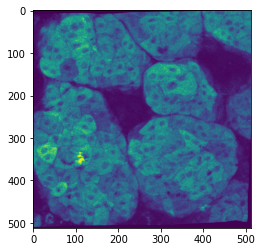

In [31]:
MC_img_list=glob.glob(Felicity_folder+'/C2*_Warped.nii')
C1_name=MC_img_list[0]
base_img=nib.load(C1_name)
base_img=np.squeeze(np.asarray(base_img.get_fdata(),dtype='float32')).transpose()
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(base_img)


In [37]:
C1_name=MC_img_list[100]
img_nb=int(C1_name.split('_F16')[1].split('.tif')[0])
img_nb

100

In [38]:
C1_name

'/mnt/e/Gilles/Felicity/F16/C2-MAX_F160100.tif_Warped.nii'

In [12]:
frames=np.zeros((len(list_img)*21,base_img.shape[1],base_img.shape[0]), dtype='uint16')
for img_nb,C1_name in enumerate(list_img):    
    img_temp=nib.load(C1_name)
    img_temp=img_temp.get_fdata()    
    img_temp=np.squeeze(np.asarray(img_temp,dtype='uint16'))
    frames[21*(img_nb):21+21*(img_nb),:,:]=np.transpose(img_temp,(2,1,0))
tifffile.imsave(name.replace('.nii','_3D.tif'),frames)